# CycleGAN

## What is the CycleGAN?

![cyclegan](https://miro.medium.com/max/1400/1*5DG4hHjxAyWTfV1J3mRH_A.png)

Paper : https://arxiv.org/abs/1703.10593


CycleGAN was introduced in the now well-known 2017 paper out of Berkeley, Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks. It was interesting because it did not require paired training data — while an x and y set of images are still required, they do not need to directly correspond to each other. In other words, if you wanted to translate between sketches and photos, you still need to train on a bunch of sketches and a bunch of photos, but the sketches would not need to be of the exact photos in your dataset.



## Dataset : Apple 2 Orange
link : https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/

## About dataset
- Download size: 74.82 MiB
- Split
    - 'testA'  =	266
    - 'testB'  =	248
    - 'trainA' =	995
    - 'trainB' =	1,019

    

![img](https://storage.googleapis.com/tfds-data/visualization/cycle_gan-apple2orange-2.0.0.png)


In [0]:
from google.colab import auth
auth.authenticate_user()

# 구글 드라이브 mount 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [1]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [9]:
import tensorflow as tf
tf.test.is_gpu_available()

True

In [10]:
import os
import matplotlib.pyplot as plt

from models.cycleGAN3 import CycleGAN
from utils.loaders import DataLoader

In [24]:
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'apple2orange'
RUN_FOLDER = './run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
mode =  'build'

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

# Load Data

In [25]:
IMAGE_SIZE = 128

In [26]:
data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))

# Architecture

In [27]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0012
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    ) 

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, '/weights/weights.h5'))
    


# Train

In [28]:
BATCH_SIZE = 1
EPOCHS = 20
PRINT_EVERY_N_BATCHES = 50

TEST_A_FILE = 'n07740461_14740.jpg'
TEST_B_FILE = 'n07749192_4241.jpg'


In [29]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)
        

C:\Users\hogeu\anaconda3\envs\tensorflow1\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[Epoch 0/20] [Batch 0/995] [D loss: 1.511607, acc:  42%] [G loss: 22.068098, adv: 2.414997, recon: 1.624720, id: 1.702949] time: 0:00:52.779240 


C:\Users\hogeu\anaconda3\envs\tensorflow1\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[Epoch 0/20] [Batch 1/995] [D loss: 1.331381, acc:  52%] [G loss: 17.888346, adv: 2.239637, recon: 1.310651, id: 1.271101] time: 0:00:53.050432 
[Epoch 0/20] [Batch 2/995] [D loss: 1.150472, acc:  52%] [G loss: 20.987911, adv: 2.604734, recon: 1.504239, id: 1.670394] time: 0:00:53.358496 
[Epoch 0/20] [Batch 3/995] [D loss: 0.991836, acc:  56%] [G loss: 26.323242, adv: 2.082698, recon: 1.985617, id: 2.192188] time: 0:00:53.618295 
[Epoch 0/20] [Batch 4/995] [D loss: 0.987938, acc:  51%] [G loss: 21.512756, adv: 2.551275, recon: 1.576443, id: 1.598526] time: 0:00:53.867407 
[Epoch 0/20] [Batch 5/995] [D loss: 0.894102, acc:  52%] [G loss: 17.090219, adv: 2.044911, recon: 1.252293, id: 1.261190] time: 0:00:54.128616 
[Epoch 0/20] [Batch 6/995] [D loss: 0.944616, acc:  49%] [G loss: 18.578279, adv: 2.222010, recon: 1.349955, id: 1.428358] time: 0:01:28.638768 
[Epoch 0/20] [Batch 7/995] [D loss: 0.767676, acc:  49%] [G loss: 17.710104, adv: 1.888883, recon: 1.312563, id: 1.347796] time: 0

[Epoch 0/20] [Batch 58/995] [D loss: 0.566923, acc:  65%] [G loss: 8.599712, adv: 0.822374, recon: 0.657787, id: 0.599734] time: 0:01:44.389377 
[Epoch 0/20] [Batch 59/995] [D loss: 0.910923, acc:  52%] [G loss: 10.334014, adv: 1.461169, recon: 0.740574, id: 0.733552] time: 0:01:44.643531 
[Epoch 0/20] [Batch 60/995] [D loss: 0.489220, acc:  78%] [G loss: 9.506473, adv: 1.472174, recon: 0.677876, id: 0.627772] time: 0:01:44.884106 
[Epoch 0/20] [Batch 61/995] [D loss: 0.405951, acc:  84%] [G loss: 13.865756, adv: 1.507368, recon: 1.041689, id: 0.970749] time: 0:01:45.147616 
[Epoch 0/20] [Batch 62/995] [D loss: 1.098826, acc:  41%] [G loss: 10.605954, adv: 0.996511, recon: 0.803255, id: 0.788446] time: 0:01:45.421351 
[Epoch 0/20] [Batch 63/995] [D loss: 0.796987, acc:  49%] [G loss: 9.373807, adv: 1.061411, recon: 0.693496, id: 0.688719] time: 0:01:45.759160 
[Epoch 0/20] [Batch 64/995] [D loss: 0.483168, acc:  76%] [G loss: 11.886473, adv: 1.772392, recon: 0.846846, id: 0.822813] tim

[Epoch 0/20] [Batch 115/995] [D loss: 0.764315, acc:  47%] [G loss: 11.730021, adv: 1.092624, recon: 0.877678, id: 0.930307] time: 0:02:01.409848 
[Epoch 0/20] [Batch 116/995] [D loss: 0.539267, acc:  75%] [G loss: 9.222995, adv: 1.221840, recon: 0.664925, id: 0.675954] time: 0:02:01.662971 
[Epoch 0/20] [Batch 117/995] [D loss: 0.531956, acc:  79%] [G loss: 7.050058, adv: 1.588448, recon: 0.457603, id: 0.442788] time: 0:02:01.942471 
[Epoch 0/20] [Batch 118/995] [D loss: 0.803378, acc:  52%] [G loss: 9.162722, adv: 1.176200, recon: 0.673380, id: 0.626360] time: 0:02:02.204024 
[Epoch 0/20] [Batch 119/995] [D loss: 0.393156, acc:  85%] [G loss: 9.505075, adv: 1.227670, recon: 0.693402, id: 0.671690] time: 0:02:02.460023 
[Epoch 0/20] [Batch 120/995] [D loss: 0.889188, acc:  40%] [G loss: 9.096190, adv: 1.082262, recon: 0.669402, id: 0.659954] time: 0:02:02.728349 
[Epoch 0/20] [Batch 121/995] [D loss: 0.581693, acc:  72%] [G loss: 10.815405, adv: 2.543684, recon: 0.696322, id: 0.654251

[Epoch 0/20] [Batch 172/995] [D loss: 0.775065, acc:  53%] [G loss: 7.652757, adv: 2.057080, recon: 0.472235, id: 0.436664] time: 0:02:18.115805 
[Epoch 0/20] [Batch 173/995] [D loss: 0.607318, acc:  71%] [G loss: 10.529640, adv: 1.670239, recon: 0.735196, id: 0.753721] time: 0:02:18.356996 
[Epoch 0/20] [Batch 174/995] [D loss: 0.772791, acc:  51%] [G loss: 8.371465, adv: 1.527513, recon: 0.575835, id: 0.542801] time: 0:02:18.587224 
[Epoch 0/20] [Batch 175/995] [D loss: 0.660209, acc:  55%] [G loss: 9.940431, adv: 0.795107, recon: 0.770350, id: 0.720913] time: 0:02:18.819448 
[Epoch 0/20] [Batch 176/995] [D loss: 0.659336, acc:  71%] [G loss: 10.366332, adv: 0.996393, recon: 0.784569, id: 0.762126] time: 0:02:19.060072 
[Epoch 0/20] [Batch 177/995] [D loss: 0.574100, acc:  68%] [G loss: 5.775999, adv: 0.800753, recon: 0.417721, id: 0.399020] time: 0:02:19.291299 
[Epoch 0/20] [Batch 178/995] [D loss: 0.517933, acc:  71%] [G loss: 7.195948, adv: 0.642858, recon: 0.550713, id: 0.522979

[Epoch 0/20] [Batch 229/995] [D loss: 0.696770, acc:  75%] [G loss: 7.963470, adv: 1.234107, recon: 0.570771, id: 0.510826] time: 0:02:34.645630 
[Epoch 0/20] [Batch 230/995] [D loss: 0.661666, acc:  66%] [G loss: 8.968251, adv: 0.879882, recon: 0.675135, id: 0.668507] time: 0:02:34.878848 
[Epoch 0/20] [Batch 231/995] [D loss: 1.420310, acc:  48%] [G loss: 7.869235, adv: 1.167929, recon: 0.550386, id: 0.598721] time: 0:02:35.111070 
[Epoch 0/20] [Batch 232/995] [D loss: 0.723569, acc:  49%] [G loss: 7.258614, adv: 0.818337, recon: 0.537433, id: 0.532972] time: 0:02:35.348556 
[Epoch 0/20] [Batch 233/995] [D loss: 0.412523, acc:  85%] [G loss: 6.761604, adv: 0.838782, recon: 0.509678, id: 0.413021] time: 0:02:35.579787 
[Epoch 0/20] [Batch 234/995] [D loss: 0.768501, acc:  52%] [G loss: 9.698927, adv: 1.358677, recon: 0.697386, id: 0.683197] time: 0:02:35.814777 
[Epoch 0/20] [Batch 235/995] [D loss: 0.328498, acc:  89%] [G loss: 7.400699, adv: 0.784087, recon: 0.551433, id: 0.551142] 

[Epoch 0/20] [Batch 286/995] [D loss: 0.497929, acc:  75%] [G loss: 6.972517, adv: 0.853390, recon: 0.510903, id: 0.505046] time: 0:02:50.684182 
[Epoch 0/20] [Batch 287/995] [D loss: 0.960863, acc:  56%] [G loss: 7.329804, adv: 1.176807, recon: 0.518338, id: 0.484811] time: 0:02:50.917400 
[Epoch 0/20] [Batch 288/995] [D loss: 0.710130, acc:  62%] [G loss: 6.464730, adv: 0.941181, recon: 0.460740, id: 0.458075] time: 0:02:51.142644 
[Epoch 0/20] [Batch 289/995] [D loss: 1.050364, acc:  36%] [G loss: 9.503506, adv: 1.760824, recon: 0.637226, id: 0.685212] time: 0:02:51.374172 
[Epoch 0/20] [Batch 290/995] [D loss: 0.539375, acc:  73%] [G loss: 8.396158, adv: 1.168033, recon: 0.613538, id: 0.546374] time: 0:02:51.598415 
[Epoch 0/20] [Batch 291/995] [D loss: 0.537097, acc:  75%] [G loss: 6.669871, adv: 1.170914, recon: 0.466888, id: 0.415041] time: 0:02:51.834630 
[Epoch 0/20] [Batch 292/995] [D loss: 0.549121, acc:  65%] [G loss: 7.006534, adv: 1.036980, recon: 0.504171, id: 0.463920] 

[Epoch 0/20] [Batch 343/995] [D loss: 0.448842, acc:  82%] [G loss: 6.424353, adv: 1.744284, recon: 0.395703, id: 0.361521] time: 0:03:06.017498 
[Epoch 0/20] [Batch 344/995] [D loss: 0.265113, acc:  97%] [G loss: 7.970918, adv: 2.336958, recon: 0.468961, id: 0.472177] time: 0:03:06.257695 
[Epoch 0/20] [Batch 345/995] [D loss: 0.288137, acc:  88%] [G loss: 9.057576, adv: 1.635313, recon: 0.622887, id: 0.596698] time: 0:03:06.492327 
[Epoch 0/20] [Batch 346/995] [D loss: 0.295302, acc:  91%] [G loss: 8.025171, adv: 1.735204, recon: 0.518331, id: 0.553329] time: 0:03:06.722554 
[Epoch 0/20] [Batch 347/995] [D loss: 0.238141, acc:  98%] [G loss: 9.410697, adv: 1.067406, recon: 0.696610, id: 0.688597] time: 0:03:06.958764 
[Epoch 0/20] [Batch 348/995] [D loss: 0.705946, acc:  51%] [G loss: 12.681291, adv: 1.828612, recon: 0.916241, id: 0.845132] time: 0:03:07.193978 
[Epoch 0/20] [Batch 349/995] [D loss: 0.369669, acc:  79%] [G loss: 7.901901, adv: 0.818740, recon: 0.588947, id: 0.596845]

[Epoch 0/20] [Batch 400/995] [D loss: 0.358114, acc:  90%] [G loss: 6.846010, adv: 1.167800, recon: 0.469877, id: 0.489718] time: 0:03:21.606768 
[Epoch 0/20] [Batch 401/995] [D loss: 0.807699, acc:  57%] [G loss: 7.237813, adv: 1.096792, recon: 0.518013, id: 0.480445] time: 0:03:21.839987 
[Epoch 0/20] [Batch 402/995] [D loss: 0.393653, acc:  90%] [G loss: 4.604079, adv: 0.889369, recon: 0.309581, id: 0.309449] time: 0:03:22.072210 
[Epoch 0/20] [Batch 403/995] [D loss: 0.769491, acc:  58%] [G loss: 9.159755, adv: 1.938934, recon: 0.600630, id: 0.607260] time: 0:03:22.310410 
[Epoch 0/20] [Batch 404/995] [D loss: 0.506068, acc:  73%] [G loss: 8.737964, adv: 0.868699, recon: 0.656608, id: 0.651593] time: 0:03:22.544083 
[Epoch 0/20] [Batch 405/995] [D loss: 0.904453, acc:  45%] [G loss: 6.234637, adv: 0.837875, recon: 0.443779, id: 0.479486] time: 0:03:22.776305 
[Epoch 0/20] [Batch 406/995] [D loss: 0.856709, acc:  45%] [G loss: 9.120185, adv: 1.589411, recon: 0.629746, id: 0.616659] 

[Epoch 0/20] [Batch 457/995] [D loss: 0.527358, acc:  64%] [G loss: 7.082269, adv: 1.235712, recon: 0.490868, id: 0.468940] time: 0:03:39.616787 
[Epoch 0/20] [Batch 458/995] [D loss: 0.515675, acc:  77%] [G loss: 7.611898, adv: 1.066777, recon: 0.531096, id: 0.617081] time: 0:03:39.849008 
[Epoch 0/20] [Batch 459/995] [D loss: 0.722851, acc:  56%] [G loss: 10.229344, adv: 1.662126, recon: 0.717270, id: 0.697261] time: 0:03:40.084221 
[Epoch 0/20] [Batch 460/995] [D loss: 0.373605, acc:  85%] [G loss: 7.501573, adv: 1.277938, recon: 0.525914, id: 0.482249] time: 0:03:40.328401 
[Epoch 0/20] [Batch 461/995] [D loss: 0.292748, acc:  97%] [G loss: 6.721729, adv: 0.838082, recon: 0.497937, id: 0.452138] time: 0:03:40.561979 
[Epoch 0/20] [Batch 462/995] [D loss: 0.805349, acc:  52%] [G loss: 6.217034, adv: 0.954485, recon: 0.438647, id: 0.438041] time: 0:03:40.794201 
[Epoch 0/20] [Batch 463/995] [D loss: 0.503177, acc:  72%] [G loss: 8.206285, adv: 1.817900, recon: 0.534020, id: 0.524094]

[Epoch 0/20] [Batch 514/995] [D loss: 0.538904, acc:  74%] [G loss: 7.164589, adv: 1.062651, recon: 0.509080, id: 0.505567] time: 0:03:54.909462 
[Epoch 0/20] [Batch 515/995] [D loss: 0.786678, acc:  44%] [G loss: 9.017163, adv: 1.218665, recon: 0.682382, id: 0.487341] time: 0:03:55.143678 
[Epoch 0/20] [Batch 516/995] [D loss: 0.804863, acc:  46%] [G loss: 7.233989, adv: 1.274475, recon: 0.497747, id: 0.491022] time: 0:03:55.382876 
[Epoch 0/20] [Batch 517/995] [D loss: 0.682948, acc:  58%] [G loss: 6.336158, adv: 0.878314, recon: 0.462030, id: 0.418770] time: 0:03:55.614979 
[Epoch 0/20] [Batch 518/995] [D loss: 0.385235, acc:  91%] [G loss: 6.265924, adv: 1.119493, recon: 0.433041, id: 0.408011] time: 0:03:55.844210 
[Epoch 0/20] [Batch 519/995] [D loss: 0.258024, acc:  96%] [G loss: 6.857667, adv: 1.331195, recon: 0.460552, id: 0.460478] time: 0:03:56.081415 
[Epoch 0/20] [Batch 520/995] [D loss: 0.291956, acc:  98%] [G loss: 5.735099, adv: 0.698960, recon: 0.411842, id: 0.458862] 

[Epoch 0/20] [Batch 571/995] [D loss: 0.809578, acc:  60%] [G loss: 7.718215, adv: 0.618708, recon: 0.601322, id: 0.543141] time: 0:04:10.234211 
[Epoch 0/20] [Batch 572/995] [D loss: 0.588178, acc:  75%] [G loss: 5.667662, adv: 0.801759, recon: 0.410040, id: 0.382752] time: 0:04:10.465441 
[Epoch 0/20] [Batch 573/995] [D loss: 0.659022, acc:  70%] [G loss: 9.104603, adv: 1.178458, recon: 0.652141, id: 0.702369] time: 0:04:10.699241 
[Epoch 0/20] [Batch 574/995] [D loss: 0.656407, acc:  62%] [G loss: 6.646780, adv: 0.958877, recon: 0.484440, id: 0.421753] time: 0:04:10.936442 
[Epoch 0/20] [Batch 575/995] [D loss: 0.543104, acc:  75%] [G loss: 6.901406, adv: 0.509047, recon: 0.528281, id: 0.554775] time: 0:04:11.168663 
[Epoch 0/20] [Batch 576/995] [D loss: 0.602378, acc:  62%] [G loss: 11.042818, adv: 0.833365, recon: 0.895777, id: 0.625840] time: 0:04:11.396898 
[Epoch 0/20] [Batch 577/995] [D loss: 0.706163, acc:  54%] [G loss: 8.859041, adv: 0.944638, recon: 0.670684, id: 0.603782]

[Epoch 0/20] [Batch 628/995] [D loss: 0.450451, acc:  75%] [G loss: 6.438973, adv: 0.497391, recon: 0.505358, id: 0.444003] time: 0:04:25.414982 
[Epoch 0/20] [Batch 629/995] [D loss: 0.761149, acc:  65%] [G loss: 5.630068, adv: 0.754348, recon: 0.411628, id: 0.379720] time: 0:04:25.648200 
[Epoch 0/20] [Batch 630/995] [D loss: 0.156145, acc:  98%] [G loss: 7.936913, adv: 0.627856, recon: 0.602475, id: 0.642154] time: 0:04:25.871865 
[Epoch 0/20] [Batch 631/995] [D loss: 0.650962, acc:  62%] [G loss: 6.445371, adv: 0.586780, recon: 0.491963, id: 0.469481] time: 0:04:26.114046 
[Epoch 0/20] [Batch 632/995] [D loss: 0.699054, acc:  59%] [G loss: 7.942457, adv: 1.685905, recon: 0.520024, id: 0.528158] time: 0:04:26.343279 
[Epoch 0/20] [Batch 633/995] [D loss: 0.428816, acc:  76%] [G loss: 5.660359, adv: 1.344285, recon: 0.357235, id: 0.371864] time: 0:04:26.575503 
[Epoch 0/20] [Batch 634/995] [D loss: 0.939271, acc:  45%] [G loss: 7.826733, adv: 0.852194, recon: 0.587328, id: 0.550628] 

[Epoch 0/20] [Batch 685/995] [D loss: 0.295964, acc:  95%] [G loss: 6.754528, adv: 1.278890, recon: 0.462518, id: 0.425229] time: 0:04:40.743530 
[Epoch 0/20] [Batch 686/995] [D loss: 0.653356, acc:  75%] [G loss: 6.484278, adv: 2.344822, recon: 0.352743, id: 0.306013] time: 0:04:40.971103 
[Epoch 0/20] [Batch 687/995] [D loss: 0.721790, acc:  62%] [G loss: 10.055363, adv: 1.264994, recon: 0.727404, id: 0.758167] time: 0:04:41.213292 
[Epoch 0/20] [Batch 688/995] [D loss: 0.583469, acc:  66%] [G loss: 7.360152, adv: 1.052256, recon: 0.537645, id: 0.465724] time: 0:04:41.489365 
[Epoch 0/20] [Batch 689/995] [D loss: 0.713368, acc:  61%] [G loss: 8.185775, adv: 1.030213, recon: 0.609456, id: 0.530501] time: 0:04:41.715607 
[Epoch 0/20] [Batch 690/995] [D loss: 0.271338, acc:  98%] [G loss: 8.599838, adv: 0.947328, recon: 0.658270, id: 0.534906] time: 0:04:41.944113 
[Epoch 0/20] [Batch 691/995] [D loss: 0.672778, acc:  55%] [G loss: 5.058449, adv: 0.680510, recon: 0.373713, id: 0.320403]

[Epoch 0/20] [Batch 742/995] [D loss: 0.871947, acc:  38%] [G loss: 8.902417, adv: 0.856299, recon: 0.685637, id: 0.594872] time: 0:04:56.030475 
[Epoch 0/20] [Batch 743/995] [D loss: 0.669825, acc:  61%] [G loss: 8.058318, adv: 1.194897, recon: 0.589115, id: 0.486135] time: 0:04:56.258711 
[Epoch 0/20] [Batch 744/995] [D loss: 0.599976, acc:  63%] [G loss: 6.638731, adv: 1.167546, recon: 0.442870, id: 0.521244] time: 0:04:56.497907 
[Epoch 0/20] [Batch 745/995] [D loss: 0.612734, acc:  60%] [G loss: 10.584171, adv: 1.637335, recon: 0.744672, id: 0.750059] time: 0:04:56.731126 
[Epoch 0/20] [Batch 746/995] [D loss: 0.582068, acc:  65%] [G loss: 5.319427, adv: 0.884719, recon: 0.372868, id: 0.353015] time: 0:04:56.966613 
[Epoch 0/20] [Batch 747/995] [D loss: 0.423193, acc:  83%] [G loss: 9.905207, adv: 0.659034, recon: 0.788786, id: 0.679155] time: 0:04:57.197837 
[Epoch 0/20] [Batch 748/995] [D loss: 0.522870, acc:  67%] [G loss: 8.647432, adv: 0.538458, recon: 0.680240, id: 0.653287]

[Epoch 0/20] [Batch 799/995] [D loss: 0.787255, acc:  53%] [G loss: 7.884439, adv: 1.224909, recon: 0.566143, id: 0.499051] time: 0:05:11.380023 
[Epoch 0/20] [Batch 800/995] [D loss: 0.333927, acc:  90%] [G loss: 6.516570, adv: 0.899181, recon: 0.476130, id: 0.428043] time: 0:05:11.615236 
[Epoch 0/20] [Batch 801/995] [D loss: 0.625538, acc:  75%] [G loss: 7.747200, adv: 2.112729, recon: 0.482502, id: 0.404727] time: 0:05:11.848453 
[Epoch 0/20] [Batch 802/995] [D loss: 0.343143, acc:  86%] [G loss: 6.507498, adv: 0.934771, recon: 0.462753, id: 0.472597] time: 0:05:12.077014 
[Epoch 0/20] [Batch 803/995] [D loss: 0.285566, acc:  93%] [G loss: 5.294612, adv: 1.139928, recon: 0.351315, id: 0.320769] time: 0:05:12.311222 
[Epoch 0/20] [Batch 804/995] [D loss: 0.163884, acc: 100%] [G loss: 4.680654, adv: 0.622016, recon: 0.335255, id: 0.353043] time: 0:05:12.546438 
[Epoch 0/20] [Batch 805/995] [D loss: 0.682616, acc:  61%] [G loss: 7.953111, adv: 0.668773, recon: 0.620884, id: 0.537748] 

[Epoch 0/20] [Batch 856/995] [D loss: 0.585372, acc:  65%] [G loss: 10.078100, adv: 0.742190, recon: 0.786174, id: 0.737085] time: 0:05:29.244414 
[Epoch 0/20] [Batch 857/995] [D loss: 1.334768, acc:  25%] [G loss: 5.994903, adv: 0.756632, recon: 0.439439, id: 0.421938] time: 0:05:29.474643 
[Epoch 0/20] [Batch 858/995] [D loss: 0.948288, acc:  32%] [G loss: 7.257029, adv: 1.040012, recon: 0.518177, id: 0.517625] time: 0:05:29.714837 
[Epoch 0/20] [Batch 859/995] [D loss: 0.495450, acc:  71%] [G loss: 9.440773, adv: 1.219478, recon: 0.716571, id: 0.527794] time: 0:05:29.940092 
[Epoch 0/20] [Batch 860/995] [D loss: 0.495881, acc:  76%] [G loss: 7.732050, adv: 1.037786, recon: 0.559813, id: 0.548065] time: 0:05:30.179693 
[Epoch 0/20] [Batch 861/995] [D loss: 0.871553, acc:  53%] [G loss: 9.124444, adv: 2.022933, recon: 0.598534, id: 0.558087] time: 0:05:30.418896 
[Epoch 0/20] [Batch 862/995] [D loss: 0.667759, acc:  56%] [G loss: 6.386623, adv: 1.637102, recon: 0.394470, id: 0.402409]

[Epoch 0/20] [Batch 913/995] [D loss: 0.578435, acc:  68%] [G loss: 8.187284, adv: 1.450905, recon: 0.561557, id: 0.560407] time: 0:05:44.652747 
[Epoch 0/20] [Batch 914/995] [D loss: 0.508492, acc:  86%] [G loss: 9.289159, adv: 1.316214, recon: 0.687594, id: 0.548501] time: 0:05:44.885965 
[Epoch 0/20] [Batch 915/995] [D loss: 0.468749, acc:  91%] [G loss: 9.468627, adv: 2.578906, recon: 0.585160, id: 0.519062] time: 0:05:45.122178 
[Epoch 0/20] [Batch 916/995] [D loss: 0.728773, acc:  51%] [G loss: 6.347548, adv: 1.880583, recon: 0.374705, id: 0.359958] time: 0:05:45.367676 
[Epoch 0/20] [Batch 917/995] [D loss: 0.826077, acc:  45%] [G loss: 6.999284, adv: 1.115501, recon: 0.511463, id: 0.384579] time: 0:05:45.612855 
[Epoch 0/20] [Batch 918/995] [D loss: 0.612429, acc:  68%] [G loss: 7.542150, adv: 1.593802, recon: 0.503953, id: 0.454411] time: 0:05:45.852053 
[Epoch 0/20] [Batch 919/995] [D loss: 0.882975, acc:  33%] [G loss: 5.149368, adv: 0.940095, recon: 0.355056, id: 0.329359] 

[Epoch 0/20] [Batch 970/995] [D loss: 0.513361, acc:  80%] [G loss: 6.394680, adv: 0.936949, recon: 0.461570, id: 0.421017] time: 0:06:00.130450 
[Epoch 0/20] [Batch 971/995] [D loss: 0.829451, acc:  36%] [G loss: 4.241418, adv: 1.145610, recon: 0.251034, id: 0.292735] time: 0:06:00.367082 
[Epoch 0/20] [Batch 972/995] [D loss: 0.495564, acc:  75%] [G loss: 7.831160, adv: 1.722538, recon: 0.515079, id: 0.478914] time: 0:06:00.600293 
[Epoch 0/20] [Batch 973/995] [D loss: 0.693168, acc:  45%] [G loss: 7.991383, adv: 1.228928, recon: 0.575318, id: 0.504635] time: 0:06:00.832515 
[Epoch 0/20] [Batch 974/995] [D loss: 0.576669, acc:  64%] [G loss: 9.333119, adv: 1.551214, recon: 0.647059, id: 0.655657] time: 0:06:01.069719 
[Epoch 0/20] [Batch 975/995] [D loss: 0.916235, acc:  28%] [G loss: 7.028755, adv: 1.130106, recon: 0.499083, id: 0.453911] time: 0:06:01.302241 
[Epoch 0/20] [Batch 976/995] [D loss: 0.408427, acc:  85%] [G loss: 6.376437, adv: 0.870494, recon: 0.472879, id: 0.388577] 

[Epoch 1/20] [Batch 33/995] [D loss: 0.750697, acc:  52%] [G loss: 9.724770, adv: 0.786335, recon: 0.773466, id: 0.601887] time: 0:06:15.128019 
[Epoch 1/20] [Batch 34/995] [D loss: 0.614713, acc:  70%] [G loss: 6.268838, adv: 1.228651, recon: 0.436661, id: 0.336787] time: 0:06:15.346628 
[Epoch 1/20] [Batch 35/995] [D loss: 0.651926, acc:  66%] [G loss: 5.679554, adv: 0.565832, recon: 0.431034, id: 0.401693] time: 0:06:15.557920 
[Epoch 1/20] [Batch 36/995] [D loss: 0.717425, acc:  46%] [G loss: 7.234718, adv: 0.724957, recon: 0.552542, id: 0.492168] time: 0:06:15.781172 
[Epoch 1/20] [Batch 37/995] [D loss: 0.323692, acc:  94%] [G loss: 7.260834, adv: 1.373381, recon: 0.497612, id: 0.455665] time: 0:06:15.997446 
[Epoch 1/20] [Batch 38/995] [D loss: 0.583926, acc:  62%] [G loss: 9.352037, adv: 1.038589, recon: 0.726361, id: 0.524921] time: 0:06:16.212725 
[Epoch 1/20] [Batch 39/995] [D loss: 0.751322, acc:  53%] [G loss: 8.231328, adv: 0.862742, recon: 0.625099, id: 0.558797] time: 0

[Epoch 1/20] [Batch 90/995] [D loss: 1.046502, acc:  40%] [G loss: 7.769367, adv: 0.644582, recon: 0.594255, id: 0.591120] time: 0:06:29.667096 
[Epoch 1/20] [Batch 91/995] [D loss: 0.679244, acc:  68%] [G loss: 11.091759, adv: 1.346481, recon: 0.839098, id: 0.677150] time: 0:06:29.889350 
[Epoch 1/20] [Batch 92/995] [D loss: 0.379445, acc:  83%] [G loss: 7.005921, adv: 0.875032, recon: 0.514575, id: 0.492570] time: 0:06:30.110609 
[Epoch 1/20] [Batch 93/995] [D loss: 0.161664, acc:  99%] [G loss: 7.677087, adv: 0.671564, recon: 0.593842, id: 0.533551] time: 0:06:30.333860 
[Epoch 1/20] [Batch 94/995] [D loss: 0.582746, acc:  61%] [G loss: 6.105361, adv: 0.697804, recon: 0.456769, id: 0.419935] time: 0:06:30.556497 
[Epoch 1/20] [Batch 95/995] [D loss: 0.413891, acc:  81%] [G loss: 7.441411, adv: 0.932061, recon: 0.546655, id: 0.521400] time: 0:06:30.778751 
[Epoch 1/20] [Batch 96/995] [D loss: 0.281656, acc:  89%] [G loss: 6.221115, adv: 0.793767, recon: 0.461613, id: 0.405611] time: 

[Epoch 1/20] [Batch 147/995] [D loss: 0.957749, acc:  43%] [G loss: 5.565901, adv: 0.876721, recon: 0.395004, id: 0.369570] time: 0:06:44.416214 
[Epoch 1/20] [Batch 148/995] [D loss: 0.440778, acc:  78%] [G loss: 7.398923, adv: 0.896849, recon: 0.534701, id: 0.577534] time: 0:06:44.633814 
[Epoch 1/20] [Batch 149/995] [D loss: 0.724614, acc:  50%] [G loss: 4.992284, adv: 0.807830, recon: 0.352143, id: 0.331512] time: 0:06:44.850090 
[Epoch 1/20] [Batch 150/995] [D loss: 0.734948, acc:  50%] [G loss: 5.802348, adv: 0.542020, recon: 0.440712, id: 0.426605] time: 0:06:45.065368 
[Epoch 1/20] [Batch 151/995] [D loss: 0.385482, acc:  90%] [G loss: 7.300301, adv: 0.718027, recon: 0.562565, id: 0.478311] time: 0:06:45.284642 
[Epoch 1/20] [Batch 152/995] [D loss: 0.322794, acc:  91%] [G loss: 4.456462, adv: 0.949664, recon: 0.296612, id: 0.270337] time: 0:06:45.495257 
[Epoch 1/20] [Batch 153/995] [D loss: 0.587351, acc:  65%] [G loss: 6.235389, adv: 0.526330, recon: 0.493232, id: 0.388371] 

[Epoch 1/20] [Batch 204/995] [D loss: 0.946955, acc:  38%] [G loss: 6.451911, adv: 1.616233, recon: 0.409070, id: 0.372488] time: 0:06:59.049302 
[Epoch 1/20] [Batch 205/995] [D loss: 0.474757, acc:  81%] [G loss: 7.476945, adv: 0.854925, recon: 0.552430, id: 0.548862] time: 0:06:59.262592 
[Epoch 1/20] [Batch 206/995] [D loss: 0.682933, acc:  70%] [G loss: 6.943074, adv: 0.765131, recon: 0.510129, id: 0.538325] time: 0:07:01.626656 
[Epoch 1/20] [Batch 207/995] [D loss: 0.856913, acc:  51%] [G loss: 8.991162, adv: 2.935226, recon: 0.512557, id: 0.465181] time: 0:07:01.851901 
[Epoch 1/20] [Batch 208/995] [D loss: 0.738415, acc:  54%] [G loss: 6.678578, adv: 1.521661, recon: 0.430790, id: 0.424507] time: 0:07:02.074158 
[Epoch 1/20] [Batch 209/995] [D loss: 0.318056, acc:  92%] [G loss: 5.671158, adv: 0.564639, recon: 0.421274, id: 0.446891] time: 0:07:02.300401 
[Epoch 1/20] [Batch 210/995] [D loss: 0.579609, acc:  73%] [G loss: 6.966621, adv: 1.119684, recon: 0.496168, id: 0.442630] 

[Epoch 1/20] [Batch 261/995] [D loss: 0.379798, acc:  89%] [G loss: 8.028117, adv: 1.232292, recon: 0.574274, id: 0.526543] time: 0:07:16.188591 
[Epoch 1/20] [Batch 262/995] [D loss: 0.405487, acc:  83%] [G loss: 6.287335, adv: 0.862831, recon: 0.462110, id: 0.401703] time: 0:07:16.406859 
[Epoch 1/20] [Batch 263/995] [D loss: 0.742276, acc:  66%] [G loss: 7.509107, adv: 0.818686, recon: 0.570846, id: 0.490979] time: 0:07:16.620145 
[Epoch 1/20] [Batch 264/995] [D loss: 0.844843, acc:  48%] [G loss: 6.550921, adv: 0.821622, recon: 0.485814, id: 0.435579] time: 0:07:16.832713 
[Epoch 1/20] [Batch 265/995] [D loss: 0.816189, acc:  50%] [G loss: 7.731236, adv: 1.264794, recon: 0.549126, id: 0.487590] time: 0:07:17.047998 
[Epoch 1/20] [Batch 266/995] [D loss: 0.550433, acc:  68%] [G loss: 6.977903, adv: 0.886367, recon: 0.512889, id: 0.481322] time: 0:07:17.267258 
[Epoch 1/20] [Batch 267/995] [D loss: 0.737419, acc:  51%] [G loss: 6.722363, adv: 0.920957, recon: 0.486149, id: 0.469958] 

[Epoch 1/20] [Batch 318/995] [D loss: 0.548470, acc:  73%] [G loss: 10.186432, adv: 1.189447, recon: 0.768259, id: 0.657199] time: 0:07:30.917345 
[Epoch 1/20] [Batch 319/995] [D loss: 0.822911, acc:  49%] [G loss: 8.986220, adv: 1.845045, recon: 0.581154, id: 0.664819] time: 0:07:31.143587 
[Epoch 1/20] [Batch 320/995] [D loss: 0.920459, acc:  65%] [G loss: 7.419832, adv: 1.500261, recon: 0.504053, id: 0.439521] time: 0:07:31.379791 
[Epoch 1/20] [Batch 321/995] [D loss: 0.536562, acc:  58%] [G loss: 7.279294, adv: 1.153066, recon: 0.515747, id: 0.484381] time: 0:07:31.616996 
[Epoch 1/20] [Batch 322/995] [D loss: 0.467674, acc:  83%] [G loss: 8.861522, adv: 1.023906, recon: 0.671673, id: 0.560445] time: 0:07:31.839519 
[Epoch 1/20] [Batch 323/995] [D loss: 0.491516, acc:  82%] [G loss: 7.068192, adv: 0.679963, recon: 0.528177, id: 0.553229] time: 0:07:32.068753 
[Epoch 1/20] [Batch 324/995] [D loss: 0.681418, acc:  63%] [G loss: 8.601812, adv: 1.661114, recon: 0.576369, id: 0.588505]

[Epoch 1/20] [Batch 375/995] [D loss: 0.753543, acc:  68%] [G loss: 7.013454, adv: 1.262482, recon: 0.477512, id: 0.487927] time: 0:07:45.909926 
[Epoch 1/20] [Batch 376/995] [D loss: 0.743694, acc:  59%] [G loss: 6.929183, adv: 1.204141, recon: 0.482914, id: 0.447953] time: 0:07:46.156096 
[Epoch 1/20] [Batch 377/995] [D loss: 0.536149, acc:  76%] [G loss: 6.221801, adv: 0.588163, recon: 0.460218, id: 0.515730] time: 0:07:46.380345 
[Epoch 1/20] [Batch 378/995] [D loss: 0.641340, acc:  64%] [G loss: 6.381456, adv: 1.530243, recon: 0.400390, id: 0.423654] time: 0:07:46.605590 
[Epoch 1/20] [Batch 379/995] [D loss: 1.115507, acc:  73%] [G loss: 6.026582, adv: 0.886778, recon: 0.439870, id: 0.370550] time: 0:07:46.831115 
[Epoch 1/20] [Batch 380/995] [D loss: 0.637854, acc:  54%] [G loss: 8.819820, adv: 1.600537, recon: 0.596746, id: 0.625910] time: 0:07:47.055366 
[Epoch 1/20] [Batch 381/995] [D loss: 0.574566, acc:  58%] [G loss: 6.166134, adv: 1.358183, recon: 0.406357, id: 0.372192] 

[Epoch 1/20] [Batch 432/995] [D loss: 0.843952, acc:  56%] [G loss: 7.262420, adv: 1.691344, recon: 0.462489, id: 0.473094] time: 0:08:00.805365 
[Epoch 1/20] [Batch 433/995] [D loss: 0.753474, acc:  51%] [G loss: 8.508806, adv: 1.808596, recon: 0.565671, id: 0.521750] time: 0:08:01.036873 
[Epoch 1/20] [Batch 434/995] [D loss: 0.844953, acc:  56%] [G loss: 5.965230, adv: 1.421245, recon: 0.373848, id: 0.402754] time: 0:08:01.274079 
[Epoch 1/20] [Batch 435/995] [D loss: 0.483795, acc:  71%] [G loss: 7.681717, adv: 0.909089, recon: 0.563322, id: 0.569703] time: 0:08:01.508294 
[Epoch 1/20] [Batch 436/995] [D loss: 0.548867, acc:  65%] [G loss: 7.823857, adv: 2.016031, recon: 0.483183, id: 0.488000] time: 0:08:01.744502 
[Epoch 1/20] [Batch 437/995] [D loss: 0.929518, acc:  26%] [G loss: 7.190290, adv: 1.346933, recon: 0.489344, id: 0.474959] time: 0:08:01.979281 
[Epoch 1/20] [Batch 438/995] [D loss: 0.608428, acc:  62%] [G loss: 8.821647, adv: 1.141826, recon: 0.643780, id: 0.621008] 

[Epoch 1/20] [Batch 489/995] [D loss: 0.365854, acc:  97%] [G loss: 5.274122, adv: 1.278636, recon: 0.333595, id: 0.329766] time: 0:08:15.935106 
[Epoch 1/20] [Batch 490/995] [D loss: 0.650783, acc:  64%] [G loss: 8.419621, adv: 1.023026, recon: 0.640877, id: 0.493911] time: 0:08:16.149394 
[Epoch 1/20] [Batch 491/995] [D loss: 0.515046, acc:  72%] [G loss: 7.064609, adv: 2.072935, recon: 0.411325, id: 0.439214] time: 0:08:16.399550 
[Epoch 1/20] [Batch 492/995] [D loss: 0.440644, acc:  80%] [G loss: 5.389469, adv: 0.945177, recon: 0.371114, id: 0.366575] time: 0:08:16.624795 
[Epoch 1/20] [Batch 493/995] [D loss: 0.717656, acc:  53%] [G loss: 7.033323, adv: 1.103044, recon: 0.493307, id: 0.498603] time: 0:08:16.848045 
[Epoch 1/20] [Batch 494/995] [D loss: 0.370065, acc:  91%] [G loss: 7.412580, adv: 1.501265, recon: 0.507265, id: 0.419334] time: 0:08:17.070577 
[Epoch 1/20] [Batch 495/995] [D loss: 0.862194, acc:  39%] [G loss: 9.904586, adv: 2.266999, recon: 0.664781, id: 0.494888] 

[Epoch 1/20] [Batch 546/995] [D loss: 0.567222, acc:  70%] [G loss: 7.846282, adv: 1.685788, recon: 0.509213, id: 0.534181] time: 0:08:31.117896 
[Epoch 1/20] [Batch 547/995] [D loss: 0.579005, acc:  75%] [G loss: 8.288869, adv: 1.275984, recon: 0.590502, id: 0.553931] time: 0:08:31.343148 
[Epoch 1/20] [Batch 548/995] [D loss: 0.565514, acc:  63%] [G loss: 8.673907, adv: 0.764203, recon: 0.662717, id: 0.641269] time: 0:08:31.563404 
[Epoch 1/20] [Batch 549/995] [D loss: 0.348438, acc:  87%] [G loss: 5.703053, adv: 0.617255, recon: 0.425275, id: 0.416525] time: 0:08:31.774709 
[Epoch 1/20] [Batch 550/995] [D loss: 0.483781, acc:  73%] [G loss: 6.762530, adv: 1.938236, recon: 0.403457, id: 0.394864] time: 0:08:31.995957 
[Epoch 1/20] [Batch 551/995] [D loss: 0.709853, acc:  53%] [G loss: 4.953714, adv: 0.927358, recon: 0.345971, id: 0.283325] time: 0:08:32.212512 
[Epoch 1/20] [Batch 552/995] [D loss: 0.501966, acc:  74%] [G loss: 6.452705, adv: 1.168803, recon: 0.443166, id: 0.426122] 

[Epoch 1/20] [Batch 603/995] [D loss: 0.741269, acc:  58%] [G loss: 8.207148, adv: 0.947624, recon: 0.621863, id: 0.520448] time: 0:08:45.667643 
[Epoch 1/20] [Batch 604/995] [D loss: 1.026458, acc:  38%] [G loss: 7.519874, adv: 1.115780, recon: 0.531804, id: 0.543027] time: 0:08:45.882923 
[Epoch 1/20] [Batch 605/995] [D loss: 0.310707, acc:  98%] [G loss: 7.609790, adv: 1.240258, recon: 0.527205, id: 0.548743] time: 0:08:46.101543 
[Epoch 1/20] [Batch 606/995] [D loss: 0.616610, acc:  71%] [G loss: 7.839841, adv: 1.640424, recon: 0.516888, id: 0.515271] time: 0:08:48.466186 
[Epoch 1/20] [Batch 607/995] [D loss: 0.308832, acc:  91%] [G loss: 7.207728, adv: 1.871165, recon: 0.458264, id: 0.376960] time: 0:08:48.688442 
[Epoch 1/20] [Batch 608/995] [D loss: 0.863779, acc:  37%] [G loss: 4.827025, adv: 1.508296, recon: 0.266223, id: 0.328248] time: 0:08:48.913686 
[Epoch 1/20] [Batch 609/995] [D loss: 0.150807, acc:  99%] [G loss: 8.575768, adv: 1.301889, recon: 0.610607, id: 0.583903] 

[Epoch 1/20] [Batch 660/995] [D loss: 0.324956, acc:  96%] [G loss: 8.105583, adv: 1.006698, recon: 0.602131, id: 0.538789] time: 0:09:02.558415 
[Epoch 1/20] [Batch 661/995] [D loss: 1.370762, acc:  30%] [G loss: 7.472056, adv: 1.419541, recon: 0.513864, id: 0.456939] time: 0:09:02.789640 
[Epoch 1/20] [Batch 662/995] [D loss: 0.469271, acc:  82%] [G loss: 5.023955, adv: 0.936522, recon: 0.336281, id: 0.362314] time: 0:09:03.001929 
[Epoch 1/20] [Batch 663/995] [D loss: 0.752144, acc:  57%] [G loss: 8.071852, adv: 1.312514, recon: 0.575676, id: 0.501290] time: 0:09:03.220626 
[Epoch 1/20] [Batch 664/995] [D loss: 0.867285, acc:  53%] [G loss: 5.794646, adv: 1.088420, recon: 0.389944, id: 0.403393] time: 0:09:03.441885 
[Epoch 1/20] [Batch 665/995] [D loss: 0.667381, acc:  54%] [G loss: 6.905076, adv: 1.443598, recon: 0.451568, id: 0.472899] time: 0:09:03.654173 
[Epoch 1/20] [Batch 666/995] [D loss: 0.360612, acc:  91%] [G loss: 5.325995, adv: 1.102774, recon: 0.359513, id: 0.314044] 

[Epoch 1/20] [Batch 717/995] [D loss: 0.879908, acc:  60%] [G loss: 6.914687, adv: 1.452279, recon: 0.477251, id: 0.344950] time: 0:09:17.145411 
[Epoch 1/20] [Batch 718/995] [D loss: 0.734402, acc:  51%] [G loss: 5.152296, adv: 1.243864, recon: 0.325485, id: 0.326789] time: 0:09:17.363990 
[Epoch 1/20] [Batch 719/995] [D loss: 0.579263, acc:  70%] [G loss: 7.086292, adv: 1.632045, recon: 0.461392, id: 0.420166] time: 0:09:17.579269 
[Epoch 1/20] [Batch 720/995] [D loss: 0.538438, acc:  78%] [G loss: 7.707641, adv: 1.594188, recon: 0.518567, id: 0.463892] time: 0:09:17.796540 
[Epoch 1/20] [Batch 721/995] [D loss: 0.654724, acc:  56%] [G loss: 6.598949, adv: 0.541994, recon: 0.503518, id: 0.510887] time: 0:09:18.028761 
[Epoch 1/20] [Batch 722/995] [D loss: 0.187461, acc:  99%] [G loss: 7.808842, adv: 0.696123, recon: 0.609503, id: 0.508844] time: 0:09:18.241336 
[Epoch 1/20] [Batch 723/995] [D loss: 0.436704, acc:  79%] [G loss: 6.289143, adv: 0.796161, recon: 0.456815, id: 0.462418] 

[Epoch 1/20] [Batch 774/995] [D loss: 0.458194, acc:  78%] [G loss: 7.938990, adv: 1.768133, recon: 0.521158, id: 0.479639] time: 0:09:31.889734 
[Epoch 1/20] [Batch 775/995] [D loss: 0.277447, acc:  96%] [G loss: 6.811936, adv: 1.183903, recon: 0.469559, id: 0.466221] time: 0:09:32.119955 
[Epoch 1/20] [Batch 776/995] [D loss: 0.938020, acc:  36%] [G loss: 6.330698, adv: 1.817941, recon: 0.368430, id: 0.414229] time: 0:09:32.332514 
[Epoch 1/20] [Batch 777/995] [D loss: 0.249707, acc:  95%] [G loss: 6.543233, adv: 1.285029, recon: 0.424354, id: 0.507334] time: 0:09:32.550783 
[Epoch 1/20] [Batch 778/995] [D loss: 0.722304, acc:  62%] [G loss: 7.423942, adv: 0.501499, recon: 0.588824, id: 0.517101] time: 0:09:32.769055 
[Epoch 1/20] [Batch 779/995] [D loss: 0.929157, acc:  33%] [G loss: 6.939337, adv: 1.064711, recon: 0.492132, id: 0.476652] time: 0:09:32.989313 
[Epoch 1/20] [Batch 780/995] [D loss: 0.364509, acc:  94%] [G loss: 5.190812, adv: 1.412050, recon: 0.317210, id: 0.303330] 

[Epoch 1/20] [Batch 831/995] [D loss: 0.780079, acc:  65%] [G loss: 5.465433, adv: 1.430290, recon: 0.339580, id: 0.319673] time: 0:09:46.651997 
[Epoch 1/20] [Batch 832/995] [D loss: 0.404079, acc:  79%] [G loss: 8.350023, adv: 1.192971, recon: 0.604374, id: 0.556655] time: 0:09:46.870259 
[Epoch 1/20] [Batch 833/995] [D loss: 0.533388, acc:  73%] [G loss: 5.760711, adv: 0.946461, recon: 0.402133, id: 0.396460] time: 0:09:47.099503 
[Epoch 1/20] [Batch 834/995] [D loss: 0.715450, acc:  50%] [G loss: 4.470578, adv: 1.119304, recon: 0.275159, id: 0.299844] time: 0:09:47.312780 
[Epoch 1/20] [Batch 835/995] [D loss: 0.452304, acc:  74%] [G loss: 6.093172, adv: 0.598786, recon: 0.461668, id: 0.438855] time: 0:09:47.532425 
[Epoch 1/20] [Batch 836/995] [D loss: 0.531285, acc:  67%] [G loss: 5.819135, adv: 1.371295, recon: 0.358397, id: 0.431934] time: 0:09:47.745714 
[Epoch 1/20] [Batch 837/995] [D loss: 0.430851, acc:  75%] [G loss: 12.592839, adv: 2.071039, recon: 0.917391, id: 0.673947]

[Epoch 1/20] [Batch 888/995] [D loss: 0.493987, acc:  78%] [G loss: 5.285199, adv: 1.074056, recon: 0.360318, id: 0.303983] time: 0:10:01.478366 
[Epoch 1/20] [Batch 889/995] [D loss: 0.848176, acc:  51%] [G loss: 5.180325, adv: 0.665411, recon: 0.371426, id: 0.400328] time: 0:10:01.700619 
[Epoch 1/20] [Batch 890/995] [D loss: 0.577537, acc:  71%] [G loss: 6.481264, adv: 0.861079, recon: 0.469038, id: 0.464901] time: 0:10:01.915898 
[Epoch 1/20] [Batch 891/995] [D loss: 0.520906, acc:  74%] [G loss: 7.219829, adv: 1.341005, recon: 0.490923, id: 0.484796] time: 0:10:02.146127 
[Epoch 1/20] [Batch 892/995] [D loss: 0.618886, acc:  59%] [G loss: 6.219086, adv: 1.799770, recon: 0.372430, id: 0.347508] time: 0:10:02.363398 
[Epoch 1/20] [Batch 893/995] [D loss: 0.869861, acc:  62%] [G loss: 6.974175, adv: 1.078768, recon: 0.499574, id: 0.449834] time: 0:10:02.583933 
[Epoch 1/20] [Batch 894/995] [D loss: 0.589901, acc:  70%] [G loss: 6.496198, adv: 1.311033, recon: 0.427510, id: 0.455034] 

[Epoch 1/20] [Batch 945/995] [D loss: 0.517554, acc:  76%] [G loss: 6.880854, adv: 1.856669, recon: 0.424145, id: 0.391367] time: 0:10:16.292272 
[Epoch 1/20] [Batch 946/995] [D loss: 0.820845, acc:  48%] [G loss: 8.664448, adv: 2.446272, recon: 0.536809, id: 0.425041] time: 0:10:16.503565 
[Epoch 1/20] [Batch 947/995] [D loss: 0.516645, acc:  80%] [G loss: 6.921619, adv: 1.504685, recon: 0.463286, id: 0.392037] time: 0:10:16.717135 
[Epoch 1/20] [Batch 948/995] [D loss: 0.417841, acc:  86%] [G loss: 6.397228, adv: 2.204871, recon: 0.338449, id: 0.403932] time: 0:10:16.934407 
[Epoch 1/20] [Batch 949/995] [D loss: 0.419637, acc:  81%] [G loss: 7.009257, adv: 1.573838, recon: 0.454300, id: 0.446209] time: 0:10:17.155666 
[Epoch 1/20] [Batch 950/995] [D loss: 0.281542, acc:  99%] [G loss: 5.172676, adv: 0.791901, recon: 0.358265, id: 0.399061] time: 0:10:17.386890 
[Epoch 1/20] [Batch 951/995] [D loss: 0.646949, acc:  52%] [G loss: 6.787338, adv: 1.520010, recon: 0.458542, id: 0.340953] 

[Epoch 2/20] [Batch 8/995] [D loss: 0.629688, acc:  62%] [G loss: 4.848961, adv: 0.646316, recon: 0.349518, id: 0.353730] time: 0:10:33.057365 
[Epoch 2/20] [Batch 9/995] [D loss: 0.563875, acc:  67%] [G loss: 6.582088, adv: 0.999628, recon: 0.467711, id: 0.452677] time: 0:10:33.281620 
[Epoch 2/20] [Batch 10/995] [D loss: 0.676319, acc:  60%] [G loss: 6.552192, adv: 2.412422, recon: 0.348552, id: 0.327123] time: 0:10:33.500878 
[Epoch 2/20] [Batch 11/995] [D loss: 0.855879, acc:  49%] [G loss: 8.879436, adv: 1.602096, recon: 0.621516, id: 0.531088] time: 0:10:33.718531 
[Epoch 2/20] [Batch 12/995] [D loss: 0.567994, acc:  68%] [G loss: 6.412016, adv: 1.685231, recon: 0.394683, id: 0.389979] time: 0:10:33.937795 
[Epoch 2/20] [Batch 13/995] [D loss: 0.696215, acc:  56%] [G loss: 5.409350, adv: 0.922136, recon: 0.380799, id: 0.339610] time: 0:10:34.154070 
[Epoch 2/20] [Batch 14/995] [D loss: 0.556764, acc:  68%] [G loss: 7.777668, adv: 1.981919, recon: 0.486117, id: 0.467287] time: 0:1

[Epoch 2/20] [Batch 65/995] [D loss: 0.843746, acc:  37%] [G loss: 8.518407, adv: 1.338030, recon: 0.600908, id: 0.585648] time: 0:10:47.669065 
[Epoch 2/20] [Batch 66/995] [D loss: 0.682491, acc:  58%] [G loss: 5.733842, adv: 1.059908, recon: 0.387613, id: 0.398904] time: 0:10:47.884625 
[Epoch 2/20] [Batch 67/995] [D loss: 0.408693, acc:  83%] [G loss: 7.722946, adv: 2.260047, recon: 0.453353, id: 0.464684] time: 0:10:48.102885 
[Epoch 2/20] [Batch 68/995] [D loss: 0.388341, acc:  81%] [G loss: 8.762424, adv: 2.798991, recon: 0.492081, id: 0.521309] time: 0:10:48.325141 
[Epoch 2/20] [Batch 69/995] [D loss: 0.594433, acc:  60%] [G loss: 5.587959, adv: 0.904669, recon: 0.395849, id: 0.362398] time: 0:10:48.551384 
[Epoch 2/20] [Batch 70/995] [D loss: 0.652192, acc:  55%] [G loss: 8.477219, adv: 1.880354, recon: 0.568107, id: 0.457898] time: 0:10:48.769033 
[Epoch 2/20] [Batch 71/995] [D loss: 1.100543, acc:  29%] [G loss: 6.914057, adv: 0.818021, recon: 0.533706, id: 0.379490] time: 0

[Epoch 2/20] [Batch 122/995] [D loss: 0.670772, acc:  59%] [G loss: 6.380160, adv: 1.091956, recon: 0.443370, id: 0.427250] time: 0:11:02.300946 
[Epoch 2/20] [Batch 123/995] [D loss: 0.601211, acc:  59%] [G loss: 7.035284, adv: 1.166436, recon: 0.493944, id: 0.464706] time: 0:11:02.518218 
[Epoch 2/20] [Batch 124/995] [D loss: 0.669312, acc:  66%] [G loss: 4.564301, adv: 0.715965, recon: 0.315641, id: 0.345963] time: 0:11:02.734492 
[Epoch 2/20] [Batch 125/995] [D loss: 0.424705, acc:  87%] [G loss: 7.746054, adv: 0.799580, recon: 0.580618, id: 0.570148] time: 0:11:02.953043 
[Epoch 2/20] [Batch 126/995] [D loss: 1.072060, acc:  58%] [G loss: 5.577395, adv: 1.222529, recon: 0.374426, id: 0.305301] time: 0:11:03.170313 
[Epoch 2/20] [Batch 127/995] [D loss: 0.474967, acc:  78%] [G loss: 7.234015, adv: 1.933050, recon: 0.448886, id: 0.406050] time: 0:11:03.386589 
[Epoch 2/20] [Batch 128/995] [D loss: 0.818287, acc:  49%] [G loss: 5.955631, adv: 1.133733, recon: 0.406137, id: 0.380264] 

[Epoch 2/20] [Batch 179/995] [D loss: 0.287618, acc:  99%] [G loss: 6.032759, adv: 1.016877, recon: 0.421987, id: 0.398006] time: 0:11:16.984028 
[Epoch 2/20] [Batch 180/995] [D loss: 0.360740, acc:  85%] [G loss: 5.434651, adv: 0.959796, recon: 0.368486, id: 0.394995] time: 0:11:17.199306 
[Epoch 2/20] [Batch 181/995] [D loss: 0.923667, acc:  31%] [G loss: 7.713302, adv: 1.190604, recon: 0.546123, id: 0.530733] time: 0:11:17.415583 
[Epoch 2/20] [Batch 182/995] [D loss: 0.468672, acc:  83%] [G loss: 5.256897, adv: 0.722732, recon: 0.373136, id: 0.401402] time: 0:11:17.630866 
[Epoch 2/20] [Batch 183/995] [D loss: 0.831632, acc:  51%] [G loss: 6.804464, adv: 0.780031, recon: 0.508314, id: 0.470644] time: 0:11:17.857547 
[Epoch 2/20] [Batch 184/995] [D loss: 0.268273, acc:  99%] [G loss: 6.078403, adv: 0.880203, recon: 0.442932, id: 0.384439] time: 0:11:18.078804 
[Epoch 2/20] [Batch 185/995] [D loss: 0.664639, acc:  55%] [G loss: 5.742845, adv: 0.740549, recon: 0.418028, id: 0.411008] 

[Epoch 2/20] [Batch 236/995] [D loss: 0.466413, acc:  74%] [G loss: 7.278460, adv: 1.329846, recon: 0.488473, id: 0.531941] time: 0:11:31.617183 
[Epoch 2/20] [Batch 237/995] [D loss: 0.388943, acc:  93%] [G loss: 6.346128, adv: 1.170153, recon: 0.434429, id: 0.415844] time: 0:11:31.831470 
[Epoch 2/20] [Batch 238/995] [D loss: 0.495363, acc:  81%] [G loss: 6.324518, adv: 0.992473, recon: 0.447428, id: 0.428880] time: 0:11:32.051016 
[Epoch 2/20] [Batch 239/995] [D loss: 0.253992, acc:  98%] [G loss: 7.303060, adv: 1.075020, recon: 0.530627, id: 0.460886] time: 0:11:32.267296 
[Epoch 2/20] [Batch 240/995] [D loss: 0.548218, acc:  73%] [G loss: 7.941159, adv: 1.737028, recon: 0.537109, id: 0.416520] time: 0:11:32.486557 
[Epoch 2/20] [Batch 241/995] [D loss: 0.334813, acc:  97%] [G loss: 6.932139, adv: 1.356576, recon: 0.467099, id: 0.452288] time: 0:11:32.710806 
[Epoch 2/20] [Batch 242/995] [D loss: 0.342439, acc:  98%] [G loss: 9.749002, adv: 2.177980, recon: 0.630460, id: 0.633212] 

[Epoch 2/20] [Batch 293/995] [D loss: 0.312594, acc:  90%] [G loss: 8.497352, adv: 2.541275, recon: 0.508795, id: 0.434063] time: 0:11:46.169986 
[Epoch 2/20] [Batch 294/995] [D loss: 0.343454, acc:  90%] [G loss: 7.629962, adv: 1.221410, recon: 0.536492, id: 0.521816] time: 0:11:46.386260 
[Epoch 2/20] [Batch 295/995] [D loss: 0.535342, acc:  67%] [G loss: 6.457874, adv: 1.461397, recon: 0.408086, id: 0.457809] time: 0:11:46.599550 
[Epoch 2/20] [Batch 296/995] [D loss: 0.492447, acc:  72%] [G loss: 5.729640, adv: 2.067818, recon: 0.306675, id: 0.297534] time: 0:11:46.816816 
[Epoch 2/20] [Batch 297/995] [D loss: 0.240259, acc:  97%] [G loss: 7.156404, adv: 1.199791, recon: 0.494917, id: 0.503724] time: 0:11:47.049587 
[Epoch 2/20] [Batch 298/995] [D loss: 0.441307, acc:  74%] [G loss: 8.385269, adv: 1.240400, recon: 0.603364, id: 0.555617] time: 0:11:47.267856 
[Epoch 2/20] [Batch 299/995] [D loss: 0.429358, acc:  80%] [G loss: 4.586252, adv: 1.179023, recon: 0.289227, id: 0.257481] 

[Epoch 2/20] [Batch 350/995] [D loss: 0.894462, acc:  56%] [G loss: 6.508597, adv: 0.576908, recon: 0.485595, id: 0.537871] time: 0:12:00.794859 
[Epoch 2/20] [Batch 351/995] [D loss: 0.656769, acc:  63%] [G loss: 8.236302, adv: 1.193697, recon: 0.609914, id: 0.471731] time: 0:12:01.024092 
[Epoch 2/20] [Batch 352/995] [D loss: 0.356000, acc:  80%] [G loss: 7.057164, adv: 1.184974, recon: 0.525697, id: 0.307609] time: 0:12:01.238754 
[Epoch 2/20] [Batch 353/995] [D loss: 0.324185, acc:  95%] [G loss: 5.540276, adv: 0.339149, recon: 0.442221, id: 0.389457] time: 0:12:01.459017 
[Epoch 2/20] [Batch 354/995] [D loss: 0.643400, acc:  70%] [G loss: 4.889926, adv: 0.835477, recon: 0.342862, id: 0.312914] time: 0:12:01.674295 
[Epoch 2/20] [Batch 355/995] [D loss: 0.494095, acc:  74%] [G loss: 10.794733, adv: 2.015667, recon: 0.746792, id: 0.655573] time: 0:12:01.889577 
[Epoch 2/20] [Batch 356/995] [D loss: 0.904575, acc:  43%] [G loss: 5.664340, adv: 1.259171, recon: 0.362029, id: 0.392440]

[Epoch 2/20] [Batch 407/995] [D loss: 0.689080, acc:  66%] [G loss: 6.876698, adv: 1.161122, recon: 0.473871, id: 0.488433] time: 0:12:18.422124 
[Epoch 2/20] [Batch 408/995] [D loss: 0.834521, acc:  42%] [G loss: 8.694848, adv: 2.111347, recon: 0.547289, id: 0.555303] time: 0:12:18.644378 
[Epoch 2/20] [Batch 409/995] [D loss: 0.591063, acc:  73%] [G loss: 8.784752, adv: 1.082966, recon: 0.660404, id: 0.548872] time: 0:12:18.869623 
[Epoch 2/20] [Batch 410/995] [D loss: 0.407454, acc:  76%] [G loss: 8.599689, adv: 1.303960, recon: 0.609002, id: 0.602854] time: 0:12:19.094869 
[Epoch 2/20] [Batch 411/995] [D loss: 1.186404, acc:  26%] [G loss: 4.713321, adv: 0.722416, recon: 0.335157, id: 0.319669] time: 0:12:19.312485 
[Epoch 2/20] [Batch 412/995] [D loss: 0.493397, acc:  79%] [G loss: 8.912201, adv: 2.288733, recon: 0.567679, id: 0.473339] time: 0:12:19.529758 
[Epoch 2/20] [Batch 413/995] [D loss: 0.379384, acc:  89%] [G loss: 7.286879, adv: 2.365036, recon: 0.417473, id: 0.373556] 

[Epoch 2/20] [Batch 464/995] [D loss: 0.711631, acc:  52%] [G loss: 7.243350, adv: 3.131069, recon: 0.356479, id: 0.273743] time: 0:12:32.987013 
[Epoch 2/20] [Batch 465/995] [D loss: 0.699838, acc:  60%] [G loss: 5.692082, adv: 0.614123, recon: 0.430473, id: 0.386616] time: 0:12:33.205282 
[Epoch 2/20] [Batch 466/995] [D loss: 1.032940, acc:  31%] [G loss: 5.723318, adv: 0.852891, recon: 0.405602, id: 0.407204] time: 0:12:33.419848 
[Epoch 2/20] [Batch 467/995] [D loss: 0.478683, acc:  63%] [G loss: 5.392715, adv: 0.659947, recon: 0.400310, id: 0.364834] time: 0:12:33.635126 
[Epoch 2/20] [Batch 468/995] [D loss: 0.966542, acc:  42%] [G loss: 5.214064, adv: 0.979184, recon: 0.354586, id: 0.344510] time: 0:12:33.851401 
[Epoch 2/20] [Batch 469/995] [D loss: 0.477152, acc:  75%] [G loss: 7.726946, adv: 0.878092, recon: 0.583477, id: 0.507043] time: 0:12:34.071664 
[Epoch 2/20] [Batch 470/995] [D loss: 0.338871, acc:  95%] [G loss: 6.862500, adv: 0.851162, recon: 0.499683, id: 0.507254] 

[Epoch 2/20] [Batch 521/995] [D loss: 0.622587, acc:  60%] [G loss: 9.242303, adv: 1.220265, recon: 0.676237, id: 0.629834] time: 0:12:47.643051 
[Epoch 2/20] [Batch 522/995] [D loss: 0.503234, acc:  76%] [G loss: 5.784570, adv: 1.929391, recon: 0.321314, id: 0.321020] time: 0:12:47.864309 
[Epoch 2/20] [Batch 523/995] [D loss: 0.299021, acc:  94%] [G loss: 7.527617, adv: 1.233550, recon: 0.530249, id: 0.495790] time: 0:12:48.083574 
[Epoch 2/20] [Batch 524/995] [D loss: 0.869267, acc:  61%] [G loss: 5.364935, adv: 1.381085, recon: 0.332426, id: 0.329794] time: 0:12:48.296863 
[Epoch 2/20] [Batch 525/995] [D loss: 0.593763, acc:  65%] [G loss: 5.556584, adv: 1.303591, recon: 0.351807, id: 0.367462] time: 0:12:48.514402 
[Epoch 2/20] [Batch 526/995] [D loss: 0.559539, acc:  72%] [G loss: 6.105543, adv: 0.873076, recon: 0.440543, id: 0.413519] time: 0:12:48.735661 
[Epoch 2/20] [Batch 527/995] [D loss: 0.803880, acc:  47%] [G loss: 8.146965, adv: 1.191012, recon: 0.569178, id: 0.632088] 

[Epoch 2/20] [Batch 578/995] [D loss: 0.548830, acc:  76%] [G loss: 7.162406, adv: 0.419627, recon: 0.562394, id: 0.559418] time: 0:13:02.233407 
[Epoch 2/20] [Batch 579/995] [D loss: 0.471789, acc:  67%] [G loss: 7.541033, adv: 1.575915, recon: 0.496029, id: 0.502416] time: 0:13:02.442131 
[Epoch 2/20] [Batch 580/995] [D loss: 0.761601, acc:  48%] [G loss: 5.817289, adv: 1.923393, recon: 0.330818, id: 0.292860] time: 0:13:02.646441 
[Epoch 2/20] [Batch 581/995] [D loss: 0.767647, acc:  50%] [G loss: 7.242217, adv: 1.385532, recon: 0.483056, id: 0.513061] time: 0:13:02.858729 
[Epoch 2/20] [Batch 582/995] [D loss: 1.038568, acc:  46%] [G loss: 6.875939, adv: 2.442717, recon: 0.369176, id: 0.370733] time: 0:13:03.077995 
[Epoch 2/20] [Batch 583/995] [D loss: 0.797288, acc:  48%] [G loss: 7.258513, adv: 1.081063, recon: 0.534240, id: 0.417526] time: 0:13:03.292277 
[Epoch 2/20] [Batch 584/995] [D loss: 0.978163, acc:  60%] [G loss: 7.845665, adv: 1.401369, recon: 0.556221, id: 0.441043] 

[Epoch 2/20] [Batch 635/995] [D loss: 0.405928, acc:  68%] [G loss: 8.179462, adv: 1.821014, recon: 0.536983, id: 0.494307] time: 0:13:17.397661 
[Epoch 2/20] [Batch 636/995] [D loss: 0.299188, acc:  88%] [G loss: 7.128232, adv: 1.111468, recon: 0.505377, id: 0.481498] time: 0:13:17.613351 
[Epoch 2/20] [Batch 637/995] [D loss: 1.093371, acc:  45%] [G loss: 5.302165, adv: 0.993537, recon: 0.359804, id: 0.355295] time: 0:13:17.830632 
[Epoch 2/20] [Batch 638/995] [D loss: 0.212543, acc:  99%] [G loss: 9.949808, adv: 1.152327, recon: 0.741340, id: 0.692041] time: 0:13:18.055869 
[Epoch 2/20] [Batch 639/995] [D loss: 0.802503, acc:  52%] [G loss: 6.668692, adv: 0.896963, recon: 0.493162, id: 0.420052] time: 0:13:18.280118 
[Epoch 2/20] [Batch 640/995] [D loss: 0.877732, acc:  33%] [G loss: 5.399601, adv: 0.830465, recon: 0.387968, id: 0.344730] time: 0:13:18.510816 
[Epoch 2/20] [Batch 641/995] [D loss: 0.892789, acc:  50%] [G loss: 5.904842, adv: 2.373017, recon: 0.296436, id: 0.283731] 

[Epoch 2/20] [Batch 692/995] [D loss: 0.456504, acc:  75%] [G loss: 9.099485, adv: 1.620288, recon: 0.645049, id: 0.514353] time: 0:13:32.626497 
[Epoch 2/20] [Batch 693/995] [D loss: 1.081904, acc:  39%] [G loss: 6.502283, adv: 1.158243, recon: 0.453152, id: 0.406262] time: 0:13:32.843769 
[Epoch 2/20] [Batch 694/995] [D loss: 0.215056, acc:  99%] [G loss: 5.380463, adv: 0.530259, recon: 0.404339, id: 0.403407] time: 0:13:33.064030 
[Epoch 2/20] [Batch 695/995] [D loss: 0.718942, acc:  57%] [G loss: 8.291124, adv: 1.092903, recon: 0.604713, id: 0.575545] time: 0:13:33.299242 
[Epoch 2/20] [Batch 696/995] [D loss: 0.532802, acc:  71%] [G loss: 6.473773, adv: 1.629398, recon: 0.401587, id: 0.414254] time: 0:13:33.521497 
[Epoch 2/20] [Batch 697/995] [D loss: 0.773616, acc:  58%] [G loss: 5.742558, adv: 1.161161, recon: 0.387861, id: 0.351393] time: 0:13:33.746027 
[Epoch 2/20] [Batch 698/995] [D loss: 0.387009, acc:  85%] [G loss: 5.475724, adv: 0.875765, recon: 0.386657, id: 0.366697] 

[Epoch 2/20] [Batch 749/995] [D loss: 0.732943, acc:  63%] [G loss: 6.343718, adv: 1.669960, recon: 0.374052, id: 0.466617] time: 0:13:47.780341 
[Epoch 2/20] [Batch 750/995] [D loss: 0.617283, acc:  63%] [G loss: 8.380030, adv: 2.271545, recon: 0.506317, id: 0.522658] time: 0:13:48.004589 
[Epoch 2/20] [Batch 751/995] [D loss: 0.822298, acc:  36%] [G loss: 7.295361, adv: 1.119590, recon: 0.508965, id: 0.543059] time: 0:13:48.222860 
[Epoch 2/20] [Batch 752/995] [D loss: 0.682107, acc:  53%] [G loss: 6.089134, adv: 1.365289, recon: 0.390046, id: 0.411695] time: 0:13:48.444118 
[Epoch 2/20] [Batch 753/995] [D loss: 0.692668, acc:  59%] [G loss: 7.672157, adv: 1.800439, recon: 0.500051, id: 0.435605] time: 0:13:48.660838 
[Epoch 2/20] [Batch 754/995] [D loss: 0.767139, acc:  59%] [G loss: 6.764079, adv: 1.729328, recon: 0.423979, id: 0.397478] time: 0:13:48.880098 
[Epoch 2/20] [Batch 755/995] [D loss: 0.520850, acc:  81%] [G loss: 5.289612, adv: 1.085946, recon: 0.357983, id: 0.311917] 

[Epoch 2/20] [Batch 806/995] [D loss: 0.263696, acc:  98%] [G loss: 6.506829, adv: 1.051439, recon: 0.452493, id: 0.465229] time: 0:14:05.381868 
[Epoch 2/20] [Batch 807/995] [D loss: 0.646067, acc:  55%] [G loss: 6.701545, adv: 1.156053, recon: 0.456397, id: 0.490760] time: 0:14:05.614089 
[Epoch 2/20] [Batch 808/995] [D loss: 0.532860, acc:  70%] [G loss: 6.493862, adv: 0.758830, recon: 0.490592, id: 0.414555] time: 0:14:05.833625 
[Epoch 2/20] [Batch 809/995] [D loss: 0.533442, acc:  75%] [G loss: 6.243698, adv: 0.868419, recon: 0.451702, id: 0.429131] time: 0:14:06.050897 
[Epoch 2/20] [Batch 810/995] [D loss: 0.585105, acc:  62%] [G loss: 6.196450, adv: 0.795957, recon: 0.461608, id: 0.392208] time: 0:14:06.278141 
[Epoch 2/20] [Batch 811/995] [D loss: 0.328460, acc:  95%] [G loss: 5.727917, adv: 0.909416, recon: 0.400945, id: 0.404528] time: 0:14:06.493420 
[Epoch 2/20] [Batch 812/995] [D loss: 0.242907, acc:  97%] [G loss: 6.600658, adv: 0.802681, recon: 0.490124, id: 0.448369] 

[Epoch 2/20] [Batch 863/995] [D loss: 0.539087, acc:  69%] [G loss: 7.723306, adv: 1.316909, recon: 0.528927, id: 0.558563] time: 0:14:21.076515 
[Epoch 2/20] [Batch 864/995] [D loss: 0.751385, acc:  52%] [G loss: 6.831851, adv: 1.248837, recon: 0.474050, id: 0.421257] time: 0:14:21.295780 
[Epoch 2/20] [Batch 865/995] [D loss: 0.827084, acc:  36%] [G loss: 8.531988, adv: 1.556716, recon: 0.598318, id: 0.496044] time: 0:14:21.513050 
[Epoch 2/20] [Batch 866/995] [D loss: 0.532907, acc:  70%] [G loss: 7.494066, adv: 1.378376, recon: 0.517397, id: 0.470860] time: 0:14:21.729326 
[Epoch 2/20] [Batch 867/995] [D loss: 1.076372, acc:  48%] [G loss: 5.226316, adv: 0.841484, recon: 0.362419, id: 0.380322] time: 0:14:21.948912 
[Epoch 2/20] [Batch 868/995] [D loss: 0.508926, acc:  84%] [G loss: 6.987395, adv: 1.512179, recon: 0.459378, id: 0.440718] time: 0:14:22.175154 
[Epoch 2/20] [Batch 869/995] [D loss: 0.428940, acc:  81%] [G loss: 7.000982, adv: 1.399985, recon: 0.468071, id: 0.460146] 

[Epoch 2/20] [Batch 920/995] [D loss: 0.678668, acc:  64%] [G loss: 6.852829, adv: 1.668254, recon: 0.429808, id: 0.443249] time: 0:14:35.907738 
[Epoch 2/20] [Batch 921/995] [D loss: 0.443245, acc:  75%] [G loss: 5.954898, adv: 1.236354, recon: 0.388517, id: 0.416689] time: 0:14:36.126005 
[Epoch 2/20] [Batch 922/995] [D loss: 0.356601, acc:  89%] [G loss: 5.366208, adv: 1.029483, recon: 0.365057, id: 0.343080] time: 0:14:36.346266 
[Epoch 2/20] [Batch 923/995] [D loss: 0.499788, acc:  80%] [G loss: 6.630982, adv: 1.708055, recon: 0.415858, id: 0.382175] time: 0:14:36.565536 
[Epoch 2/20] [Batch 924/995] [D loss: 0.627711, acc:  74%] [G loss: 6.644729, adv: 1.319586, recon: 0.445737, id: 0.433885] time: 0:14:36.782804 
[Epoch 2/20] [Batch 925/995] [D loss: 0.749820, acc:  54%] [G loss: 4.831581, adv: 0.596980, recon: 0.352290, id: 0.355849] time: 0:14:36.994380 
[Epoch 2/20] [Batch 926/995] [D loss: 0.739076, acc:  65%] [G loss: 5.314622, adv: 1.461483, recon: 0.315564, id: 0.348749] 

[Epoch 2/20] [Batch 977/995] [D loss: 0.225451, acc:  97%] [G loss: 7.235729, adv: 1.335703, recon: 0.486987, id: 0.515075] time: 0:14:50.656070 
[Epoch 2/20] [Batch 978/995] [D loss: 0.325111, acc:  94%] [G loss: 7.028179, adv: 1.651021, recon: 0.467771, id: 0.349723] time: 0:14:50.871349 
[Epoch 2/20] [Batch 979/995] [D loss: 0.777260, acc:  50%] [G loss: 6.741879, adv: 2.777833, recon: 0.330563, id: 0.329206] time: 0:14:51.084973 
[Epoch 2/20] [Batch 980/995] [D loss: 1.522026, acc:  22%] [G loss: 6.231362, adv: 1.435497, recon: 0.403920, id: 0.378335] time: 0:14:51.305235 
[Epoch 2/20] [Batch 981/995] [D loss: 0.636208, acc:  71%] [G loss: 8.616455, adv: 2.590065, recon: 0.503238, id: 0.497002] time: 0:14:51.521517 
[Epoch 2/20] [Batch 982/995] [D loss: 0.553545, acc:  67%] [G loss: 8.456081, adv: 2.645579, recon: 0.462508, id: 0.592713] time: 0:14:51.737784 
[Epoch 2/20] [Batch 983/995] [D loss: 0.565453, acc:  71%] [G loss: 5.786965, adv: 1.056527, recon: 0.392047, id: 0.404982] 

[Epoch 3/20] [Batch 40/995] [D loss: 0.252680, acc:  98%] [G loss: 7.668350, adv: 0.468419, recon: 0.608990, id: 0.555018] time: 0:15:06.005761 
[Epoch 3/20] [Batch 41/995] [D loss: 0.409438, acc:  82%] [G loss: 6.084659, adv: 0.613258, recon: 0.463081, id: 0.420294] time: 0:15:06.221043 
[Epoch 3/20] [Batch 42/995] [D loss: 0.477759, acc:  73%] [G loss: 8.092979, adv: 1.358733, recon: 0.569689, id: 0.518679] time: 0:15:06.435321 
[Epoch 3/20] [Batch 43/995] [D loss: 0.674204, acc:  52%] [G loss: 5.801335, adv: 1.148713, recon: 0.376683, id: 0.442896] time: 0:15:06.651596 
[Epoch 3/20] [Batch 44/995] [D loss: 0.306425, acc:  96%] [G loss: 8.888531, adv: 1.267509, recon: 0.636964, id: 0.625689] time: 0:15:06.863891 
[Epoch 3/20] [Batch 45/995] [D loss: 0.839753, acc:  41%] [G loss: 5.270501, adv: 1.657380, recon: 0.300846, id: 0.302330] time: 0:15:07.080439 
[Epoch 3/20] [Batch 46/995] [D loss: 0.489042, acc:  86%] [G loss: 6.708278, adv: 0.774740, recon: 0.503550, id: 0.449017] time: 0

[Epoch 3/20] [Batch 97/995] [D loss: 0.890095, acc:  50%] [G loss: 5.025283, adv: 1.509185, recon: 0.296385, id: 0.276124] time: 0:15:20.592518 
[Epoch 3/20] [Batch 98/995] [D loss: 0.562624, acc:  72%] [G loss: 5.629780, adv: 0.983024, recon: 0.383246, id: 0.407147] time: 0:15:20.809803 
[Epoch 3/20] [Batch 99/995] [D loss: 0.552122, acc:  73%] [G loss: 7.579339, adv: 1.072643, recon: 0.548734, id: 0.509678] time: 0:15:21.024071 
[Epoch 3/20] [Batch 100/995] [D loss: 0.494366, acc:  72%] [G loss: 5.899425, adv: 0.770356, recon: 0.431626, id: 0.406405] time: 0:15:21.243662 
[Epoch 3/20] [Batch 101/995] [D loss: 0.484341, acc:  72%] [G loss: 5.519591, adv: 0.804270, recon: 0.394046, id: 0.387431] time: 0:15:21.461936 
[Epoch 3/20] [Batch 102/995] [D loss: 0.377079, acc:  78%] [G loss: 7.636880, adv: 1.358557, recon: 0.524956, id: 0.514381] time: 0:15:21.679208 
[Epoch 3/20] [Batch 103/995] [D loss: 0.217023, acc:  97%] [G loss: 4.446636, adv: 0.409257, recon: 0.336019, id: 0.338594] tim

[Epoch 3/20] [Batch 154/995] [D loss: 1.194186, acc:  25%] [G loss: 5.258878, adv: 0.589670, recon: 0.404151, id: 0.313847] time: 0:15:35.725513 
[Epoch 3/20] [Batch 155/995] [D loss: 0.533328, acc:  59%] [G loss: 10.306250, adv: 1.389813, recon: 0.756296, id: 0.676740] time: 0:15:35.945773 
[Epoch 3/20] [Batch 156/995] [D loss: 0.599170, acc:  61%] [G loss: 8.316010, adv: 1.729698, recon: 0.555627, id: 0.515021] time: 0:15:38.826980 
[Epoch 3/20] [Batch 157/995] [D loss: 0.630481, acc:  66%] [G loss: 5.720949, adv: 1.542140, recon: 0.358351, id: 0.297651] time: 0:15:39.048241 
[Epoch 3/20] [Batch 158/995] [D loss: 0.610199, acc:  62%] [G loss: 6.551028, adv: 1.330080, recon: 0.442315, id: 0.398901] time: 0:15:39.268863 
[Epoch 3/20] [Batch 159/995] [D loss: 0.753114, acc:  49%] [G loss: 8.426136, adv: 2.049805, recon: 0.558734, id: 0.394496] time: 0:15:39.500087 
[Epoch 3/20] [Batch 160/995] [D loss: 0.575330, acc:  66%] [G loss: 7.654499, adv: 2.410887, recon: 0.440944, id: 0.417083]

[Epoch 3/20] [Batch 211/995] [D loss: 0.586118, acc:  71%] [G loss: 6.029535, adv: 1.498451, recon: 0.381404, id: 0.358522] time: 0:15:53.158443 
[Epoch 3/20] [Batch 212/995] [D loss: 0.702909, acc:  48%] [G loss: 5.626786, adv: 0.680749, recon: 0.409321, id: 0.426415] time: 0:15:53.372143 
[Epoch 3/20] [Batch 213/995] [D loss: 0.468994, acc:  87%] [G loss: 5.367127, adv: 0.703208, recon: 0.396089, id: 0.351515] time: 0:15:53.582439 
[Epoch 3/20] [Batch 214/995] [D loss: 0.994536, acc:  51%] [G loss: 5.132852, adv: 1.416091, recon: 0.306756, id: 0.324602] time: 0:15:53.799708 
[Epoch 3/20] [Batch 215/995] [D loss: 0.420337, acc:  71%] [G loss: 7.005924, adv: 1.802548, recon: 0.430918, id: 0.447096] time: 0:15:54.015984 
[Epoch 3/20] [Batch 216/995] [D loss: 0.475911, acc:  76%] [G loss: 6.021554, adv: 1.455425, recon: 0.380398, id: 0.381076] time: 0:15:54.236536 
[Epoch 3/20] [Batch 217/995] [D loss: 0.344200, acc:  89%] [G loss: 4.861390, adv: 0.760416, recon: 0.341617, id: 0.342404] 

[Epoch 3/20] [Batch 268/995] [D loss: 0.548959, acc:  76%] [G loss: 5.498427, adv: 1.311125, recon: 0.354305, id: 0.322127] time: 0:16:08.095288 
[Epoch 3/20] [Batch 269/995] [D loss: 0.424401, acc:  79%] [G loss: 5.967889, adv: 1.160332, recon: 0.403287, id: 0.387345] time: 0:16:08.316965 
[Epoch 3/20] [Batch 270/995] [D loss: 0.527226, acc:  75%] [G loss: 7.194646, adv: 0.901853, recon: 0.527947, id: 0.506660] time: 0:16:08.537223 
[Epoch 3/20] [Batch 271/995] [D loss: 0.263497, acc:  93%] [G loss: 5.913964, adv: 1.316254, recon: 0.379187, id: 0.402921] time: 0:16:08.759477 
[Epoch 3/20] [Batch 272/995] [D loss: 0.436586, acc:  77%] [G loss: 5.085620, adv: 0.671047, recon: 0.371934, id: 0.347616] time: 0:16:08.979739 
[Epoch 3/20] [Batch 273/995] [D loss: 0.916708, acc:  55%] [G loss: 5.117435, adv: 0.422085, recon: 0.387584, id: 0.409756] time: 0:16:09.200998 
[Epoch 3/20] [Batch 274/995] [D loss: 0.844984, acc:  40%] [G loss: 4.727730, adv: 0.603957, recon: 0.349463, id: 0.314573] 

[Epoch 3/20] [Batch 325/995] [D loss: 0.407996, acc:  84%] [G loss: 6.304327, adv: 0.936379, recon: 0.454253, id: 0.412709] time: 0:16:23.084864 
[Epoch 3/20] [Batch 326/995] [D loss: 0.283338, acc:  93%] [G loss: 7.168778, adv: 0.803298, recon: 0.539418, id: 0.485652] time: 0:16:23.307120 
[Epoch 3/20] [Batch 327/995] [D loss: 0.561966, acc:  71%] [G loss: 8.030752, adv: 0.695756, recon: 0.620625, id: 0.564372] time: 0:16:23.528666 
[Epoch 3/20] [Batch 328/995] [D loss: 0.861508, acc:  41%] [G loss: 4.964616, adv: 0.476052, recon: 0.367891, id: 0.404825] time: 0:16:23.748930 
[Epoch 3/20] [Batch 329/995] [D loss: 0.544698, acc:  75%] [G loss: 6.907256, adv: 1.410011, recon: 0.457928, id: 0.458984] time: 0:16:23.970187 
[Epoch 3/20] [Batch 330/995] [D loss: 0.709307, acc:  49%] [G loss: 5.467278, adv: 1.008114, recon: 0.368613, id: 0.386514] time: 0:16:24.190449 
[Epoch 3/20] [Batch 331/995] [D loss: 1.022654, acc:  52%] [G loss: 7.219295, adv: 2.007008, recon: 0.431954, id: 0.446372] 

[Epoch 3/20] [Batch 382/995] [D loss: 0.739489, acc:  56%] [G loss: 6.449526, adv: 1.128597, recon: 0.460582, id: 0.357555] time: 0:16:39.369171 
[Epoch 3/20] [Batch 383/995] [D loss: 0.411964, acc:  84%] [G loss: 5.364187, adv: 1.280235, recon: 0.344936, id: 0.317294] time: 0:16:39.591830 
[Epoch 3/20] [Batch 384/995] [D loss: 0.228831, acc:  97%] [G loss: 4.234722, adv: 0.675281, recon: 0.297119, id: 0.294126] time: 0:16:39.808110 
[Epoch 3/20] [Batch 385/995] [D loss: 0.686295, acc:  54%] [G loss: 6.559943, adv: 0.618168, recon: 0.496070, id: 0.490538] time: 0:16:40.026373 
[Epoch 3/20] [Batch 386/995] [D loss: 0.459522, acc:  82%] [G loss: 7.121408, adv: 0.776362, recon: 0.526751, id: 0.538767] time: 0:16:40.248628 
[Epoch 3/20] [Batch 387/995] [D loss: 0.926531, acc:  53%] [G loss: 5.571191, adv: 0.984285, recon: 0.393519, id: 0.325860] time: 0:16:40.474254 
[Epoch 3/20] [Batch 388/995] [D loss: 1.062993, acc:  31%] [G loss: 7.146530, adv: 0.989423, recon: 0.514337, id: 0.506867] 

[Epoch 3/20] [Batch 439/995] [D loss: 0.753269, acc:  52%] [G loss: 5.837225, adv: 1.962627, recon: 0.317794, id: 0.348329] time: 0:16:54.128719 
[Epoch 3/20] [Batch 440/995] [D loss: 0.943192, acc:  46%] [G loss: 7.346516, adv: 0.428874, recon: 0.588043, id: 0.518604] time: 0:16:54.346989 
[Epoch 3/20] [Batch 441/995] [D loss: 0.981771, acc:  59%] [G loss: 5.792055, adv: 1.145622, recon: 0.387611, id: 0.385161] time: 0:16:54.562683 
[Epoch 3/20] [Batch 442/995] [D loss: 0.927595, acc:  47%] [G loss: 8.170991, adv: 1.606385, recon: 0.569297, id: 0.435820] time: 0:16:54.773980 
[Epoch 3/20] [Batch 443/995] [D loss: 0.889332, acc:  34%] [G loss: 7.104560, adv: 1.532127, recon: 0.454071, id: 0.515863] time: 0:16:54.990249 
[Epoch 3/20] [Batch 444/995] [D loss: 0.454702, acc:  81%] [G loss: 4.473323, adv: 0.862006, recon: 0.298470, id: 0.313308] time: 0:16:55.204531 
[Epoch 3/20] [Batch 445/995] [D loss: 0.668559, acc:  57%] [G loss: 5.342026, adv: 0.959407, recon: 0.367927, id: 0.351674] 

[Epoch 3/20] [Batch 496/995] [D loss: 0.696467, acc:  59%] [G loss: 7.100910, adv: 0.792997, recon: 0.533411, id: 0.486900] time: 0:17:08.716641 
[Epoch 3/20] [Batch 497/995] [D loss: 0.534709, acc:  75%] [G loss: 6.027320, adv: 0.754498, recon: 0.440657, id: 0.433124] time: 0:17:08.938896 
[Epoch 3/20] [Batch 498/995] [D loss: 0.683236, acc:  58%] [G loss: 7.719822, adv: 1.533653, recon: 0.513322, id: 0.526473] time: 0:17:09.156168 
[Epoch 3/20] [Batch 499/995] [D loss: 0.594919, acc:  73%] [G loss: 7.705974, adv: 1.664375, recon: 0.504290, id: 0.499347] time: 0:17:09.378424 
[Epoch 3/20] [Batch 500/995] [D loss: 0.381791, acc:  83%] [G loss: 6.940488, adv: 1.671978, recon: 0.440653, id: 0.430992] time: 0:17:09.590717 
[Epoch 3/20] [Batch 501/995] [D loss: 0.408482, acc:  89%] [G loss: 5.779286, adv: 0.677062, recon: 0.423376, id: 0.434233] time: 0:17:09.811250 
[Epoch 3/20] [Batch 502/995] [D loss: 1.154653, acc:  52%] [G loss: 7.470680, adv: 1.591232, recon: 0.479169, id: 0.543879] 

[Epoch 3/20] [Batch 553/995] [D loss: 0.465941, acc:  83%] [G loss: 5.402804, adv: 0.643487, recon: 0.403558, id: 0.361871] time: 0:17:23.398155 
[Epoch 3/20] [Batch 554/995] [D loss: 1.146732, acc:  26%] [G loss: 4.459477, adv: 0.572116, recon: 0.327455, id: 0.306405] time: 0:17:23.611442 
[Epoch 3/20] [Batch 555/995] [D loss: 0.550500, acc:  70%] [G loss: 5.005148, adv: 1.295463, recon: 0.311246, id: 0.298612] time: 0:17:23.824062 
[Epoch 3/20] [Batch 556/995] [D loss: 0.790992, acc:  51%] [G loss: 6.296512, adv: 1.253752, recon: 0.425547, id: 0.393646] time: 0:17:26.757550 
[Epoch 3/20] [Batch 557/995] [D loss: 0.322765, acc:  91%] [G loss: 6.331635, adv: 0.644091, recon: 0.475363, id: 0.466958] time: 0:17:26.981799 
[Epoch 3/20] [Batch 558/995] [D loss: 0.264452, acc:  96%] [G loss: 4.283946, adv: 0.267705, recon: 0.341177, id: 0.302237] time: 0:17:27.201063 
[Epoch 3/20] [Batch 559/995] [D loss: 0.521958, acc:  66%] [G loss: 6.648709, adv: 1.535292, recon: 0.426781, id: 0.422801] 

[Epoch 3/20] [Batch 610/995] [D loss: 1.112958, acc:  35%] [G loss: 6.848666, adv: 1.795899, recon: 0.426128, id: 0.395744] time: 0:17:40.830385 
[Epoch 3/20] [Batch 611/995] [D loss: 0.564619, acc:  68%] [G loss: 7.076050, adv: 1.599410, recon: 0.454390, id: 0.466372] time: 0:17:41.050648 
[Epoch 3/20] [Batch 612/995] [D loss: 1.249037, acc:  29%] [G loss: 7.037842, adv: 2.275788, recon: 0.404069, id: 0.360682] time: 0:17:41.272901 
[Epoch 3/20] [Batch 613/995] [D loss: 0.578243, acc:  63%] [G loss: 6.956556, adv: 1.091657, recon: 0.495004, id: 0.457429] time: 0:17:41.486186 
[Epoch 3/20] [Batch 614/995] [D loss: 0.577438, acc:  73%] [G loss: 5.949346, adv: 1.578962, recon: 0.362987, id: 0.370256] time: 0:17:41.699473 
[Epoch 3/20] [Batch 615/995] [D loss: 0.540593, acc:  72%] [G loss: 5.924760, adv: 1.749042, recon: 0.345563, id: 0.360045] time: 0:17:41.914751 
[Epoch 3/20] [Batch 616/995] [D loss: 0.775103, acc:  62%] [G loss: 10.319430, adv: 2.479756, recon: 0.655978, id: 0.639948]

[Epoch 3/20] [Batch 667/995] [D loss: 0.441062, acc:  87%] [G loss: 5.703047, adv: 2.039923, recon: 0.309939, id: 0.281866] time: 0:17:55.475304 
[Epoch 3/20] [Batch 668/995] [D loss: 0.436186, acc:  82%] [G loss: 7.052840, adv: 2.653040, recon: 0.377176, id: 0.314022] time: 0:17:55.689585 
[Epoch 3/20] [Batch 669/995] [D loss: 0.368385, acc:  95%] [G loss: 6.440040, adv: 0.933958, recon: 0.461959, id: 0.443244] time: 0:17:55.906857 
[Epoch 3/20] [Batch 670/995] [D loss: 0.398917, acc:  84%] [G loss: 6.266332, adv: 2.449692, recon: 0.322795, id: 0.294345] time: 0:17:56.127121 
[Epoch 3/20] [Batch 671/995] [D loss: 0.300929, acc:  83%] [G loss: 6.866177, adv: 0.866056, recon: 0.512671, id: 0.436708] time: 0:17:56.342402 
[Epoch 3/20] [Batch 672/995] [D loss: 1.261052, acc:  38%] [G loss: 5.587094, adv: 0.743330, recon: 0.415151, id: 0.346125] time: 0:17:56.557677 
[Epoch 3/20] [Batch 673/995] [D loss: 0.538718, acc:  65%] [G loss: 6.667539, adv: 0.459436, recon: 0.523932, id: 0.484392] 

[Epoch 3/20] [Batch 724/995] [D loss: 0.696517, acc:  51%] [G loss: 6.728336, adv: 1.052624, recon: 0.477718, id: 0.449266] time: 0:18:10.041487 
[Epoch 3/20] [Batch 725/995] [D loss: 0.252515, acc:  97%] [G loss: 6.505701, adv: 2.507155, recon: 0.336995, id: 0.314300] time: 0:18:10.259756 
[Epoch 3/20] [Batch 726/995] [D loss: 0.562760, acc:  66%] [G loss: 5.790510, adv: 1.185129, recon: 0.392082, id: 0.342281] time: 0:18:10.479025 
[Epoch 3/20] [Batch 727/995] [D loss: 0.641163, acc:  66%] [G loss: 7.504592, adv: 1.192705, recon: 0.532035, id: 0.495767] time: 0:18:10.704265 
[Epoch 3/20] [Batch 728/995] [D loss: 0.460361, acc:  82%] [G loss: 7.058385, adv: 1.221415, recon: 0.478074, id: 0.528117] time: 0:18:10.921537 
[Epoch 3/20] [Batch 729/995] [D loss: 0.301058, acc:  89%] [G loss: 4.918430, adv: 0.524992, recon: 0.369290, id: 0.350267] time: 0:18:11.138810 
[Epoch 3/20] [Batch 730/995] [D loss: 0.347585, acc:  88%] [G loss: 7.071074, adv: 1.123584, recon: 0.488610, id: 0.530695] 

[Epoch 3/20] [Batch 781/995] [D loss: 0.271935, acc:  95%] [G loss: 8.069960, adv: 1.264737, recon: 0.577816, id: 0.513530] time: 0:18:25.663140 
[Epoch 3/20] [Batch 782/995] [D loss: 0.540566, acc:  67%] [G loss: 5.786707, adv: 1.924772, recon: 0.330440, id: 0.278769] time: 0:18:25.887380 
[Epoch 3/20] [Batch 783/995] [D loss: 0.767878, acc:  40%] [G loss: 5.172460, adv: 1.598492, recon: 0.304583, id: 0.264067] time: 0:18:26.113626 
[Epoch 3/20] [Batch 784/995] [D loss: 0.460047, acc:  81%] [G loss: 5.869462, adv: 1.410080, recon: 0.379493, id: 0.332227] time: 0:18:26.327904 
[Epoch 3/20] [Batch 785/995] [D loss: 0.521403, acc:  77%] [G loss: 5.874756, adv: 1.545511, recon: 0.363682, id: 0.346214] time: 0:18:26.549162 
[Epoch 3/20] [Batch 786/995] [D loss: 0.459578, acc:  87%] [G loss: 7.873783, adv: 1.562125, recon: 0.521650, id: 0.547579] time: 0:18:26.777397 
[Epoch 3/20] [Batch 787/995] [D loss: 0.320012, acc:  90%] [G loss: 9.339254, adv: 1.627669, recon: 0.647330, id: 0.619145] 

[Epoch 3/20] [Batch 838/995] [D loss: 0.576343, acc:  73%] [G loss: 7.760756, adv: 0.762968, recon: 0.582502, id: 0.586381] time: 0:18:40.640933 
[Epoch 3/20] [Batch 839/995] [D loss: 0.660266, acc:  52%] [G loss: 6.217577, adv: 1.770294, recon: 0.372088, id: 0.363201] time: 0:18:40.858206 
[Epoch 3/20] [Batch 840/995] [D loss: 0.688136, acc:  65%] [G loss: 6.526661, adv: 1.815821, recon: 0.398639, id: 0.362225] time: 0:18:41.074480 
[Epoch 3/20] [Batch 841/995] [D loss: 0.222969, acc:  99%] [G loss: 7.715312, adv: 1.477382, recon: 0.535070, id: 0.443617] time: 0:18:41.293746 
[Epoch 3/20] [Batch 842/995] [D loss: 0.811985, acc:  45%] [G loss: 6.690491, adv: 1.644773, recon: 0.427710, id: 0.384309] time: 0:18:41.530951 
[Epoch 3/20] [Batch 843/995] [D loss: 0.335115, acc:  89%] [G loss: 4.364408, adv: 0.963315, recon: 0.284886, id: 0.276114] time: 0:18:41.751213 
[Epoch 3/20] [Batch 844/995] [D loss: 0.731217, acc:  48%] [G loss: 5.395499, adv: 0.838879, recon: 0.380290, id: 0.376862] 

[Epoch 3/20] [Batch 895/995] [D loss: 0.289686, acc:  93%] [G loss: 7.857174, adv: 1.620261, recon: 0.529219, id: 0.472359] time: 0:18:56.202780 
[Epoch 3/20] [Batch 896/995] [D loss: 0.645634, acc:  58%] [G loss: 8.061089, adv: 1.727160, recon: 0.518342, id: 0.575254] time: 0:18:56.422046 
[Epoch 3/20] [Batch 897/995] [D loss: 0.420307, acc:  75%] [G loss: 4.881470, adv: 0.903401, recon: 0.337355, id: 0.302260] time: 0:18:56.643304 
[Epoch 3/20] [Batch 898/995] [D loss: 0.442170, acc:  85%] [G loss: 8.636560, adv: 2.270577, recon: 0.542743, id: 0.469274] time: 0:18:56.863565 
[Epoch 3/20] [Batch 899/995] [D loss: 0.503852, acc:  73%] [G loss: 6.075727, adv: 1.087510, recon: 0.416515, id: 0.411536] time: 0:18:57.079840 
[Epoch 3/20] [Batch 900/995] [D loss: 0.636410, acc:  67%] [G loss: 6.879201, adv: 1.767420, recon: 0.438258, id: 0.364601] time: 0:18:57.298109 
[Epoch 3/20] [Batch 901/995] [D loss: 0.622639, acc:  68%] [G loss: 3.878574, adv: 0.491360, recon: 0.285469, id: 0.266261] 

[Epoch 3/20] [Batch 952/995] [D loss: 0.518010, acc:  65%] [G loss: 7.617461, adv: 2.056630, recon: 0.469518, id: 0.432827] time: 0:19:10.894541 
[Epoch 3/20] [Batch 953/995] [D loss: 0.526664, acc:  61%] [G loss: 6.178592, adv: 0.629792, recon: 0.462150, id: 0.463648] time: 0:19:11.108828 
[Epoch 3/20] [Batch 954/995] [D loss: 0.777121, acc:  73%] [G loss: 6.130348, adv: 1.381224, recon: 0.412210, id: 0.313515] time: 0:19:11.325098 
[Epoch 3/20] [Batch 955/995] [D loss: 0.516471, acc:  74%] [G loss: 6.876695, adv: 2.502772, recon: 0.357700, id: 0.398459] time: 0:19:11.536391 
[Epoch 3/20] [Batch 956/995] [D loss: 0.312368, acc:  93%] [G loss: 6.126733, adv: 1.031372, recon: 0.429856, id: 0.398401] time: 0:19:14.781514 
[Epoch 3/20] [Batch 957/995] [D loss: 0.555450, acc:  77%] [G loss: 5.492231, adv: 0.572768, recon: 0.409771, id: 0.410875] time: 0:19:15.004767 
[Epoch 3/20] [Batch 958/995] [D loss: 0.601182, acc:  56%] [G loss: 5.850471, adv: 0.985371, recon: 0.406757, id: 0.398764] 

[Epoch 4/20] [Batch 15/995] [D loss: 0.440546, acc:  78%] [G loss: 6.518859, adv: 1.139624, recon: 0.450513, id: 0.437050] time: 0:19:28.759667 
[Epoch 4/20] [Batch 16/995] [D loss: 0.701979, acc:  52%] [G loss: 7.279740, adv: 1.143451, recon: 0.512275, id: 0.506767] time: 0:19:28.980926 
[Epoch 4/20] [Batch 17/995] [D loss: 0.515816, acc:  73%] [G loss: 5.744622, adv: 1.394074, recon: 0.370628, id: 0.322132] time: 0:19:29.197202 
[Epoch 4/20] [Batch 18/995] [D loss: 0.291325, acc:  92%] [G loss: 6.076007, adv: 1.381244, recon: 0.390497, id: 0.394895] time: 0:19:29.415474 
[Epoch 4/20] [Batch 19/995] [D loss: 0.493496, acc:  69%] [G loss: 6.131794, adv: 1.754699, recon: 0.365870, id: 0.359198] time: 0:19:29.631747 
[Epoch 4/20] [Batch 20/995] [D loss: 0.547830, acc:  65%] [G loss: 9.046783, adv: 2.688644, recon: 0.535344, id: 0.502348] time: 0:19:29.853005 
[Epoch 4/20] [Batch 21/995] [D loss: 0.460446, acc:  76%] [G loss: 8.603765, adv: 2.149558, recon: 0.553084, id: 0.461682] time: 0

[Epoch 4/20] [Batch 72/995] [D loss: 0.508001, acc:  77%] [G loss: 7.495979, adv: 1.021571, recon: 0.534581, id: 0.564299] time: 0:19:43.830164 
[Epoch 4/20] [Batch 73/995] [D loss: 0.688372, acc:  61%] [G loss: 5.073829, adv: 1.175266, recon: 0.330881, id: 0.294875] time: 0:19:44.050422 
[Epoch 4/20] [Batch 74/995] [D loss: 0.388160, acc:  82%] [G loss: 4.292074, adv: 0.610202, recon: 0.311035, id: 0.285763] time: 0:19:44.281646 
[Epoch 4/20] [Batch 75/995] [D loss: 0.464258, acc:  79%] [G loss: 5.935994, adv: 1.134410, recon: 0.407387, id: 0.363855] time: 0:19:44.498918 
[Epoch 4/20] [Batch 76/995] [D loss: 0.737027, acc:  72%] [G loss: 6.835925, adv: 2.131583, recon: 0.384905, id: 0.427646] time: 0:19:44.725161 
[Epoch 4/20] [Batch 77/995] [D loss: 0.359026, acc:  82%] [G loss: 5.844197, adv: 0.764876, recon: 0.406674, id: 0.506291] time: 0:19:44.939442 
[Epoch 4/20] [Batch 78/995] [D loss: 0.251428, acc:  97%] [G loss: 7.812395, adv: 1.571421, recon: 0.536177, id: 0.439603] time: 0

[Epoch 4/20] [Batch 129/995] [D loss: 0.704826, acc:  53%] [G loss: 5.683655, adv: 1.241053, recon: 0.375635, id: 0.343125] time: 0:19:59.496655 
[Epoch 4/20] [Batch 130/995] [D loss: 0.463540, acc:  83%] [G loss: 7.431618, adv: 1.398038, recon: 0.513528, id: 0.449148] time: 0:19:59.710940 
[Epoch 4/20] [Batch 131/995] [D loss: 0.443240, acc:  83%] [G loss: 5.708934, adv: 1.235678, recon: 0.375405, id: 0.359601] time: 0:19:59.929209 
[Epoch 4/20] [Batch 132/995] [D loss: 0.354269, acc:  90%] [G loss: 5.798443, adv: 1.626739, recon: 0.348408, id: 0.343811] time: 0:20:00.147473 
[Epoch 4/20] [Batch 133/995] [D loss: 0.705114, acc:  74%] [G loss: 4.904867, adv: 1.501060, recon: 0.285591, id: 0.273951] time: 0:20:00.367735 
[Epoch 4/20] [Batch 134/995] [D loss: 0.230801, acc:  98%] [G loss: 8.405289, adv: 1.873490, recon: 0.556523, id: 0.483283] time: 0:20:00.585007 
[Epoch 4/20] [Batch 135/995] [D loss: 0.683691, acc:  73%] [G loss: 6.261627, adv: 1.759465, recon: 0.380810, id: 0.347033] 

[Epoch 4/20] [Batch 186/995] [D loss: 0.670781, acc:  60%] [G loss: 5.356330, adv: 0.552399, recon: 0.401522, id: 0.394354] time: 0:20:14.193399 
[Epoch 4/20] [Batch 187/995] [D loss: 0.127810, acc:  99%] [G loss: 7.693147, adv: 1.873943, recon: 0.492987, id: 0.444668] time: 0:20:14.412666 
[Epoch 4/20] [Batch 188/995] [D loss: 0.571223, acc:  59%] [G loss: 6.747684, adv: 0.586212, recon: 0.515826, id: 0.501606] time: 0:20:14.630934 
[Epoch 4/20] [Batch 189/995] [D loss: 0.373279, acc:  78%] [G loss: 8.720880, adv: 2.004791, recon: 0.573532, id: 0.490384] time: 0:20:14.850199 
[Epoch 4/20] [Batch 190/995] [D loss: 0.795906, acc:  51%] [G loss: 5.423076, adv: 1.331882, recon: 0.345763, id: 0.316782] time: 0:20:15.070462 
[Epoch 4/20] [Batch 191/995] [D loss: 0.730027, acc:  54%] [G loss: 8.668295, adv: 2.768597, recon: 0.491375, id: 0.492974] time: 0:20:15.291723 
[Epoch 4/20] [Batch 192/995] [D loss: 0.181996, acc:  99%] [G loss: 6.354832, adv: 1.134598, recon: 0.439327, id: 0.413480] 

[Epoch 4/20] [Batch 243/995] [D loss: 0.396986, acc:  78%] [G loss: 7.547657, adv: 2.192902, recon: 0.457544, id: 0.389656] time: 0:20:29.749278 
[Epoch 4/20] [Batch 244/995] [D loss: 0.284890, acc:  96%] [G loss: 8.253339, adv: 1.543695, recon: 0.553425, id: 0.587698] time: 0:20:29.969535 
[Epoch 4/20] [Batch 245/995] [D loss: 0.755141, acc:  42%] [G loss: 5.604580, adv: 0.922456, recon: 0.387191, id: 0.405106] time: 0:20:30.186807 
[Epoch 4/20] [Batch 246/995] [D loss: 0.457916, acc:  75%] [G loss: 5.964041, adv: 0.907121, recon: 0.418595, id: 0.435482] time: 0:20:30.405075 
[Epoch 4/20] [Batch 247/995] [D loss: 0.488983, acc:  73%] [G loss: 6.459917, adv: 0.835958, recon: 0.490375, id: 0.360104] time: 0:20:30.619358 
[Epoch 4/20] [Batch 248/995] [D loss: 0.517187, acc:  77%] [G loss: 7.931421, adv: 2.229467, recon: 0.480401, id: 0.448970] time: 0:20:30.837626 
[Epoch 4/20] [Batch 249/995] [D loss: 0.617642, acc:  57%] [G loss: 5.669546, adv: 1.163417, recon: 0.370475, id: 0.400691] 

[Epoch 4/20] [Batch 300/995] [D loss: 0.268575, acc:  96%] [G loss: 4.875051, adv: 1.102832, recon: 0.304590, id: 0.363158] time: 0:20:45.168596 
[Epoch 4/20] [Batch 301/995] [D loss: 0.440016, acc:  83%] [G loss: 5.028365, adv: 0.839204, recon: 0.344063, id: 0.374265] time: 0:20:45.383875 
[Epoch 4/20] [Batch 302/995] [D loss: 0.848846, acc:  42%] [G loss: 7.523944, adv: 1.057807, recon: 0.540874, id: 0.528700] time: 0:20:45.600156 
[Epoch 4/20] [Batch 303/995] [D loss: 1.188528, acc:  42%] [G loss: 7.302070, adv: 1.492569, recon: 0.489015, id: 0.459674] time: 0:20:45.819418 
[Epoch 4/20] [Batch 304/995] [D loss: 0.674375, acc:  59%] [G loss: 6.127415, adv: 1.141219, recon: 0.419474, id: 0.395728] time: 0:20:46.035691 
[Epoch 4/20] [Batch 305/995] [D loss: 0.662289, acc:  59%] [G loss: 5.587904, adv: 1.280287, recon: 0.367055, id: 0.318532] time: 0:20:46.250969 
[Epoch 4/20] [Batch 306/995] [D loss: 0.414186, acc:  89%] [G loss: 6.278529, adv: 1.828214, recon: 0.377172, id: 0.339300] 

[Epoch 4/20] [Batch 357/995] [D loss: 0.455715, acc:  74%] [G loss: 4.090062, adv: 0.812427, recon: 0.274735, id: 0.265142] time: 0:21:03.384547 
[Epoch 4/20] [Batch 358/995] [D loss: 0.377527, acc:  90%] [G loss: 5.052068, adv: 1.219608, recon: 0.321002, id: 0.311219] time: 0:21:03.607805 
[Epoch 4/20] [Batch 359/995] [D loss: 0.385961, acc:  77%] [G loss: 4.041007, adv: 0.753575, recon: 0.273234, id: 0.277545] time: 0:21:03.825070 
[Epoch 4/20] [Batch 360/995] [D loss: 0.630811, acc:  75%] [G loss: 4.671401, adv: 0.914177, recon: 0.313835, id: 0.309438] time: 0:21:04.042342 
[Epoch 4/20] [Batch 361/995] [D loss: 0.333501, acc:  88%] [G loss: 5.766212, adv: 0.517999, recon: 0.432856, id: 0.459828] time: 0:21:04.263601 
[Epoch 4/20] [Batch 362/995] [D loss: 0.559350, acc:  67%] [G loss: 5.742801, adv: 1.699430, recon: 0.345418, id: 0.294596] time: 0:21:04.475891 
[Epoch 4/20] [Batch 363/995] [D loss: 0.273701, acc:  85%] [G loss: 4.955020, adv: 1.485629, recon: 0.291105, id: 0.279172] 

[Epoch 4/20] [Batch 414/995] [D loss: 0.422481, acc:  76%] [G loss: 5.704482, adv: 0.476855, recon: 0.445370, id: 0.386963] time: 0:21:18.144082 
[Epoch 4/20] [Batch 415/995] [D loss: 1.200785, acc:  28%] [G loss: 6.273674, adv: 1.097486, recon: 0.431172, id: 0.432235] time: 0:21:18.399228 
[Epoch 4/20] [Batch 416/995] [D loss: 0.710239, acc:  52%] [G loss: 7.615162, adv: 1.879730, recon: 0.467466, id: 0.530387] time: 0:21:18.629455 
[Epoch 4/20] [Batch 417/995] [D loss: 0.676269, acc:  65%] [G loss: 5.760160, adv: 1.150634, recon: 0.384394, id: 0.382795] time: 0:21:18.858687 
[Epoch 4/20] [Batch 418/995] [D loss: 0.728676, acc:  54%] [G loss: 6.493896, adv: 0.936899, recon: 0.475245, id: 0.402272] time: 0:21:19.087919 
[Epoch 4/20] [Batch 419/995] [D loss: 1.073098, acc:  48%] [G loss: 6.597589, adv: 1.709856, recon: 0.400818, id: 0.439775] time: 0:21:19.310173 
[Epoch 4/20] [Batch 420/995] [D loss: 0.640869, acc:  58%] [G loss: 6.213445, adv: 0.998333, recon: 0.432094, id: 0.447084] 

[Epoch 4/20] [Batch 471/995] [D loss: 0.991983, acc:  62%] [G loss: 8.021781, adv: 1.892045, recon: 0.517262, id: 0.478557] time: 0:21:33.278361 
[Epoch 4/20] [Batch 472/995] [D loss: 0.670160, acc:  52%] [G loss: 4.660362, adv: 0.643265, recon: 0.337113, id: 0.322983] time: 0:21:33.494647 
[Epoch 4/20] [Batch 473/995] [D loss: 0.928784, acc:  37%] [G loss: 5.397551, adv: 1.169168, recon: 0.354197, id: 0.343206] time: 0:21:33.718884 
[Epoch 4/20] [Batch 474/995] [D loss: 0.515279, acc:  73%] [G loss: 6.716568, adv: 2.201201, recon: 0.379354, id: 0.360912] time: 0:21:33.934163 
[Epoch 4/20] [Batch 475/995] [D loss: 0.729811, acc:  55%] [G loss: 4.398814, adv: 0.655061, recon: 0.319363, id: 0.275064] time: 0:21:34.152430 
[Epoch 4/20] [Batch 476/995] [D loss: 0.677447, acc:  62%] [G loss: 7.214033, adv: 1.201084, recon: 0.500862, id: 0.502162] time: 0:21:34.374685 
[Epoch 4/20] [Batch 477/995] [D loss: 0.580287, acc:  71%] [G loss: 6.626903, adv: 1.408394, recon: 0.444207, id: 0.388217] 

[Epoch 4/20] [Batch 528/995] [D loss: 0.507447, acc:  71%] [G loss: 6.873722, adv: 1.354130, recon: 0.472309, id: 0.398253] time: 0:21:48.741539 
[Epoch 4/20] [Batch 529/995] [D loss: 0.547827, acc:  71%] [G loss: 6.336927, adv: 0.552314, recon: 0.472448, id: 0.530065] time: 0:21:48.956816 
[Epoch 4/20] [Batch 530/995] [D loss: 0.570108, acc:  58%] [G loss: 7.386058, adv: 0.821300, recon: 0.549708, id: 0.533837] time: 0:21:49.181065 
[Epoch 4/20] [Batch 531/995] [D loss: 0.921664, acc:  40%] [G loss: 5.790727, adv: 1.418907, recon: 0.363281, id: 0.369503] time: 0:21:49.400329 
[Epoch 4/20] [Batch 532/995] [D loss: 0.769618, acc:  52%] [G loss: 6.396647, adv: 1.722421, recon: 0.398796, id: 0.343134] time: 0:21:49.615606 
[Epoch 4/20] [Batch 533/995] [D loss: 0.531057, acc:  76%] [G loss: 5.587970, adv: 1.780041, recon: 0.313300, id: 0.337462] time: 0:21:49.832879 
[Epoch 4/20] [Batch 534/995] [D loss: 0.496269, acc:  81%] [G loss: 6.758185, adv: 1.720101, recon: 0.427130, id: 0.383391] 

[Epoch 4/20] [Batch 585/995] [D loss: 0.505946, acc:  75%] [G loss: 6.417314, adv: 1.287001, recon: 0.422072, id: 0.454797] time: 0:22:03.452234 
[Epoch 4/20] [Batch 586/995] [D loss: 0.761855, acc:  63%] [G loss: 5.617713, adv: 1.288017, recon: 0.356365, id: 0.383022] time: 0:22:03.663527 
[Epoch 4/20] [Batch 587/995] [D loss: 0.561594, acc:  64%] [G loss: 6.831420, adv: 1.259962, recon: 0.476819, id: 0.401636] time: 0:22:03.873823 
[Epoch 4/20] [Batch 588/995] [D loss: 0.599747, acc:  69%] [G loss: 7.300018, adv: 0.636090, recon: 0.543699, id: 0.613469] time: 0:22:04.090097 
[Epoch 4/20] [Batch 589/995] [D loss: 0.278158, acc:  97%] [G loss: 6.471529, adv: 0.913993, recon: 0.445808, id: 0.549729] time: 0:22:04.306372 
[Epoch 4/20] [Batch 590/995] [D loss: 0.427626, acc:  92%] [G loss: 7.773392, adv: 1.574436, recon: 0.532901, id: 0.434972] time: 0:22:04.517664 
[Epoch 4/20] [Batch 591/995] [D loss: 0.828865, acc:  58%] [G loss: 6.182980, adv: 1.212900, recon: 0.392596, id: 0.522059] 

[Epoch 4/20] [Batch 642/995] [D loss: 0.343188, acc:  81%] [G loss: 4.567193, adv: 0.457291, recon: 0.341360, id: 0.348153] time: 0:22:19.635996 
[Epoch 4/20] [Batch 643/995] [D loss: 0.606699, acc:  57%] [G loss: 5.546503, adv: 0.812250, recon: 0.386080, id: 0.436727] time: 0:22:19.846292 
[Epoch 4/20] [Batch 644/995] [D loss: 0.459028, acc:  74%] [G loss: 5.829538, adv: 0.579285, recon: 0.437104, id: 0.439604] time: 0:22:20.069542 
[Epoch 4/20] [Batch 645/995] [D loss: 0.725346, acc:  70%] [G loss: 7.611313, adv: 2.717891, recon: 0.411146, id: 0.390981] time: 0:22:20.285818 
[Epoch 4/20] [Batch 646/995] [D loss: 0.336792, acc:  89%] [G loss: 5.843191, adv: 0.488608, recon: 0.463389, id: 0.360346] time: 0:22:20.501096 
[Epoch 4/20] [Batch 647/995] [D loss: 0.840742, acc:  72%] [G loss: 6.674422, adv: 1.595989, recon: 0.431049, id: 0.383972] time: 0:22:20.712388 
[Epoch 4/20] [Batch 648/995] [D loss: 0.177530, acc:  98%] [G loss: 6.413591, adv: 0.227958, recon: 0.519330, id: 0.496166] 

[Epoch 4/20] [Batch 699/995] [D loss: 0.235765, acc:  97%] [G loss: 5.020461, adv: 1.089508, recon: 0.325518, id: 0.337887] time: 0:22:34.173275 
[Epoch 4/20] [Batch 700/995] [D loss: 0.461670, acc:  76%] [G loss: 5.604188, adv: 0.790039, recon: 0.398771, id: 0.413217] time: 0:22:34.385564 
[Epoch 4/20] [Batch 701/995] [D loss: 0.649186, acc:  70%] [G loss: 6.970864, adv: 1.194088, recon: 0.497537, id: 0.400704] time: 0:22:34.594863 
[Epoch 4/20] [Batch 702/995] [D loss: 0.656128, acc:  62%] [G loss: 6.651917, adv: 1.538988, recon: 0.432376, id: 0.394587] time: 0:22:34.813130 
[Epoch 4/20] [Batch 703/995] [D loss: 0.441485, acc:  76%] [G loss: 4.513059, adv: 1.542460, recon: 0.251213, id: 0.229236] time: 0:22:35.030402 
[Epoch 4/20] [Batch 704/995] [D loss: 0.463277, acc:  75%] [G loss: 9.424286, adv: 2.709502, recon: 0.568280, id: 0.515994] time: 0:22:35.250664 
[Epoch 4/20] [Batch 705/995] [D loss: 0.494351, acc:  73%] [G loss: 6.833816, adv: 1.489701, recon: 0.462333, id: 0.360394] 

[Epoch 4/20] [Batch 756/995] [D loss: 0.721491, acc:  73%] [G loss: 7.377285, adv: 0.508774, recon: 0.575979, id: 0.554361] time: 0:22:52.815795 
[Epoch 4/20] [Batch 757/995] [D loss: 0.842549, acc:  53%] [G loss: 6.263614, adv: 0.559385, recon: 0.489485, id: 0.404689] time: 0:22:53.034064 
[Epoch 4/20] [Batch 758/995] [D loss: 0.525535, acc:  79%] [G loss: 6.039618, adv: 0.702990, recon: 0.433946, id: 0.498586] time: 0:22:53.251337 
[Epoch 4/20] [Batch 759/995] [D loss: 0.384332, acc:  84%] [G loss: 7.440158, adv: 0.857141, recon: 0.551720, id: 0.532907] time: 0:22:53.472599 
[Epoch 4/20] [Batch 760/995] [D loss: 0.399596, acc:  78%] [G loss: 5.112611, adv: 1.168307, recon: 0.332273, id: 0.310790] time: 0:22:53.692857 
[Epoch 4/20] [Batch 761/995] [D loss: 0.365929, acc:  87%] [G loss: 5.450428, adv: 0.708751, recon: 0.390753, id: 0.417075] time: 0:22:53.912121 
[Epoch 4/20] [Batch 762/995] [D loss: 0.113787, acc:  99%] [G loss: 5.288428, adv: 1.663200, recon: 0.304782, id: 0.288702] 

[Epoch 4/20] [Batch 813/995] [D loss: 0.409401, acc:  83%] [G loss: 7.580662, adv: 1.337710, recon: 0.529054, id: 0.476208] time: 0:23:07.903231 
[Epoch 4/20] [Batch 814/995] [D loss: 0.514543, acc:  79%] [G loss: 6.662981, adv: 1.725410, recon: 0.421817, id: 0.359703] time: 0:23:08.125487 
[Epoch 4/20] [Batch 815/995] [D loss: 0.422701, acc:  79%] [G loss: 8.201798, adv: 2.369446, recon: 0.502687, id: 0.402740] time: 0:23:08.338772 
[Epoch 4/20] [Batch 816/995] [D loss: 0.477342, acc:  83%] [G loss: 6.220743, adv: 1.616380, recon: 0.393427, id: 0.335047] time: 0:23:08.551060 
[Epoch 4/20] [Batch 817/995] [D loss: 0.875244, acc:  50%] [G loss: 6.720623, adv: 0.413219, recon: 0.523566, id: 0.535873] time: 0:23:08.765342 
[Epoch 4/20] [Batch 818/995] [D loss: 0.628071, acc:  67%] [G loss: 4.665624, adv: 0.518748, recon: 0.346000, id: 0.343439] time: 0:23:08.979624 
[Epoch 4/20] [Batch 819/995] [D loss: 0.933580, acc:  27%] [G loss: 7.106251, adv: 0.996400, recon: 0.509482, id: 0.507514] 

[Epoch 4/20] [Batch 870/995] [D loss: 0.498012, acc:  77%] [G loss: 7.898046, adv: 1.501601, recon: 0.536208, id: 0.517184] time: 0:23:23.031535 
[Epoch 4/20] [Batch 871/995] [D loss: 0.588440, acc:  63%] [G loss: 5.472345, adv: 1.074728, recon: 0.359920, id: 0.399208] time: 0:23:23.251796 
[Epoch 4/20] [Batch 872/995] [D loss: 0.402289, acc:  89%] [G loss: 5.839314, adv: 1.520471, recon: 0.373615, id: 0.291346] time: 0:23:23.470059 
[Epoch 4/20] [Batch 873/995] [D loss: 0.703659, acc:  54%] [G loss: 5.997164, adv: 0.506762, recon: 0.459464, id: 0.447882] time: 0:23:23.687332 
[Epoch 4/20] [Batch 874/995] [D loss: 0.568063, acc:  70%] [G loss: 6.535177, adv: 0.719181, recon: 0.500967, id: 0.403165] time: 0:23:23.905604 
[Epoch 4/20] [Batch 875/995] [D loss: 0.818311, acc:  48%] [G loss: 5.522000, adv: 1.055648, recon: 0.386057, id: 0.302890] time: 0:23:24.123869 
[Epoch 4/20] [Batch 876/995] [D loss: 1.190434, acc:  19%] [G loss: 6.284050, adv: 1.688669, recon: 0.373096, id: 0.432208] 

[Epoch 4/20] [Batch 927/995] [D loss: 0.434038, acc:  76%] [G loss: 5.137003, adv: 0.786571, recon: 0.362662, id: 0.361907] time: 0:23:38.211655 
[Epoch 4/20] [Batch 928/995] [D loss: 0.436978, acc:  77%] [G loss: 4.651031, adv: 1.180877, recon: 0.296184, id: 0.254157] time: 0:23:38.424940 
[Epoch 4/20] [Batch 929/995] [D loss: 0.559805, acc:  64%] [G loss: 5.474873, adv: 0.474226, recon: 0.431210, id: 0.344273] time: 0:23:38.640218 
[Epoch 4/20] [Batch 930/995] [D loss: 0.605427, acc:  61%] [G loss: 4.943717, adv: 0.428159, recon: 0.384448, id: 0.335540] time: 0:23:38.857490 
[Epoch 4/20] [Batch 931/995] [D loss: 0.891282, acc:  50%] [G loss: 4.788770, adv: 1.510876, recon: 0.277096, id: 0.253467] time: 0:23:39.066789 
[Epoch 4/20] [Batch 932/995] [D loss: 0.369586, acc:  79%] [G loss: 5.194056, adv: 1.829203, recon: 0.293843, id: 0.213213] time: 0:23:39.281070 
[Epoch 4/20] [Batch 933/995] [D loss: 0.759879, acc:  53%] [G loss: 6.129227, adv: 1.062477, recon: 0.428233, id: 0.392212] 

[Epoch 4/20] [Batch 984/995] [D loss: 0.332470, acc:  90%] [G loss: 6.776368, adv: 0.614477, recon: 0.514981, id: 0.506039] time: 0:23:52.979163 
[Epoch 4/20] [Batch 985/995] [D loss: 0.789633, acc:  54%] [G loss: 6.877880, adv: 0.655233, recon: 0.538411, id: 0.419269] time: 0:23:53.190455 
[Epoch 4/20] [Batch 986/995] [D loss: 0.397969, acc:  78%] [G loss: 6.672722, adv: 1.517531, recon: 0.428789, id: 0.433652] time: 0:23:53.406730 
[Epoch 4/20] [Batch 987/995] [D loss: 0.438728, acc:  83%] [G loss: 7.727722, adv: 1.532532, recon: 0.527105, id: 0.462071] time: 0:23:53.620015 
[Epoch 4/20] [Batch 988/995] [D loss: 0.961252, acc:  41%] [G loss: 4.638227, adv: 1.046134, recon: 0.296331, id: 0.314391] time: 0:23:53.828317 
[Epoch 4/20] [Batch 989/995] [D loss: 0.268219, acc:  95%] [G loss: 5.029729, adv: 1.413530, recon: 0.301307, id: 0.301567] time: 0:23:54.041602 
[Epoch 4/20] [Batch 990/995] [D loss: 0.329617, acc:  93%] [G loss: 6.956203, adv: 1.644516, recon: 0.448748, id: 0.412106] 

[Epoch 5/20] [Batch 47/995] [D loss: 0.390938, acc:  84%] [G loss: 6.330613, adv: 1.624227, recon: 0.382896, id: 0.438711] time: 0:24:08.465262 
[Epoch 5/20] [Batch 48/995] [D loss: 0.664547, acc:  67%] [G loss: 5.283951, adv: 0.337241, recon: 0.418749, id: 0.379613] time: 0:24:08.685526 
[Epoch 5/20] [Batch 49/995] [D loss: 0.781704, acc:  57%] [G loss: 5.387428, adv: 0.783898, recon: 0.385202, id: 0.375755] time: 0:24:08.903794 
[Epoch 5/20] [Batch 50/995] [D loss: 0.590412, acc:  74%] [G loss: 4.235615, adv: 1.103056, recon: 0.263154, id: 0.250509] time: 0:24:09.120074 
[Epoch 5/20] [Batch 51/995] [D loss: 0.413660, acc:  82%] [G loss: 5.698988, adv: 0.369846, recon: 0.446465, id: 0.432244] time: 0:24:09.336343 
[Epoch 5/20] [Batch 52/995] [D loss: 0.453906, acc:  73%] [G loss: 4.998702, adv: 0.869784, recon: 0.339466, id: 0.367129] time: 0:24:09.552617 
[Epoch 5/20] [Batch 53/995] [D loss: 0.450445, acc:  74%] [G loss: 5.742887, adv: 0.966610, recon: 0.395528, id: 0.410500] time: 0

[Epoch 5/20] [Batch 104/995] [D loss: 0.896425, acc:  55%] [G loss: 5.875172, adv: 1.083804, recon: 0.397538, id: 0.407993] time: 0:24:23.334429 
[Epoch 5/20] [Batch 105/995] [D loss: 0.259008, acc:  92%] [G loss: 5.954288, adv: 0.406592, recon: 0.463856, id: 0.454568] time: 0:24:23.550705 
[Epoch 5/20] [Batch 106/995] [D loss: 0.467072, acc:  82%] [G loss: 5.279560, adv: 0.425406, recon: 0.399800, id: 0.428075] time: 0:24:26.379224 
[Epoch 5/20] [Batch 107/995] [D loss: 0.666977, acc:  60%] [G loss: 6.206648, adv: 1.524973, recon: 0.387158, id: 0.405048] time: 0:24:26.606463 
[Epoch 5/20] [Batch 108/995] [D loss: 0.609789, acc:  62%] [G loss: 8.169749, adv: 1.825159, recon: 0.539724, id: 0.473677] time: 0:24:26.829715 
[Epoch 5/20] [Batch 109/995] [D loss: 0.993946, acc:  33%] [G loss: 6.329473, adv: 2.557075, recon: 0.316887, id: 0.301763] time: 0:24:27.052966 
[Epoch 5/20] [Batch 110/995] [D loss: 0.432997, acc:  84%] [G loss: 5.264729, adv: 1.135191, recon: 0.349998, id: 0.314780] 

[Epoch 5/20] [Batch 161/995] [D loss: 0.266123, acc:  90%] [G loss: 7.469615, adv: 1.842147, recon: 0.470983, id: 0.458819] time: 0:24:40.666343 
[Epoch 5/20] [Batch 162/995] [D loss: 0.360608, acc:  88%] [G loss: 4.372479, adv: 1.607077, recon: 0.229828, id: 0.233562] time: 0:24:40.873647 
[Epoch 5/20] [Batch 163/995] [D loss: 0.308887, acc:  92%] [G loss: 6.986513, adv: 2.438013, recon: 0.392905, id: 0.309724] time: 0:24:41.087930 
[Epoch 5/20] [Batch 164/995] [D loss: 0.425946, acc:  75%] [G loss: 4.583220, adv: 0.799439, recon: 0.315313, id: 0.315327] time: 0:24:41.303208 
[Epoch 5/20] [Batch 165/995] [D loss: 0.963026, acc:  43%] [G loss: 5.299708, adv: 1.791345, recon: 0.293832, id: 0.285020] time: 0:24:41.539420 
[Epoch 5/20] [Batch 166/995] [D loss: 0.481899, acc:  77%] [G loss: 6.622179, adv: 1.357612, recon: 0.438120, id: 0.441683] time: 0:24:41.758682 
[Epoch 5/20] [Batch 167/995] [D loss: 0.520470, acc:  66%] [G loss: 8.353930, adv: 1.973665, recon: 0.552605, id: 0.427107] 

[Epoch 5/20] [Batch 218/995] [D loss: 0.459242, acc:  74%] [G loss: 6.008573, adv: 0.891016, recon: 0.421951, id: 0.449022] time: 0:24:56.171378 
[Epoch 5/20] [Batch 219/995] [D loss: 0.667254, acc:  63%] [G loss: 6.901247, adv: 2.031897, recon: 0.416593, id: 0.351710] time: 0:24:56.388651 
[Epoch 5/20] [Batch 220/995] [D loss: 0.159510, acc:  97%] [G loss: 5.982111, adv: 1.271127, recon: 0.399785, id: 0.356566] time: 0:24:56.606918 
[Epoch 5/20] [Batch 221/995] [D loss: 0.426696, acc:  77%] [G loss: 7.005840, adv: 1.478368, recon: 0.451482, id: 0.506324] time: 0:24:56.820204 
[Epoch 5/20] [Batch 222/995] [D loss: 0.372707, acc:  88%] [G loss: 7.248509, adv: 0.736996, recon: 0.544588, id: 0.532815] time: 0:24:57.043455 
[Epoch 5/20] [Batch 223/995] [D loss: 0.331678, acc:  88%] [G loss: 5.284273, adv: 0.267189, recon: 0.407840, id: 0.469342] time: 0:24:57.259730 
[Epoch 5/20] [Batch 224/995] [D loss: 0.332681, acc:  81%] [G loss: 5.659185, adv: 1.016143, recon: 0.386600, id: 0.388520] 

[Epoch 5/20] [Batch 275/995] [D loss: 0.638128, acc:  59%] [G loss: 6.727696, adv: 2.698486, recon: 0.334876, id: 0.340224] time: 0:25:11.133234 
[Epoch 5/20] [Batch 276/995] [D loss: 0.666780, acc:  70%] [G loss: 6.846711, adv: 2.464505, recon: 0.362555, id: 0.378327] time: 0:25:11.350507 
[Epoch 5/20] [Batch 277/995] [D loss: 0.398384, acc:  89%] [G loss: 5.404213, adv: 0.512693, recon: 0.397985, id: 0.455834] time: 0:25:11.565785 
[Epoch 5/20] [Batch 278/995] [D loss: 0.473945, acc:  70%] [G loss: 6.665911, adv: 2.165062, recon: 0.370378, id: 0.398534] time: 0:25:11.775083 
[Epoch 5/20] [Batch 279/995] [D loss: 0.823646, acc:  41%] [G loss: 7.013613, adv: 1.421037, recon: 0.456901, id: 0.511781] time: 0:25:11.989365 
[Epoch 5/20] [Batch 280/995] [D loss: 0.518195, acc:  76%] [G loss: 5.262552, adv: 1.359162, recon: 0.328189, id: 0.310749] time: 0:25:12.199662 
[Epoch 5/20] [Batch 281/995] [D loss: 0.645010, acc:  50%] [G loss: 6.716679, adv: 0.660075, recon: 0.503936, id: 0.508620] 

[Epoch 5/20] [Batch 332/995] [D loss: 1.042457, acc:  36%] [G loss: 4.941091, adv: 0.589558, recon: 0.362789, id: 0.361821] time: 0:25:26.421994 
[Epoch 5/20] [Batch 333/995] [D loss: 0.435137, acc:  82%] [G loss: 7.424635, adv: 1.220053, recon: 0.521365, id: 0.495468] time: 0:25:26.641259 
[Epoch 5/20] [Batch 334/995] [D loss: 0.266689, acc:  85%] [G loss: 9.368647, adv: 2.147987, recon: 0.594041, id: 0.640125] time: 0:25:26.854545 
[Epoch 5/20] [Batch 335/995] [D loss: 0.559714, acc:  64%] [G loss: 5.523096, adv: 2.012085, recon: 0.286164, id: 0.324684] time: 0:25:27.073811 
[Epoch 5/20] [Batch 336/995] [D loss: 0.478918, acc:  82%] [G loss: 7.468060, adv: 1.927361, recon: 0.468667, id: 0.427013] time: 0:25:27.296066 
[Epoch 5/20] [Batch 337/995] [D loss: 0.506829, acc:  67%] [G loss: 5.858433, adv: 0.456325, recon: 0.438003, id: 0.511039] time: 0:25:27.515332 
[Epoch 5/20] [Batch 338/995] [D loss: 0.258219, acc:  98%] [G loss: 6.334458, adv: 2.236957, recon: 0.340666, id: 0.345420] 

[Epoch 5/20] [Batch 389/995] [D loss: 0.535668, acc:  69%] [G loss: 6.595366, adv: 1.399021, recon: 0.436284, id: 0.416754] time: 0:25:41.717732 
[Epoch 5/20] [Batch 390/995] [D loss: 0.451062, acc:  77%] [G loss: 5.451963, adv: 1.354848, recon: 0.343582, id: 0.330646] time: 0:25:41.936998 
[Epoch 5/20] [Batch 391/995] [D loss: 0.168005, acc: 100%] [G loss: 6.888788, adv: 1.003099, recon: 0.493779, id: 0.473950] time: 0:25:42.150291 
[Epoch 5/20] [Batch 392/995] [D loss: 0.500275, acc:  77%] [G loss: 6.490464, adv: 1.705118, recon: 0.395716, id: 0.414091] time: 0:25:42.366558 
[Epoch 5/20] [Batch 393/995] [D loss: 0.262013, acc:  91%] [G loss: 6.606386, adv: 0.610253, recon: 0.489143, id: 0.552351] time: 0:25:42.580840 
[Epoch 5/20] [Batch 394/995] [D loss: 0.762624, acc:  70%] [G loss: 5.064308, adv: 1.115456, recon: 0.335944, id: 0.294705] time: 0:25:42.797117 
[Epoch 5/20] [Batch 395/995] [D loss: 0.862196, acc:  51%] [G loss: 5.560305, adv: 1.063998, recon: 0.386363, id: 0.316338] 

[Epoch 5/20] [Batch 446/995] [D loss: 0.468283, acc:  79%] [G loss: 5.556793, adv: 0.767746, recon: 0.399231, id: 0.398371] time: 0:25:57.284561 
[Epoch 5/20] [Batch 447/995] [D loss: 0.925806, acc:  39%] [G loss: 5.555429, adv: 1.407035, recon: 0.344118, id: 0.353609] time: 0:25:57.497847 
[Epoch 5/20] [Batch 448/995] [D loss: 0.489637, acc:  75%] [G loss: 7.377276, adv: 2.469289, recon: 0.399001, id: 0.458991] time: 0:25:57.719107 
[Epoch 5/20] [Batch 449/995] [D loss: 1.217814, acc:  39%] [G loss: 6.284905, adv: 1.308736, recon: 0.421064, id: 0.382767] time: 0:25:57.933387 
[Epoch 5/20] [Batch 450/995] [D loss: 0.557822, acc:  72%] [G loss: 8.132364, adv: 0.963509, recon: 0.608275, id: 0.543052] time: 0:25:58.151655 
[Epoch 5/20] [Batch 451/995] [D loss: 0.549569, acc:  64%] [G loss: 5.731108, adv: 1.319743, recon: 0.374986, id: 0.330752] time: 0:25:58.369924 
[Epoch 5/20] [Batch 452/995] [D loss: 0.476757, acc:  84%] [G loss: 6.505995, adv: 1.062907, recon: 0.461437, id: 0.414357] 

[Epoch 5/20] [Batch 503/995] [D loss: 0.497838, acc:  74%] [G loss: 6.881745, adv: 2.155304, recon: 0.405464, id: 0.335900] time: 0:26:12.197581 
[Epoch 5/20] [Batch 504/995] [D loss: 0.758506, acc:  54%] [G loss: 5.852105, adv: 1.586502, recon: 0.364544, id: 0.310083] time: 0:26:12.416847 
[Epoch 5/20] [Batch 505/995] [D loss: 0.693564, acc:  51%] [G loss: 5.997891, adv: 1.760929, recon: 0.360052, id: 0.318221] time: 0:26:12.636112 
[Epoch 5/20] [Batch 506/995] [D loss: 0.609582, acc:  65%] [G loss: 8.630383, adv: 1.024951, recon: 0.641828, id: 0.593574] time: 0:26:15.716788 
[Epoch 5/20] [Batch 507/995] [D loss: 0.555818, acc:  66%] [G loss: 7.600753, adv: 1.410118, recon: 0.522716, id: 0.481736] time: 0:26:15.939043 
[Epoch 5/20] [Batch 508/995] [D loss: 1.138556, acc:  46%] [G loss: 6.463509, adv: 1.707892, recon: 0.400195, id: 0.376833] time: 0:26:16.156319 
[Epoch 5/20] [Batch 509/995] [D loss: 0.463151, acc:  75%] [G loss: 6.976597, adv: 2.742280, recon: 0.353005, id: 0.352136] 

[Epoch 5/20] [Batch 560/995] [D loss: 0.531609, acc:  73%] [G loss: 5.399049, adv: 1.085413, recon: 0.358270, id: 0.365470] time: 0:26:30.078656 
[Epoch 5/20] [Batch 561/995] [D loss: 0.426486, acc:  78%] [G loss: 9.125795, adv: 2.114476, recon: 0.579724, id: 0.607040] time: 0:26:30.297920 
[Epoch 5/20] [Batch 562/995] [D loss: 0.326150, acc:  89%] [G loss: 9.884228, adv: 2.383981, recon: 0.627638, id: 0.611932] time: 0:26:30.512201 
[Epoch 5/20] [Batch 563/995] [D loss: 0.443530, acc:  82%] [G loss: 6.440373, adv: 0.723684, recon: 0.481759, id: 0.449549] time: 0:26:30.727479 
[Epoch 5/20] [Batch 564/995] [D loss: 0.257986, acc:  97%] [G loss: 5.330672, adv: 0.871150, recon: 0.369227, id: 0.383628] time: 0:26:30.936779 
[Epoch 5/20] [Batch 565/995] [D loss: 0.223790, acc:  99%] [G loss: 7.204227, adv: 0.986863, recon: 0.518020, id: 0.518583] time: 0:26:31.153053 
[Epoch 5/20] [Batch 566/995] [D loss: 0.441358, acc:  77%] [G loss: 4.652938, adv: 0.444628, recon: 0.351911, id: 0.344601] 

[Epoch 5/20] [Batch 617/995] [D loss: 0.371813, acc:  79%] [G loss: 9.352208, adv: 2.688262, recon: 0.565914, id: 0.502405] time: 0:26:46.121888 
[Epoch 5/20] [Batch 618/995] [D loss: 0.548055, acc:  66%] [G loss: 7.829752, adv: 1.391168, recon: 0.553555, id: 0.451516] time: 0:26:46.337165 
[Epoch 5/20] [Batch 619/995] [D loss: 0.438099, acc:  78%] [G loss: 6.712676, adv: 1.496100, recon: 0.436061, id: 0.427981] time: 0:26:46.547460 
[Epoch 5/20] [Batch 620/995] [D loss: 0.235822, acc:  98%] [G loss: 7.835378, adv: 1.545666, recon: 0.535528, id: 0.467214] time: 0:26:46.764732 
[Epoch 5/20] [Batch 621/995] [D loss: 0.374133, acc:  90%] [G loss: 5.281479, adv: 1.263116, recon: 0.349530, id: 0.261530] time: 0:26:46.983001 
[Epoch 5/20] [Batch 622/995] [D loss: 0.860863, acc:  60%] [G loss: 6.066891, adv: 1.154580, recon: 0.421059, id: 0.350863] time: 0:26:47.200279 
[Epoch 5/20] [Batch 623/995] [D loss: 0.512598, acc:  63%] [G loss: 7.316608, adv: 2.806523, recon: 0.365823, id: 0.425926] 

[Epoch 5/20] [Batch 674/995] [D loss: 0.439019, acc:  81%] [G loss: 6.680311, adv: 2.404922, recon: 0.356076, id: 0.357316] time: 0:27:02.300664 
[Epoch 5/20] [Batch 675/995] [D loss: 0.336951, acc:  90%] [G loss: 7.959908, adv: 1.784640, recon: 0.510431, id: 0.535478] time: 0:27:02.519931 
[Epoch 5/20] [Batch 676/995] [D loss: 0.764354, acc:  50%] [G loss: 7.100675, adv: 1.047728, recon: 0.500901, id: 0.521969] time: 0:27:02.736205 
[Epoch 5/20] [Batch 677/995] [D loss: 0.416283, acc:  80%] [G loss: 7.596977, adv: 0.948815, recon: 0.562784, id: 0.510160] time: 0:27:02.953477 
[Epoch 5/20] [Batch 678/995] [D loss: 0.309564, acc:  87%] [G loss: 6.491704, adv: 1.562291, recon: 0.413597, id: 0.396720] time: 0:27:03.168759 
[Epoch 5/20] [Batch 679/995] [D loss: 0.308140, acc:  93%] [G loss: 7.935906, adv: 2.124880, recon: 0.484596, id: 0.482533] time: 0:27:03.386028 
[Epoch 5/20] [Batch 680/995] [D loss: 0.406753, acc:  86%] [G loss: 8.325244, adv: 1.880526, recon: 0.537488, id: 0.534917] 

[Epoch 5/20] [Batch 731/995] [D loss: 0.659713, acc:  69%] [G loss: 6.416704, adv: 2.235030, recon: 0.346739, id: 0.357143] time: 0:27:17.237604 
[Epoch 5/20] [Batch 732/995] [D loss: 0.325688, acc:  95%] [G loss: 9.068157, adv: 3.072206, recon: 0.502167, id: 0.487139] time: 0:27:17.461853 
[Epoch 5/20] [Batch 733/995] [D loss: 0.518415, acc:  73%] [G loss: 7.894648, adv: 2.385706, recon: 0.462464, id: 0.442153] time: 0:27:17.681118 
[Epoch 5/20] [Batch 734/995] [D loss: 0.634049, acc:  71%] [G loss: 6.768695, adv: 1.442104, recon: 0.442945, id: 0.448572] time: 0:27:17.896398 
[Epoch 5/20] [Batch 735/995] [D loss: 0.350513, acc:  91%] [G loss: 5.643166, adv: 1.557843, recon: 0.333759, id: 0.373864] time: 0:27:18.117655 
[Epoch 5/20] [Batch 736/995] [D loss: 0.709037, acc:  59%] [G loss: 6.320271, adv: 1.239385, recon: 0.427004, id: 0.405425] time: 0:27:18.341904 
[Epoch 5/20] [Batch 737/995] [D loss: 0.625815, acc:  57%] [G loss: 6.781140, adv: 2.154531, recon: 0.388000, id: 0.373303] 

[Epoch 5/20] [Batch 788/995] [D loss: 0.747811, acc:  50%] [G loss: 5.619192, adv: 1.536529, recon: 0.337196, id: 0.355352] time: 0:27:32.743638 
[Epoch 5/20] [Batch 789/995] [D loss: 0.604998, acc:  71%] [G loss: 7.324140, adv: 2.459548, recon: 0.403975, id: 0.412423] time: 0:27:32.960910 
[Epoch 5/20] [Batch 790/995] [D loss: 0.558131, acc:  69%] [G loss: 5.865458, adv: 1.056501, recon: 0.408032, id: 0.364321] time: 0:27:33.177184 
[Epoch 5/20] [Batch 791/995] [D loss: 0.806026, acc:  59%] [G loss: 5.512742, adv: 0.270892, recon: 0.442867, id: 0.406589] time: 0:27:33.391467 
[Epoch 5/20] [Batch 792/995] [D loss: 1.049396, acc:  25%] [G loss: 5.941135, adv: 1.018901, recon: 0.413614, id: 0.393047] time: 0:27:33.608738 
[Epoch 5/20] [Batch 793/995] [D loss: 0.369461, acc:  87%] [G loss: 5.494953, adv: 1.419244, recon: 0.331563, id: 0.380042] time: 0:27:33.828002 
[Epoch 5/20] [Batch 794/995] [D loss: 0.607811, acc:  74%] [G loss: 8.465613, adv: 2.207237, recon: 0.527629, id: 0.491045] 

[Epoch 5/20] [Batch 845/995] [D loss: 0.644999, acc:  54%] [G loss: 6.427530, adv: 1.211942, recon: 0.439070, id: 0.412445] time: 0:27:48.443022 
[Epoch 5/20] [Batch 846/995] [D loss: 0.506653, acc:  78%] [G loss: 7.795351, adv: 2.081138, recon: 0.473948, id: 0.487368] time: 0:27:48.663284 
[Epoch 5/20] [Batch 847/995] [D loss: 0.186672, acc:  99%] [G loss: 6.264905, adv: 1.054539, recon: 0.431456, id: 0.447903] time: 0:27:48.883545 
[Epoch 5/20] [Batch 848/995] [D loss: 0.242306, acc:  98%] [G loss: 5.585927, adv: 1.102630, recon: 0.372561, id: 0.378841] time: 0:27:49.102812 
[Epoch 5/20] [Batch 849/995] [D loss: 0.393418, acc:  83%] [G loss: 6.522205, adv: 1.158106, recon: 0.462253, id: 0.370785] time: 0:27:49.321080 
[Epoch 5/20] [Batch 850/995] [D loss: 0.311587, acc:  91%] [G loss: 6.784696, adv: 1.213643, recon: 0.460379, id: 0.483634] time: 0:27:49.541341 
[Epoch 5/20] [Batch 851/995] [D loss: 0.544807, acc:  72%] [G loss: 5.092940, adv: 1.060401, recon: 0.339281, id: 0.319862] 

[Epoch 5/20] [Batch 902/995] [D loss: 0.343913, acc:  85%] [G loss: 8.542834, adv: 2.719334, recon: 0.485186, id: 0.485820] time: 0:28:03.864339 
[Epoch 5/20] [Batch 903/995] [D loss: 0.404412, acc:  83%] [G loss: 7.971756, adv: 1.645405, recon: 0.537125, id: 0.477549] time: 0:28:04.083603 
[Epoch 5/20] [Batch 904/995] [D loss: 1.022992, acc:  50%] [G loss: 9.098062, adv: 2.265090, recon: 0.597834, id: 0.427317] time: 0:28:04.300875 
[Epoch 5/20] [Batch 905/995] [D loss: 0.416950, acc:  77%] [G loss: 8.514947, adv: 3.520974, recon: 0.414033, id: 0.426821] time: 0:28:04.521136 
[Epoch 5/20] [Batch 906/995] [D loss: 0.352155, acc:  84%] [G loss: 7.416154, adv: 3.454584, recon: 0.328968, id: 0.335943] time: 0:28:07.621745 
[Epoch 5/20] [Batch 907/995] [D loss: 0.199524, acc:  98%] [G loss: 7.513920, adv: 2.582021, recon: 0.420127, id: 0.365312] time: 0:28:07.844001 
[Epoch 5/20] [Batch 908/995] [D loss: 0.127692, acc:  99%] [G loss: 5.047300, adv: 1.042719, recon: 0.341037, id: 0.297104] 

[Epoch 5/20] [Batch 959/995] [D loss: 0.428804, acc:  76%] [G loss: 4.781878, adv: 1.859288, recon: 0.242115, id: 0.250723] time: 0:28:22.392243 
[Epoch 5/20] [Batch 960/995] [D loss: 0.666077, acc:  73%] [G loss: 8.779646, adv: 2.125628, recon: 0.578057, id: 0.436726] time: 0:28:22.611508 
[Epoch 5/20] [Batch 961/995] [D loss: 0.660497, acc:  67%] [G loss: 6.828331, adv: 2.531495, recon: 0.361611, id: 0.340365] time: 0:28:22.826788 
[Epoch 5/20] [Batch 962/995] [D loss: 0.382672, acc:  83%] [G loss: 6.041385, adv: 1.429489, recon: 0.382618, id: 0.392859] time: 0:28:23.038079 
[Epoch 5/20] [Batch 963/995] [D loss: 0.506651, acc:  73%] [G loss: 5.474956, adv: 1.316933, recon: 0.345238, id: 0.352820] time: 0:28:23.249372 
[Epoch 5/20] [Batch 964/995] [D loss: 0.462364, acc:  76%] [G loss: 7.968158, adv: 1.512296, recon: 0.560915, id: 0.423354] time: 0:28:23.470629 
[Epoch 5/20] [Batch 965/995] [D loss: 0.288717, acc:  83%] [G loss: 4.595803, adv: 0.751422, recon: 0.322372, id: 0.310331] 

[Epoch 6/20] [Batch 22/995] [D loss: 0.433856, acc:  79%] [G loss: 5.723874, adv: 1.681034, recon: 0.342560, id: 0.308619] time: 0:28:38.419529 
[Epoch 6/20] [Batch 23/995] [D loss: 0.410374, acc:  84%] [G loss: 5.654479, adv: 2.315134, recon: 0.273292, id: 0.303213] time: 0:28:38.635804 
[Epoch 6/20] [Batch 24/995] [D loss: 0.735398, acc:  47%] [G loss: 7.767107, adv: 2.729833, recon: 0.428422, id: 0.376526] time: 0:28:38.854073 
[Epoch 6/20] [Batch 25/995] [D loss: 0.374503, acc:  87%] [G loss: 5.066628, adv: 1.073375, recon: 0.339071, id: 0.301273] time: 0:28:39.073338 
[Epoch 6/20] [Batch 26/995] [D loss: 0.559882, acc:  62%] [G loss: 7.096114, adv: 2.403742, recon: 0.390091, id: 0.395733] time: 0:28:39.294596 
[Epoch 6/20] [Batch 27/995] [D loss: 0.447112, acc:  77%] [G loss: 5.891344, adv: 2.259365, recon: 0.297872, id: 0.326632] time: 0:28:39.510872 
[Epoch 6/20] [Batch 28/995] [D loss: 0.865686, acc:  43%] [G loss: 5.261567, adv: 0.518793, recon: 0.388779, id: 0.427490] time: 0

[Epoch 6/20] [Batch 79/995] [D loss: 0.310370, acc:  90%] [G loss: 5.164007, adv: 0.981818, recon: 0.343188, id: 0.375153] time: 0:28:53.414276 
[Epoch 6/20] [Batch 80/995] [D loss: 0.471933, acc:  73%] [G loss: 6.233978, adv: 1.520120, recon: 0.394466, id: 0.384597] time: 0:28:53.634536 
[Epoch 6/20] [Batch 81/995] [D loss: 0.688205, acc:  59%] [G loss: 4.667109, adv: 1.323611, recon: 0.280377, id: 0.269863] time: 0:28:53.844833 
[Epoch 6/20] [Batch 82/995] [D loss: 0.531768, acc:  71%] [G loss: 7.073759, adv: 1.533917, recon: 0.457637, id: 0.481734] time: 0:28:54.058117 
[Epoch 6/20] [Batch 83/995] [D loss: 0.365569, acc:  79%] [G loss: 6.672132, adv: 1.748511, recon: 0.412832, id: 0.397649] time: 0:28:54.269409 
[Epoch 6/20] [Batch 84/995] [D loss: 0.764221, acc:  51%] [G loss: 6.025344, adv: 1.558493, recon: 0.373413, id: 0.366360] time: 0:28:54.486680 
[Epoch 6/20] [Batch 85/995] [D loss: 0.569435, acc:  68%] [G loss: 4.710471, adv: 0.491308, recon: 0.352909, id: 0.345035] time: 0

[Epoch 6/20] [Batch 136/995] [D loss: 0.620020, acc:  67%] [G loss: 6.640742, adv: 2.063735, recon: 0.382947, id: 0.373768] time: 0:29:08.777785 
[Epoch 6/20] [Batch 137/995] [D loss: 0.272216, acc:  87%] [G loss: 5.398584, adv: 0.979319, recon: 0.365172, id: 0.383774] time: 0:29:08.997051 
[Epoch 6/20] [Batch 138/995] [D loss: 0.316973, acc:  83%] [G loss: 8.073960, adv: 1.408159, recon: 0.568738, id: 0.489209] time: 0:29:09.217312 
[Epoch 6/20] [Batch 139/995] [D loss: 0.247326, acc:  92%] [G loss: 4.862307, adv: 0.437698, recon: 0.370439, id: 0.360109] time: 0:29:09.452524 
[Epoch 6/20] [Batch 140/995] [D loss: 0.362855, acc:  84%] [G loss: 6.589211, adv: 1.387080, recon: 0.434802, id: 0.427055] time: 0:29:09.680759 
[Epoch 6/20] [Batch 141/995] [D loss: 0.877684, acc:  49%] [G loss: 6.317259, adv: 1.331198, recon: 0.414090, id: 0.422583] time: 0:29:09.897034 
[Epoch 6/20] [Batch 142/995] [D loss: 0.359404, acc:  83%] [G loss: 5.020913, adv: 1.663782, recon: 0.273184, id: 0.312647] 

[Epoch 6/20] [Batch 193/995] [D loss: 0.479768, acc:  75%] [G loss: 7.716268, adv: 1.401787, recon: 0.524711, id: 0.533685] time: 0:29:25.825650 
[Epoch 6/20] [Batch 194/995] [D loss: 0.842443, acc:  52%] [G loss: 5.075062, adv: 1.326511, recon: 0.299715, id: 0.375703] time: 0:29:26.042922 
[Epoch 6/20] [Batch 195/995] [D loss: 0.352336, acc:  92%] [G loss: 6.185678, adv: 1.723310, recon: 0.368797, id: 0.387199] time: 0:29:26.259203 
[Epoch 6/20] [Batch 196/995] [D loss: 0.719756, acc:  69%] [G loss: 4.781684, adv: 0.644701, recon: 0.334871, id: 0.394138] time: 0:29:26.478464 
[Epoch 6/20] [Batch 197/995] [D loss: 0.737354, acc:  52%] [G loss: 7.109140, adv: 2.101113, recon: 0.419151, id: 0.408257] time: 0:29:26.697727 
[Epoch 6/20] [Batch 198/995] [D loss: 0.487715, acc:  74%] [G loss: 7.314623, adv: 1.595550, recon: 0.473547, id: 0.491801] time: 0:29:26.915997 
[Epoch 6/20] [Batch 199/995] [D loss: 0.478460, acc:  72%] [G loss: 6.468996, adv: 0.694932, recon: 0.467294, id: 0.550562] 

[Epoch 6/20] [Batch 250/995] [D loss: 0.551684, acc:  72%] [G loss: 6.805293, adv: 2.214762, recon: 0.384072, id: 0.374904] time: 0:29:41.381522 
[Epoch 6/20] [Batch 251/995] [D loss: 0.388659, acc:  90%] [G loss: 7.078883, adv: 1.632691, recon: 0.463129, id: 0.407453] time: 0:29:41.595798 
[Epoch 6/20] [Batch 252/995] [D loss: 0.272312, acc:  87%] [G loss: 6.990301, adv: 2.074246, recon: 0.409965, id: 0.408202] time: 0:29:41.813071 
[Epoch 6/20] [Batch 253/995] [D loss: 0.197212, acc:  97%] [G loss: 7.161900, adv: 2.119165, recon: 0.422990, id: 0.406416] time: 0:29:42.031338 
[Epoch 6/20] [Batch 254/995] [D loss: 0.381346, acc:  83%] [G loss: 6.327485, adv: 2.042868, recon: 0.357348, id: 0.355568] time: 0:29:42.246618 
[Epoch 6/20] [Batch 255/995] [D loss: 0.516180, acc:  74%] [G loss: 4.330799, adv: 0.444965, recon: 0.319680, id: 0.344515] time: 0:29:42.462892 
[Epoch 6/20] [Batch 256/995] [D loss: 0.604163, acc:  65%] [G loss: 8.570678, adv: 2.243951, recon: 0.542599, id: 0.450369] 

[Epoch 6/20] [Batch 307/995] [D loss: 1.367933, acc:  28%] [G loss: 5.813202, adv: 0.492782, recon: 0.440364, id: 0.458392] time: 0:29:59.747962 
[Epoch 6/20] [Batch 308/995] [D loss: 0.501463, acc:  74%] [G loss: 4.389310, adv: 0.482706, recon: 0.314356, id: 0.381522] time: 0:29:59.964237 
[Epoch 6/20] [Batch 309/995] [D loss: 0.258705, acc:  95%] [G loss: 5.373827, adv: 1.321711, recon: 0.333218, id: 0.359966] time: 0:30:00.186493 
[Epoch 6/20] [Batch 310/995] [D loss: 0.297566, acc:  96%] [G loss: 3.563490, adv: 0.296392, recon: 0.272311, id: 0.271994] time: 0:30:00.405764 
[Epoch 6/20] [Batch 311/995] [D loss: 0.591726, acc:  69%] [G loss: 5.226953, adv: 1.174088, recon: 0.333015, id: 0.361357] time: 0:30:00.623030 
[Epoch 6/20] [Batch 312/995] [D loss: 0.930852, acc:  51%] [G loss: 8.473745, adv: 1.306568, recon: 0.578035, id: 0.693412] time: 0:30:00.833326 
[Epoch 6/20] [Batch 313/995] [D loss: 0.658883, acc:  64%] [G loss: 6.185884, adv: 0.589398, recon: 0.453535, id: 0.530569] 

[Epoch 6/20] [Batch 364/995] [D loss: 0.457922, acc:  72%] [G loss: 8.418614, adv: 3.440308, recon: 0.412965, id: 0.424327] time: 0:30:15.503971 
[Epoch 6/20] [Batch 365/995] [D loss: 0.661218, acc:  55%] [G loss: 6.442447, adv: 1.919612, recon: 0.376202, id: 0.380409] time: 0:30:15.714265 
[Epoch 6/20] [Batch 366/995] [D loss: 0.466599, acc:  75%] [G loss: 7.347404, adv: 3.126468, recon: 0.364756, id: 0.286688] time: 0:30:15.930539 
[Epoch 6/20] [Batch 367/995] [D loss: 0.406218, acc:  80%] [G loss: 7.084240, adv: 1.670367, recon: 0.459072, id: 0.411577] time: 0:30:16.149804 
[Epoch 6/20] [Batch 368/995] [D loss: 0.675768, acc:  65%] [G loss: 6.054924, adv: 2.427080, recon: 0.304789, id: 0.289975] time: 0:30:16.366081 
[Epoch 6/20] [Batch 369/995] [D loss: 0.481533, acc:  75%] [G loss: 5.318951, adv: 1.670839, recon: 0.302809, id: 0.310013] time: 0:30:16.583358 
[Epoch 6/20] [Batch 370/995] [D loss: 1.040891, acc:  47%] [G loss: 5.713846, adv: 1.177313, recon: 0.384299, id: 0.346770] 

[Epoch 6/20] [Batch 421/995] [D loss: 0.652700, acc:  53%] [G loss: 5.763119, adv: 2.378080, recon: 0.286418, id: 0.260431] time: 0:30:30.537586 
[Epoch 6/20] [Batch 422/995] [D loss: 0.491629, acc:  74%] [G loss: 8.457124, adv: 2.111311, recon: 0.531187, id: 0.516969] time: 0:30:30.759840 
[Epoch 6/20] [Batch 423/995] [D loss: 1.199105, acc:  29%] [G loss: 7.003089, adv: 1.449466, recon: 0.451588, id: 0.518871] time: 0:30:30.982096 
[Epoch 6/20] [Batch 424/995] [D loss: 0.698506, acc:  51%] [G loss: 5.846811, adv: 0.664439, recon: 0.425000, id: 0.466185] time: 0:30:31.201360 
[Epoch 6/20] [Batch 425/995] [D loss: 1.022179, acc:  35%] [G loss: 7.026391, adv: 1.362085, recon: 0.474361, id: 0.460350] time: 0:30:31.421622 
[Epoch 6/20] [Batch 426/995] [D loss: 0.397218, acc:  78%] [G loss: 6.335906, adv: 1.620135, recon: 0.390861, id: 0.403583] time: 0:30:31.639891 
[Epoch 6/20] [Batch 427/995] [D loss: 0.781290, acc:  52%] [G loss: 4.502083, adv: 0.767930, recon: 0.322862, id: 0.252767] 

[Epoch 6/20] [Batch 478/995] [D loss: 0.494626, acc:  76%] [G loss: 6.075520, adv: 1.004363, recon: 0.428316, id: 0.393998] time: 0:30:45.595121 
[Epoch 6/20] [Batch 479/995] [D loss: 0.767183, acc:  50%] [G loss: 5.495067, adv: 1.389707, recon: 0.342258, id: 0.341389] time: 0:30:45.812392 
[Epoch 6/20] [Batch 480/995] [D loss: 0.989835, acc:  58%] [G loss: 5.791975, adv: 1.775646, recon: 0.333155, id: 0.342391] time: 0:30:46.024687 
[Epoch 6/20] [Batch 481/995] [D loss: 0.550123, acc:  68%] [G loss: 6.041690, adv: 1.696136, recon: 0.366800, id: 0.338778] time: 0:30:46.242950 
[Epoch 6/20] [Batch 482/995] [D loss: 0.588517, acc:  75%] [G loss: 8.621135, adv: 1.118567, recon: 0.634895, id: 0.576807] time: 0:30:46.458229 
[Epoch 6/20] [Batch 483/995] [D loss: 0.442811, acc:  75%] [G loss: 7.406452, adv: 2.176738, recon: 0.435011, id: 0.439801] time: 0:30:46.680484 
[Epoch 6/20] [Batch 484/995] [D loss: 0.570013, acc:  73%] [G loss: 4.582757, adv: 1.000114, recon: 0.297510, id: 0.303771] 

[Epoch 6/20] [Batch 535/995] [D loss: 0.647408, acc:  57%] [G loss: 6.877442, adv: 2.350678, recon: 0.371155, id: 0.407608] time: 0:31:01.894495 
[Epoch 6/20] [Batch 536/995] [D loss: 0.334977, acc:  84%] [G loss: 5.964309, adv: 1.898801, recon: 0.354620, id: 0.259653] time: 0:31:02.118743 
[Epoch 6/20] [Batch 537/995] [D loss: 0.476145, acc:  76%] [G loss: 5.571859, adv: 1.705402, recon: 0.318934, id: 0.338558] time: 0:31:02.340002 
[Epoch 6/20] [Batch 538/995] [D loss: 0.736533, acc:  72%] [G loss: 5.019596, adv: 0.979193, recon: 0.334944, id: 0.345481] time: 0:31:02.553287 
[Epoch 6/20] [Batch 539/995] [D loss: 0.292248, acc:  91%] [G loss: 9.464550, adv: 1.737662, recon: 0.638071, id: 0.673088] time: 0:31:02.777535 
[Epoch 6/20] [Batch 540/995] [D loss: 0.187199, acc:  99%] [G loss: 4.609542, adv: 1.164240, recon: 0.283948, id: 0.302909] time: 0:31:03.004774 
[Epoch 6/20] [Batch 541/995] [D loss: 0.320249, acc:  83%] [G loss: 7.730218, adv: 1.168987, recon: 0.552417, id: 0.518528] 

[Epoch 6/20] [Batch 592/995] [D loss: 0.362266, acc:  89%] [G loss: 5.848195, adv: 1.614529, recon: 0.357407, id: 0.329800] time: 0:31:17.468301 
[Epoch 6/20] [Batch 593/995] [D loss: 1.025941, acc:  56%] [G loss: 5.065531, adv: 1.056924, recon: 0.339558, id: 0.306514] time: 0:31:17.685572 
[Epoch 6/20] [Batch 594/995] [D loss: 1.124274, acc:  52%] [G loss: 5.857643, adv: 0.932376, recon: 0.412083, id: 0.402217] time: 0:31:17.903840 
[Epoch 6/20] [Batch 595/995] [D loss: 0.473668, acc:  76%] [G loss: 7.473168, adv: 2.122317, recon: 0.457933, id: 0.385763] time: 0:31:18.121112 
[Epoch 6/20] [Batch 596/995] [D loss: 0.379812, acc:  77%] [G loss: 9.108789, adv: 2.110351, recon: 0.599472, id: 0.501858] time: 0:31:18.339380 
[Epoch 6/20] [Batch 597/995] [D loss: 0.579964, acc:  69%] [G loss: 8.816232, adv: 2.134442, recon: 0.575933, id: 0.461232] time: 0:31:18.552667 
[Epoch 6/20] [Batch 598/995] [D loss: 0.663144, acc:  71%] [G loss: 6.789290, adv: 1.895662, recon: 0.413602, id: 0.378806] 

[Epoch 6/20] [Batch 649/995] [D loss: 0.468074, acc:  79%] [G loss: 9.875885, adv: 2.686053, recon: 0.624354, id: 0.473144] time: 0:31:32.981310 
[Epoch 6/20] [Batch 650/995] [D loss: 0.398180, acc:  83%] [G loss: 5.206591, adv: 1.886667, recon: 0.276413, id: 0.277896] time: 0:31:33.199577 
[Epoch 6/20] [Batch 651/995] [D loss: 0.793176, acc:  55%] [G loss: 6.803541, adv: 2.366004, recon: 0.366640, id: 0.385567] time: 0:31:33.416849 
[Epoch 6/20] [Batch 652/995] [D loss: 0.354505, acc:  91%] [G loss: 6.676046, adv: 1.702845, recon: 0.411601, id: 0.428596] time: 0:31:33.637111 
[Epoch 6/20] [Batch 653/995] [D loss: 0.341615, acc:  77%] [G loss: 7.951204, adv: 1.197471, recon: 0.570715, id: 0.523291] time: 0:31:33.851393 
[Epoch 6/20] [Batch 654/995] [D loss: 0.107749, acc: 100%] [G loss: 6.892781, adv: 2.268806, recon: 0.368380, id: 0.470087] time: 0:31:34.070659 
[Epoch 6/20] [Batch 655/995] [D loss: 0.393597, acc:  79%] [G loss: 7.073256, adv: 1.458124, recon: 0.476496, id: 0.425085] 

[Epoch 6/20] [Batch 706/995] [D loss: 1.109850, acc:  45%] [G loss: 6.279198, adv: 1.123827, recon: 0.424702, id: 0.454173] time: 0:31:51.413537 
[Epoch 6/20] [Batch 707/995] [D loss: 0.818838, acc:  40%] [G loss: 6.625755, adv: 1.882972, recon: 0.396862, id: 0.387083] time: 0:31:51.632801 
[Epoch 6/20] [Batch 708/995] [D loss: 0.502677, acc:  71%] [G loss: 8.491570, adv: 1.252793, recon: 0.620082, id: 0.518977] time: 0:31:51.851075 
[Epoch 6/20] [Batch 709/995] [D loss: 0.596976, acc:  65%] [G loss: 7.002286, adv: 1.658552, recon: 0.450672, id: 0.418508] time: 0:31:52.068341 
[Epoch 6/20] [Batch 710/995] [D loss: 0.350389, acc:  93%] [G loss: 5.499465, adv: 1.259310, recon: 0.363341, id: 0.303373] time: 0:31:52.285613 
[Epoch 6/20] [Batch 711/995] [D loss: 0.351108, acc:  87%] [G loss: 7.838948, adv: 1.447945, recon: 0.528686, id: 0.552071] time: 0:31:52.504878 
[Epoch 6/20] [Batch 712/995] [D loss: 0.581732, acc:  62%] [G loss: 7.518856, adv: 1.362353, recon: 0.523017, id: 0.463166] 

[Epoch 6/20] [Batch 763/995] [D loss: 0.877253, acc:  52%] [G loss: 5.288768, adv: 1.287089, recon: 0.336006, id: 0.320807] time: 0:32:06.523894 
[Epoch 6/20] [Batch 764/995] [D loss: 0.625990, acc:  70%] [G loss: 4.129309, adv: 0.889840, recon: 0.269095, id: 0.274257] time: 0:32:06.739174 
[Epoch 6/20] [Batch 765/995] [D loss: 0.282197, acc:  91%] [G loss: 5.548336, adv: 0.800201, recon: 0.388172, id: 0.433206] time: 0:32:06.954457 
[Epoch 6/20] [Batch 766/995] [D loss: 0.453903, acc:  78%] [G loss: 5.068692, adv: 0.751184, recon: 0.357377, id: 0.371869] time: 0:32:07.175713 
[Epoch 6/20] [Batch 767/995] [D loss: 0.298630, acc:  81%] [G loss: 5.136203, adv: 0.679518, recon: 0.376435, id: 0.346167] time: 0:32:07.392982 
[Epoch 6/20] [Batch 768/995] [D loss: 0.279332, acc:  89%] [G loss: 4.274794, adv: 0.246266, recon: 0.333809, id: 0.345219] time: 0:32:07.609257 
[Epoch 6/20] [Batch 769/995] [D loss: 0.256358, acc:  96%] [G loss: 7.066885, adv: 1.880117, recon: 0.444182, id: 0.372476] 

[Epoch 6/20] [Batch 820/995] [D loss: 0.571232, acc:  73%] [G loss: 6.280386, adv: 1.071844, recon: 0.434545, id: 0.431547] time: 0:32:22.088742 
[Epoch 6/20] [Batch 821/995] [D loss: 0.773020, acc:  53%] [G loss: 6.683980, adv: 1.510970, recon: 0.435460, id: 0.409207] time: 0:32:22.306001 
[Epoch 6/20] [Batch 822/995] [D loss: 0.406184, acc:  77%] [G loss: 7.309999, adv: 2.534562, recon: 0.403978, id: 0.367830] time: 0:32:22.521280 
[Epoch 6/20] [Batch 823/995] [D loss: 0.540891, acc:  69%] [G loss: 6.897376, adv: 1.200912, recon: 0.473882, id: 0.478824] time: 0:32:22.740545 
[Epoch 6/20] [Batch 824/995] [D loss: 0.467955, acc:  76%] [G loss: 9.041377, adv: 2.821329, recon: 0.513640, id: 0.541825] time: 0:32:22.962799 
[Epoch 6/20] [Batch 825/995] [D loss: 0.365758, acc:  89%] [G loss: 6.464186, adv: 2.134744, recon: 0.357278, id: 0.378328] time: 0:32:23.182065 
[Epoch 6/20] [Batch 826/995] [D loss: 0.441764, acc:  80%] [G loss: 5.340044, adv: 1.218637, recon: 0.319044, id: 0.465482] 

[Epoch 6/20] [Batch 877/995] [D loss: 0.611377, acc:  64%] [G loss: 8.356066, adv: 1.742032, recon: 0.575727, id: 0.428384] time: 0:32:37.875820 
[Epoch 6/20] [Batch 878/995] [D loss: 0.863604, acc:  50%] [G loss: 7.251884, adv: 1.773487, recon: 0.455178, id: 0.463307] time: 0:32:38.095085 
[Epoch 6/20] [Batch 879/995] [D loss: 0.473694, acc:  75%] [G loss: 5.126872, adv: 1.102876, recon: 0.349034, id: 0.266829] time: 0:32:38.316348 
[Epoch 6/20] [Batch 880/995] [D loss: 0.323311, acc:  89%] [G loss: 6.743351, adv: 1.629388, recon: 0.425589, id: 0.429035] time: 0:32:38.534614 
[Epoch 6/20] [Batch 881/995] [D loss: 0.859589, acc:  44%] [G loss: 7.829793, adv: 1.744671, recon: 0.508701, id: 0.499058] time: 0:32:38.758860 
[Epoch 6/20] [Batch 882/995] [D loss: 0.649937, acc:  54%] [G loss: 5.985689, adv: 1.750062, recon: 0.359421, id: 0.320708] time: 0:32:38.976133 
[Epoch 6/20] [Batch 883/995] [D loss: 0.472960, acc:  71%] [G loss: 6.501819, adv: 1.165835, recon: 0.456339, id: 0.386294] 

[Epoch 6/20] [Batch 934/995] [D loss: 0.644041, acc:  66%] [G loss: 7.418188, adv: 3.923656, recon: 0.286477, id: 0.314883] time: 0:32:54.190144 
[Epoch 6/20] [Batch 935/995] [D loss: 0.749919, acc:  51%] [G loss: 5.879935, adv: 1.270192, recon: 0.389710, id: 0.356322] time: 0:32:54.407415 
[Epoch 6/20] [Batch 936/995] [D loss: 1.383194, acc:  10%] [G loss: 5.960903, adv: 1.561815, recon: 0.358650, id: 0.406296] time: 0:32:54.626681 
[Epoch 6/20] [Batch 937/995] [D loss: 0.820582, acc:  46%] [G loss: 7.900220, adv: 1.863203, recon: 0.504008, id: 0.498468] time: 0:32:54.851926 
[Epoch 6/20] [Batch 938/995] [D loss: 0.538889, acc:  77%] [G loss: 5.582983, adv: 1.573887, recon: 0.340115, id: 0.303973] time: 0:32:55.071191 
[Epoch 6/20] [Batch 939/995] [D loss: 0.343834, acc:  93%] [G loss: 9.754553, adv: 1.789029, recon: 0.674527, id: 0.610126] time: 0:32:55.290456 
[Epoch 6/20] [Batch 940/995] [D loss: 0.682363, acc:  59%] [G loss: 5.058091, adv: 1.963554, recon: 0.253230, id: 0.281120] 

[Epoch 6/20] [Batch 991/995] [D loss: 0.330109, acc:  81%] [G loss: 6.161218, adv: 1.031840, recon: 0.437051, id: 0.379435] time: 0:33:09.334389 
[Epoch 6/20] [Batch 992/995] [D loss: 0.236310, acc:  97%] [G loss: 5.585973, adv: 2.336458, recon: 0.276252, id: 0.243498] time: 0:33:09.552657 
[Epoch 6/20] [Batch 993/995] [D loss: 0.491407, acc:  76%] [G loss: 5.045165, adv: 0.776123, recon: 0.362496, id: 0.322040] time: 0:33:09.773916 
[Epoch 7/20] [Batch 0/995] [D loss: 0.400462, acc:  79%] [G loss: 5.327583, adv: 0.397433, recon: 0.415237, id: 0.388889] time: 0:33:10.010124 
[Epoch 7/20] [Batch 1/995] [D loss: 0.643737, acc:  75%] [G loss: 5.260684, adv: 0.442918, recon: 0.395866, id: 0.429552] time: 0:33:10.232380 
[Epoch 7/20] [Batch 2/995] [D loss: 0.894228, acc:  52%] [G loss: 7.024837, adv: 2.525225, recon: 0.365321, id: 0.423199] time: 0:33:10.449651 
[Epoch 7/20] [Batch 3/995] [D loss: 0.495051, acc:  75%] [G loss: 4.384353, adv: 1.291355, recon: 0.253859, id: 0.277202] time: 0:

[Epoch 7/20] [Batch 54/995] [D loss: 0.514135, acc:  68%] [G loss: 6.227185, adv: 2.246816, recon: 0.327314, id: 0.353613] time: 0:33:25.256030 
[Epoch 7/20] [Batch 55/995] [D loss: 0.391476, acc:  82%] [G loss: 6.909064, adv: 0.662351, recon: 0.526230, id: 0.492209] time: 0:33:25.486257 
[Epoch 7/20] [Batch 56/995] [D loss: 0.384706, acc:  84%] [G loss: 8.391056, adv: 1.180686, recon: 0.599987, id: 0.605248] time: 0:33:28.750319 
[Epoch 7/20] [Batch 57/995] [D loss: 0.541220, acc:  73%] [G loss: 7.055414, adv: 1.990887, recon: 0.426395, id: 0.400288] time: 0:33:28.965596 
[Epoch 7/20] [Batch 58/995] [D loss: 0.562667, acc:  68%] [G loss: 4.896116, adv: 0.335978, recon: 0.383689, id: 0.361625] time: 0:33:29.184861 
[Epoch 7/20] [Batch 59/995] [D loss: 0.293357, acc:  94%] [G loss: 6.838899, adv: 2.245922, recon: 0.373239, id: 0.430295] time: 0:33:29.397151 
[Epoch 7/20] [Batch 60/995] [D loss: 0.679097, acc:  53%] [G loss: 4.814774, adv: 1.670710, recon: 0.260922, id: 0.267422] time: 0

[Epoch 7/20] [Batch 111/995] [D loss: 0.530604, acc:  72%] [G loss: 5.764112, adv: 0.874651, recon: 0.402247, id: 0.433496] time: 0:33:43.468988 
[Epoch 7/20] [Batch 112/995] [D loss: 0.363075, acc:  83%] [G loss: 4.575816, adv: 0.798992, recon: 0.315788, id: 0.309471] time: 0:33:43.681278 
[Epoch 7/20] [Batch 113/995] [D loss: 0.723985, acc:  53%] [G loss: 5.435794, adv: 1.317338, recon: 0.341992, id: 0.349266] time: 0:33:43.898549 
[Epoch 7/20] [Batch 114/995] [D loss: 0.482787, acc:  77%] [G loss: 5.725168, adv: 0.997835, recon: 0.399666, id: 0.365337] time: 0:33:44.108845 
[Epoch 7/20] [Batch 115/995] [D loss: 0.256095, acc:  95%] [G loss: 4.366057, adv: 0.717449, recon: 0.301178, id: 0.318415] time: 0:33:44.324123 
[Epoch 7/20] [Batch 116/995] [D loss: 0.882313, acc:  37%] [G loss: 6.764273, adv: 1.103406, recon: 0.477291, id: 0.443980] time: 0:33:44.546380 
[Epoch 7/20] [Batch 117/995] [D loss: 0.353141, acc:  93%] [G loss: 4.526580, adv: 0.834749, recon: 0.312118, id: 0.285325] 

[Epoch 7/20] [Batch 168/995] [D loss: 0.465411, acc:  82%] [G loss: 4.811281, adv: 1.698357, recon: 0.259778, id: 0.257571] time: 0:33:58.680011 
[Epoch 7/20] [Batch 169/995] [D loss: 0.340614, acc:  94%] [G loss: 5.966765, adv: 1.525774, recon: 0.379573, id: 0.322631] time: 0:33:58.898279 
[Epoch 7/20] [Batch 170/995] [D loss: 0.379461, acc:  86%] [G loss: 7.382058, adv: 2.647832, recon: 0.404547, id: 0.344376] time: 0:33:59.116552 
[Epoch 7/20] [Batch 171/995] [D loss: 0.356827, acc:  82%] [G loss: 8.381990, adv: 1.192222, recon: 0.625722, id: 0.466276] time: 0:33:59.341793 
[Epoch 7/20] [Batch 172/995] [D loss: 0.096811, acc: 100%] [G loss: 9.950294, adv: 4.536180, recon: 0.451757, id: 0.448273] time: 0:33:59.564047 
[Epoch 7/20] [Batch 173/995] [D loss: 0.427506, acc:  82%] [G loss: 7.105878, adv: 2.223634, recon: 0.417096, id: 0.355642] time: 0:33:59.789294 
[Epoch 7/20] [Batch 174/995] [D loss: 0.769341, acc:  57%] [G loss: 7.136839, adv: 0.904702, recon: 0.509337, id: 0.569382] 

[Epoch 7/20] [Batch 225/995] [D loss: 0.623912, acc:  62%] [G loss: 6.753180, adv: 2.237402, recon: 0.377776, id: 0.369008] time: 0:34:13.886048 
[Epoch 7/20] [Batch 226/995] [D loss: 0.825230, acc:  49%] [G loss: 8.942938, adv: 2.863519, recon: 0.529862, id: 0.390400] time: 0:34:14.107307 
[Epoch 7/20] [Batch 227/995] [D loss: 0.333304, acc:  93%] [G loss: 5.548244, adv: 1.563224, recon: 0.336866, id: 0.308179] time: 0:34:14.323581 
[Epoch 7/20] [Batch 228/995] [D loss: 0.260409, acc:  93%] [G loss: 5.021595, adv: 0.602205, recon: 0.371568, id: 0.351854] time: 0:34:14.541851 
[Epoch 7/20] [Batch 229/995] [D loss: 0.426003, acc:  85%] [G loss: 4.200025, adv: 0.463322, recon: 0.316025, id: 0.288226] time: 0:34:14.763110 
[Epoch 7/20] [Batch 230/995] [D loss: 0.463710, acc:  73%] [G loss: 5.673759, adv: 1.068150, recon: 0.389344, id: 0.356084] time: 0:34:14.983371 
[Epoch 7/20] [Batch 231/995] [D loss: 0.330799, acc:  95%] [G loss: 6.190371, adv: 2.345384, recon: 0.320095, id: 0.322019] 

[Epoch 7/20] [Batch 282/995] [D loss: 0.114762, acc: 100%] [G loss: 6.687084, adv: 1.760119, recon: 0.403799, id: 0.444485] time: 0:34:29.122983 
[Epoch 7/20] [Batch 283/995] [D loss: 0.329461, acc:  92%] [G loss: 5.136778, adv: 0.843213, recon: 0.355739, id: 0.368090] time: 0:34:29.340255 
[Epoch 7/20] [Batch 284/995] [D loss: 0.704500, acc:  58%] [G loss: 8.207113, adv: 1.165805, recon: 0.585780, id: 0.591756] time: 0:34:29.560521 
[Epoch 7/20] [Batch 285/995] [D loss: 0.229139, acc:  92%] [G loss: 5.822534, adv: 1.186483, recon: 0.379894, id: 0.418555] time: 0:34:29.778785 
[Epoch 7/20] [Batch 286/995] [D loss: 0.603863, acc:  64%] [G loss: 6.683774, adv: 1.725489, recon: 0.415244, id: 0.402922] time: 0:34:29.997058 
[Epoch 7/20] [Batch 287/995] [D loss: 0.573211, acc:  75%] [G loss: 4.667010, adv: 0.772300, recon: 0.317023, id: 0.362242] time: 0:34:30.215335 
[Epoch 7/20] [Batch 288/995] [D loss: 0.267498, acc:  91%] [G loss: 8.163677, adv: 2.507024, recon: 0.471350, id: 0.471574] 

[Epoch 7/20] [Batch 339/995] [D loss: 0.568596, acc:  68%] [G loss: 7.290625, adv: 2.282364, recon: 0.422783, id: 0.390218] time: 0:34:44.703765 
[Epoch 7/20] [Batch 340/995] [D loss: 0.433911, acc:  75%] [G loss: 7.386113, adv: 2.450918, recon: 0.419623, id: 0.369483] time: 0:34:44.922040 
[Epoch 7/20] [Batch 341/995] [D loss: 0.560771, acc:  73%] [G loss: 6.953647, adv: 1.933526, recon: 0.417634, id: 0.421890] time: 0:34:45.138308 
[Epoch 7/20] [Batch 342/995] [D loss: 0.475606, acc:  72%] [G loss: 6.503199, adv: 1.293908, recon: 0.437652, id: 0.416385] time: 0:34:45.353586 
[Epoch 7/20] [Batch 343/995] [D loss: 0.672154, acc:  68%] [G loss: 6.387436, adv: 1.705264, recon: 0.398824, id: 0.346967] time: 0:34:45.570859 
[Epoch 7/20] [Batch 344/995] [D loss: 0.266001, acc:  93%] [G loss: 7.404290, adv: 1.887025, recon: 0.450242, id: 0.507421] time: 0:34:45.789128 
[Epoch 7/20] [Batch 345/995] [D loss: 0.427648, acc:  76%] [G loss: 5.050552, adv: 1.918311, recon: 0.271471, id: 0.208763] 

[Epoch 7/20] [Batch 396/995] [D loss: 0.319223, acc:  85%] [G loss: 6.393368, adv: 0.940091, recon: 0.465542, id: 0.398928] time: 0:35:00.112126 
[Epoch 7/20] [Batch 397/995] [D loss: 0.579210, acc:  68%] [G loss: 6.222229, adv: 0.377000, recon: 0.478959, id: 0.527819] time: 0:35:00.329397 
[Epoch 7/20] [Batch 398/995] [D loss: 0.575023, acc:  72%] [G loss: 5.693569, adv: 1.283970, recon: 0.366673, id: 0.371437] time: 0:35:00.547665 
[Epoch 7/20] [Batch 399/995] [D loss: 1.131462, acc:  44%] [G loss: 7.275764, adv: 0.869820, recon: 0.543162, id: 0.487162] time: 0:35:00.764938 
[Epoch 7/20] [Batch 400/995] [D loss: 0.265314, acc:  96%] [G loss: 6.960111, adv: 3.101934, recon: 0.322866, id: 0.314760] time: 0:35:00.981213 
[Epoch 7/20] [Batch 401/995] [D loss: 0.511850, acc:  72%] [G loss: 5.045819, adv: 0.662228, recon: 0.383610, id: 0.273743] time: 0:35:01.201474 
[Epoch 7/20] [Batch 402/995] [D loss: 0.336977, acc:  90%] [G loss: 4.247589, adv: 0.994272, recon: 0.268253, id: 0.285394] 

[Epoch 7/20] [Batch 453/995] [D loss: 0.399417, acc:  84%] [G loss: 5.443915, adv: 0.845598, recon: 0.399493, id: 0.301693] time: 0:35:15.863336 
[Epoch 7/20] [Batch 454/995] [D loss: 0.523031, acc:  77%] [G loss: 6.171511, adv: 1.959792, recon: 0.354016, id: 0.335779] time: 0:35:16.087585 
[Epoch 7/20] [Batch 455/995] [D loss: 0.724828, acc:  70%] [G loss: 6.359952, adv: 0.767176, recon: 0.484396, id: 0.374406] time: 0:35:16.311834 
[Epoch 7/20] [Batch 456/995] [D loss: 0.252078, acc:  97%] [G loss: 8.366634, adv: 0.642272, recon: 0.655907, id: 0.582645] time: 0:35:19.485198 
[Epoch 7/20] [Batch 457/995] [D loss: 0.266878, acc:  96%] [G loss: 5.513534, adv: 0.641514, recon: 0.407529, id: 0.398366] time: 0:35:19.706456 
[Epoch 7/20] [Batch 458/995] [D loss: 0.543922, acc:  70%] [G loss: 6.753320, adv: 0.569251, recon: 0.525735, id: 0.463361] time: 0:35:19.938677 
[Epoch 7/20] [Batch 459/995] [D loss: 0.348717, acc:  80%] [G loss: 7.376182, adv: 1.682772, recon: 0.471652, id: 0.488443] 

[Epoch 7/20] [Batch 510/995] [D loss: 0.330693, acc:  94%] [G loss: 6.270000, adv: 1.137105, recon: 0.431509, id: 0.408904] time: 0:35:34.057360 
[Epoch 7/20] [Batch 511/995] [D loss: 0.471247, acc:  75%] [G loss: 7.842083, adv: 0.966696, recon: 0.570337, id: 0.586010] time: 0:35:34.277621 
[Epoch 7/20] [Batch 512/995] [D loss: 0.381013, acc:  81%] [G loss: 6.296160, adv: 1.583862, recon: 0.398762, id: 0.362337] time: 0:35:34.493897 
[Epoch 7/20] [Batch 513/995] [D loss: 0.449706, acc:  73%] [G loss: 5.813731, adv: 1.138474, recon: 0.396480, id: 0.355231] time: 0:35:34.709175 
[Epoch 7/20] [Batch 514/995] [D loss: 0.596905, acc:  73%] [G loss: 6.679771, adv: 1.209527, recon: 0.456641, id: 0.451920] time: 0:35:34.922467 
[Epoch 7/20] [Batch 515/995] [D loss: 0.449033, acc:  77%] [G loss: 6.998958, adv: 2.539876, recon: 0.374158, id: 0.358752] time: 0:35:35.140730 
[Epoch 7/20] [Batch 516/995] [D loss: 0.927438, acc:  47%] [G loss: 5.863740, adv: 0.440806, recon: 0.453035, id: 0.446291] 

[Epoch 7/20] [Batch 567/995] [D loss: 0.421880, acc:  80%] [G loss: 6.450450, adv: 1.597915, recon: 0.416706, id: 0.342736] time: 0:35:49.217554 
[Epoch 7/20] [Batch 568/995] [D loss: 0.332513, acc:  87%] [G loss: 7.533200, adv: 1.868258, recon: 0.446525, id: 0.599846] time: 0:35:49.437815 
[Epoch 7/20] [Batch 569/995] [D loss: 0.659970, acc:  54%] [G loss: 6.054659, adv: 2.244478, recon: 0.323334, id: 0.288422] time: 0:35:49.654094 
[Epoch 7/20] [Batch 570/995] [D loss: 0.639332, acc:  74%] [G loss: 4.663841, adv: 1.794587, recon: 0.243395, id: 0.217652] time: 0:35:49.869366 
[Epoch 7/20] [Batch 571/995] [D loss: 0.305176, acc:  90%] [G loss: 6.903594, adv: 1.322012, recon: 0.461574, id: 0.482919] time: 0:35:50.086639 
[Epoch 7/20] [Batch 572/995] [D loss: 0.254717, acc:  90%] [G loss: 7.065350, adv: 0.933934, recon: 0.505900, id: 0.536206] time: 0:35:50.308894 
[Epoch 7/20] [Batch 573/995] [D loss: 0.447363, acc:  84%] [G loss: 6.131584, adv: 1.473633, recon: 0.387437, id: 0.391791] 

[Epoch 7/20] [Batch 624/995] [D loss: 0.553422, acc:  61%] [G loss: 4.652493, adv: 0.983356, recon: 0.306018, id: 0.304479] time: 0:36:04.409638 
[Epoch 7/20] [Batch 625/995] [D loss: 0.377781, acc:  81%] [G loss: 6.144267, adv: 1.446079, recon: 0.401633, id: 0.340928] time: 0:36:04.627905 
[Epoch 7/20] [Batch 626/995] [D loss: 0.403665, acc:  88%] [G loss: 4.448745, adv: 0.544958, recon: 0.321670, id: 0.343544] time: 0:36:04.844180 
[Epoch 7/20] [Batch 627/995] [D loss: 0.275558, acc:  98%] [G loss: 4.760021, adv: 0.904513, recon: 0.318753, id: 0.333991] time: 0:36:05.062465 
[Epoch 7/20] [Batch 628/995] [D loss: 0.398739, acc:  80%] [G loss: 9.348920, adv: 0.918345, recon: 0.706798, id: 0.681298] time: 0:36:05.279722 
[Epoch 7/20] [Batch 629/995] [D loss: 0.747953, acc:  49%] [G loss: 5.345006, adv: 0.317105, recon: 0.425717, id: 0.385364] time: 0:36:05.496991 
[Epoch 7/20] [Batch 630/995] [D loss: 0.413383, acc:  77%] [G loss: 5.210819, adv: 0.628618, recon: 0.376215, id: 0.410026] 

[Epoch 7/20] [Batch 681/995] [D loss: 0.483060, acc:  73%] [G loss: 8.773466, adv: 1.950022, recon: 0.575723, id: 0.533105] time: 0:36:19.849891 
[Epoch 7/20] [Batch 682/995] [D loss: 1.001308, acc:  45%] [G loss: 5.286623, adv: 1.017167, recon: 0.351372, id: 0.377868] time: 0:36:20.068158 
[Epoch 7/20] [Batch 683/995] [D loss: 0.214543, acc:  97%] [G loss: 7.051169, adv: 1.654941, recon: 0.440730, id: 0.494465] time: 0:36:20.283448 
[Epoch 7/20] [Batch 684/995] [D loss: 0.620870, acc:  67%] [G loss: 4.946779, adv: 1.119739, recon: 0.327173, id: 0.277657] time: 0:36:20.496722 
[Epoch 7/20] [Batch 685/995] [D loss: 0.768841, acc:  41%] [G loss: 8.519245, adv: 2.630650, recon: 0.484830, id: 0.520146] time: 0:36:20.712001 
[Epoch 7/20] [Batch 686/995] [D loss: 0.190030, acc:  99%] [G loss: 5.173299, adv: 1.265735, recon: 0.314398, id: 0.381790] time: 0:36:20.932262 
[Epoch 7/20] [Batch 687/995] [D loss: 0.719615, acc:  69%] [G loss: 6.611810, adv: 2.070261, recon: 0.384252, id: 0.349513] 

[Epoch 7/20] [Batch 738/995] [D loss: 0.359390, acc:  89%] [G loss: 8.029649, adv: 2.500076, recon: 0.448977, id: 0.519903] time: 0:36:34.915397 
[Epoch 7/20] [Batch 739/995] [D loss: 0.379714, acc:  91%] [G loss: 6.621615, adv: 1.319875, recon: 0.449229, id: 0.404727] time: 0:36:35.135660 
[Epoch 7/20] [Batch 740/995] [D loss: 0.337984, acc:  91%] [G loss: 6.607360, adv: 2.498088, recon: 0.331375, id: 0.397762] time: 0:36:35.356922 
[Epoch 7/20] [Batch 741/995] [D loss: 0.441560, acc:  81%] [G loss: 7.847425, adv: 3.040477, recon: 0.407086, id: 0.368044] time: 0:36:35.573194 
[Epoch 7/20] [Batch 742/995] [D loss: 0.306790, acc:  93%] [G loss: 7.942534, adv: 1.483797, recon: 0.547914, id: 0.489797] time: 0:36:35.796446 
[Epoch 7/20] [Batch 743/995] [D loss: 0.278235, acc:  86%] [G loss: 5.619027, adv: 1.649271, recon: 0.326648, id: 0.351637] time: 0:36:36.012721 
[Epoch 7/20] [Batch 744/995] [D loss: 0.448349, acc:  78%] [G loss: 6.784320, adv: 2.394145, recon: 0.361714, id: 0.386516] 

[Epoch 7/20] [Batch 795/995] [D loss: 0.503164, acc:  70%] [G loss: 8.171809, adv: 2.500939, recon: 0.474648, id: 0.462197] time: 0:36:50.203162 
[Epoch 7/20] [Batch 796/995] [D loss: 0.214368, acc:  94%] [G loss: 8.422966, adv: 3.517174, recon: 0.414928, id: 0.378255] time: 0:36:50.424421 
[Epoch 7/20] [Batch 797/995] [D loss: 0.591012, acc:  67%] [G loss: 5.544712, adv: 1.522923, recon: 0.329122, id: 0.365282] time: 0:36:50.648669 
[Epoch 7/20] [Batch 798/995] [D loss: 0.222320, acc:  96%] [G loss: 6.883103, adv: 1.505384, recon: 0.452722, id: 0.425249] time: 0:36:50.866937 
[Epoch 7/20] [Batch 799/995] [D loss: 0.592705, acc:  61%] [G loss: 4.899864, adv: 0.884541, recon: 0.329383, id: 0.360744] time: 0:36:51.089194 
[Epoch 7/20] [Batch 800/995] [D loss: 0.209803, acc:  98%] [G loss: 3.959087, adv: 0.539428, recon: 0.291386, id: 0.252902] time: 0:36:51.307461 
[Epoch 7/20] [Batch 801/995] [D loss: 0.133261, acc:  99%] [G loss: 8.095415, adv: 3.452929, recon: 0.376867, id: 0.436907] 

[Epoch 7/20] [Batch 852/995] [D loss: 0.372357, acc:  84%] [G loss: 7.421062, adv: 2.442609, recon: 0.410042, id: 0.439016] time: 0:37:05.409200 
[Epoch 7/20] [Batch 853/995] [D loss: 0.361452, acc:  91%] [G loss: 5.468633, adv: 0.893634, recon: 0.381615, id: 0.379427] time: 0:37:05.636439 
[Epoch 7/20] [Batch 854/995] [D loss: 0.684007, acc:  68%] [G loss: 5.294714, adv: 2.010511, recon: 0.267058, id: 0.306813] time: 0:37:05.857697 
[Epoch 7/20] [Batch 855/995] [D loss: 0.345155, acc:  78%] [G loss: 7.069803, adv: 1.218384, recon: 0.481127, id: 0.520073] time: 0:37:06.075966 
[Epoch 7/20] [Batch 856/995] [D loss: 0.577322, acc:  57%] [G loss: 6.099318, adv: 2.524935, recon: 0.290751, id: 0.333435] time: 0:37:09.038038 
[Epoch 7/20] [Batch 857/995] [D loss: 0.645132, acc:  62%] [G loss: 5.870297, adv: 2.478030, recon: 0.274797, id: 0.322147] time: 0:37:09.263284 
[Epoch 7/20] [Batch 858/995] [D loss: 0.177989, acc:  99%] [G loss: 5.896984, adv: 1.876572, recon: 0.341987, id: 0.300270] 

[Epoch 7/20] [Batch 909/995] [D loss: 0.432651, acc:  75%] [G loss: 5.689499, adv: 1.026780, recon: 0.385743, id: 0.402646] time: 0:37:23.431799 
[Epoch 7/20] [Batch 910/995] [D loss: 0.600844, acc:  67%] [G loss: 4.941120, adv: 0.719813, recon: 0.348763, id: 0.366837] time: 0:37:23.653059 
[Epoch 7/20] [Batch 911/995] [D loss: 0.239021, acc:  97%] [G loss: 4.131121, adv: 0.900526, recon: 0.265755, id: 0.286522] time: 0:37:23.860364 
[Epoch 7/20] [Batch 912/995] [D loss: 0.373054, acc:  82%] [G loss: 7.262508, adv: 1.328474, recon: 0.495652, id: 0.488759] time: 0:37:24.074646 
[Epoch 7/20] [Batch 913/995] [D loss: 0.443776, acc:  69%] [G loss: 7.847081, adv: 1.988054, recon: 0.487925, id: 0.489889] time: 0:37:24.291922 
[Epoch 7/20] [Batch 914/995] [D loss: 0.443869, acc:  80%] [G loss: 5.474176, adv: 1.041816, recon: 0.364065, id: 0.395857] time: 0:37:24.512183 
[Epoch 7/20] [Batch 915/995] [D loss: 0.519520, acc:  63%] [G loss: 5.007455, adv: 1.010182, recon: 0.335345, id: 0.321910] 

[Epoch 7/20] [Batch 966/995] [D loss: 0.933825, acc:  50%] [G loss: 8.226093, adv: 2.312051, recon: 0.483926, id: 0.537392] time: 0:37:39.319553 
[Epoch 7/20] [Batch 967/995] [D loss: 0.344397, acc:  89%] [G loss: 6.546349, adv: 1.603815, recon: 0.412388, id: 0.409328] time: 0:37:39.537821 
[Epoch 7/20] [Batch 968/995] [D loss: 0.242138, acc:  98%] [G loss: 5.995970, adv: 1.596835, recon: 0.371619, id: 0.341475] time: 0:37:39.754095 
[Epoch 7/20] [Batch 969/995] [D loss: 0.337400, acc:  91%] [G loss: 5.705795, adv: 1.731676, recon: 0.332832, id: 0.322899] time: 0:37:39.977348 
[Epoch 7/20] [Batch 970/995] [D loss: 1.052763, acc:  48%] [G loss: 6.361401, adv: 1.504346, recon: 0.415464, id: 0.351209] time: 0:37:40.197609 
[Epoch 7/20] [Batch 971/995] [D loss: 0.582333, acc:  60%] [G loss: 6.959833, adv: 1.544357, recon: 0.462365, id: 0.395911] time: 0:37:40.419867 
[Epoch 7/20] [Batch 972/995] [D loss: 0.447442, acc:  80%] [G loss: 5.548561, adv: 0.927275, recon: 0.385090, id: 0.385194] 

[Epoch 8/20] [Batch 29/995] [D loss: 0.139069, acc: 100%] [G loss: 5.989729, adv: 0.315988, recon: 0.476240, id: 0.455672] time: 0:37:54.972093 
[Epoch 8/20] [Batch 30/995] [D loss: 0.324678, acc:  83%] [G loss: 6.782541, adv: 2.105332, recon: 0.390722, id: 0.384993] time: 0:37:55.186376 
[Epoch 8/20] [Batch 31/995] [D loss: 0.273634, acc:  96%] [G loss: 7.903405, adv: 2.524679, recon: 0.445058, id: 0.464071] time: 0:37:55.399661 
[Epoch 8/20] [Batch 32/995] [D loss: 0.273132, acc:  96%] [G loss: 7.790707, adv: 1.973972, recon: 0.485322, id: 0.481759] time: 0:37:55.621915 
[Epoch 8/20] [Batch 33/995] [D loss: 1.072203, acc:  35%] [G loss: 4.739212, adv: 0.291218, recon: 0.365157, id: 0.398214] time: 0:37:55.842177 
[Epoch 8/20] [Batch 34/995] [D loss: 0.167851, acc:  98%] [G loss: 4.922930, adv: 0.343338, recon: 0.383506, id: 0.372267] time: 0:37:56.060446 
[Epoch 8/20] [Batch 35/995] [D loss: 0.417193, acc:  77%] [G loss: 3.712097, adv: 0.415736, recon: 0.273245, id: 0.281958] time: 0

[Epoch 8/20] [Batch 86/995] [D loss: 0.485013, acc:  74%] [G loss: 5.027322, adv: 0.680992, recon: 0.369957, id: 0.323378] time: 0:38:10.444242 
[Epoch 8/20] [Batch 87/995] [D loss: 0.379134, acc:  76%] [G loss: 7.184222, adv: 2.366491, recon: 0.404427, id: 0.386729] time: 0:38:10.677459 
[Epoch 8/20] [Batch 88/995] [D loss: 0.606981, acc:  73%] [G loss: 6.610379, adv: 1.762530, recon: 0.404140, id: 0.403227] time: 0:38:10.904697 
[Epoch 8/20] [Batch 89/995] [D loss: 0.827742, acc:  44%] [G loss: 6.559167, adv: 1.681444, recon: 0.417917, id: 0.349277] time: 0:38:11.141902 
[Epoch 8/20] [Batch 90/995] [D loss: 0.388113, acc:  79%] [G loss: 6.428601, adv: 2.130080, recon: 0.356814, id: 0.365192] time: 0:38:11.372131 
[Epoch 8/20] [Batch 91/995] [D loss: 0.327240, acc:  89%] [G loss: 7.141136, adv: 2.369917, recon: 0.400838, id: 0.381419] time: 0:38:11.601362 
[Epoch 8/20] [Batch 92/995] [D loss: 0.876120, acc:  49%] [G loss: 5.571624, adv: 2.245129, recon: 0.277249, id: 0.277002] time: 0

[Epoch 8/20] [Batch 143/995] [D loss: 0.162372, acc:  99%] [G loss: 6.006876, adv: 2.303281, recon: 0.314549, id: 0.279055] time: 0:38:28.571918 
[Epoch 8/20] [Batch 144/995] [D loss: 0.334732, acc:  94%] [G loss: 7.205000, adv: 1.617524, recon: 0.465166, id: 0.467909] time: 0:38:28.786201 
[Epoch 8/20] [Batch 145/995] [D loss: 0.735164, acc:  51%] [G loss: 5.070590, adv: 1.199990, recon: 0.317790, id: 0.346349] time: 0:38:29.000488 
[Epoch 8/20] [Batch 146/995] [D loss: 0.356387, acc:  89%] [G loss: 7.483785, adv: 1.023220, recon: 0.547604, id: 0.492263] time: 0:38:29.213767 
[Epoch 8/20] [Batch 147/995] [D loss: 0.399773, acc:  80%] [G loss: 5.157075, adv: 1.827901, recon: 0.280098, id: 0.264098] time: 0:38:29.423070 
[Epoch 8/20] [Batch 148/995] [D loss: 0.780815, acc:  51%] [G loss: 5.505606, adv: 2.229291, recon: 0.279303, id: 0.241642] time: 0:38:29.641334 
[Epoch 8/20] [Batch 149/995] [D loss: 0.394001, acc:  85%] [G loss: 5.331871, adv: 1.026976, recon: 0.352442, id: 0.390236] 

[Epoch 8/20] [Batch 200/995] [D loss: 0.766230, acc:  54%] [G loss: 6.218713, adv: 1.913886, recon: 0.361655, id: 0.344140] time: 0:38:43.875628 
[Epoch 8/20] [Batch 201/995] [D loss: 0.281544, acc:  98%] [G loss: 5.960131, adv: 1.008604, recon: 0.414003, id: 0.405749] time: 0:38:44.086921 
[Epoch 8/20] [Batch 202/995] [D loss: 0.483560, acc:  76%] [G loss: 5.314408, adv: 0.465281, recon: 0.404118, id: 0.403973] time: 0:38:44.296219 
[Epoch 8/20] [Batch 203/995] [D loss: 0.621512, acc:  66%] [G loss: 5.203869, adv: 0.584263, recon: 0.384800, id: 0.385805] time: 0:38:44.507510 
[Epoch 8/20] [Batch 204/995] [D loss: 0.299367, acc:  89%] [G loss: 5.643611, adv: 1.361385, recon: 0.351466, id: 0.383783] time: 0:38:44.724782 
[Epoch 8/20] [Batch 205/995] [D loss: 0.336157, acc:  92%] [G loss: 4.533865, adv: 0.302144, recon: 0.358544, id: 0.323142] time: 0:38:44.936079 
[Epoch 8/20] [Batch 206/995] [D loss: 1.067706, acc:  47%] [G loss: 5.142633, adv: 0.289019, recon: 0.408116, id: 0.386230] 

[Epoch 8/20] [Batch 257/995] [D loss: 0.478459, acc:  78%] [G loss: 5.931333, adv: 1.253587, recon: 0.390819, id: 0.384779] time: 0:39:01.668994 
[Epoch 8/20] [Batch 258/995] [D loss: 0.337465, acc:  88%] [G loss: 5.712878, adv: 1.564166, recon: 0.341556, id: 0.366576] time: 0:39:01.885270 
[Epoch 8/20] [Batch 259/995] [D loss: 0.462683, acc:  70%] [G loss: 8.038318, adv: 3.612728, recon: 0.361842, id: 0.403586] time: 0:39:02.101546 
[Epoch 8/20] [Batch 260/995] [D loss: 0.355346, acc:  89%] [G loss: 7.438053, adv: 2.702755, recon: 0.395674, id: 0.389277] time: 0:39:02.317821 
[Epoch 8/20] [Batch 261/995] [D loss: 0.772570, acc:  69%] [G loss: 4.986517, adv: 1.407153, recon: 0.300599, id: 0.286688] time: 0:39:02.523133 
[Epoch 8/20] [Batch 262/995] [D loss: 0.282251, acc:  94%] [G loss: 4.520860, adv: 0.834113, recon: 0.309282, id: 0.296964] time: 0:39:02.737415 
[Epoch 8/20] [Batch 263/995] [D loss: 0.354111, acc:  81%] [G loss: 6.057667, adv: 2.405981, recon: 0.311722, id: 0.267232] 

[Epoch 8/20] [Batch 314/995] [D loss: 1.340985, acc:  42%] [G loss: 5.709965, adv: 1.719343, recon: 0.332559, id: 0.332516] time: 0:39:16.655768 
[Epoch 8/20] [Batch 315/995] [D loss: 0.819217, acc:  41%] [G loss: 5.412941, adv: 0.907096, recon: 0.375159, id: 0.377126] time: 0:39:16.876029 
[Epoch 8/20] [Batch 316/995] [D loss: 0.699811, acc:  53%] [G loss: 6.299024, adv: 1.093173, recon: 0.446733, id: 0.369258] time: 0:39:17.093302 
[Epoch 8/20] [Batch 317/995] [D loss: 0.400964, acc:  73%] [G loss: 7.779128, adv: 1.438360, recon: 0.528591, id: 0.527428] time: 0:39:17.309583 
[Epoch 8/20] [Batch 318/995] [D loss: 0.785486, acc:  69%] [G loss: 5.826034, adv: 0.805798, recon: 0.429512, id: 0.362556] time: 0:39:17.523859 
[Epoch 8/20] [Batch 319/995] [D loss: 0.396025, acc:  84%] [G loss: 4.807034, adv: 0.451109, recon: 0.367335, id: 0.341288] time: 0:39:17.739138 
[Epoch 8/20] [Batch 320/995] [D loss: 0.396141, acc:  88%] [G loss: 6.786744, adv: 0.870476, recon: 0.490638, id: 0.504943] 

[Epoch 8/20] [Batch 371/995] [D loss: 0.257386, acc:  99%] [G loss: 6.183512, adv: 1.429641, recon: 0.406490, id: 0.344487] time: 0:39:31.678421 
[Epoch 8/20] [Batch 372/995] [D loss: 0.279121, acc:  96%] [G loss: 5.866672, adv: 0.946874, recon: 0.416059, id: 0.379602] time: 0:39:31.892703 
[Epoch 8/20] [Batch 373/995] [D loss: 0.437284, acc:  81%] [G loss: 5.854000, adv: 0.616434, recon: 0.433148, id: 0.453043] time: 0:39:32.108977 
[Epoch 8/20] [Batch 374/995] [D loss: 0.712062, acc:  52%] [G loss: 6.222468, adv: 0.701291, recon: 0.463722, id: 0.441977] time: 0:39:32.321268 
[Epoch 8/20] [Batch 375/995] [D loss: 0.822919, acc:  54%] [G loss: 4.982389, adv: 0.898311, recon: 0.341670, id: 0.333689] time: 0:39:32.535548 
[Epoch 8/20] [Batch 376/995] [D loss: 0.282960, acc:  92%] [G loss: 6.431128, adv: 0.754477, recon: 0.468231, id: 0.497168] time: 0:39:32.748839 
[Epoch 8/20] [Batch 377/995] [D loss: 0.739591, acc:  53%] [G loss: 5.226649, adv: 1.005653, recon: 0.349106, id: 0.364967] 

[Epoch 8/20] [Batch 428/995] [D loss: 0.447644, acc:  74%] [G loss: 6.488905, adv: 1.653625, recon: 0.412270, id: 0.356291] time: 0:39:47.358869 
[Epoch 8/20] [Batch 429/995] [D loss: 0.600088, acc:  62%] [G loss: 5.928014, adv: 0.774907, recon: 0.423219, id: 0.460458] time: 0:39:47.580130 
[Epoch 8/20] [Batch 430/995] [D loss: 0.606980, acc:  59%] [G loss: 8.193674, adv: 0.532003, recon: 0.629053, id: 0.685571] time: 0:39:47.795407 
[Epoch 8/20] [Batch 431/995] [D loss: 0.825998, acc:  52%] [G loss: 6.874745, adv: 2.083246, recon: 0.397309, id: 0.409205] time: 0:39:48.007696 
[Epoch 8/20] [Batch 432/995] [D loss: 0.435523, acc:  80%] [G loss: 8.118686, adv: 1.608790, recon: 0.544877, id: 0.530565] time: 0:39:48.222973 
[Epoch 8/20] [Batch 433/995] [D loss: 0.445937, acc:  80%] [G loss: 7.261501, adv: 2.282331, recon: 0.404515, id: 0.467008] time: 0:39:48.441241 
[Epoch 8/20] [Batch 434/995] [D loss: 0.527751, acc:  68%] [G loss: 8.373392, adv: 2.806739, recon: 0.469280, id: 0.436929] 

[Epoch 8/20] [Batch 485/995] [D loss: 0.879606, acc:  36%] [G loss: 5.354273, adv: 0.474950, recon: 0.416760, id: 0.355861] time: 0:40:02.746299 
[Epoch 8/20] [Batch 486/995] [D loss: 0.443168, acc:  81%] [G loss: 5.410829, adv: 0.907087, recon: 0.386431, id: 0.319714] time: 0:40:02.964567 
[Epoch 8/20] [Batch 487/995] [D loss: 0.350644, acc:  91%] [G loss: 5.575902, adv: 0.464073, recon: 0.433541, id: 0.388210] time: 0:40:03.181839 
[Epoch 8/20] [Batch 488/995] [D loss: 0.436974, acc:  80%] [G loss: 6.398184, adv: 0.808778, recon: 0.460508, id: 0.492164] time: 0:40:03.398114 
[Epoch 8/20] [Batch 489/995] [D loss: 0.328320, acc:  86%] [G loss: 9.139523, adv: 1.306706, recon: 0.658299, id: 0.624913] time: 0:40:03.614393 
[Epoch 8/20] [Batch 490/995] [D loss: 0.433432, acc:  80%] [G loss: 6.266298, adv: 0.988625, recon: 0.451896, id: 0.379358] time: 0:40:03.830667 
[Epoch 8/20] [Batch 491/995] [D loss: 0.362261, acc:  95%] [G loss: 5.938676, adv: 0.590148, recon: 0.429627, id: 0.526129] 

[Epoch 8/20] [Batch 542/995] [D loss: 0.423522, acc:  81%] [G loss: 6.875219, adv: 2.349734, recon: 0.383463, id: 0.345426] time: 0:40:18.403824 
[Epoch 8/20] [Batch 543/995] [D loss: 0.572947, acc:  54%] [G loss: 7.754024, adv: 2.881055, recon: 0.405695, id: 0.408010] time: 0:40:18.622096 
[Epoch 8/20] [Batch 544/995] [D loss: 0.677354, acc:  73%] [G loss: 7.938173, adv: 1.418230, recon: 0.542746, id: 0.546243] time: 0:40:18.840360 
[Epoch 8/20] [Batch 545/995] [D loss: 1.046358, acc:  44%] [G loss: 5.721079, adv: 0.873051, recon: 0.397393, id: 0.437047] time: 0:40:19.054643 
[Epoch 8/20] [Batch 546/995] [D loss: 0.432618, acc:  89%] [G loss: 5.890069, adv: 0.601214, recon: 0.446702, id: 0.410917] time: 0:40:19.267928 
[Epoch 8/20] [Batch 547/995] [D loss: 0.790054, acc:  50%] [G loss: 5.685108, adv: 1.482895, recon: 0.344321, id: 0.379499] time: 0:40:19.482209 
[Epoch 8/20] [Batch 548/995] [D loss: 0.409630, acc:  82%] [G loss: 7.248901, adv: 1.337062, recon: 0.489112, id: 0.510360] 

[Epoch 8/20] [Batch 599/995] [D loss: 0.447098, acc:  82%] [G loss: 3.416816, adv: 0.470883, recon: 0.247624, id: 0.234847] time: 0:40:33.703547 
[Epoch 8/20] [Batch 600/995] [D loss: 0.368024, acc:  86%] [G loss: 7.248229, adv: 2.579645, recon: 0.392532, id: 0.371632] time: 0:40:33.916833 
[Epoch 8/20] [Batch 601/995] [D loss: 0.710766, acc:  71%] [G loss: 6.626387, adv: 1.686401, recon: 0.414912, id: 0.395432] time: 0:40:34.133108 
[Epoch 8/20] [Batch 602/995] [D loss: 0.519630, acc:  73%] [G loss: 5.435383, adv: 1.988753, recon: 0.290851, id: 0.269060] time: 0:40:34.348387 
[Epoch 8/20] [Batch 603/995] [D loss: 0.266547, acc:  94%] [G loss: 5.927272, adv: 1.636095, recon: 0.373065, id: 0.280264] time: 0:40:34.564662 
[Epoch 8/20] [Batch 604/995] [D loss: 0.402974, acc:  79%] [G loss: 9.804870, adv: 2.852656, recon: 0.590227, id: 0.524969] time: 0:40:34.780937 
[Epoch 8/20] [Batch 605/995] [D loss: 0.276649, acc:  93%] [G loss: 6.899385, adv: 2.746613, recon: 0.347678, id: 0.337996] 

[Epoch 8/20] [Batch 656/995] [D loss: 0.445206, acc:  86%] [G loss: 5.297462, adv: 1.409052, recon: 0.307780, id: 0.405305] time: 0:40:51.676314 
[Epoch 8/20] [Batch 657/995] [D loss: 0.229941, acc:  98%] [G loss: 5.366457, adv: 1.034002, recon: 0.361118, id: 0.360640] time: 0:40:51.891592 
[Epoch 8/20] [Batch 658/995] [D loss: 0.822299, acc:  40%] [G loss: 5.732797, adv: 1.239053, recon: 0.378222, id: 0.355761] time: 0:40:52.106876 
[Epoch 8/20] [Batch 659/995] [D loss: 0.545273, acc:  66%] [G loss: 7.656709, adv: 2.534004, recon: 0.432297, id: 0.399869] time: 0:40:52.321151 
[Epoch 8/20] [Batch 660/995] [D loss: 0.668960, acc:  58%] [G loss: 5.366807, adv: 1.689813, recon: 0.299830, id: 0.339346] time: 0:40:52.539425 
[Epoch 8/20] [Batch 661/995] [D loss: 0.565957, acc:  70%] [G loss: 7.431473, adv: 1.569689, recon: 0.480407, id: 0.528857] time: 0:40:52.752707 
[Epoch 8/20] [Batch 662/995] [D loss: 0.636066, acc:  67%] [G loss: 6.754585, adv: 2.345915, recon: 0.369653, id: 0.356070] 

[Epoch 8/20] [Batch 713/995] [D loss: 0.408793, acc:  81%] [G loss: 7.414860, adv: 1.865934, recon: 0.476547, id: 0.391728] time: 0:41:07.283010 
[Epoch 8/20] [Batch 714/995] [D loss: 0.159431, acc:  98%] [G loss: 9.122679, adv: 2.696363, recon: 0.544905, id: 0.488631] time: 0:41:07.496294 
[Epoch 8/20] [Batch 715/995] [D loss: 0.583899, acc:  60%] [G loss: 5.855480, adv: 1.549816, recon: 0.356173, id: 0.371969] time: 0:41:07.711572 
[Epoch 8/20] [Batch 716/995] [D loss: 0.364090, acc:  93%] [G loss: 8.865088, adv: 2.849095, recon: 0.500465, id: 0.505672] time: 0:41:07.924857 
[Epoch 8/20] [Batch 717/995] [D loss: 0.416439, acc:  86%] [G loss: 6.010680, adv: 0.799444, recon: 0.437203, id: 0.419604] time: 0:41:08.136150 
[Epoch 8/20] [Batch 718/995] [D loss: 0.833940, acc:  66%] [G loss: 5.715066, adv: 1.742529, recon: 0.328569, id: 0.343425] time: 0:41:08.352429 
[Epoch 8/20] [Batch 719/995] [D loss: 0.815251, acc:  40%] [G loss: 5.882957, adv: 1.247395, recon: 0.393097, id: 0.352297] 

[Epoch 8/20] [Batch 770/995] [D loss: 0.371436, acc:  85%] [G loss: 5.478067, adv: 1.704530, recon: 0.309408, id: 0.339728] time: 0:41:22.185066 
[Epoch 8/20] [Batch 771/995] [D loss: 0.607334, acc:  67%] [G loss: 4.159241, adv: 0.456327, recon: 0.311728, id: 0.292817] time: 0:41:22.400344 
[Epoch 8/20] [Batch 772/995] [D loss: 0.255416, acc:  99%] [G loss: 5.187919, adv: 1.103665, recon: 0.336036, id: 0.361945] time: 0:41:22.616620 
[Epoch 8/20] [Batch 773/995] [D loss: 0.589719, acc:  73%] [G loss: 5.371348, adv: 1.199602, recon: 0.343449, id: 0.368628] time: 0:41:22.833891 
[Epoch 8/20] [Batch 774/995] [D loss: 0.231397, acc:  98%] [G loss: 6.157931, adv: 1.620627, recon: 0.383194, id: 0.352680] time: 0:41:23.049175 
[Epoch 8/20] [Batch 775/995] [D loss: 0.741111, acc:  62%] [G loss: 7.086003, adv: 1.896338, recon: 0.429512, id: 0.447271] time: 0:41:23.264453 
[Epoch 8/20] [Batch 776/995] [D loss: 0.790504, acc:  69%] [G loss: 7.878066, adv: 2.141519, recon: 0.491966, id: 0.408444] 

[Epoch 8/20] [Batch 827/995] [D loss: 0.430727, acc:  78%] [G loss: 5.077876, adv: 0.940329, recon: 0.346697, id: 0.335291] time: 0:41:37.513821 
[Epoch 8/20] [Batch 828/995] [D loss: 0.685577, acc:  71%] [G loss: 7.437706, adv: 1.861529, recon: 0.469954, id: 0.438321] time: 0:41:37.724116 
[Epoch 8/20] [Batch 829/995] [D loss: 0.399003, acc:  81%] [G loss: 5.148458, adv: 1.337858, recon: 0.310116, id: 0.354719] time: 0:41:37.937401 
[Epoch 8/20] [Batch 830/995] [D loss: 0.432728, acc:  77%] [G loss: 5.281518, adv: 0.995919, recon: 0.353372, id: 0.375938] time: 0:41:38.150687 
[Epoch 8/20] [Batch 831/995] [D loss: 0.899525, acc:  50%] [G loss: 5.281693, adv: 1.357608, recon: 0.320884, id: 0.357623] time: 0:41:38.359987 
[Epoch 8/20] [Batch 832/995] [D loss: 1.017597, acc:  52%] [G loss: 6.742786, adv: 2.478575, recon: 0.350145, id: 0.381381] time: 0:41:38.574267 
[Epoch 8/20] [Batch 833/995] [D loss: 0.790962, acc:  51%] [G loss: 5.219963, adv: 1.933210, recon: 0.267645, id: 0.305149] 

[Epoch 8/20] [Batch 884/995] [D loss: 0.344461, acc:  81%] [G loss: 7.487123, adv: 1.315851, recon: 0.511148, id: 0.529898] time: 0:41:52.679995 
[Epoch 8/20] [Batch 885/995] [D loss: 0.301288, acc:  88%] [G loss: 6.459578, adv: 1.402278, recon: 0.423522, id: 0.411041] time: 0:41:52.897264 
[Epoch 8/20] [Batch 886/995] [D loss: 0.629168, acc:  66%] [G loss: 5.500386, adv: 1.525723, recon: 0.341079, id: 0.281934] time: 0:41:53.114536 
[Epoch 8/20] [Batch 887/995] [D loss: 0.671949, acc:  58%] [G loss: 5.210162, adv: 1.596030, recon: 0.304897, id: 0.282579] time: 0:41:53.337788 
[Epoch 8/20] [Batch 888/995] [D loss: 0.645549, acc:  69%] [G loss: 5.853688, adv: 1.721074, recon: 0.348658, id: 0.323018] time: 0:41:53.555061 
[Epoch 8/20] [Batch 889/995] [D loss: 0.621887, acc:  70%] [G loss: 3.663172, adv: 0.699809, recon: 0.246314, id: 0.250110] time: 0:41:53.777314 
[Epoch 8/20] [Batch 890/995] [D loss: 0.521218, acc:  78%] [G loss: 5.940252, adv: 1.216879, recon: 0.398727, id: 0.368051] 

[Epoch 8/20] [Batch 941/995] [D loss: 0.548532, acc:  69%] [G loss: 6.775739, adv: 1.864613, recon: 0.416236, id: 0.374384] time: 0:42:07.805308 
[Epoch 8/20] [Batch 942/995] [D loss: 0.689835, acc:  55%] [G loss: 5.851747, adv: 1.765937, recon: 0.348748, id: 0.299166] time: 0:42:08.023569 
[Epoch 8/20] [Batch 943/995] [D loss: 0.429923, acc:  79%] [G loss: 8.160276, adv: 3.166838, recon: 0.412175, id: 0.435847] time: 0:42:08.243831 
[Epoch 8/20] [Batch 944/995] [D loss: 0.637270, acc:  75%] [G loss: 7.681814, adv: 3.503785, recon: 0.349701, id: 0.340509] time: 0:42:08.460106 
[Epoch 8/20] [Batch 945/995] [D loss: 0.728203, acc:  56%] [G loss: 6.711737, adv: 2.570570, recon: 0.336423, id: 0.388470] time: 0:42:08.678375 
[Epoch 8/20] [Batch 946/995] [D loss: 0.629522, acc:  73%] [G loss: 7.751095, adv: 2.940036, recon: 0.403967, id: 0.385694] time: 0:42:08.890664 
[Epoch 8/20] [Batch 947/995] [D loss: 0.670204, acc:  56%] [G loss: 9.426335, adv: 3.423423, recon: 0.494107, id: 0.530920] 

[Epoch 9/20] [Batch 4/995] [D loss: 0.342466, acc:  83%] [G loss: 6.690217, adv: 2.052917, recon: 0.387802, id: 0.379639] time: 0:42:23.260505 
[Epoch 9/20] [Batch 5/995] [D loss: 0.316264, acc:  96%] [G loss: 5.293293, adv: 1.469322, recon: 0.314785, id: 0.338059] time: 0:42:23.472795 
[Epoch 9/20] [Batch 6/995] [D loss: 0.424619, acc:  76%] [G loss: 5.262042, adv: 1.563704, recon: 0.318259, id: 0.257873] time: 0:42:26.433869 
[Epoch 9/20] [Batch 7/995] [D loss: 0.622974, acc:  63%] [G loss: 6.355353, adv: 1.304016, recon: 0.416736, id: 0.441987] time: 0:42:26.648151 
[Epoch 9/20] [Batch 8/995] [D loss: 0.661667, acc:  63%] [G loss: 5.249333, adv: 1.480835, recon: 0.317331, id: 0.297595] time: 0:42:26.864427 
[Epoch 9/20] [Batch 9/995] [D loss: 0.540663, acc:  68%] [G loss: 7.332263, adv: 1.766568, recon: 0.466968, id: 0.448005] time: 0:42:27.075719 
[Epoch 9/20] [Batch 10/995] [D loss: 0.646999, acc:  69%] [G loss: 5.458693, adv: 1.549927, recon: 0.333181, id: 0.288479] time: 0:42:27

[Epoch 9/20] [Batch 61/995] [D loss: 0.306791, acc:  96%] [G loss: 6.397858, adv: 1.703233, recon: 0.373047, id: 0.482075] time: 0:42:41.002044 
[Epoch 9/20] [Batch 62/995] [D loss: 0.409043, acc:  81%] [G loss: 6.228333, adv: 1.794536, recon: 0.376336, id: 0.335221] time: 0:42:41.212341 
[Epoch 9/20] [Batch 63/995] [D loss: 0.430845, acc:  84%] [G loss: 6.947857, adv: 1.630970, recon: 0.433940, id: 0.488745] time: 0:42:41.434595 
[Epoch 9/20] [Batch 64/995] [D loss: 0.564142, acc:  68%] [G loss: 5.389471, adv: 1.241342, recon: 0.344082, id: 0.353652] time: 0:42:41.662830 
[Epoch 9/20] [Batch 65/995] [D loss: 0.270815, acc:  98%] [G loss: 4.968148, adv: 0.987484, recon: 0.325841, id: 0.361126] time: 0:42:41.891065 
[Epoch 9/20] [Batch 66/995] [D loss: 0.582674, acc:  70%] [G loss: 6.746927, adv: 1.523579, recon: 0.435259, id: 0.435378] time: 0:42:42.111332 
[Epoch 9/20] [Batch 67/995] [D loss: 0.836266, acc:  53%] [G loss: 4.285735, adv: 0.368035, recon: 0.320695, id: 0.355374] time: 0

[Epoch 9/20] [Batch 118/995] [D loss: 0.401569, acc:  84%] [G loss: 7.195636, adv: 1.492289, recon: 0.466331, id: 0.520017] time: 0:42:56.100444 
[Epoch 9/20] [Batch 119/995] [D loss: 0.264947, acc:  96%] [G loss: 5.341056, adv: 0.592084, recon: 0.393367, id: 0.407649] time: 0:42:56.316718 
[Epoch 9/20] [Batch 120/995] [D loss: 0.165206, acc:  99%] [G loss: 8.780400, adv: 2.458197, recon: 0.514865, id: 0.586776] time: 0:42:56.531996 
[Epoch 9/20] [Batch 121/995] [D loss: 0.184575, acc:  97%] [G loss: 5.650314, adv: 0.997243, recon: 0.397688, id: 0.338096] time: 0:42:56.739308 
[Epoch 9/20] [Batch 122/995] [D loss: 0.446916, acc:  75%] [G loss: 5.496772, adv: 0.991037, recon: 0.376694, id: 0.369395] time: 0:42:56.947604 
[Epoch 9/20] [Batch 123/995] [D loss: 0.195909, acc:  96%] [G loss: 6.097425, adv: 1.134471, recon: 0.406622, id: 0.448369] time: 0:42:57.162891 
[Epoch 9/20] [Batch 124/995] [D loss: 0.730543, acc:  74%] [G loss: 6.089159, adv: 2.700685, recon: 0.285591, id: 0.266283] 

[Epoch 9/20] [Batch 175/995] [D loss: 0.652159, acc:  60%] [G loss: 6.441658, adv: 2.392657, recon: 0.337695, id: 0.336026] time: 0:43:11.570598 
[Epoch 9/20] [Batch 176/995] [D loss: 0.520270, acc:  71%] [G loss: 6.595903, adv: 2.330237, recon: 0.363643, id: 0.314617] time: 0:43:11.786872 
[Epoch 9/20] [Batch 177/995] [D loss: 0.616743, acc:  65%] [G loss: 7.289046, adv: 1.714534, recon: 0.466126, id: 0.456625] time: 0:43:12.008129 
[Epoch 9/20] [Batch 178/995] [D loss: 1.189851, acc:  51%] [G loss: 4.716588, adv: 1.665364, recon: 0.252642, id: 0.262400] time: 0:43:12.222411 
[Epoch 9/20] [Batch 179/995] [D loss: 0.478758, acc:  65%] [G loss: 6.650006, adv: 1.645593, recon: 0.429356, id: 0.355428] time: 0:43:12.443671 
[Epoch 9/20] [Batch 180/995] [D loss: 0.742003, acc:  49%] [G loss: 4.703296, adv: 1.028011, recon: 0.311983, id: 0.277725] time: 0:43:12.666922 
[Epoch 9/20] [Batch 181/995] [D loss: 0.330068, acc:  87%] [G loss: 5.413842, adv: 0.676418, recon: 0.389962, id: 0.418901] 

[Epoch 9/20] [Batch 232/995] [D loss: 0.929137, acc:  35%] [G loss: 5.754405, adv: 1.585962, recon: 0.338016, id: 0.394140] time: 0:43:26.663022 
[Epoch 9/20] [Batch 233/995] [D loss: 0.435400, acc:  87%] [G loss: 5.759829, adv: 1.325031, recon: 0.365833, id: 0.388231] time: 0:43:26.879296 
[Epoch 9/20] [Batch 234/995] [D loss: 0.713016, acc:  51%] [G loss: 5.032752, adv: 1.671790, recon: 0.281293, id: 0.274015] time: 0:43:27.095567 
[Epoch 9/20] [Batch 235/995] [D loss: 0.444197, acc:  86%] [G loss: 7.804703, adv: 2.443552, recon: 0.456614, id: 0.397506] time: 0:43:27.308851 
[Epoch 9/20] [Batch 236/995] [D loss: 0.383536, acc:  78%] [G loss: 7.433828, adv: 2.118912, recon: 0.440016, id: 0.457380] time: 0:43:27.530108 
[Epoch 9/20] [Batch 237/995] [D loss: 0.120416, acc: 100%] [G loss: 9.358709, adv: 3.458186, recon: 0.489395, id: 0.503286] time: 0:43:27.746383 
[Epoch 9/20] [Batch 238/995] [D loss: 0.367888, acc:  89%] [G loss: 10.236732, adv: 2.573942, recon: 0.625322, id: 0.704785]

[Epoch 9/20] [Batch 289/995] [D loss: 0.299112, acc:  91%] [G loss: 5.097689, adv: 1.806086, recon: 0.277533, id: 0.258136] time: 0:43:42.295623 
[Epoch 9/20] [Batch 290/995] [D loss: 0.296288, acc:  95%] [G loss: 6.138344, adv: 1.433771, recon: 0.401578, id: 0.344395] time: 0:43:42.512899 
[Epoch 9/20] [Batch 291/995] [D loss: 0.329527, acc:  80%] [G loss: 4.483194, adv: 1.426785, recon: 0.249525, id: 0.280578] time: 0:43:42.729171 
[Epoch 9/20] [Batch 292/995] [D loss: 0.892577, acc:  39%] [G loss: 5.012378, adv: 0.646133, recon: 0.355489, id: 0.405678] time: 0:43:42.945445 
[Epoch 9/20] [Batch 293/995] [D loss: 0.591170, acc:  58%] [G loss: 6.397860, adv: 2.489311, recon: 0.321987, id: 0.344337] time: 0:43:43.160740 
[Epoch 9/20] [Batch 294/995] [D loss: 0.431546, acc:  76%] [G loss: 5.209156, adv: 0.470490, recon: 0.392143, id: 0.408616] time: 0:43:43.378994 
[Epoch 9/20] [Batch 295/995] [D loss: 0.788489, acc:  46%] [G loss: 5.709523, adv: 0.766946, recon: 0.410907, id: 0.416752] 

[Epoch 9/20] [Batch 346/995] [D loss: 0.260238, acc:  99%] [G loss: 6.233317, adv: 2.311919, recon: 0.332299, id: 0.299204] time: 0:43:57.373092 
[Epoch 9/20] [Batch 347/995] [D loss: 0.435996, acc:  77%] [G loss: 6.428639, adv: 1.626725, recon: 0.408371, id: 0.359104] time: 0:43:57.588373 
[Epoch 9/20] [Batch 348/995] [D loss: 0.361758, acc:  87%] [G loss: 6.126959, adv: 2.076443, recon: 0.340027, id: 0.325123] time: 0:43:57.801655 
[Epoch 9/20] [Batch 349/995] [D loss: 0.520044, acc:  73%] [G loss: 4.424545, adv: 1.240577, recon: 0.268004, id: 0.251965] time: 0:43:58.016940 
[Epoch 9/20] [Batch 350/995] [D loss: 0.296671, acc:  97%] [G loss: 4.127304, adv: 0.633479, recon: 0.301934, id: 0.237241] time: 0:43:58.235202 
[Epoch 9/20] [Batch 351/995] [D loss: 0.533236, acc:  67%] [G loss: 6.464286, adv: 1.442547, recon: 0.417483, id: 0.423455] time: 0:43:58.450483 
[Epoch 9/20] [Batch 352/995] [D loss: 0.581651, acc:  65%] [G loss: 6.710190, adv: 1.239057, recon: 0.473939, id: 0.365869] 

[Epoch 9/20] [Batch 403/995] [D loss: 0.739653, acc:  65%] [G loss: 6.297486, adv: 1.249454, recon: 0.425733, id: 0.395352] time: 0:44:12.692754 
[Epoch 9/20] [Batch 404/995] [D loss: 0.505319, acc:  70%] [G loss: 5.607845, adv: 1.391895, recon: 0.354159, id: 0.337178] time: 0:44:12.912014 
[Epoch 9/20] [Batch 405/995] [D loss: 0.388702, acc:  90%] [G loss: 4.429722, adv: 0.646230, recon: 0.308021, id: 0.351640] time: 0:44:13.125299 
[Epoch 9/20] [Batch 406/995] [D loss: 0.733482, acc:  66%] [G loss: 5.182918, adv: 0.714055, recon: 0.368499, id: 0.391937] time: 0:44:16.629561 
[Epoch 9/20] [Batch 407/995] [D loss: 0.244436, acc:  96%] [G loss: 6.186976, adv: 1.032961, recon: 0.426629, id: 0.443863] time: 0:44:16.843838 
[Epoch 9/20] [Batch 408/995] [D loss: 0.636280, acc:  58%] [G loss: 4.873793, adv: 1.043179, recon: 0.311408, id: 0.358268] time: 0:44:17.057124 
[Epoch 9/20] [Batch 409/995] [D loss: 0.375079, acc:  89%] [G loss: 4.299780, adv: 0.574764, recon: 0.310764, id: 0.308690] 

[Epoch 9/20] [Batch 460/995] [D loss: 0.170662, acc:  99%] [G loss: 6.942011, adv: 1.539366, recon: 0.459622, id: 0.403214] time: 0:44:31.816657 
[Epoch 9/20] [Batch 461/995] [D loss: 0.483462, acc:  79%] [G loss: 7.152342, adv: 1.926307, recon: 0.440643, id: 0.409801] time: 0:44:32.026953 
[Epoch 9/20] [Batch 462/995] [D loss: 0.658032, acc:  59%] [G loss: 4.568708, adv: 0.969862, recon: 0.296169, id: 0.318576] time: 0:44:32.236251 
[Epoch 9/20] [Batch 463/995] [D loss: 0.741194, acc:  62%] [G loss: 6.167516, adv: 1.248684, recon: 0.405443, id: 0.432203] time: 0:44:32.450534 
[Epoch 9/20] [Batch 464/995] [D loss: 0.666178, acc:  56%] [G loss: 6.069426, adv: 2.059575, recon: 0.343857, id: 0.285641] time: 0:44:32.663818 
[Epoch 9/20] [Batch 465/995] [D loss: 0.339250, acc:  90%] [G loss: 5.650272, adv: 1.386842, recon: 0.359518, id: 0.334128] time: 0:44:32.871123 
[Epoch 9/20] [Batch 466/995] [D loss: 0.372932, acc:  82%] [G loss: 4.802196, adv: 1.331424, recon: 0.284584, id: 0.312464] 

[Epoch 9/20] [Batch 517/995] [D loss: 0.313185, acc:  84%] [G loss: 7.541356, adv: 1.460983, recon: 0.511873, id: 0.480821] time: 0:44:47.165220 
[Epoch 9/20] [Batch 518/995] [D loss: 0.399708, acc:  88%] [G loss: 5.986291, adv: 1.245157, recon: 0.393849, id: 0.401324] time: 0:44:47.383486 
[Epoch 9/20] [Batch 519/995] [D loss: 0.504186, acc:  71%] [G loss: 5.671367, adv: 1.046498, recon: 0.389030, id: 0.367285] time: 0:44:47.605741 
[Epoch 9/20] [Batch 520/995] [D loss: 0.227242, acc:  96%] [G loss: 6.378507, adv: 0.944114, recon: 0.453280, id: 0.450794] time: 0:44:47.820027 
[Epoch 9/20] [Batch 521/995] [D loss: 0.409410, acc:  82%] [G loss: 6.264571, adv: 1.974181, recon: 0.356835, id: 0.361020] time: 0:44:48.034306 
[Epoch 9/20] [Batch 522/995] [D loss: 0.141287, acc: 100%] [G loss: 7.949988, adv: 0.617185, recon: 0.625660, id: 0.538102] time: 0:44:48.245597 
[Epoch 9/20] [Batch 523/995] [D loss: 0.673404, acc:  64%] [G loss: 4.787136, adv: 0.807879, recon: 0.336516, id: 0.307046] 

[Epoch 9/20] [Batch 574/995] [D loss: 0.298458, acc:  94%] [G loss: 5.496720, adv: 1.511178, recon: 0.339816, id: 0.293693] time: 0:45:02.886530 
[Epoch 9/20] [Batch 575/995] [D loss: 0.657173, acc:  69%] [G loss: 6.036603, adv: 2.228592, recon: 0.310010, id: 0.353958] time: 0:45:03.101807 
[Epoch 9/20] [Batch 576/995] [D loss: 0.666165, acc:  67%] [G loss: 6.732101, adv: 2.599242, recon: 0.353651, id: 0.298173] time: 0:45:03.314096 
[Epoch 9/20] [Batch 577/995] [D loss: 0.232224, acc:  98%] [G loss: 5.423922, adv: 1.062637, recon: 0.357383, id: 0.393726] time: 0:45:03.529374 
[Epoch 9/20] [Batch 578/995] [D loss: 0.400258, acc:  87%] [G loss: 5.431032, adv: 1.554997, recon: 0.316114, id: 0.357446] time: 0:45:03.741663 
[Epoch 9/20] [Batch 579/995] [D loss: 0.568081, acc:  70%] [G loss: 7.665884, adv: 2.117031, recon: 0.467592, id: 0.436466] time: 0:45:03.953951 
[Epoch 9/20] [Batch 580/995] [D loss: 0.244322, acc:  96%] [G loss: 7.870105, adv: 1.585292, recon: 0.533008, id: 0.477365] 

[Epoch 9/20] [Batch 631/995] [D loss: 0.238365, acc:  85%] [G loss: 8.108164, adv: 1.531514, recon: 0.533218, id: 0.622236] time: 0:45:18.798202 
[Epoch 9/20] [Batch 632/995] [D loss: 0.647241, acc:  58%] [G loss: 10.056175, adv: 2.663398, recon: 0.611549, id: 0.638644] time: 0:45:19.013481 
[Epoch 9/20] [Batch 633/995] [D loss: 0.472550, acc:  76%] [G loss: 6.836380, adv: 1.381505, recon: 0.462585, id: 0.414512] time: 0:45:19.227763 
[Epoch 9/20] [Batch 634/995] [D loss: 0.278851, acc:  92%] [G loss: 5.613232, adv: 1.596075, recon: 0.323954, id: 0.388811] time: 0:45:19.443041 
[Epoch 9/20] [Batch 635/995] [D loss: 0.733857, acc:  63%] [G loss: 7.080435, adv: 2.579724, recon: 0.369547, id: 0.402618] time: 0:45:19.663302 
[Epoch 9/20] [Batch 636/995] [D loss: 0.885854, acc:  44%] [G loss: 6.992000, adv: 2.864907, recon: 0.349211, id: 0.317494] time: 0:45:19.883564 
[Epoch 9/20] [Batch 637/995] [D loss: 0.746642, acc:  53%] [G loss: 6.184436, adv: 0.767395, recon: 0.462400, id: 0.396522]

[Epoch 9/20] [Batch 688/995] [D loss: 0.385861, acc:  92%] [G loss: 7.423429, adv: 1.790678, recon: 0.478391, id: 0.424420] time: 0:45:34.426824 
[Epoch 9/20] [Batch 689/995] [D loss: 0.503278, acc:  76%] [G loss: 7.559465, adv: 1.396052, recon: 0.510555, id: 0.528932] time: 0:45:34.642103 
[Epoch 9/20] [Batch 690/995] [D loss: 0.443973, acc:  68%] [G loss: 7.887142, adv: 1.570476, recon: 0.524954, id: 0.533563] time: 0:45:34.858377 
[Epoch 9/20] [Batch 691/995] [D loss: 0.220542, acc:  98%] [G loss: 7.807362, adv: 2.576553, recon: 0.450470, id: 0.363055] time: 0:45:35.073657 
[Epoch 9/20] [Batch 692/995] [D loss: 0.285743, acc:  89%] [G loss: 8.364825, adv: 1.104275, recon: 0.604823, id: 0.606157] time: 0:45:35.287938 
[Epoch 9/20] [Batch 693/995] [D loss: 0.517441, acc:  71%] [G loss: 5.689426, adv: 1.195156, recon: 0.368979, id: 0.402239] time: 0:45:35.502220 
[Epoch 9/20] [Batch 694/995] [D loss: 0.250576, acc:  95%] [G loss: 8.377563, adv: 1.862869, recon: 0.561516, id: 0.449769] 

[Epoch 9/20] [Batch 745/995] [D loss: 0.855877, acc:  40%] [G loss: 3.999743, adv: 0.850627, recon: 0.266580, id: 0.241658] time: 0:45:49.914915 
[Epoch 9/20] [Batch 746/995] [D loss: 0.538537, acc:  69%] [G loss: 4.063901, adv: 0.749349, recon: 0.276161, id: 0.276473] time: 0:45:50.132188 
[Epoch 9/20] [Batch 747/995] [D loss: 0.486604, acc:  73%] [G loss: 6.308218, adv: 1.538173, recon: 0.388885, id: 0.440596] time: 0:45:50.346469 
[Epoch 9/20] [Batch 748/995] [D loss: 0.296304, acc:  87%] [G loss: 6.044312, adv: 1.372776, recon: 0.391650, id: 0.377516] time: 0:45:50.562745 
[Epoch 9/20] [Batch 749/995] [D loss: 0.657951, acc:  55%] [G loss: 6.669056, adv: 1.037089, recon: 0.467930, id: 0.476331] time: 0:45:50.783008 
[Epoch 9/20] [Batch 750/995] [D loss: 0.814497, acc:  41%] [G loss: 5.367452, adv: 1.362807, recon: 0.336107, id: 0.321789] time: 0:45:50.996292 
[Epoch 9/20] [Batch 751/995] [D loss: 0.956358, acc:  64%] [G loss: 7.129525, adv: 1.822529, recon: 0.441418, id: 0.446410] 

[Epoch 9/20] [Batch 802/995] [D loss: 0.536600, acc:  73%] [G loss: 5.699326, adv: 2.173831, recon: 0.292335, id: 0.301072] time: 0:46:05.202680 
[Epoch 9/20] [Batch 803/995] [D loss: 0.744468, acc:  56%] [G loss: 7.054151, adv: 1.881622, recon: 0.425371, id: 0.459412] time: 0:46:05.415966 
[Epoch 9/20] [Batch 804/995] [D loss: 0.684669, acc:  60%] [G loss: 7.763939, adv: 2.379078, recon: 0.453591, id: 0.424476] time: 0:46:05.633237 
[Epoch 9/20] [Batch 805/995] [D loss: 0.323718, acc:  95%] [G loss: 6.409378, adv: 1.494430, recon: 0.403510, id: 0.439924] time: 0:46:05.845526 
[Epoch 9/20] [Batch 806/995] [D loss: 0.371584, acc:  77%] [G loss: 6.201240, adv: 2.070972, recon: 0.342056, id: 0.354853] time: 0:46:09.309915 
[Epoch 9/20] [Batch 807/995] [D loss: 0.597709, acc:  76%] [G loss: 5.098228, adv: 2.000080, recon: 0.260683, id: 0.245658] time: 0:46:09.530177 
[Epoch 9/20] [Batch 808/995] [D loss: 0.308066, acc:  86%] [G loss: 7.348742, adv: 2.557699, recon: 0.395007, id: 0.420486] 

[Epoch 9/20] [Batch 859/995] [D loss: 0.154853, acc:  99%] [G loss: 6.257716, adv: 1.923622, recon: 0.359298, id: 0.370559] time: 0:46:24.250842 
[Epoch 9/20] [Batch 860/995] [D loss: 0.642314, acc:  71%] [G loss: 6.900332, adv: 1.224589, recon: 0.482550, id: 0.425122] time: 0:46:24.474094 
[Epoch 9/20] [Batch 861/995] [D loss: 0.298092, acc:  89%] [G loss: 6.380729, adv: 1.342317, recon: 0.418696, id: 0.425727] time: 0:46:24.682396 
[Epoch 9/20] [Batch 862/995] [D loss: 0.794626, acc:  63%] [G loss: 6.748748, adv: 2.327761, recon: 0.373005, id: 0.345466] time: 0:46:24.896678 
[Epoch 9/20] [Batch 863/995] [D loss: 0.585386, acc:  62%] [G loss: 6.324898, adv: 2.200948, recon: 0.343236, id: 0.345796] time: 0:46:25.109963 
[Epoch 9/20] [Batch 864/995] [D loss: 0.364242, acc:  84%] [G loss: 4.637846, adv: 1.351794, recon: 0.277191, id: 0.257073] time: 0:46:25.323248 
[Epoch 9/20] [Batch 865/995] [D loss: 0.231127, acc:  99%] [G loss: 7.208173, adv: 2.480480, recon: 0.405645, id: 0.335623] 

[Epoch 9/20] [Batch 916/995] [D loss: 0.364460, acc:  82%] [G loss: 5.549509, adv: 1.332522, recon: 0.354128, id: 0.337852] time: 0:46:39.323327 
[Epoch 9/20] [Batch 917/995] [D loss: 0.587964, acc:  74%] [G loss: 5.289626, adv: 1.758776, recon: 0.295531, id: 0.287768] time: 0:46:39.537610 
[Epoch 9/20] [Batch 918/995] [D loss: 0.108387, acc:  99%] [G loss: 7.277447, adv: 1.163989, recon: 0.531200, id: 0.400731] time: 0:46:39.747906 
[Epoch 9/20] [Batch 919/995] [D loss: 0.240987, acc:  99%] [G loss: 7.112967, adv: 2.235065, recon: 0.419548, id: 0.341211] time: 0:46:39.962186 
[Epoch 9/20] [Batch 920/995] [D loss: 0.238313, acc:  98%] [G loss: 5.853936, adv: 1.819915, recon: 0.330477, id: 0.364627] time: 0:46:40.176468 
[Epoch 9/20] [Batch 921/995] [D loss: 0.711196, acc:  59%] [G loss: 6.263116, adv: 1.131718, recon: 0.424754, id: 0.441930] time: 0:46:40.391748 
[Epoch 9/20] [Batch 922/995] [D loss: 0.464914, acc:  78%] [G loss: 5.549764, adv: 0.825518, recon: 0.397677, id: 0.373738] 

[Epoch 9/20] [Batch 973/995] [D loss: 0.409412, acc:  87%] [G loss: 6.205097, adv: 2.009376, recon: 0.355529, id: 0.320217] time: 0:46:54.550297 
[Epoch 9/20] [Batch 974/995] [D loss: 0.784652, acc:  65%] [G loss: 5.864429, adv: 1.065602, recon: 0.392711, id: 0.435859] time: 0:46:54.778534 
[Epoch 9/20] [Batch 975/995] [D loss: 0.685263, acc:  59%] [G loss: 5.883277, adv: 1.112306, recon: 0.402046, id: 0.375254] time: 0:46:55.000785 
[Epoch 9/20] [Batch 976/995] [D loss: 0.432078, acc:  81%] [G loss: 7.405035, adv: 3.021568, recon: 0.366407, id: 0.359697] time: 0:46:55.220056 
[Epoch 9/20] [Batch 977/995] [D loss: 0.492776, acc:  74%] [G loss: 6.903528, adv: 1.458628, recon: 0.454710, id: 0.448902] time: 0:46:55.440312 
[Epoch 9/20] [Batch 978/995] [D loss: 0.707557, acc:  63%] [G loss: 7.173820, adv: 2.306679, recon: 0.402407, id: 0.421533] time: 0:46:55.660574 
[Epoch 9/20] [Batch 979/995] [D loss: 0.763312, acc:  50%] [G loss: 7.760770, adv: 2.547920, recon: 0.430480, id: 0.454026] 

[Epoch 10/20] [Batch 36/995] [D loss: 0.254883, acc:  95%] [G loss: 5.741638, adv: 1.211374, recon: 0.378387, id: 0.373197] time: 0:47:10.264629 
[Epoch 10/20] [Batch 37/995] [D loss: 0.335937, acc:  83%] [G loss: 5.800788, adv: 1.983337, recon: 0.319176, id: 0.312847] time: 0:47:10.479909 
[Epoch 10/20] [Batch 38/995] [D loss: 0.208504, acc:  99%] [G loss: 6.459427, adv: 0.924426, recon: 0.483578, id: 0.349608] time: 0:47:10.697182 
[Epoch 10/20] [Batch 39/995] [D loss: 0.668546, acc:  63%] [G loss: 7.262833, adv: 1.019586, recon: 0.527871, id: 0.482269] time: 0:47:10.912460 
[Epoch 10/20] [Batch 40/995] [D loss: 0.788045, acc:  47%] [G loss: 7.716971, adv: 2.833812, recon: 0.417461, id: 0.354274] time: 0:47:11.127739 
[Epoch 10/20] [Batch 41/995] [D loss: 0.396022, acc:  81%] [G loss: 5.877246, adv: 1.131786, recon: 0.399043, id: 0.377517] time: 0:47:11.343016 
[Epoch 10/20] [Batch 42/995] [D loss: 0.274162, acc:  96%] [G loss: 6.776525, adv: 1.923295, recon: 0.403369, id: 0.409768] 

[Epoch 10/20] [Batch 93/995] [D loss: 0.723773, acc:  55%] [G loss: 6.944315, adv: 1.458859, recon: 0.463364, id: 0.425908] time: 0:47:25.830462 
[Epoch 10/20] [Batch 94/995] [D loss: 0.460724, acc:  76%] [G loss: 7.514905, adv: 3.061220, recon: 0.367231, id: 0.390689] time: 0:47:26.044743 
[Epoch 10/20] [Batch 95/995] [D loss: 0.543118, acc:  73%] [G loss: 7.176211, adv: 3.025231, recon: 0.351726, id: 0.316858] time: 0:47:26.261019 
[Epoch 10/20] [Batch 96/995] [D loss: 0.520081, acc:  75%] [G loss: 6.207841, adv: 2.004253, recon: 0.357587, id: 0.313860] time: 0:47:26.477294 
[Epoch 10/20] [Batch 97/995] [D loss: 0.333868, acc:  84%] [G loss: 4.936243, adv: 1.587734, recon: 0.276142, id: 0.293544] time: 0:47:26.694567 
[Epoch 10/20] [Batch 98/995] [D loss: 0.594902, acc:  69%] [G loss: 7.391871, adv: 1.581766, recon: 0.497484, id: 0.417634] time: 0:47:26.912834 
[Epoch 10/20] [Batch 99/995] [D loss: 0.372495, acc:  90%] [G loss: 6.256496, adv: 1.261215, recon: 0.424689, id: 0.374195] 

[Epoch 10/20] [Batch 149/995] [D loss: 0.558016, acc:  69%] [G loss: 6.126733, adv: 1.114247, recon: 0.423031, id: 0.391087] time: 0:47:40.787335 
[Epoch 10/20] [Batch 150/995] [D loss: 0.219184, acc:  97%] [G loss: 4.817589, adv: 1.196999, recon: 0.293423, id: 0.343178] time: 0:47:41.003611 
[Epoch 10/20] [Batch 151/995] [D loss: 0.782242, acc:  49%] [G loss: 6.684551, adv: 3.016757, recon: 0.301126, id: 0.328266] time: 0:47:41.221885 
[Epoch 10/20] [Batch 152/995] [D loss: 0.254888, acc:  91%] [G loss: 6.585654, adv: 1.877815, recon: 0.396611, id: 0.370867] time: 0:47:41.439150 
[Epoch 10/20] [Batch 153/995] [D loss: 0.259075, acc:  96%] [G loss: 6.737741, adv: 1.263555, recon: 0.452986, id: 0.472165] time: 0:47:41.657425 
[Epoch 10/20] [Batch 154/995] [D loss: 0.342094, acc:  90%] [G loss: 6.893815, adv: 1.639664, recon: 0.437978, id: 0.437184] time: 0:47:41.881668 
[Epoch 10/20] [Batch 155/995] [D loss: 0.365346, acc:  82%] [G loss: 5.182590, adv: 1.079345, recon: 0.341054, id: 0.3

[Epoch 10/20] [Batch 205/995] [D loss: 0.258543, acc:  96%] [G loss: 5.646225, adv: 1.109984, recon: 0.376641, id: 0.384913] time: 0:47:56.233567 
[Epoch 10/20] [Batch 206/995] [D loss: 0.393618, acc:  85%] [G loss: 6.553672, adv: 2.611470, recon: 0.330921, id: 0.316498] time: 0:47:59.483677 
[Epoch 10/20] [Batch 207/995] [D loss: 0.777356, acc:  73%] [G loss: 6.755075, adv: 2.136770, recon: 0.396064, id: 0.328832] time: 0:47:59.701943 
[Epoch 10/20] [Batch 208/995] [D loss: 0.505958, acc:  75%] [G loss: 6.949941, adv: 1.517828, recon: 0.472858, id: 0.351764] time: 0:47:59.919216 
[Epoch 10/20] [Batch 209/995] [D loss: 0.394618, acc:  90%] [G loss: 8.255368, adv: 1.981575, recon: 0.526983, id: 0.501984] time: 0:48:00.133498 
[Epoch 10/20] [Batch 210/995] [D loss: 0.443485, acc:  78%] [G loss: 5.991009, adv: 1.669578, recon: 0.373758, id: 0.291927] time: 0:48:00.346784 
[Epoch 10/20] [Batch 211/995] [D loss: 0.841308, acc:  49%] [G loss: 6.988210, adv: 1.838403, recon: 0.433751, id: 0.4

[Epoch 10/20] [Batch 261/995] [D loss: 0.535053, acc:  59%] [G loss: 5.681632, adv: 1.874959, recon: 0.303278, id: 0.386947] time: 0:48:14.292046 
[Epoch 10/20] [Batch 262/995] [D loss: 0.309994, acc:  88%] [G loss: 8.214068, adv: 2.466293, recon: 0.487367, id: 0.437052] time: 0:48:14.507325 
[Epoch 10/20] [Batch 263/995] [D loss: 0.783780, acc:  54%] [G loss: 8.577801, adv: 2.413795, recon: 0.530100, id: 0.431502] time: 0:48:14.718616 
[Epoch 10/20] [Batch 264/995] [D loss: 0.268032, acc:  91%] [G loss: 7.132438, adv: 1.335355, recon: 0.505782, id: 0.369632] time: 0:48:14.936886 
[Epoch 10/20] [Batch 265/995] [D loss: 0.729994, acc:  65%] [G loss: 9.388424, adv: 2.015260, recon: 0.611306, id: 0.630050] time: 0:48:15.150171 
[Epoch 10/20] [Batch 266/995] [D loss: 0.318594, acc:  88%] [G loss: 9.941918, adv: 3.409972, recon: 0.544969, id: 0.541130] time: 0:48:15.365450 
[Epoch 10/20] [Batch 267/995] [D loss: 0.632729, acc:  54%] [G loss: 5.949277, adv: 0.675096, recon: 0.437353, id: 0.4

[Epoch 10/20] [Batch 317/995] [D loss: 0.454939, acc:  86%] [G loss: 4.478724, adv: 0.942298, recon: 0.301440, id: 0.261011] time: 0:48:29.794093 
[Epoch 10/20] [Batch 318/995] [D loss: 0.642389, acc:  59%] [G loss: 5.206929, adv: 1.296711, recon: 0.338613, id: 0.262043] time: 0:48:30.004388 
[Epoch 10/20] [Batch 319/995] [D loss: 0.242529, acc:  92%] [G loss: 7.376573, adv: 1.949183, recon: 0.454494, id: 0.441227] time: 0:48:30.219667 
[Epoch 10/20] [Batch 320/995] [D loss: 0.274938, acc:  93%] [G loss: 5.299336, adv: 1.270147, recon: 0.342518, id: 0.302007] time: 0:48:30.436939 
[Epoch 10/20] [Batch 321/995] [D loss: 1.364680, acc:  25%] [G loss: 4.872226, adv: 0.870549, recon: 0.336121, id: 0.320233] time: 0:48:30.651220 
[Epoch 10/20] [Batch 322/995] [D loss: 0.359108, acc:  86%] [G loss: 7.584638, adv: 2.874784, recon: 0.392190, id: 0.393979] time: 0:48:30.865502 
[Epoch 10/20] [Batch 323/995] [D loss: 0.283952, acc:  91%] [G loss: 5.294236, adv: 1.284286, recon: 0.332295, id: 0.3

[Epoch 10/20] [Batch 373/995] [D loss: 0.500370, acc:  68%] [G loss: 6.778795, adv: 1.550267, recon: 0.431638, id: 0.456075] time: 0:48:44.699139 
[Epoch 10/20] [Batch 374/995] [D loss: 0.642453, acc:  64%] [G loss: 6.353256, adv: 1.678683, recon: 0.388997, id: 0.392300] time: 0:48:44.912425 
[Epoch 10/20] [Batch 375/995] [D loss: 0.373814, acc:  81%] [G loss: 6.551939, adv: 1.410359, recon: 0.428512, id: 0.428229] time: 0:48:45.126706 
[Epoch 10/20] [Batch 376/995] [D loss: 0.993354, acc:  58%] [G loss: 7.380309, adv: 2.214633, recon: 0.433648, id: 0.414597] time: 0:48:45.344979 
[Epoch 10/20] [Batch 377/995] [D loss: 0.816970, acc:  50%] [G loss: 6.716706, adv: 2.035830, recon: 0.403175, id: 0.324564] time: 0:48:45.558260 
[Epoch 10/20] [Batch 378/995] [D loss: 0.625958, acc:  73%] [G loss: 5.255797, adv: 1.286125, recon: 0.327288, id: 0.348396] time: 0:48:45.773539 
[Epoch 10/20] [Batch 379/995] [D loss: 0.270586, acc:  94%] [G loss: 4.339947, adv: 0.881768, recon: 0.278238, id: 0.3

[Epoch 10/20] [Batch 429/995] [D loss: 0.682090, acc:  56%] [G loss: 6.722278, adv: 0.997173, recon: 0.486411, id: 0.430497] time: 0:49:00.021785 
[Epoch 10/20] [Batch 430/995] [D loss: 0.565905, acc:  61%] [G loss: 8.273572, adv: 1.397058, recon: 0.595998, id: 0.458265] time: 0:49:00.236068 
[Epoch 10/20] [Batch 431/995] [D loss: 0.464859, acc:  75%] [G loss: 5.482954, adv: 1.671550, recon: 0.321026, id: 0.300574] time: 0:49:00.453341 
[Epoch 10/20] [Batch 432/995] [D loss: 0.556190, acc:  68%] [G loss: 8.197071, adv: 2.256176, recon: 0.504074, id: 0.450076] time: 0:49:00.666625 
[Epoch 10/20] [Batch 433/995] [D loss: 0.573958, acc:  65%] [G loss: 6.937017, adv: 1.829368, recon: 0.415858, id: 0.474534] time: 0:49:00.880907 
[Epoch 10/20] [Batch 434/995] [D loss: 0.393764, acc:  84%] [G loss: 6.366412, adv: 2.428780, recon: 0.323989, id: 0.348872] time: 0:49:01.099175 
[Epoch 10/20] [Batch 435/995] [D loss: 0.190459, acc:  99%] [G loss: 6.743193, adv: 3.136569, recon: 0.304929, id: 0.2

[Epoch 10/20] [Batch 485/995] [D loss: 0.322414, acc:  91%] [G loss: 7.021210, adv: 1.860020, recon: 0.432568, id: 0.417757] time: 0:49:17.447387 
[Epoch 10/20] [Batch 486/995] [D loss: 0.443594, acc:  85%] [G loss: 4.900416, adv: 0.505264, recon: 0.368733, id: 0.353910] time: 0:49:17.667648 
[Epoch 10/20] [Batch 487/995] [D loss: 0.400535, acc:  82%] [G loss: 6.635054, adv: 0.546226, recon: 0.515779, id: 0.465519] time: 0:49:17.884919 
[Epoch 10/20] [Batch 488/995] [D loss: 0.978034, acc:  45%] [G loss: 8.450175, adv: 2.217747, recon: 0.527398, id: 0.479225] time: 0:49:18.105180 
[Epoch 10/20] [Batch 489/995] [D loss: 0.358729, acc:  84%] [G loss: 4.632044, adv: 1.512222, recon: 0.263996, id: 0.239930] time: 0:49:18.320460 
[Epoch 10/20] [Batch 490/995] [D loss: 0.421324, acc:  79%] [G loss: 4.843617, adv: 0.463107, recon: 0.340603, id: 0.487242] time: 0:49:18.536741 
[Epoch 10/20] [Batch 491/995] [D loss: 0.307137, acc:  88%] [G loss: 7.043297, adv: 0.747780, recon: 0.536713, id: 0.4

[Epoch 10/20] [Batch 541/995] [D loss: 0.394908, acc:  79%] [G loss: 6.667824, adv: 1.753604, recon: 0.410332, id: 0.405450] time: 0:49:32.682327 
[Epoch 10/20] [Batch 542/995] [D loss: 0.429979, acc:  82%] [G loss: 5.253299, adv: 1.926158, recon: 0.282455, id: 0.251295] time: 0:49:32.897605 
[Epoch 10/20] [Batch 543/995] [D loss: 0.417353, acc:  83%] [G loss: 6.217207, adv: 1.111561, recon: 0.427217, id: 0.416736] time: 0:49:33.116870 
[Epoch 10/20] [Batch 544/995] [D loss: 0.367119, acc:  92%] [G loss: 4.974604, adv: 1.252968, recon: 0.320015, id: 0.260743] time: 0:49:33.333145 
[Epoch 10/20] [Batch 545/995] [D loss: 0.389441, acc:  86%] [G loss: 7.984539, adv: 2.069700, recon: 0.517777, id: 0.368535] time: 0:49:33.548424 
[Epoch 10/20] [Batch 546/995] [D loss: 0.167783, acc:  99%] [G loss: 5.731788, adv: 2.428545, recon: 0.279245, id: 0.255395] time: 0:49:33.767688 
[Epoch 10/20] [Batch 547/995] [D loss: 0.312283, acc:  92%] [G loss: 7.588624, adv: 1.185950, recon: 0.531705, id: 0.5

[Epoch 10/20] [Batch 597/995] [D loss: 0.708236, acc:  57%] [G loss: 7.026298, adv: 2.550071, recon: 0.375555, id: 0.360339] time: 0:49:48.417590 
[Epoch 10/20] [Batch 598/995] [D loss: 0.158178, acc:  99%] [G loss: 7.307989, adv: 2.714222, recon: 0.379925, id: 0.397257] time: 0:49:48.635860 
[Epoch 10/20] [Batch 599/995] [D loss: 1.288975, acc:  41%] [G loss: 6.806584, adv: 1.673244, recon: 0.411897, id: 0.507187] time: 0:49:48.853133 
[Epoch 10/20] [Batch 600/995] [D loss: 0.527546, acc:  73%] [G loss: 5.723594, adv: 1.411076, recon: 0.359960, id: 0.356458] time: 0:49:49.068409 
[Epoch 10/20] [Batch 601/995] [D loss: 0.734224, acc:  52%] [G loss: 5.256745, adv: 1.710347, recon: 0.300655, id: 0.269922] time: 0:49:49.283687 
[Epoch 10/20] [Batch 602/995] [D loss: 0.728060, acc:  50%] [G loss: 7.577773, adv: 2.291624, recon: 0.442460, id: 0.430777] time: 0:49:49.494984 
[Epoch 10/20] [Batch 603/995] [D loss: 0.719019, acc:  72%] [G loss: 5.828923, adv: 1.308868, recon: 0.374973, id: 0.3

[Epoch 10/20] [Batch 653/995] [D loss: 0.654521, acc:  74%] [G loss: 5.214466, adv: 1.866139, recon: 0.278247, id: 0.282931] time: 0:50:03.750205 
[Epoch 10/20] [Batch 654/995] [D loss: 0.590009, acc:  67%] [G loss: 4.518499, adv: 0.871236, recon: 0.299815, id: 0.324556] time: 0:50:03.966485 
[Epoch 10/20] [Batch 655/995] [D loss: 0.512663, acc:  75%] [G loss: 7.100970, adv: 2.045153, recon: 0.431388, id: 0.370970] time: 0:50:04.182756 
[Epoch 10/20] [Batch 656/995] [D loss: 0.358626, acc:  82%] [G loss: 5.002016, adv: 2.227460, recon: 0.230727, id: 0.233642] time: 0:50:07.740830 
[Epoch 10/20] [Batch 657/995] [D loss: 0.194971, acc:  97%] [G loss: 6.468784, adv: 2.461717, recon: 0.332996, id: 0.338554] time: 0:50:07.962089 
[Epoch 10/20] [Batch 658/995] [D loss: 0.907156, acc:  52%] [G loss: 6.281419, adv: 1.741905, recon: 0.380623, id: 0.366643] time: 0:50:08.173381 
[Epoch 10/20] [Batch 659/995] [D loss: 0.487947, acc:  79%] [G loss: 7.897295, adv: 3.039306, recon: 0.412748, id: 0.3

[Epoch 10/20] [Batch 709/995] [D loss: 0.286845, acc:  94%] [G loss: 5.672714, adv: 1.877185, recon: 0.316353, id: 0.315997] time: 0:50:21.991072 
[Epoch 10/20] [Batch 710/995] [D loss: 0.627800, acc:  65%] [G loss: 6.356349, adv: 1.588557, recon: 0.404763, id: 0.360079] time: 0:50:22.206350 
[Epoch 10/20] [Batch 711/995] [D loss: 0.620553, acc:  68%] [G loss: 6.242676, adv: 1.122993, recon: 0.445623, id: 0.331725] time: 0:50:22.417643 
[Epoch 10/20] [Batch 712/995] [D loss: 0.343151, acc:  85%] [G loss: 7.785424, adv: 1.846873, recon: 0.498318, id: 0.477685] time: 0:50:22.632922 
[Epoch 10/20] [Batch 713/995] [D loss: 0.458082, acc:  81%] [G loss: 7.438765, adv: 2.149195, recon: 0.450361, id: 0.392981] time: 0:50:22.852185 
[Epoch 10/20] [Batch 714/995] [D loss: 0.613749, acc:  61%] [G loss: 5.020161, adv: 1.263318, recon: 0.308582, id: 0.335513] time: 0:50:23.067465 
[Epoch 10/20] [Batch 715/995] [D loss: 0.882048, acc:  64%] [G loss: 8.991247, adv: 0.977256, recon: 0.661735, id: 0.6

[Epoch 10/20] [Batch 765/995] [D loss: 0.334475, acc:  90%] [G loss: 4.936541, adv: 1.317846, recon: 0.305399, id: 0.282352] time: 0:50:37.052594 
[Epoch 10/20] [Batch 766/995] [D loss: 0.424173, acc:  84%] [G loss: 7.758413, adv: 1.986309, recon: 0.490111, id: 0.435499] time: 0:50:37.269866 
[Epoch 10/20] [Batch 767/995] [D loss: 0.497374, acc:  75%] [G loss: 5.754918, adv: 1.110834, recon: 0.391429, id: 0.364898] time: 0:50:37.483152 
[Epoch 10/20] [Batch 768/995] [D loss: 0.486746, acc:  71%] [G loss: 8.023020, adv: 0.849743, recon: 0.602603, id: 0.573622] time: 0:50:37.698429 
[Epoch 10/20] [Batch 769/995] [D loss: 0.593036, acc:  64%] [G loss: 6.416721, adv: 1.720612, recon: 0.389764, id: 0.399234] time: 0:50:37.916699 
[Epoch 10/20] [Batch 770/995] [D loss: 0.473652, acc:  78%] [G loss: 6.284748, adv: 1.379507, recon: 0.403977, id: 0.432738] time: 0:50:38.139950 
[Epoch 10/20] [Batch 771/995] [D loss: 0.521326, acc:  80%] [G loss: 7.093180, adv: 2.736638, recon: 0.364641, id: 0.3

[Epoch 10/20] [Batch 821/995] [D loss: 1.313570, acc:  49%] [G loss: 7.459882, adv: 1.329642, recon: 0.524288, id: 0.443680] time: 0:50:52.249663 
[Epoch 10/20] [Batch 822/995] [D loss: 0.218269, acc:  98%] [G loss: 5.691494, adv: 1.040656, recon: 0.396535, id: 0.342743] time: 0:50:52.467933 
[Epoch 10/20] [Batch 823/995] [D loss: 0.711565, acc:  66%] [G loss: 7.799760, adv: 2.420118, recon: 0.461728, id: 0.381183] time: 0:50:52.689189 
[Epoch 10/20] [Batch 824/995] [D loss: 0.392796, acc:  78%] [G loss: 6.948853, adv: 2.392629, recon: 0.377614, id: 0.390041] time: 0:50:52.909451 
[Epoch 10/20] [Batch 825/995] [D loss: 0.123969, acc:  99%] [G loss: 6.497343, adv: 2.539557, recon: 0.326099, id: 0.348398] time: 0:50:53.127720 
[Epoch 10/20] [Batch 826/995] [D loss: 0.310456, acc:  87%] [G loss: 7.610244, adv: 2.809265, recon: 0.394385, id: 0.428564] time: 0:50:53.344991 
[Epoch 10/20] [Batch 827/995] [D loss: 0.543870, acc:  70%] [G loss: 9.175658, adv: 1.938990, recon: 0.614233, id: 0.5

[Epoch 10/20] [Batch 877/995] [D loss: 1.168519, acc:  41%] [G loss: 6.256668, adv: 1.154711, recon: 0.442550, id: 0.338228] time: 0:51:07.776630 
[Epoch 10/20] [Batch 878/995] [D loss: 0.303390, acc:  96%] [G loss: 5.102126, adv: 0.942186, recon: 0.345678, id: 0.351582] time: 0:51:07.990908 
[Epoch 10/20] [Batch 879/995] [D loss: 0.347434, acc:  80%] [G loss: 6.125946, adv: 1.343547, recon: 0.405308, id: 0.364662] time: 0:51:08.205189 
[Epoch 10/20] [Batch 880/995] [D loss: 0.185329, acc:  99%] [G loss: 6.713648, adv: 2.200026, recon: 0.398252, id: 0.265549] time: 0:51:08.421464 
[Epoch 10/20] [Batch 881/995] [D loss: 0.166731, acc:  99%] [G loss: 6.450845, adv: 1.338489, recon: 0.431498, id: 0.398689] time: 0:51:08.635748 
[Epoch 10/20] [Batch 882/995] [D loss: 0.303877, acc:  96%] [G loss: 3.453865, adv: 0.409262, recon: 0.257217, id: 0.236215] time: 0:51:08.848034 
[Epoch 10/20] [Batch 883/995] [D loss: 0.848640, acc:  63%] [G loss: 6.744966, adv: 2.763225, recon: 0.333697, id: 0.3

[Epoch 10/20] [Batch 933/995] [D loss: 0.345107, acc:  83%] [G loss: 4.309875, adv: 0.734084, recon: 0.297542, id: 0.300183] time: 0:51:23.408237 
[Epoch 10/20] [Batch 934/995] [D loss: 0.176644, acc:  96%] [G loss: 5.446809, adv: 0.798707, recon: 0.393216, id: 0.357972] time: 0:51:23.621521 
[Epoch 10/20] [Batch 935/995] [D loss: 0.757959, acc:  60%] [G loss: 8.442384, adv: 2.954750, recon: 0.455779, id: 0.464921] time: 0:51:23.834806 
[Epoch 10/20] [Batch 936/995] [D loss: 0.790621, acc:  70%] [G loss: 5.834157, adv: 1.315345, recon: 0.373210, id: 0.393358] time: 0:51:24.050093 
[Epoch 10/20] [Batch 937/995] [D loss: 0.451138, acc:  81%] [G loss: 6.645894, adv: 1.423331, recon: 0.439301, id: 0.414777] time: 0:51:24.266360 
[Epoch 10/20] [Batch 938/995] [D loss: 0.634416, acc:  64%] [G loss: 6.424762, adv: 2.401174, recon: 0.337967, id: 0.321958] time: 0:51:24.508554 
[Epoch 10/20] [Batch 939/995] [D loss: 0.618136, acc:  60%] [G loss: 5.437552, adv: 0.881930, recon: 0.386906, id: 0.3

[Epoch 10/20] [Batch 989/995] [D loss: 0.851122, acc:  43%] [G loss: 5.589365, adv: 0.740120, recon: 0.416357, id: 0.342837] time: 0:51:38.524575 
[Epoch 10/20] [Batch 990/995] [D loss: 0.366328, acc:  77%] [G loss: 5.499291, adv: 1.186343, recon: 0.363985, id: 0.336551] time: 0:51:38.738857 
[Epoch 10/20] [Batch 991/995] [D loss: 0.752382, acc:  54%] [G loss: 5.141234, adv: 0.456116, recon: 0.392887, id: 0.378125] time: 0:51:38.955132 
[Epoch 10/20] [Batch 992/995] [D loss: 0.564449, acc:  69%] [G loss: 6.236534, adv: 1.442836, recon: 0.401342, id: 0.390139] time: 0:51:39.170411 
[Epoch 10/20] [Batch 993/995] [D loss: 0.989833, acc:  52%] [G loss: 4.452154, adv: 0.544908, recon: 0.321842, id: 0.344415] time: 0:51:39.388679 
[Epoch 11/20] [Batch 0/995] [D loss: 0.670706, acc:  71%] [G loss: 5.906505, adv: 1.825694, recon: 0.335301, id: 0.363900] time: 0:51:39.613930 
[Epoch 11/20] [Batch 1/995] [D loss: 0.537064, acc:  70%] [G loss: 5.947168, adv: 1.899833, recon: 0.350337, id: 0.27198

[Epoch 11/20] [Batch 52/995] [D loss: 0.284014, acc:  94%] [G loss: 4.878715, adv: 0.292406, recon: 0.370410, id: 0.441106] time: 0:51:54.652523 
[Epoch 11/20] [Batch 53/995] [D loss: 1.161180, acc:  33%] [G loss: 7.971811, adv: 3.473855, recon: 0.367446, id: 0.411747] time: 0:51:54.868799 
[Epoch 11/20] [Batch 54/995] [D loss: 0.418992, acc:  74%] [G loss: 7.281869, adv: 2.114076, recon: 0.432010, id: 0.423845] time: 0:51:55.087068 
[Epoch 11/20] [Batch 55/995] [D loss: 0.259416, acc:  98%] [G loss: 7.347789, adv: 2.038971, recon: 0.427080, id: 0.519007] time: 0:51:55.308325 
[Epoch 11/20] [Batch 56/995] [D loss: 0.393987, acc:  82%] [G loss: 6.932946, adv: 1.820981, recon: 0.424635, id: 0.432809] time: 0:51:58.725871 
[Epoch 11/20] [Batch 57/995] [D loss: 0.437816, acc:  82%] [G loss: 6.616058, adv: 1.893925, recon: 0.394599, id: 0.388073] time: 0:51:58.939157 
[Epoch 11/20] [Batch 58/995] [D loss: 0.551387, acc:  71%] [G loss: 7.298807, adv: 1.854262, recon: 0.459291, id: 0.425818] 

[Epoch 11/20] [Batch 109/995] [D loss: 0.336160, acc:  90%] [G loss: 7.599632, adv: 2.584386, recon: 0.421143, id: 0.401907] time: 0:52:13.231259 
[Epoch 11/20] [Batch 110/995] [D loss: 0.682005, acc:  61%] [G loss: 9.675711, adv: 2.836064, recon: 0.576391, id: 0.537871] time: 0:52:13.448531 
[Epoch 11/20] [Batch 111/995] [D loss: 0.441802, acc:  81%] [G loss: 7.647995, adv: 2.307726, recon: 0.445546, id: 0.442406] time: 0:52:13.663820 
[Epoch 11/20] [Batch 112/995] [D loss: 0.648980, acc:  63%] [G loss: 8.227108, adv: 2.848728, recon: 0.446204, id: 0.458172] time: 0:52:13.875101 
[Epoch 11/20] [Batch 113/995] [D loss: 0.711840, acc:  48%] [G loss: 5.888234, adv: 1.542048, recon: 0.365978, id: 0.343205] time: 0:52:14.091375 
[Epoch 11/20] [Batch 114/995] [D loss: 0.465450, acc:  85%] [G loss: 5.574795, adv: 1.527375, recon: 0.336459, id: 0.341417] time: 0:52:14.302667 
[Epoch 11/20] [Batch 115/995] [D loss: 0.271939, acc:  95%] [G loss: 6.850308, adv: 1.874001, recon: 0.412563, id: 0.4

[Epoch 11/20] [Batch 165/995] [D loss: 0.452380, acc:  77%] [G loss: 7.202917, adv: 1.496678, recon: 0.482680, id: 0.439718] time: 0:52:28.955560 
[Epoch 11/20] [Batch 166/995] [D loss: 0.887049, acc:  50%] [G loss: 4.210833, adv: 0.553473, recon: 0.301823, id: 0.319566] time: 0:52:29.173827 
[Epoch 11/20] [Batch 167/995] [D loss: 0.728150, acc:  56%] [G loss: 4.671618, adv: 0.579791, recon: 0.341249, id: 0.339669] time: 0:52:29.386116 
[Epoch 11/20] [Batch 168/995] [D loss: 0.513125, acc:  75%] [G loss: 6.440506, adv: 1.601177, recon: 0.397139, id: 0.433969] time: 0:52:29.604390 
[Epoch 11/20] [Batch 169/995] [D loss: 0.920288, acc:  41%] [G loss: 5.237546, adv: 1.201156, recon: 0.337555, id: 0.330420] time: 0:52:29.823650 
[Epoch 11/20] [Batch 170/995] [D loss: 0.905984, acc:  39%] [G loss: 4.721967, adv: 1.425827, recon: 0.276851, id: 0.263815] time: 0:52:30.042915 
[Epoch 11/20] [Batch 171/995] [D loss: 0.478479, acc:  73%] [G loss: 8.302027, adv: 1.350177, recon: 0.577066, id: 0.5

[Epoch 11/20] [Batch 221/995] [D loss: 0.445092, acc:  82%] [G loss: 5.530853, adv: 1.476979, recon: 0.338678, id: 0.333549] time: 0:52:44.306114 
[Epoch 11/20] [Batch 222/995] [D loss: 0.506311, acc:  78%] [G loss: 5.595372, adv: 1.992347, recon: 0.298635, id: 0.308338] time: 0:52:44.519397 
[Epoch 11/20] [Batch 223/995] [D loss: 0.310296, acc:  93%] [G loss: 5.846438, adv: 1.300556, recon: 0.375353, id: 0.396174] time: 0:52:44.731687 
[Epoch 11/20] [Batch 224/995] [D loss: 0.456990, acc:  86%] [G loss: 7.567556, adv: 2.081105, recon: 0.453936, id: 0.473545] time: 0:52:44.950951 
[Epoch 11/20] [Batch 225/995] [D loss: 0.433372, acc:  74%] [G loss: 7.762475, adv: 2.046553, recon: 0.478550, id: 0.465212] time: 0:52:45.169221 
[Epoch 11/20] [Batch 226/995] [D loss: 0.862259, acc:  58%] [G loss: 5.542946, adv: 1.271167, recon: 0.360845, id: 0.331667] time: 0:52:45.360578 
[Epoch 11/20] [Batch 227/995] [D loss: 0.263836, acc:  91%] [G loss: 6.100162, adv: 1.817046, recon: 0.361576, id: 0.3

[Epoch 11/20] [Batch 278/995] [D loss: 0.439780, acc:  79%] [G loss: 5.701851, adv: 2.395757, recon: 0.267899, id: 0.313551] time: 0:52:56.957812 
[Epoch 11/20] [Batch 279/995] [D loss: 0.623639, acc:  66%] [G loss: 6.541836, adv: 1.827222, recon: 0.388133, id: 0.416644] time: 0:52:57.123248 
[Epoch 11/20] [Batch 280/995] [D loss: 0.579916, acc:  71%] [G loss: 5.927471, adv: 1.775758, recon: 0.322528, id: 0.463218] time: 0:52:57.290688 
[Epoch 11/20] [Batch 281/995] [D loss: 0.869470, acc:  42%] [G loss: 6.944936, adv: 2.609365, recon: 0.363735, id: 0.349112] time: 0:52:57.457150 
[Epoch 11/20] [Batch 282/995] [D loss: 0.306458, acc:  95%] [G loss: 6.768512, adv: 2.003396, recon: 0.397062, id: 0.397248] time: 0:52:57.623572 
[Epoch 11/20] [Batch 283/995] [D loss: 0.220842, acc:  99%] [G loss: 5.860165, adv: 2.356716, recon: 0.287969, id: 0.311879] time: 0:52:57.791012 
[Epoch 11/20] [Batch 284/995] [D loss: 0.979040, acc:  57%] [G loss: 7.041112, adv: 1.420072, recon: 0.462478, id: 0.4

[Epoch 11/20] [Batch 334/995] [D loss: 0.663065, acc:  57%] [G loss: 8.796089, adv: 2.894717, recon: 0.519108, id: 0.355146] time: 0:53:08.571994 
[Epoch 11/20] [Batch 335/995] [D loss: 0.320437, acc:  90%] [G loss: 5.753093, adv: 1.967034, recon: 0.307996, id: 0.353051] time: 0:53:08.741426 
[Epoch 11/20] [Batch 336/995] [D loss: 0.648308, acc:  60%] [G loss: 3.579114, adv: 0.601599, recon: 0.248517, id: 0.246174] time: 0:53:08.910878 
[Epoch 11/20] [Batch 337/995] [D loss: 0.580279, acc:  66%] [G loss: 5.692588, adv: 0.986804, recon: 0.386165, id: 0.422067] time: 0:53:09.075315 
[Epoch 11/20] [Batch 338/995] [D loss: 0.618050, acc:  68%] [G loss: 5.155107, adv: 1.616732, recon: 0.283168, id: 0.353347] time: 0:53:09.245814 
[Epoch 11/20] [Batch 339/995] [D loss: 0.222608, acc:  95%] [G loss: 8.725846, adv: 2.909753, recon: 0.496226, id: 0.426918] time: 0:53:09.417162 
[Epoch 11/20] [Batch 340/995] [D loss: 0.569084, acc:  73%] [G loss: 8.412781, adv: 3.345007, recon: 0.435449, id: 0.3

[Epoch 11/20] [Batch 390/995] [D loss: 0.350582, acc:  84%] [G loss: 7.670342, adv: 1.807666, recon: 0.500147, id: 0.430603] time: 0:53:20.544547 
[Epoch 11/20] [Batch 391/995] [D loss: 0.979168, acc:  39%] [G loss: 7.373477, adv: 2.302845, recon: 0.442126, id: 0.324685] time: 0:53:20.712961 
[Epoch 11/20] [Batch 392/995] [D loss: 0.725705, acc:  57%] [G loss: 6.281522, adv: 1.988390, recon: 0.353141, id: 0.380863] time: 0:53:20.879412 
[Epoch 11/20] [Batch 393/995] [D loss: 0.333536, acc:  86%] [G loss: 5.735682, adv: 1.834179, recon: 0.330896, id: 0.296270] time: 0:53:21.045847 
[Epoch 11/20] [Batch 394/995] [D loss: 0.319766, acc:  94%] [G loss: 6.333726, adv: 2.013180, recon: 0.368851, id: 0.316019] time: 0:53:21.214647 
[Epoch 11/20] [Batch 395/995] [D loss: 0.620750, acc:  63%] [G loss: 7.722538, adv: 2.994025, recon: 0.391111, id: 0.408703] time: 0:53:21.381160 
[Epoch 11/20] [Batch 396/995] [D loss: 0.462882, acc:  64%] [G loss: 7.090179, adv: 3.079587, recon: 0.320006, id: 0.4

[Epoch 11/20] [Batch 446/995] [D loss: 0.521551, acc:  74%] [G loss: 7.853402, adv: 2.477054, recon: 0.448958, id: 0.443385] time: 0:53:32.776870 
[Epoch 11/20] [Batch 447/995] [D loss: 0.371923, acc:  86%] [G loss: 3.900241, adv: 0.632993, recon: 0.271266, id: 0.277293] time: 0:53:32.943313 
[Epoch 11/20] [Batch 448/995] [D loss: 0.840156, acc:  69%] [G loss: 5.883954, adv: 1.984946, recon: 0.327974, id: 0.309633] time: 0:53:33.108778 
[Epoch 11/20] [Batch 449/995] [D loss: 0.272174, acc:  94%] [G loss: 5.652371, adv: 1.312804, recon: 0.362174, id: 0.358915] time: 0:53:33.278191 
[Epoch 11/20] [Batch 450/995] [D loss: 0.325358, acc:  92%] [G loss: 6.902538, adv: 2.297686, recon: 0.377791, id: 0.413470] time: 0:53:33.445630 
[Epoch 11/20] [Batch 451/995] [D loss: 0.637717, acc:  72%] [G loss: 5.673984, adv: 0.966677, recon: 0.394330, id: 0.382006] time: 0:53:33.612071 
[Epoch 11/20] [Batch 452/995] [D loss: 0.317420, acc:  86%] [G loss: 6.115291, adv: 1.064713, recon: 0.427941, id: 0.3

[Epoch 11/20] [Batch 502/995] [D loss: 0.646920, acc:  64%] [G loss: 7.679052, adv: 4.203678, recon: 0.275231, id: 0.361530] time: 0:53:44.283632 
[Epoch 11/20] [Batch 503/995] [D loss: 0.560795, acc:  74%] [G loss: 6.873596, adv: 2.895947, recon: 0.333321, id: 0.322221] time: 0:53:44.454063 
[Epoch 11/20] [Batch 504/995] [D loss: 0.606179, acc:  69%] [G loss: 8.165884, adv: 1.861386, recon: 0.551391, id: 0.395296] time: 0:53:44.625489 
[Epoch 11/20] [Batch 505/995] [D loss: 0.759141, acc:  49%] [G loss: 5.694441, adv: 1.361386, recon: 0.364175, id: 0.345652] time: 0:53:44.791931 
[Epoch 11/20] [Batch 506/995] [D loss: 0.194024, acc:  97%] [G loss: 7.279255, adv: 1.101271, recon: 0.513135, id: 0.523319] time: 0:53:47.519214 
[Epoch 11/20] [Batch 507/995] [D loss: 0.434650, acc:  73%] [G loss: 7.424482, adv: 2.393871, recon: 0.424226, id: 0.394175] time: 0:53:47.695581 
[Epoch 11/20] [Batch 508/995] [D loss: 0.683813, acc:  60%] [G loss: 7.939013, adv: 1.911572, recon: 0.503594, id: 0.4

[Epoch 11/20] [Batch 558/995] [D loss: 0.345874, acc:  87%] [G loss: 6.455715, adv: 2.215509, recon: 0.354945, id: 0.345380] time: 0:53:58.755403 
[Epoch 11/20] [Batch 559/995] [D loss: 0.417912, acc:  82%] [G loss: 4.752804, adv: 1.195610, recon: 0.304294, id: 0.257126] time: 0:53:58.927831 
[Epoch 11/20] [Batch 560/995] [D loss: 0.555186, acc:  73%] [G loss: 4.985218, adv: 1.472698, recon: 0.299626, id: 0.258131] time: 0:53:59.096264 
[Epoch 11/20] [Batch 561/995] [D loss: 0.649045, acc:  68%] [G loss: 6.010866, adv: 1.473120, recon: 0.389968, id: 0.319032] time: 0:53:59.265698 
[Epoch 11/20] [Batch 562/995] [D loss: 0.422549, acc:  81%] [G loss: 5.160358, adv: 1.534651, recon: 0.307623, id: 0.274740] time: 0:53:59.429537 
[Epoch 11/20] [Batch 563/995] [D loss: 0.827383, acc:  44%] [G loss: 5.212737, adv: 0.889684, recon: 0.351257, id: 0.405239] time: 0:53:59.595978 
[Epoch 11/20] [Batch 564/995] [D loss: 0.691866, acc:  69%] [G loss: 5.391679, adv: 2.261266, recon: 0.264641, id: 0.2

[Epoch 11/20] [Batch 614/995] [D loss: 0.609923, acc:  60%] [G loss: 5.966168, adv: 1.397652, recon: 0.374754, id: 0.410489] time: 0:54:11.741929 
[Epoch 11/20] [Batch 615/995] [D loss: 0.546646, acc:  70%] [G loss: 6.227254, adv: 1.156726, recon: 0.421378, id: 0.428374] time: 0:54:11.990098 
[Epoch 11/20] [Batch 616/995] [D loss: 0.647297, acc:  65%] [G loss: 5.772506, adv: 1.055519, recon: 0.395045, id: 0.383270] time: 0:54:12.182460 
[Epoch 11/20] [Batch 617/995] [D loss: 0.414568, acc:  83%] [G loss: 3.726854, adv: 0.874231, recon: 0.231738, id: 0.267620] time: 0:54:12.367831 
[Epoch 11/20] [Batch 618/995] [D loss: 0.927884, acc:  54%] [G loss: 6.485403, adv: 2.512463, recon: 0.322535, id: 0.373795] time: 0:54:12.612014 
[Epoch 11/20] [Batch 619/995] [D loss: 0.332028, acc:  93%] [G loss: 5.461715, adv: 3.094765, recon: 0.191358, id: 0.226685] time: 0:54:12.914998 
[Epoch 11/20] [Batch 620/995] [D loss: 0.549820, acc:  76%] [G loss: 6.397682, adv: 1.479957, recon: 0.423039, id: 0.3

[Epoch 11/20] [Batch 671/995] [D loss: 1.068184, acc:  41%] [G loss: 5.575433, adv: 1.211282, recon: 0.368295, id: 0.340600] time: 0:54:25.392182 
[Epoch 11/20] [Batch 672/995] [D loss: 0.476535, acc:  79%] [G loss: 5.283783, adv: 0.967270, recon: 0.364731, id: 0.334603] time: 0:54:25.574571 
[Epoch 11/20] [Batch 673/995] [D loss: 0.113595, acc:  99%] [G loss: 8.190924, adv: 1.727181, recon: 0.537253, id: 0.545604] time: 0:54:25.754967 
[Epoch 11/20] [Batch 674/995] [D loss: 0.299583, acc:  93%] [G loss: 5.850306, adv: 1.458331, recon: 0.379353, id: 0.299222] time: 0:54:25.962271 
[Epoch 11/20] [Batch 675/995] [D loss: 0.554805, acc:  75%] [G loss: 7.286141, adv: 1.533752, recon: 0.489352, id: 0.429433] time: 0:54:26.156620 
[Epoch 11/20] [Batch 676/995] [D loss: 0.483409, acc:  77%] [G loss: 6.379337, adv: 1.664165, recon: 0.399148, id: 0.361846] time: 0:54:26.351965 
[Epoch 11/20] [Batch 677/995] [D loss: 0.543357, acc:  69%] [G loss: 6.863043, adv: 1.473053, recon: 0.444769, id: 0.4

[Epoch 11/20] [Batch 728/995] [D loss: 0.286917, acc:  80%] [G loss: 5.981026, adv: 0.479980, recon: 0.457320, id: 0.463922] time: 0:54:38.844098 
[Epoch 11/20] [Batch 729/995] [D loss: 0.196286, acc:  93%] [G loss: 7.389599, adv: 1.812050, recon: 0.463494, id: 0.471304] time: 0:54:39.035456 
[Epoch 11/20] [Batch 730/995] [D loss: 0.312683, acc:  84%] [G loss: 5.706219, adv: 1.103437, recon: 0.385995, id: 0.371418] time: 0:54:39.268677 
[Epoch 11/20] [Batch 731/995] [D loss: 0.392129, acc:  75%] [G loss: 6.893231, adv: 1.008461, recon: 0.492607, id: 0.479348] time: 0:54:39.506878 
[Epoch 11/20] [Batch 732/995] [D loss: 0.553357, acc:  71%] [G loss: 4.645479, adv: 1.030017, recon: 0.291522, id: 0.350120] time: 0:54:39.787937 
[Epoch 11/20] [Batch 733/995] [D loss: 0.371617, acc:  77%] [G loss: 4.450502, adv: 0.844437, recon: 0.306862, id: 0.268721] time: 0:54:40.007201 
[Epoch 11/20] [Batch 734/995] [D loss: 0.515432, acc:  67%] [G loss: 6.428059, adv: 1.797368, recon: 0.405679, id: 0.2

[Epoch 11/20] [Batch 783/995] [D loss: 0.313011, acc:  94%] [G loss: 6.205053, adv: 2.745340, recon: 0.300342, id: 0.228146] time: 0:54:51.410002 
[Epoch 11/20] [Batch 784/995] [D loss: 0.337692, acc:  87%] [G loss: 5.937812, adv: 1.828588, recon: 0.341224, id: 0.348494] time: 0:54:51.593387 
[Epoch 11/20] [Batch 785/995] [D loss: 0.639755, acc:  54%] [G loss: 6.289443, adv: 2.187197, recon: 0.351013, id: 0.296057] time: 0:54:51.773784 
[Epoch 11/20] [Batch 786/995] [D loss: 0.602877, acc:  64%] [G loss: 7.354537, adv: 2.979404, recon: 0.357900, id: 0.398068] time: 0:54:51.951189 
[Epoch 11/20] [Batch 787/995] [D loss: 0.131692, acc:  99%] [G loss: 7.349243, adv: 2.248162, recon: 0.427429, id: 0.413395] time: 0:54:52.132581 
[Epoch 11/20] [Batch 788/995] [D loss: 0.535687, acc:  73%] [G loss: 7.563587, adv: 2.243802, recon: 0.448868, id: 0.415553] time: 0:54:52.307992 
[Epoch 11/20] [Batch 789/995] [D loss: 0.465444, acc:  83%] [G loss: 5.700272, adv: 1.476794, recon: 0.358701, id: 0.3

[Epoch 11/20] [Batch 840/995] [D loss: 0.818055, acc:  56%] [G loss: 5.680443, adv: 1.712507, recon: 0.323787, id: 0.365031] time: 0:55:03.400946 
[Epoch 11/20] [Batch 841/995] [D loss: 0.287356, acc:  95%] [G loss: 5.126238, adv: 0.612152, recon: 0.361229, id: 0.450897] time: 0:55:03.569381 
[Epoch 11/20] [Batch 842/995] [D loss: 0.417226, acc:  86%] [G loss: 4.893284, adv: 1.366793, recon: 0.287735, id: 0.324573] time: 0:55:03.741804 
[Epoch 11/20] [Batch 843/995] [D loss: 0.564778, acc:  72%] [G loss: 6.109295, adv: 2.019705, recon: 0.338301, id: 0.353288] time: 0:55:03.910238 
[Epoch 11/20] [Batch 844/995] [D loss: 1.128536, acc:  33%] [G loss: 4.588007, adv: 0.917276, recon: 0.307420, id: 0.298265] time: 0:55:04.089643 
[Epoch 11/20] [Batch 845/995] [D loss: 0.505172, acc:  74%] [G loss: 5.635075, adv: 1.257244, recon: 0.371268, id: 0.332577] time: 0:55:04.256079 
[Epoch 11/20] [Batch 846/995] [D loss: 0.367174, acc:  85%] [G loss: 5.848575, adv: 1.791343, recon: 0.341192, id: 0.3

[Epoch 11/20] [Batch 896/995] [D loss: 0.225488, acc:  95%] [G loss: 8.357283, adv: 2.395019, recon: 0.505475, id: 0.453757] time: 0:55:15.156547 
[Epoch 11/20] [Batch 897/995] [D loss: 0.224486, acc:  97%] [G loss: 8.591238, adv: 1.982110, recon: 0.563027, id: 0.489429] time: 0:55:15.321994 
[Epoch 11/20] [Batch 898/995] [D loss: 1.075208, acc:  37%] [G loss: 4.634184, adv: 0.901239, recon: 0.305478, id: 0.339085] time: 0:55:15.493498 
[Epoch 11/20] [Batch 899/995] [D loss: 0.611328, acc:  60%] [G loss: 6.373777, adv: 1.260814, recon: 0.433407, id: 0.389448] time: 0:55:15.663847 
[Epoch 11/20] [Batch 900/995] [D loss: 0.840099, acc:  46%] [G loss: 6.099255, adv: 0.504237, recon: 0.473907, id: 0.427972] time: 0:55:15.837345 
[Epoch 11/20] [Batch 901/995] [D loss: 0.748550, acc:  55%] [G loss: 4.820569, adv: 0.763177, recon: 0.335765, id: 0.349873] time: 0:55:16.004726 
[Epoch 11/20] [Batch 902/995] [D loss: 0.337396, acc:  87%] [G loss: 5.225704, adv: 1.689402, recon: 0.300069, id: 0.2

[Epoch 11/20] [Batch 952/995] [D loss: 0.589924, acc:  75%] [G loss: 9.681037, adv: 3.107698, recon: 0.553518, id: 0.519080] time: 0:55:26.900189 
[Epoch 11/20] [Batch 953/995] [D loss: 0.269685, acc:  94%] [G loss: 9.548076, adv: 3.265195, recon: 0.526655, id: 0.508166] time: 0:55:27.064646 
[Epoch 11/20] [Batch 954/995] [D loss: 0.562743, acc:  67%] [G loss: 7.079571, adv: 2.875622, recon: 0.362632, id: 0.288812] time: 0:55:27.237060 
[Epoch 11/20] [Batch 955/995] [D loss: 0.659150, acc:  68%] [G loss: 6.510609, adv: 1.884573, recon: 0.383325, id: 0.396392] time: 0:55:27.406494 
[Epoch 11/20] [Batch 956/995] [D loss: 0.321278, acc:  95%] [G loss: 6.420854, adv: 2.624600, recon: 0.316876, id: 0.313747] time: 0:55:29.829371 
[Epoch 11/20] [Batch 957/995] [D loss: 0.514767, acc:  79%] [G loss: 6.176960, adv: 2.150325, recon: 0.328017, id: 0.373234] time: 0:55:30.011775 
[Epoch 11/20] [Batch 958/995] [D loss: 0.245286, acc:  98%] [G loss: 4.463772, adv: 0.417136, recon: 0.337141, id: 0.3

[Epoch 12/20] [Batch 14/995] [D loss: 0.344416, acc:  82%] [G loss: 5.501945, adv: 1.327610, recon: 0.354109, id: 0.316622] time: 0:55:41.051781 
[Epoch 12/20] [Batch 15/995] [D loss: 0.445782, acc:  77%] [G loss: 3.287419, adv: 1.004008, recon: 0.185856, id: 0.212426] time: 0:55:41.217207 
[Epoch 12/20] [Batch 16/995] [D loss: 0.229567, acc:  98%] [G loss: 6.743211, adv: 2.018969, recon: 0.392963, id: 0.397304] time: 0:55:41.388653 
[Epoch 12/20] [Batch 17/995] [D loss: 0.172400, acc:  98%] [G loss: 6.209322, adv: 1.240287, recon: 0.407788, id: 0.445580] time: 0:55:41.554077 
[Epoch 12/20] [Batch 18/995] [D loss: 0.697864, acc:  53%] [G loss: 5.379581, adv: 0.643915, recon: 0.386149, id: 0.437087] time: 0:55:41.727496 
[Epoch 12/20] [Batch 19/995] [D loss: 0.223693, acc:  99%] [G loss: 6.979100, adv: 1.524278, recon: 0.455415, id: 0.450334] time: 0:55:41.893948 
[Epoch 12/20] [Batch 20/995] [D loss: 0.585167, acc:  63%] [G loss: 5.084499, adv: 1.997051, recon: 0.259791, id: 0.244770] 

[Epoch 12/20] [Batch 72/995] [D loss: 0.397814, acc:  78%] [G loss: 5.210410, adv: 0.713501, recon: 0.376878, id: 0.364066] time: 0:55:53.282791 
[Epoch 12/20] [Batch 73/995] [D loss: 0.674322, acc:  66%] [G loss: 5.463414, adv: 1.060177, recon: 0.376552, id: 0.318861] time: 0:55:53.446225 
[Epoch 12/20] [Batch 74/995] [D loss: 0.334639, acc:  93%] [G loss: 8.395040, adv: 1.938158, recon: 0.542649, id: 0.515193] time: 0:55:53.617648 
[Epoch 12/20] [Batch 75/995] [D loss: 1.029128, acc:  54%] [G loss: 6.140772, adv: 0.335106, recon: 0.495618, id: 0.424741] time: 0:55:53.787079 
[Epoch 12/20] [Batch 76/995] [D loss: 0.334235, acc:  81%] [G loss: 6.673089, adv: 2.029023, recon: 0.391320, id: 0.365431] time: 0:55:53.957509 
[Epoch 12/20] [Batch 77/995] [D loss: 0.397158, acc:  81%] [G loss: 5.946393, adv: 0.977285, recon: 0.418177, id: 0.393670] time: 0:55:54.121977 
[Epoch 12/20] [Batch 78/995] [D loss: 0.768908, acc:  63%] [G loss: 5.553041, adv: 2.064105, recon: 0.287281, id: 0.308062] 

[Epoch 12/20] [Batch 128/995] [D loss: 0.631655, acc:  66%] [G loss: 5.866402, adv: 2.008561, recon: 0.314550, id: 0.356173] time: 0:56:05.144019 
[Epoch 12/20] [Batch 129/995] [D loss: 0.217095, acc:  96%] [G loss: 4.273208, adv: 1.575462, recon: 0.230293, id: 0.197406] time: 0:56:05.308466 
[Epoch 12/20] [Batch 130/995] [D loss: 0.558393, acc:  66%] [G loss: 4.734800, adv: 1.058613, recon: 0.303514, id: 0.320526] time: 0:56:05.480890 
[Epoch 12/20] [Batch 131/995] [D loss: 0.752945, acc:  52%] [G loss: 9.333627, adv: 1.202828, recon: 0.695754, id: 0.586628] time: 0:56:05.651316 
[Epoch 12/20] [Batch 132/995] [D loss: 0.511630, acc:  71%] [G loss: 6.163912, adv: 1.814021, recon: 0.376446, id: 0.292718] time: 0:56:05.826728 
[Epoch 12/20] [Batch 133/995] [D loss: 0.493323, acc:  73%] [G loss: 3.988597, adv: 0.719492, recon: 0.258950, id: 0.339804] time: 0:56:05.998155 
[Epoch 12/20] [Batch 134/995] [D loss: 0.241598, acc:  96%] [G loss: 6.006537, adv: 0.851202, recon: 0.427714, id: 0.4

[Epoch 12/20] [Batch 184/995] [D loss: 0.666735, acc:  60%] [G loss: 5.413163, adv: 0.719997, recon: 0.383019, id: 0.431490] time: 0:56:16.909595 
[Epoch 12/20] [Batch 185/995] [D loss: 0.504008, acc:  72%] [G loss: 4.967745, adv: 1.234620, recon: 0.309684, id: 0.318144] time: 0:56:17.077046 
[Epoch 12/20] [Batch 186/995] [D loss: 0.417843, acc:  84%] [G loss: 6.753075, adv: 2.736396, recon: 0.349982, id: 0.258429] time: 0:56:17.250443 
[Epoch 12/20] [Batch 187/995] [D loss: 0.824791, acc:  58%] [G loss: 5.745343, adv: 1.427807, recon: 0.356876, id: 0.374389] time: 0:56:17.418888 
[Epoch 12/20] [Batch 188/995] [D loss: 0.426899, acc:  85%] [G loss: 7.346450, adv: 1.271653, recon: 0.498920, id: 0.542800] time: 0:56:17.591331 
[Epoch 12/20] [Batch 189/995] [D loss: 0.553775, acc:  66%] [G loss: 4.769839, adv: 1.097465, recon: 0.302791, id: 0.322231] time: 0:56:17.757753 
[Epoch 12/20] [Batch 190/995] [D loss: 0.255820, acc:  94%] [G loss: 7.573238, adv: 2.039340, recon: 0.456458, id: 0.4

[Epoch 12/20] [Batch 241/995] [D loss: 0.366299, acc:  86%] [G loss: 8.013595, adv: 2.317553, recon: 0.474575, id: 0.475147] time: 0:56:28.922325 
[Epoch 12/20] [Batch 242/995] [D loss: 0.763682, acc:  51%] [G loss: 4.722378, adv: 0.598403, recon: 0.348312, id: 0.320427] time: 0:56:29.092756 
[Epoch 12/20] [Batch 243/995] [D loss: 0.465453, acc:  70%] [G loss: 6.131052, adv: 2.196471, recon: 0.331606, id: 0.309259] time: 0:56:29.264200 
[Epoch 12/20] [Batch 244/995] [D loss: 0.367740, acc:  84%] [G loss: 6.482568, adv: 1.154775, recon: 0.443786, id: 0.444967] time: 0:56:29.431619 
[Epoch 12/20] [Batch 245/995] [D loss: 0.694362, acc:  56%] [G loss: 5.866940, adv: 0.909612, recon: 0.416695, id: 0.395191] time: 0:56:29.607033 
[Epoch 12/20] [Batch 246/995] [D loss: 0.834798, acc:  53%] [G loss: 5.101927, adv: 0.770736, recon: 0.356899, id: 0.381102] time: 0:56:29.772476 
[Epoch 12/20] [Batch 247/995] [D loss: 0.900312, acc:  53%] [G loss: 5.084916, adv: 1.429034, recon: 0.301351, id: 0.3

[Epoch 12/20] [Batch 297/995] [D loss: 1.130609, acc:  51%] [G loss: 5.292859, adv: 2.187235, recon: 0.245212, id: 0.326750] time: 0:56:40.823440 
[Epoch 12/20] [Batch 298/995] [D loss: 0.376864, acc:  78%] [G loss: 8.914675, adv: 2.668610, recon: 0.514305, id: 0.551505] time: 0:56:40.993878 
[Epoch 12/20] [Batch 299/995] [D loss: 0.641126, acc:  73%] [G loss: 5.705117, adv: 1.771428, recon: 0.327932, id: 0.327182] time: 0:56:41.169283 
[Epoch 12/20] [Batch 300/995] [D loss: 0.634370, acc:  59%] [G loss: 5.162436, adv: 1.875040, recon: 0.278165, id: 0.252874] time: 0:56:41.340706 
[Epoch 12/20] [Batch 301/995] [D loss: 0.512238, acc:  66%] [G loss: 6.490988, adv: 2.325884, recon: 0.355040, id: 0.307351] time: 0:56:41.524093 
[Epoch 12/20] [Batch 302/995] [D loss: 0.410627, acc:  79%] [G loss: 5.830022, adv: 2.270192, recon: 0.296235, id: 0.298740] time: 0:56:41.707571 
[Epoch 12/20] [Batch 303/995] [D loss: 0.732762, acc:  50%] [G loss: 6.154594, adv: 1.690611, recon: 0.365284, id: 0.4

[Epoch 12/20] [Batch 353/995] [D loss: 0.236740, acc:  89%] [G loss: 6.596345, adv: 1.095707, recon: 0.464379, id: 0.428424] time: 0:56:52.854122 
[Epoch 12/20] [Batch 354/995] [D loss: 0.428735, acc:  81%] [G loss: 5.717168, adv: 1.413954, recon: 0.371350, id: 0.294858] time: 0:56:53.022555 
[Epoch 12/20] [Batch 355/995] [D loss: 0.679645, acc:  61%] [G loss: 4.275390, adv: 0.935272, recon: 0.288303, id: 0.228543] time: 0:56:53.196056 
[Epoch 12/20] [Batch 356/995] [D loss: 0.320395, acc:  93%] [G loss: 9.244770, adv: 2.341968, recon: 0.587311, id: 0.514846] time: 0:56:55.644769 
[Epoch 12/20] [Batch 357/995] [D loss: 0.874449, acc:  56%] [G loss: 6.416266, adv: 1.686655, recon: 0.395781, id: 0.385900] time: 0:56:55.830146 
[Epoch 12/20] [Batch 358/995] [D loss: 0.108837, acc:  98%] [G loss: 7.843899, adv: 3.429794, recon: 0.370170, id: 0.356202] time: 0:56:56.015526 
[Epoch 12/20] [Batch 359/995] [D loss: 0.423428, acc:  80%] [G loss: 7.479403, adv: 1.871394, recon: 0.474610, id: 0.4

[Epoch 12/20] [Batch 409/995] [D loss: 0.436862, acc:  81%] [G loss: 6.007084, adv: 1.454533, recon: 0.383909, id: 0.356728] time: 0:57:09.448506 
[Epoch 12/20] [Batch 410/995] [D loss: 0.458023, acc:  83%] [G loss: 7.241461, adv: 2.781167, recon: 0.384059, id: 0.309853] time: 0:57:09.785377 
[Epoch 12/20] [Batch 411/995] [D loss: 0.512835, acc:  74%] [G loss: 4.875973, adv: 1.821030, recon: 0.254725, id: 0.253847] time: 0:57:10.042516 
[Epoch 12/20] [Batch 412/995] [D loss: 0.385004, acc:  78%] [G loss: 6.141900, adv: 1.063988, recon: 0.422032, id: 0.428798] time: 0:57:10.275733 
[Epoch 12/20] [Batch 413/995] [D loss: 0.358122, acc:  78%] [G loss: 7.267565, adv: 2.931756, recon: 0.381286, id: 0.261475] time: 0:57:10.513936 
[Epoch 12/20] [Batch 414/995] [D loss: 0.131511, acc:  99%] [G loss: 7.321021, adv: 2.261457, recon: 0.420769, id: 0.425937] time: 0:57:10.711274 
[Epoch 12/20] [Batch 415/995] [D loss: 0.202535, acc:  93%] [G loss: 7.272486, adv: 2.471814, recon: 0.419975, id: 0.3

[Epoch 12/20] [Batch 465/995] [D loss: 0.560621, acc:  63%] [G loss: 7.041889, adv: 2.359986, recon: 0.403498, id: 0.323462] time: 0:57:23.214369 
[Epoch 12/20] [Batch 466/995] [D loss: 0.410902, acc:  81%] [G loss: 8.271528, adv: 2.747519, recon: 0.473355, id: 0.395230] time: 0:57:23.387790 
[Epoch 12/20] [Batch 467/995] [D loss: 0.996654, acc:  44%] [G loss: 8.310580, adv: 2.232491, recon: 0.512557, id: 0.476260] time: 0:57:23.596098 
[Epoch 12/20] [Batch 468/995] [D loss: 0.492501, acc:  71%] [G loss: 6.185743, adv: 1.506488, recon: 0.385685, id: 0.411202] time: 0:57:23.793431 
[Epoch 12/20] [Batch 469/995] [D loss: 0.506562, acc:  74%] [G loss: 6.828053, adv: 2.101690, recon: 0.395065, id: 0.387854] time: 0:57:24.004722 
[Epoch 12/20] [Batch 470/995] [D loss: 0.604802, acc:  67%] [G loss: 6.779581, adv: 1.633774, recon: 0.423513, id: 0.455337] time: 0:57:24.205050 
[Epoch 12/20] [Batch 471/995] [D loss: 0.142931, acc: 100%] [G loss: 4.260500, adv: 1.040325, recon: 0.263505, id: 0.2

[Epoch 12/20] [Batch 521/995] [D loss: 0.343392, acc:  84%] [G loss: 7.540097, adv: 2.045686, recon: 0.469493, id: 0.399742] time: 0:57:36.651337 
[Epoch 12/20] [Batch 522/995] [D loss: 0.171182, acc:  99%] [G loss: 8.200024, adv: 3.727347, recon: 0.390649, id: 0.283092] time: 0:57:36.825752 
[Epoch 12/20] [Batch 523/995] [D loss: 1.081977, acc:  52%] [G loss: 7.029136, adv: 1.457139, recon: 0.475970, id: 0.406147] time: 0:57:37.048013 
[Epoch 12/20] [Batch 524/995] [D loss: 0.287916, acc:  88%] [G loss: 7.813526, adv: 1.897611, recon: 0.487304, id: 0.521436] time: 0:57:37.219454 
[Epoch 12/20] [Batch 525/995] [D loss: 0.175717, acc:  97%] [G loss: 5.768667, adv: 1.134034, recon: 0.387969, id: 0.377469] time: 0:57:37.434720 
[Epoch 12/20] [Batch 526/995] [D loss: 0.241825, acc:  92%] [G loss: 8.532122, adv: 2.226948, recon: 0.537282, id: 0.466177] time: 0:57:37.613115 
[Epoch 12/20] [Batch 527/995] [D loss: 0.950752, acc:  42%] [G loss: 5.379941, adv: 0.810496, recon: 0.379723, id: 0.3

[Epoch 12/20] [Batch 576/995] [D loss: 0.275165, acc:  90%] [G loss: 5.539211, adv: 1.108698, recon: 0.369710, id: 0.366708] time: 0:57:49.739474 
[Epoch 12/20] [Batch 577/995] [D loss: 0.662896, acc:  65%] [G loss: 9.956581, adv: 3.103320, recon: 0.568740, id: 0.582931] time: 0:57:49.928839 
[Epoch 12/20] [Batch 578/995] [D loss: 0.584521, acc:  66%] [G loss: 9.295385, adv: 2.292727, recon: 0.602270, id: 0.489981] time: 0:57:50.120197 
[Epoch 12/20] [Batch 579/995] [D loss: 0.313512, acc:  87%] [G loss: 4.331719, adv: 0.537700, recon: 0.309070, id: 0.351662] time: 0:57:50.311556 
[Epoch 12/20] [Batch 580/995] [D loss: 0.721857, acc:  59%] [G loss: 6.948235, adv: 1.534949, recon: 0.463597, id: 0.388657] time: 0:57:50.493965 
[Epoch 12/20] [Batch 581/995] [D loss: 0.976717, acc:  42%] [G loss: 6.089409, adv: 2.583227, recon: 0.300134, id: 0.252422] time: 0:57:50.666367 
[Epoch 12/20] [Batch 582/995] [D loss: 0.217862, acc:  94%] [G loss: 5.356488, adv: 1.177922, recon: 0.350400, id: 0.3

[Epoch 12/20] [Batch 632/995] [D loss: 0.106806, acc:  99%] [G loss: 7.298147, adv: 3.156984, recon: 0.341993, id: 0.360614] time: 0:58:02.159868 
[Epoch 12/20] [Batch 633/995] [D loss: 1.504541, acc:  31%] [G loss: 6.891026, adv: 0.658598, recon: 0.524252, id: 0.494955] time: 0:58:02.338251 
[Epoch 12/20] [Batch 634/995] [D loss: 0.773106, acc:  69%] [G loss: 6.230628, adv: 2.934034, recon: 0.275527, id: 0.270661] time: 0:58:02.509676 
[Epoch 12/20] [Batch 635/995] [D loss: 0.725788, acc:  68%] [G loss: 7.141675, adv: 1.744625, recon: 0.453627, id: 0.430388] time: 0:58:02.684092 
[Epoch 12/20] [Batch 636/995] [D loss: 0.895466, acc:  55%] [G loss: 5.973671, adv: 2.750558, recon: 0.273702, id: 0.243048] time: 0:58:02.866479 
[Epoch 12/20] [Batch 637/995] [D loss: 0.570948, acc:  68%] [G loss: 5.912103, adv: 1.561436, recon: 0.375120, id: 0.299732] time: 0:58:03.037994 
[Epoch 12/20] [Batch 638/995] [D loss: 0.427134, acc:  75%] [G loss: 9.479919, adv: 2.295651, recon: 0.601315, id: 0.5

[Epoch 12/20] [Batch 687/995] [D loss: 0.599775, acc:  62%] [G loss: 6.233877, adv: 0.780447, recon: 0.465824, id: 0.397595] time: 0:58:14.418762 
[Epoch 12/20] [Batch 688/995] [D loss: 0.305472, acc:  84%] [G loss: 6.742241, adv: 1.959856, recon: 0.400444, id: 0.388974] time: 0:58:14.607130 
[Epoch 12/20] [Batch 689/995] [D loss: 0.595512, acc:  65%] [G loss: 7.388523, adv: 1.726937, recon: 0.481348, id: 0.424052] time: 0:58:14.802477 
[Epoch 12/20] [Batch 690/995] [D loss: 0.237083, acc:  95%] [G loss: 4.407915, adv: 0.930972, recon: 0.296418, id: 0.256383] time: 0:58:14.989848 
[Epoch 12/20] [Batch 691/995] [D loss: 0.185268, acc:  99%] [G loss: 4.824452, adv: 1.534423, recon: 0.272962, id: 0.280204] time: 0:58:15.175227 
[Epoch 12/20] [Batch 692/995] [D loss: 0.060596, acc: 100%] [G loss: 4.252007, adv: 1.323164, recon: 0.243889, id: 0.244975] time: 0:58:15.358646 
[Epoch 12/20] [Batch 693/995] [D loss: 0.830973, acc:  59%] [G loss: 4.938202, adv: 0.890854, recon: 0.337010, id: 0.3

[Epoch 12/20] [Batch 743/995] [D loss: 0.429035, acc:  81%] [G loss: 5.075254, adv: 1.554553, recon: 0.286569, id: 0.327503] time: 0:58:27.223847 
[Epoch 12/20] [Batch 744/995] [D loss: 0.561130, acc:  69%] [G loss: 4.261629, adv: 0.768909, recon: 0.294398, id: 0.274369] time: 0:58:27.390310 
[Epoch 12/20] [Batch 745/995] [D loss: 0.498395, acc:  79%] [G loss: 6.868106, adv: 2.021577, recon: 0.402120, id: 0.412663] time: 0:58:27.560719 
[Epoch 12/20] [Batch 746/995] [D loss: 0.468470, acc:  70%] [G loss: 6.524538, adv: 2.116776, recon: 0.371907, id: 0.344347] time: 0:58:27.729155 
[Epoch 12/20] [Batch 747/995] [D loss: 0.208343, acc:  92%] [G loss: 7.709365, adv: 1.486261, recon: 0.527067, id: 0.476217] time: 0:58:27.900579 
[Epoch 12/20] [Batch 748/995] [D loss: 0.541862, acc:  70%] [G loss: 9.103635, adv: 2.476466, recon: 0.558777, id: 0.519698] time: 0:58:28.065038 
[Epoch 12/20] [Batch 749/995] [D loss: 0.339949, acc:  86%] [G loss: 4.882909, adv: 1.087914, recon: 0.320571, id: 0.2

[Epoch 12/20] [Batch 800/995] [D loss: 0.391574, acc:  87%] [G loss: 5.735154, adv: 0.439281, recon: 0.434139, id: 0.477240] time: 0:58:39.477798 
[Epoch 12/20] [Batch 801/995] [D loss: 0.989153, acc:  45%] [G loss: 6.454627, adv: 0.978625, recon: 0.471386, id: 0.381072] time: 0:58:39.646214 
[Epoch 12/20] [Batch 802/995] [D loss: 0.658925, acc:  56%] [G loss: 5.633403, adv: 1.035960, recon: 0.390481, id: 0.346316] time: 0:58:39.818657 
[Epoch 12/20] [Batch 803/995] [D loss: 0.325430, acc:  86%] [G loss: 6.170012, adv: 0.859442, recon: 0.447838, id: 0.416095] time: 0:58:39.986076 
[Epoch 12/20] [Batch 804/995] [D loss: 0.242868, acc:  90%] [G loss: 6.327394, adv: 1.796849, recon: 0.375637, id: 0.387090] time: 0:58:40.155507 
[Epoch 12/20] [Batch 805/995] [D loss: 0.510522, acc:  72%] [G loss: 5.461450, adv: 1.593365, recon: 0.328936, id: 0.289364] time: 0:58:40.320952 
[Epoch 12/20] [Batch 806/995] [D loss: 0.186854, acc:  99%] [G loss: 6.130007, adv: 1.547631, recon: 0.386022, id: 0.3

[Epoch 12/20] [Batch 856/995] [D loss: 0.895472, acc:  51%] [G loss: 5.691997, adv: 1.266111, recon: 0.362106, id: 0.402412] time: 0:58:54.943436 
[Epoch 12/20] [Batch 857/995] [D loss: 0.335338, acc:  94%] [G loss: 6.208104, adv: 1.835300, recon: 0.366156, id: 0.355624] time: 0:58:55.124819 
[Epoch 12/20] [Batch 858/995] [D loss: 0.516488, acc:  69%] [G loss: 6.339681, adv: 1.244996, recon: 0.439227, id: 0.351210] time: 0:58:55.301226 
[Epoch 12/20] [Batch 859/995] [D loss: 0.875399, acc:  58%] [G loss: 6.850943, adv: 2.910388, recon: 0.335245, id: 0.294054] time: 0:58:55.469686 
[Epoch 12/20] [Batch 860/995] [D loss: 0.342381, acc:  88%] [G loss: 5.172851, adv: 1.521787, recon: 0.309076, id: 0.280154] time: 0:58:55.643093 
[Epoch 12/20] [Batch 861/995] [D loss: 0.348685, acc:  91%] [G loss: 4.687690, adv: 1.341640, recon: 0.285821, id: 0.243918] time: 0:58:55.807529 
[Epoch 12/20] [Batch 862/995] [D loss: 0.528032, acc:  72%] [G loss: 5.655628, adv: 1.459463, recon: 0.355587, id: 0.3

[Epoch 12/20] [Batch 912/995] [D loss: 0.225449, acc:  93%] [G loss: 7.334667, adv: 1.496226, recon: 0.488979, id: 0.474327] time: 0:59:07.074767 
[Epoch 12/20] [Batch 913/995] [D loss: 0.391465, acc:  87%] [G loss: 5.909671, adv: 1.307517, recon: 0.371365, id: 0.444252] time: 0:59:07.243280 
[Epoch 12/20] [Batch 914/995] [D loss: 0.363737, acc:  85%] [G loss: 4.354793, adv: 0.389662, recon: 0.332211, id: 0.321509] time: 0:59:07.419611 
[Epoch 12/20] [Batch 915/995] [D loss: 0.709249, acc:  52%] [G loss: 3.999243, adv: 0.543978, recon: 0.287616, id: 0.289554] time: 0:59:07.589045 
[Epoch 12/20] [Batch 916/995] [D loss: 0.417550, acc:  78%] [G loss: 4.829440, adv: 0.794129, recon: 0.327487, id: 0.380219] time: 0:59:07.763538 
[Epoch 12/20] [Batch 917/995] [D loss: 0.615746, acc:  70%] [G loss: 6.220605, adv: 1.895804, recon: 0.364113, id: 0.341837] time: 0:59:07.937885 
[Epoch 12/20] [Batch 918/995] [D loss: 0.564190, acc:  65%] [G loss: 6.828019, adv: 2.199778, recon: 0.384323, id: 0.3

[Epoch 12/20] [Batch 968/995] [D loss: 0.387080, acc:  83%] [G loss: 7.829058, adv: 2.397774, recon: 0.450530, id: 0.462991] time: 0:59:18.930006 
[Epoch 12/20] [Batch 969/995] [D loss: 0.471905, acc:  76%] [G loss: 4.221498, adv: 0.524718, recon: 0.307109, id: 0.312843] time: 0:59:19.096389 
[Epoch 12/20] [Batch 970/995] [D loss: 0.719023, acc:  74%] [G loss: 7.014951, adv: 2.151685, recon: 0.408003, id: 0.391620] time: 0:59:19.271771 
[Epoch 12/20] [Batch 971/995] [D loss: 0.347252, acc:  84%] [G loss: 6.261979, adv: 1.701491, recon: 0.382983, id: 0.365328] time: 0:59:19.439211 
[Epoch 12/20] [Batch 972/995] [D loss: 0.310525, acc:  90%] [G loss: 5.672967, adv: 1.023882, recon: 0.378805, id: 0.430517] time: 0:59:19.608656 
[Epoch 12/20] [Batch 973/995] [D loss: 0.307307, acc:  92%] [G loss: 4.899632, adv: 1.363639, recon: 0.301395, id: 0.261022] time: 0:59:19.774092 
[Epoch 12/20] [Batch 974/995] [D loss: 0.402061, acc:  77%] [G loss: 5.726785, adv: 2.160700, recon: 0.294698, id: 0.3

[Epoch 13/20] [Batch 30/995] [D loss: 0.196846, acc:  97%] [G loss: 5.883711, adv: 2.153770, recon: 0.320012, id: 0.264912] time: 0:59:30.759692 
[Epoch 13/20] [Batch 31/995] [D loss: 0.499387, acc:  73%] [G loss: 6.500394, adv: 1.704218, recon: 0.403917, id: 0.378504] time: 0:59:30.925484 
[Epoch 13/20] [Batch 32/995] [D loss: 0.377633, acc:  90%] [G loss: 6.981927, adv: 1.763904, recon: 0.419614, id: 0.510941] time: 0:59:31.106787 
[Epoch 13/20] [Batch 33/995] [D loss: 0.413596, acc:  76%] [G loss: 8.625093, adv: 3.084569, recon: 0.466874, id: 0.435891] time: 0:59:31.273237 
[Epoch 13/20] [Batch 34/995] [D loss: 0.646509, acc:  63%] [G loss: 5.227005, adv: 0.767607, recon: 0.384542, id: 0.306988] time: 0:59:31.445681 
[Epoch 13/20] [Batch 35/995] [D loss: 0.147272, acc:  99%] [G loss: 5.703862, adv: 0.661654, recon: 0.421826, id: 0.411975] time: 0:59:31.612094 
[Epoch 13/20] [Batch 36/995] [D loss: 0.511683, acc:  74%] [G loss: 7.374843, adv: 3.432155, recon: 0.329866, id: 0.322012] 

[Epoch 13/20] [Batch 88/995] [D loss: 0.513539, acc:  72%] [G loss: 7.602014, adv: 1.578239, recon: 0.513552, id: 0.444125] time: 0:59:42.959507 
[Epoch 13/20] [Batch 89/995] [D loss: 0.653498, acc:  72%] [G loss: 4.977790, adv: 2.424689, recon: 0.214720, id: 0.202951] time: 0:59:43.127867 
[Epoch 13/20] [Batch 90/995] [D loss: 0.182012, acc:  95%] [G loss: 4.545339, adv: 1.647444, recon: 0.241874, id: 0.239579] time: 0:59:43.299305 
[Epoch 13/20] [Batch 91/995] [D loss: 0.492208, acc:  67%] [G loss: 3.859280, adv: 1.368884, recon: 0.207896, id: 0.205718] time: 0:59:43.464751 
[Epoch 13/20] [Batch 92/995] [D loss: 0.298974, acc:  89%] [G loss: 7.446596, adv: 1.967761, recon: 0.471709, id: 0.380872] time: 0:59:43.635159 
[Epoch 13/20] [Batch 93/995] [D loss: 0.494179, acc:  81%] [G loss: 7.721236, adv: 1.844550, recon: 0.498299, id: 0.446847] time: 0:59:43.800626 
[Epoch 13/20] [Batch 94/995] [D loss: 0.471752, acc:  79%] [G loss: 6.729716, adv: 0.972752, recon: 0.499906, id: 0.378954] 

[Epoch 13/20] [Batch 144/995] [D loss: 0.708400, acc:  57%] [G loss: 4.910263, adv: 1.269013, recon: 0.299112, id: 0.325067] time: 0:59:54.830787 
[Epoch 13/20] [Batch 145/995] [D loss: 0.664060, acc:  55%] [G loss: 6.189211, adv: 1.619718, recon: 0.382285, id: 0.373321] time: 0:59:55.004102 
[Epoch 13/20] [Batch 146/995] [D loss: 0.512872, acc:  70%] [G loss: 6.018667, adv: 1.303038, recon: 0.394593, id: 0.384851] time: 0:59:55.186488 
[Epoch 13/20] [Batch 147/995] [D loss: 0.734113, acc:  67%] [G loss: 6.246007, adv: 1.394977, recon: 0.385506, id: 0.497983] time: 0:59:55.355921 
[Epoch 13/20] [Batch 148/995] [D loss: 0.342063, acc:  83%] [G loss: 7.835763, adv: 2.891047, recon: 0.415486, id: 0.394928] time: 0:59:55.536386 
[Epoch 13/20] [Batch 149/995] [D loss: 0.262269, acc:  89%] [G loss: 7.725811, adv: 1.789953, recon: 0.512459, id: 0.405634] time: 0:59:55.714720 
[Epoch 13/20] [Batch 150/995] [D loss: 0.562977, acc:  69%] [G loss: 5.346667, adv: 1.603245, recon: 0.308669, id: 0.3

[Epoch 13/20] [Batch 200/995] [D loss: 0.521293, acc:  74%] [G loss: 5.337249, adv: 1.619468, recon: 0.309234, id: 0.312720] time: 1:00:06.826477 
[Epoch 13/20] [Batch 201/995] [D loss: 0.349135, acc:  89%] [G loss: 5.008245, adv: 1.948249, recon: 0.252916, id: 0.265416] time: 1:00:07.005877 
[Epoch 13/20] [Batch 202/995] [D loss: 0.869955, acc:  37%] [G loss: 7.843404, adv: 2.260009, recon: 0.469046, id: 0.446469] time: 1:00:07.191265 
[Epoch 13/20] [Batch 203/995] [D loss: 0.445575, acc:  82%] [G loss: 8.417942, adv: 3.942461, recon: 0.374067, id: 0.367407] time: 1:00:07.367664 
[Epoch 13/20] [Batch 204/995] [D loss: 0.802132, acc:  49%] [G loss: 5.292119, adv: 1.275535, recon: 0.327267, id: 0.371958] time: 1:00:07.550053 
[Epoch 13/20] [Batch 205/995] [D loss: 0.577340, acc:  68%] [G loss: 4.570861, adv: 0.694521, recon: 0.326505, id: 0.305646] time: 1:00:07.725466 
[Epoch 13/20] [Batch 206/995] [D loss: 0.895255, acc:  44%] [G loss: 5.337826, adv: 1.724797, recon: 0.291716, id: 0.3

[Epoch 13/20] [Batch 256/995] [D loss: 0.662905, acc:  69%] [G loss: 5.684932, adv: 2.342620, recon: 0.279906, id: 0.271626] time: 1:00:21.102633 
[Epoch 13/20] [Batch 257/995] [D loss: 0.384538, acc:  86%] [G loss: 5.735022, adv: 1.851350, recon: 0.322717, id: 0.328252] time: 1:00:21.290014 
[Epoch 13/20] [Batch 258/995] [D loss: 0.508163, acc:  81%] [G loss: 5.397606, adv: 2.135706, recon: 0.276026, id: 0.250819] time: 1:00:21.477377 
[Epoch 13/20] [Batch 259/995] [D loss: 0.371357, acc:  94%] [G loss: 5.963325, adv: 2.117553, recon: 0.311310, id: 0.366335] time: 1:00:21.663752 
[Epoch 13/20] [Batch 260/995] [D loss: 0.525756, acc:  73%] [G loss: 6.890288, adv: 0.918929, recon: 0.504604, id: 0.462660] time: 1:00:21.845156 
[Epoch 13/20] [Batch 261/995] [D loss: 0.461976, acc:  79%] [G loss: 6.924066, adv: 1.659897, recon: 0.436076, id: 0.451707] time: 1:00:22.023546 
[Epoch 13/20] [Batch 262/995] [D loss: 0.644680, acc:  59%] [G loss: 6.818944, adv: 2.224227, recon: 0.381457, id: 0.3

[Epoch 13/20] [Batch 312/995] [D loss: 0.376733, acc:  91%] [G loss: 8.138496, adv: 1.381362, recon: 0.557912, id: 0.589006] time: 1:00:33.045607 
[Epoch 13/20] [Batch 313/995] [D loss: 0.764141, acc:  55%] [G loss: 6.933764, adv: 2.580878, recon: 0.367850, id: 0.337192] time: 1:00:33.213044 
[Epoch 13/20] [Batch 314/995] [D loss: 0.237947, acc:  91%] [G loss: 7.656332, adv: 2.298614, recon: 0.452873, id: 0.414494] time: 1:00:33.386483 
[Epoch 13/20] [Batch 315/995] [D loss: 0.703950, acc:  54%] [G loss: 5.785357, adv: 2.246439, recon: 0.294355, id: 0.297685] time: 1:00:33.555897 
[Epoch 13/20] [Batch 316/995] [D loss: 0.244921, acc:  93%] [G loss: 6.166573, adv: 2.681870, recon: 0.302236, id: 0.231172] time: 1:00:33.729336 
[Epoch 13/20] [Batch 317/995] [D loss: 0.645543, acc:  61%] [G loss: 7.189292, adv: 1.767403, recon: 0.449528, id: 0.463307] time: 1:00:33.894761 
[Epoch 13/20] [Batch 318/995] [D loss: 0.317696, acc:  90%] [G loss: 5.971205, adv: 1.169138, recon: 0.405867, id: 0.3

[Epoch 13/20] [Batch 369/995] [D loss: 0.864080, acc:  65%] [G loss: 5.764116, adv: 1.709651, recon: 0.335141, id: 0.351527] time: 1:00:45.268641 
[Epoch 13/20] [Batch 370/995] [D loss: 0.948104, acc:  36%] [G loss: 6.642039, adv: 1.409939, recon: 0.446075, id: 0.385675] time: 1:00:45.434088 
[Epoch 13/20] [Batch 371/995] [D loss: 0.366908, acc:  89%] [G loss: 5.477567, adv: 0.900139, recon: 0.390501, id: 0.336209] time: 1:00:45.607506 
[Epoch 13/20] [Batch 372/995] [D loss: 0.220980, acc:  98%] [G loss: 6.919895, adv: 2.541286, recon: 0.373055, id: 0.324031] time: 1:00:45.775942 
[Epoch 13/20] [Batch 373/995] [D loss: 0.369236, acc:  82%] [G loss: 7.189638, adv: 2.032487, recon: 0.430165, id: 0.427752] time: 1:00:45.949369 
[Epoch 13/20] [Batch 374/995] [D loss: 0.597860, acc:  71%] [G loss: 7.877800, adv: 2.803420, recon: 0.432065, id: 0.376865] time: 1:00:46.127766 
[Epoch 13/20] [Batch 375/995] [D loss: 0.416545, acc:  83%] [G loss: 5.867162, adv: 0.927429, recon: 0.411357, id: 0.4

[Epoch 13/20] [Batch 425/995] [D loss: 1.011764, acc:  39%] [G loss: 6.792823, adv: 0.813820, recon: 0.496051, id: 0.509249] time: 1:00:57.355581 
[Epoch 13/20] [Batch 426/995] [D loss: 0.158406, acc:  99%] [G loss: 4.100753, adv: 0.929437, recon: 0.264515, id: 0.263082] time: 1:00:57.519034 
[Epoch 13/20] [Batch 427/995] [D loss: 0.383196, acc:  81%] [G loss: 6.975315, adv: 1.335616, recon: 0.479756, id: 0.421070] time: 1:00:57.702418 
[Epoch 13/20] [Batch 428/995] [D loss: 0.322571, acc:  85%] [G loss: 7.482525, adv: 3.016746, recon: 0.377999, id: 0.342896] time: 1:00:57.881818 
[Epoch 13/20] [Batch 429/995] [D loss: 0.167881, acc:  98%] [G loss: 8.712719, adv: 1.562069, recon: 0.608980, id: 0.530424] time: 1:00:58.062219 
[Epoch 13/20] [Batch 430/995] [D loss: 0.327004, acc:  79%] [G loss: 5.275466, adv: 0.914595, recon: 0.365968, id: 0.350597] time: 1:00:58.230680 
[Epoch 13/20] [Batch 431/995] [D loss: 1.145495, acc:  26%] [G loss: 6.892825, adv: 1.109403, recon: 0.492082, id: 0.4

[Epoch 13/20] [Batch 482/995] [D loss: 0.421648, acc:  82%] [G loss: 7.363175, adv: 1.126634, recon: 0.531211, id: 0.462214] time: 1:01:12.649366 
[Epoch 13/20] [Batch 483/995] [D loss: 0.323676, acc:  91%] [G loss: 6.431886, adv: 1.383276, recon: 0.423927, id: 0.404670] time: 1:01:12.833753 
[Epoch 13/20] [Batch 484/995] [D loss: 0.475019, acc:  75%] [G loss: 7.287508, adv: 2.613869, recon: 0.398725, id: 0.343196] time: 1:01:13.020129 
[Epoch 13/20] [Batch 485/995] [D loss: 0.274844, acc:  92%] [G loss: 6.454802, adv: 2.771562, recon: 0.316382, id: 0.259710] time: 1:01:13.194540 
[Epoch 13/20] [Batch 486/995] [D loss: 0.392103, acc:  79%] [G loss: 7.219567, adv: 1.385174, recon: 0.492353, id: 0.455429] time: 1:01:13.369950 
[Epoch 13/20] [Batch 487/995] [D loss: 0.758368, acc:  55%] [G loss: 5.421983, adv: 0.797142, recon: 0.383829, id: 0.393276] time: 1:01:13.546048 
[Epoch 13/20] [Batch 488/995] [D loss: 0.445080, acc:  75%] [G loss: 6.039954, adv: 2.203010, recon: 0.324324, id: 0.2

[Epoch 13/20] [Batch 539/995] [D loss: 1.039469, acc:  46%] [G loss: 6.097102, adv: 0.264903, recon: 0.483562, id: 0.498287] time: 1:01:25.537696 
[Epoch 13/20] [Batch 540/995] [D loss: 1.499254, acc:  10%] [G loss: 5.970442, adv: 0.829075, recon: 0.428021, id: 0.430578] time: 1:01:25.726065 
[Epoch 13/20] [Batch 541/995] [D loss: 0.478440, acc:  73%] [G loss: 7.998459, adv: 2.135507, recon: 0.493214, id: 0.465406] time: 1:01:25.931377 
[Epoch 13/20] [Batch 542/995] [D loss: 0.754354, acc:  59%] [G loss: 7.749067, adv: 3.711149, recon: 0.342357, id: 0.307174] time: 1:01:26.130710 
[Epoch 13/20] [Batch 543/995] [D loss: 0.689347, acc:  60%] [G loss: 7.447536, adv: 2.250419, recon: 0.439207, id: 0.402525] time: 1:01:26.327052 
[Epoch 13/20] [Batch 544/995] [D loss: 0.512825, acc:  76%] [G loss: 3.937205, adv: 1.020216, recon: 0.239534, id: 0.260822] time: 1:01:26.530948 
[Epoch 13/20] [Batch 545/995] [D loss: 0.282420, acc:  93%] [G loss: 7.664849, adv: 1.238941, recon: 0.552144, id: 0.4

[Epoch 13/20] [Batch 596/995] [D loss: 0.993908, acc:  43%] [G loss: 4.247078, adv: 0.687146, recon: 0.297143, id: 0.294250] time: 1:01:38.292205 
[Epoch 13/20] [Batch 597/995] [D loss: 0.484616, acc:  71%] [G loss: 7.704306, adv: 3.043426, recon: 0.393649, id: 0.362197] time: 1:01:38.465624 
[Epoch 13/20] [Batch 598/995] [D loss: 0.615326, acc:  64%] [G loss: 5.570249, adv: 2.181633, recon: 0.275170, id: 0.318460] time: 1:01:38.648387 
[Epoch 13/20] [Batch 599/995] [D loss: 0.473309, acc:  75%] [G loss: 2.983071, adv: 0.502149, recon: 0.208873, id: 0.196097] time: 1:01:38.815826 
[Epoch 13/20] [Batch 600/995] [D loss: 0.418463, acc:  85%] [G loss: 7.359490, adv: 1.783778, recon: 0.474309, id: 0.416311] time: 1:01:38.999212 
[Epoch 13/20] [Batch 601/995] [D loss: 0.305209, acc:  82%] [G loss: 5.471523, adv: 1.819920, recon: 0.305345, id: 0.299075] time: 1:01:39.176624 
[Epoch 13/20] [Batch 602/995] [D loss: 0.662487, acc:  66%] [G loss: 4.516986, adv: 0.610049, recon: 0.324795, id: 0.3

[Epoch 13/20] [Batch 652/995] [D loss: 0.362121, acc:  81%] [G loss: 6.974593, adv: 1.729182, recon: 0.433033, id: 0.457539] time: 1:01:50.544863 
[Epoch 13/20] [Batch 653/995] [D loss: 0.576757, acc:  67%] [G loss: 5.569302, adv: 1.357950, recon: 0.346057, id: 0.375390] time: 1:01:50.711685 
[Epoch 13/20] [Batch 654/995] [D loss: 0.755113, acc:  50%] [G loss: 5.164483, adv: 1.540545, recon: 0.294636, id: 0.338791] time: 1:01:50.886100 
[Epoch 13/20] [Batch 655/995] [D loss: 1.108932, acc:  38%] [G loss: 4.919859, adv: 1.445773, recon: 0.289646, id: 0.288813] time: 1:01:51.053539 
[Epoch 13/20] [Batch 656/995] [D loss: 0.280009, acc:  92%] [G loss: 6.924306, adv: 1.715947, recon: 0.447569, id: 0.366334] time: 1:01:53.566085 
[Epoch 13/20] [Batch 657/995] [D loss: 0.587266, acc:  65%] [G loss: 6.095818, adv: 1.112030, recon: 0.434409, id: 0.319852] time: 1:01:53.742823 
[Epoch 13/20] [Batch 658/995] [D loss: 0.506799, acc:  74%] [G loss: 3.569274, adv: 0.808308, recon: 0.233757, id: 0.2

[Epoch 13/20] [Batch 708/995] [D loss: 0.875704, acc:  55%] [G loss: 7.657465, adv: 2.292547, recon: 0.450591, id: 0.429503] time: 1:02:05.448947 
[Epoch 13/20] [Batch 709/995] [D loss: 0.392315, acc:  83%] [G loss: 7.865175, adv: 3.337375, recon: 0.380080, id: 0.363499] time: 1:02:05.627355 
[Epoch 13/20] [Batch 710/995] [D loss: 0.439340, acc:  77%] [G loss: 5.938695, adv: 2.617446, recon: 0.260929, id: 0.355980] time: 1:02:05.809231 
[Epoch 13/20] [Batch 711/995] [D loss: 0.420712, acc:  82%] [G loss: 8.165991, adv: 2.297181, recon: 0.494484, id: 0.461984] time: 1:02:06.001587 
[Epoch 13/20] [Batch 712/995] [D loss: 0.502609, acc:  72%] [G loss: 5.188208, adv: 1.099342, recon: 0.343641, id: 0.326228] time: 1:02:06.189962 
[Epoch 13/20] [Batch 713/995] [D loss: 0.357607, acc:  88%] [G loss: 7.345346, adv: 2.850230, recon: 0.382010, id: 0.337506] time: 1:02:06.377334 
[Epoch 13/20] [Batch 714/995] [D loss: 0.524229, acc:  76%] [G loss: 6.127178, adv: 2.428406, recon: 0.311630, id: 0.2

[Epoch 13/20] [Batch 764/995] [D loss: 0.188568, acc:  99%] [G loss: 6.601798, adv: 1.933187, recon: 0.404074, id: 0.313938] time: 1:02:17.686041 
[Epoch 13/20] [Batch 765/995] [D loss: 0.353218, acc:  80%] [G loss: 4.638459, adv: 0.694987, recon: 0.331407, id: 0.314700] time: 1:02:17.851857 
[Epoch 13/20] [Batch 766/995] [D loss: 0.288108, acc:  85%] [G loss: 8.039226, adv: 2.099840, recon: 0.489314, id: 0.523122] time: 1:02:18.022289 
[Epoch 13/20] [Batch 767/995] [D loss: 0.555236, acc:  72%] [G loss: 4.086969, adv: 0.732210, recon: 0.284660, id: 0.254081] time: 1:02:18.189719 
[Epoch 13/20] [Batch 768/995] [D loss: 0.446833, acc:  78%] [G loss: 5.769579, adv: 1.401638, recon: 0.353270, id: 0.417621] time: 1:02:18.364142 
[Epoch 13/20] [Batch 769/995] [D loss: 0.283183, acc:  93%] [G loss: 4.753702, adv: 1.208124, recon: 0.297468, id: 0.285449] time: 1:02:18.532569 
[Epoch 13/20] [Batch 770/995] [D loss: 0.409958, acc:  83%] [G loss: 6.768328, adv: 3.260815, recon: 0.297007, id: 0.2

[Epoch 13/20] [Batch 820/995] [D loss: 0.495534, acc:  73%] [G loss: 8.610065, adv: 3.370353, recon: 0.445215, id: 0.393780] time: 1:02:32.737613 
[Epoch 13/20] [Batch 821/995] [D loss: 0.302244, acc:  93%] [G loss: 8.450642, adv: 2.094377, recon: 0.554002, id: 0.408122] time: 1:02:33.032727 
[Epoch 13/20] [Batch 822/995] [D loss: 0.332258, acc:  92%] [G loss: 8.198290, adv: 2.734984, recon: 0.458950, id: 0.436901] time: 1:02:33.257973 
[Epoch 13/20] [Batch 823/995] [D loss: 0.495419, acc:  69%] [G loss: 8.934361, adv: 1.950660, recon: 0.592877, id: 0.527468] time: 1:02:33.530061 
[Epoch 13/20] [Batch 824/995] [D loss: 0.288741, acc:  89%] [G loss: 8.157678, adv: 2.009270, recon: 0.511085, id: 0.518777] time: 1:02:33.777232 
[Epoch 13/20] [Batch 825/995] [D loss: 0.536158, acc:  69%] [G loss: 6.860574, adv: 2.275412, recon: 0.380712, id: 0.389023] time: 1:02:34.049595 
[Epoch 13/20] [Batch 826/995] [D loss: 0.837971, acc:  53%] [G loss: 5.947847, adv: 1.557420, recon: 0.353547, id: 0.4

[Epoch 13/20] [Batch 876/995] [D loss: 0.314885, acc:  85%] [G loss: 7.171852, adv: 0.454841, recon: 0.551523, id: 0.600889] time: 1:02:48.584688 
[Epoch 13/20] [Batch 877/995] [D loss: 0.338407, acc:  93%] [G loss: 5.710230, adv: 0.743034, recon: 0.433547, id: 0.315862] time: 1:02:48.792588 
[Epoch 13/20] [Batch 878/995] [D loss: 0.263871, acc:  88%] [G loss: 5.704753, adv: 0.753164, recon: 0.427004, id: 0.340774] time: 1:02:49.014953 
[Epoch 13/20] [Batch 879/995] [D loss: 1.043977, acc:  55%] [G loss: 4.792843, adv: 1.044002, recon: 0.315089, id: 0.298978] time: 1:02:49.228760 
[Epoch 13/20] [Batch 880/995] [D loss: 0.907415, acc:  48%] [G loss: 6.339138, adv: 1.380082, recon: 0.416367, id: 0.397694] time: 1:02:49.447459 
[Epoch 13/20] [Batch 881/995] [D loss: 0.873559, acc:  52%] [G loss: 6.530375, adv: 2.520880, recon: 0.345910, id: 0.275195] time: 1:02:49.669076 
[Epoch 13/20] [Batch 882/995] [D loss: 0.791778, acc:  60%] [G loss: 5.765276, adv: 2.062727, recon: 0.304977, id: 0.3

[Epoch 13/20] [Batch 932/995] [D loss: 0.338323, acc:  88%] [G loss: 5.549571, adv: 1.931212, recon: 0.296632, id: 0.326020] time: 1:03:04.933056 
[Epoch 13/20] [Batch 933/995] [D loss: 0.388074, acc:  81%] [G loss: 7.638858, adv: 1.624653, recon: 0.494504, id: 0.534583] time: 1:03:05.204829 
[Epoch 13/20] [Batch 934/995] [D loss: 0.556822, acc:  71%] [G loss: 7.180176, adv: 1.796562, recon: 0.456217, id: 0.410722] time: 1:03:05.442394 
[Epoch 13/20] [Batch 935/995] [D loss: 0.661469, acc:  64%] [G loss: 6.466730, adv: 1.609412, recon: 0.411312, id: 0.372099] time: 1:03:05.664352 
[Epoch 13/20] [Batch 936/995] [D loss: 0.597760, acc:  63%] [G loss: 6.652567, adv: 1.549011, recon: 0.433376, id: 0.384896] time: 1:03:05.917582 
[Epoch 13/20] [Batch 937/995] [D loss: 0.880101, acc:  52%] [G loss: 5.645705, adv: 1.401225, recon: 0.348367, id: 0.380407] time: 1:03:06.170986 
[Epoch 13/20] [Batch 938/995] [D loss: 0.595944, acc:  70%] [G loss: 8.699483, adv: 2.461837, recon: 0.541998, id: 0.4

[Epoch 13/20] [Batch 988/995] [D loss: 0.278104, acc:  96%] [G loss: 4.781601, adv: 1.158590, recon: 0.298852, id: 0.317247] time: 1:03:21.121516 
[Epoch 13/20] [Batch 989/995] [D loss: 0.383486, acc:  83%] [G loss: 6.332176, adv: 1.718233, recon: 0.398461, id: 0.314668] time: 1:03:21.364702 
[Epoch 13/20] [Batch 990/995] [D loss: 0.533690, acc:  73%] [G loss: 4.737105, adv: 1.071034, recon: 0.304505, id: 0.310511] time: 1:03:21.600273 
[Epoch 13/20] [Batch 991/995] [D loss: 1.126518, acc:  32%] [G loss: 8.165918, adv: 2.196707, recon: 0.506397, id: 0.452622] time: 1:03:21.859349 
[Epoch 13/20] [Batch 992/995] [D loss: 0.292983, acc:  94%] [G loss: 6.309118, adv: 2.137274, recon: 0.352408, id: 0.323883] time: 1:03:22.092302 
[Epoch 13/20] [Batch 993/995] [D loss: 0.627789, acc:  63%] [G loss: 6.232315, adv: 2.558928, recon: 0.310350, id: 0.284945] time: 1:03:22.303474 
[Epoch 14/20] [Batch 0/995] [D loss: 0.161726, acc:  97%] [G loss: 6.591720, adv: 2.314457, recon: 0.342473, id: 0.426

[Epoch 14/20] [Batch 51/995] [D loss: 0.452244, acc:  76%] [G loss: 8.105072, adv: 2.390163, recon: 0.471625, id: 0.499328] time: 1:03:37.169659 
[Epoch 14/20] [Batch 52/995] [D loss: 1.046097, acc:  33%] [G loss: 6.337163, adv: 1.946450, recon: 0.346543, id: 0.462641] time: 1:03:37.404965 
[Epoch 14/20] [Batch 53/995] [D loss: 0.287025, acc:  93%] [G loss: 6.873804, adv: 2.476693, recon: 0.362059, id: 0.388263] time: 1:03:37.631737 
[Epoch 14/20] [Batch 54/995] [D loss: 0.471350, acc:  73%] [G loss: 10.853399, adv: 4.218310, recon: 0.563117, id: 0.501960] time: 1:03:37.861150 
[Epoch 14/20] [Batch 55/995] [D loss: 0.655683, acc:  63%] [G loss: 7.637516, adv: 2.801120, recon: 0.399433, id: 0.421035] time: 1:03:38.099871 
[Epoch 14/20] [Batch 56/995] [D loss: 0.348749, acc:  83%] [G loss: 8.318354, adv: 1.949308, recon: 0.525008, id: 0.559482] time: 1:03:41.288879 
[Epoch 14/20] [Batch 57/995] [D loss: 0.410217, acc:  83%] [G loss: 8.352732, adv: 2.836374, recon: 0.455427, id: 0.481045]

[Epoch 14/20] [Batch 108/995] [D loss: 0.690486, acc:  65%] [G loss: 5.629786, adv: 1.986432, recon: 0.302480, id: 0.309277] time: 1:03:54.918560 
[Epoch 14/20] [Batch 109/995] [D loss: 0.361081, acc:  84%] [G loss: 6.940790, adv: 2.210294, recon: 0.383816, id: 0.446166] time: 1:03:55.130904 
[Epoch 14/20] [Batch 110/995] [D loss: 0.254346, acc:  93%] [G loss: 7.575746, adv: 2.370086, recon: 0.431822, id: 0.443718] time: 1:03:55.376406 
[Epoch 14/20] [Batch 111/995] [D loss: 0.314361, acc:  89%] [G loss: 6.804833, adv: 1.928628, recon: 0.412299, id: 0.376609] time: 1:03:55.608396 
[Epoch 14/20] [Batch 112/995] [D loss: 0.636120, acc:  59%] [G loss: 6.179331, adv: 2.024403, recon: 0.344549, id: 0.354722] time: 1:03:55.837924 
[Epoch 14/20] [Batch 113/995] [D loss: 0.806794, acc:  50%] [G loss: 7.912724, adv: 1.621184, recon: 0.513946, id: 0.576040] time: 1:03:56.057189 
[Epoch 14/20] [Batch 114/995] [D loss: 0.700617, acc:  58%] [G loss: 5.824206, adv: 1.964374, recon: 0.321842, id: 0.3

[Epoch 14/20] [Batch 164/995] [D loss: 0.179524, acc:  96%] [G loss: 5.991465, adv: 2.475598, recon: 0.295482, id: 0.280522] time: 1:04:12.289562 
[Epoch 14/20] [Batch 165/995] [D loss: 0.350672, acc:  80%] [G loss: 5.720769, adv: 1.012623, recon: 0.394035, id: 0.383898] time: 1:04:12.572172 
[Epoch 14/20] [Batch 166/995] [D loss: 0.460930, acc:  77%] [G loss: 7.468348, adv: 1.132374, recon: 0.542894, id: 0.453519] time: 1:04:12.843287 
[Epoch 14/20] [Batch 167/995] [D loss: 0.533690, acc:  75%] [G loss: 6.717244, adv: 2.418718, recon: 0.351822, id: 0.390153] time: 1:04:13.070163 
[Epoch 14/20] [Batch 168/995] [D loss: 0.389213, acc:  77%] [G loss: 7.078980, adv: 2.739820, recon: 0.364086, id: 0.349150] time: 1:04:13.277008 
[Epoch 14/20] [Batch 169/995] [D loss: 0.847684, acc:  70%] [G loss: 5.853659, adv: 1.895131, recon: 0.329490, id: 0.331813] time: 1:04:13.485119 
[Epoch 14/20] [Batch 170/995] [D loss: 0.319261, acc:  87%] [G loss: 5.079777, adv: 1.836911, recon: 0.272186, id: 0.2

[Epoch 14/20] [Batch 220/995] [D loss: 0.274310, acc:  92%] [G loss: 4.497209, adv: 0.304522, recon: 0.346027, id: 0.366207] time: 1:04:27.950710 
[Epoch 14/20] [Batch 221/995] [D loss: 0.640492, acc:  75%] [G loss: 6.164737, adv: 1.073397, recon: 0.429065, id: 0.400347] time: 1:04:28.188911 
[Epoch 14/20] [Batch 222/995] [D loss: 1.268607, acc:  53%] [G loss: 8.094460, adv: 3.681490, recon: 0.366781, id: 0.372580] time: 1:04:28.424669 
[Epoch 14/20] [Batch 223/995] [D loss: 0.427553, acc:  76%] [G loss: 9.836411, adv: 3.386664, recon: 0.550783, id: 0.470957] time: 1:04:28.656672 
[Epoch 14/20] [Batch 224/995] [D loss: 0.456489, acc:  76%] [G loss: 5.482314, adv: 2.057719, recon: 0.281719, id: 0.303702] time: 1:04:28.905935 
[Epoch 14/20] [Batch 225/995] [D loss: 0.193310, acc:  98%] [G loss: 5.780122, adv: 2.102838, recon: 0.303664, id: 0.320323] time: 1:04:29.125882 
[Epoch 14/20] [Batch 226/995] [D loss: 0.212450, acc:  94%] [G loss: 4.925374, adv: 1.092581, recon: 0.315673, id: 0.3

[Epoch 14/20] [Batch 276/995] [D loss: 0.575968, acc:  67%] [G loss: 6.138849, adv: 1.401529, recon: 0.398148, id: 0.377922] time: 1:04:42.868057 
[Epoch 14/20] [Batch 277/995] [D loss: 0.405681, acc:  79%] [G loss: 7.101161, adv: 1.327810, recon: 0.509304, id: 0.340156] time: 1:04:43.079717 
[Epoch 14/20] [Batch 278/995] [D loss: 0.709416, acc:  66%] [G loss: 6.251842, adv: 0.988843, recon: 0.450181, id: 0.380597] time: 1:04:43.296190 
[Epoch 14/20] [Batch 279/995] [D loss: 0.391842, acc:  83%] [G loss: 5.712090, adv: 1.344174, recon: 0.367372, id: 0.347096] time: 1:04:43.503143 
[Epoch 14/20] [Batch 280/995] [D loss: 0.525444, acc:  71%] [G loss: 5.782452, adv: 0.752348, recon: 0.415267, id: 0.438716] time: 1:04:43.744908 
[Epoch 14/20] [Batch 281/995] [D loss: 0.592717, acc:  66%] [G loss: 6.767549, adv: 1.428321, recon: 0.454495, id: 0.397137] time: 1:04:43.952233 
[Epoch 14/20] [Batch 282/995] [D loss: 0.260544, acc:  95%] [G loss: 6.689454, adv: 1.689802, recon: 0.444853, id: 0.2

[Epoch 14/20] [Batch 332/995] [D loss: 0.282130, acc:  93%] [G loss: 5.753136, adv: 2.257105, recon: 0.294195, id: 0.277041] time: 1:04:57.503297 
[Epoch 14/20] [Batch 333/995] [D loss: 0.108085, acc: 100%] [G loss: 7.493993, adv: 1.950257, recon: 0.454170, id: 0.501020] time: 1:04:57.706678 
[Epoch 14/20] [Batch 334/995] [D loss: 0.119522, acc:  99%] [G loss: 5.096688, adv: 1.139580, recon: 0.331414, id: 0.321483] time: 1:04:57.917027 
[Epoch 14/20] [Batch 335/995] [D loss: 0.464864, acc:  73%] [G loss: 4.276177, adv: 0.905637, recon: 0.281647, id: 0.277036] time: 1:04:58.126695 
[Epoch 14/20] [Batch 336/995] [D loss: 0.751279, acc:  65%] [G loss: 5.388086, adv: 2.448529, recon: 0.246424, id: 0.237658] time: 1:04:58.334852 
[Epoch 14/20] [Batch 337/995] [D loss: 0.495202, acc:  72%] [G loss: 6.657925, adv: 2.339712, recon: 0.358461, id: 0.366803] time: 1:04:58.548697 
[Epoch 14/20] [Batch 338/995] [D loss: 0.741957, acc:  73%] [G loss: 3.639055, adv: 0.737881, recon: 0.248440, id: 0.2

[Epoch 14/20] [Batch 388/995] [D loss: 0.433470, acc:  75%] [G loss: 4.807506, adv: 0.936074, recon: 0.325110, id: 0.310164] time: 1:05:11.945704 
[Epoch 14/20] [Batch 389/995] [D loss: 0.280250, acc:  87%] [G loss: 5.286679, adv: 1.346426, recon: 0.326928, id: 0.335486] time: 1:05:12.154061 
[Epoch 14/20] [Batch 390/995] [D loss: 0.302831, acc:  91%] [G loss: 6.902361, adv: 2.410918, recon: 0.373534, id: 0.378051] time: 1:05:12.368439 
[Epoch 14/20] [Batch 391/995] [D loss: 0.701478, acc:  54%] [G loss: 7.607967, adv: 3.754762, recon: 0.328108, id: 0.286065] time: 1:05:12.578243 
[Epoch 14/20] [Batch 392/995] [D loss: 0.762943, acc:  68%] [G loss: 5.851522, adv: 2.095123, recon: 0.318521, id: 0.285597] time: 1:05:12.805679 
[Epoch 14/20] [Batch 393/995] [D loss: 0.239125, acc:  95%] [G loss: 6.932553, adv: 1.761449, recon: 0.432814, id: 0.421482] time: 1:05:13.024647 
[Epoch 14/20] [Batch 394/995] [D loss: 0.382242, acc:  82%] [G loss: 6.109215, adv: 2.150336, recon: 0.337141, id: 0.2

[Epoch 14/20] [Batch 444/995] [D loss: 0.354841, acc:  84%] [G loss: 5.270491, adv: 2.414989, recon: 0.242092, id: 0.217288] time: 1:05:28.165249 
[Epoch 14/20] [Batch 445/995] [D loss: 0.411367, acc:  81%] [G loss: 7.481313, adv: 2.944365, recon: 0.378182, id: 0.377562] time: 1:05:28.364690 
[Epoch 14/20] [Batch 446/995] [D loss: 0.958212, acc:  42%] [G loss: 9.530596, adv: 3.282763, recon: 0.522673, id: 0.510549] time: 1:05:28.574736 
[Epoch 14/20] [Batch 447/995] [D loss: 0.553665, acc:  68%] [G loss: 6.049044, adv: 2.073480, recon: 0.335393, id: 0.310815] time: 1:05:28.782913 
[Epoch 14/20] [Batch 448/995] [D loss: 0.178623, acc:  95%] [G loss: 5.617072, adv: 1.117073, recon: 0.381663, id: 0.341682] time: 1:05:28.994255 
[Epoch 14/20] [Batch 449/995] [D loss: 0.486232, acc:  76%] [G loss: 7.244691, adv: 1.496286, recon: 0.485617, id: 0.446120] time: 1:05:29.209565 
[Epoch 14/20] [Batch 450/995] [D loss: 0.397880, acc:  81%] [G loss: 8.156582, adv: 2.667286, recon: 0.448526, id: 0.5

[Epoch 14/20] [Batch 500/995] [D loss: 0.393014, acc:  89%] [G loss: 6.915595, adv: 1.849627, recon: 0.419697, id: 0.434499] time: 1:05:44.679183 
[Epoch 14/20] [Batch 501/995] [D loss: 0.270626, acc:  97%] [G loss: 6.681105, adv: 1.854564, recon: 0.404011, id: 0.393218] time: 1:05:44.887535 
[Epoch 14/20] [Batch 502/995] [D loss: 0.527562, acc:  68%] [G loss: 9.598624, adv: 2.836903, recon: 0.561087, id: 0.575425] time: 1:05:45.160395 
[Epoch 14/20] [Batch 503/995] [D loss: 0.369125, acc:  85%] [G loss: 6.839902, adv: 1.988524, recon: 0.401981, id: 0.415784] time: 1:05:45.361716 
[Epoch 14/20] [Batch 504/995] [D loss: 0.272994, acc:  80%] [G loss: 7.572860, adv: 2.813434, recon: 0.405535, id: 0.352038] time: 1:05:45.570763 
[Epoch 14/20] [Batch 505/995] [D loss: 0.282966, acc:  93%] [G loss: 7.003559, adv: 2.888545, recon: 0.342083, id: 0.347094] time: 1:05:45.796875 
[Epoch 14/20] [Batch 506/995] [D loss: 0.336990, acc:  84%] [G loss: 6.892892, adv: 1.617388, recon: 0.433940, id: 0.4

[Epoch 14/20] [Batch 556/995] [D loss: 0.373749, acc:  81%] [G loss: 6.452804, adv: 1.481766, recon: 0.420606, id: 0.382490] time: 1:06:02.622292 
[Epoch 14/20] [Batch 557/995] [D loss: 0.658189, acc:  58%] [G loss: 6.765422, adv: 2.289411, recon: 0.362667, id: 0.424673] time: 1:06:02.860102 
[Epoch 14/20] [Batch 558/995] [D loss: 0.383473, acc:  85%] [G loss: 5.279694, adv: 1.881931, recon: 0.281595, id: 0.290905] time: 1:06:03.083796 
[Epoch 14/20] [Batch 559/995] [D loss: 0.388438, acc:  88%] [G loss: 6.213773, adv: 1.825318, recon: 0.379923, id: 0.294611] time: 1:06:03.300318 
[Epoch 14/20] [Batch 560/995] [D loss: 0.357254, acc:  87%] [G loss: 5.866805, adv: 1.222676, recon: 0.387763, id: 0.383252] time: 1:06:03.514722 
[Epoch 14/20] [Batch 561/995] [D loss: 0.412040, acc:  80%] [G loss: 7.291209, adv: 2.516635, recon: 0.394742, id: 0.413579] time: 1:06:03.713255 
[Epoch 14/20] [Batch 562/995] [D loss: 0.490507, acc:  74%] [G loss: 4.318775, adv: 0.746590, recon: 0.294662, id: 0.3

[Epoch 14/20] [Batch 612/995] [D loss: 0.835723, acc:  35%] [G loss: 6.173582, adv: 1.156320, recon: 0.421633, id: 0.400465] time: 1:06:18.218078 
[Epoch 14/20] [Batch 613/995] [D loss: 1.244984, acc:  41%] [G loss: 5.120947, adv: 1.527577, recon: 0.292873, id: 0.332322] time: 1:06:18.417411 
[Epoch 14/20] [Batch 614/995] [D loss: 0.327787, acc:  84%] [G loss: 6.664069, adv: 3.226117, recon: 0.280693, id: 0.315512] time: 1:06:18.622054 
[Epoch 14/20] [Batch 615/995] [D loss: 0.473085, acc:  77%] [G loss: 6.634109, adv: 1.959620, recon: 0.392091, id: 0.376790] time: 1:06:18.843919 
[Epoch 14/20] [Batch 616/995] [D loss: 0.479819, acc:  76%] [G loss: 8.444324, adv: 2.941427, recon: 0.423974, id: 0.631578] time: 1:06:19.068641 
[Epoch 14/20] [Batch 617/995] [D loss: 0.170109, acc:  97%] [G loss: 5.759701, adv: 1.423410, recon: 0.336161, id: 0.487343] time: 1:06:19.282870 
[Epoch 14/20] [Batch 618/995] [D loss: 0.455666, acc:  75%] [G loss: 6.106630, adv: 1.373065, recon: 0.377211, id: 0.4

[Epoch 14/20] [Batch 668/995] [D loss: 0.142307, acc:  99%] [G loss: 9.130500, adv: 2.298984, recon: 0.570850, id: 0.561508] time: 1:06:33.874044 
[Epoch 14/20] [Batch 669/995] [D loss: 0.274112, acc:  89%] [G loss: 6.000433, adv: 1.538453, recon: 0.372778, id: 0.367100] time: 1:06:34.084944 
[Epoch 14/20] [Batch 670/995] [D loss: 0.712673, acc:  55%] [G loss: 5.155535, adv: 0.769780, recon: 0.368026, id: 0.352747] time: 1:06:34.302608 
[Epoch 14/20] [Batch 671/995] [D loss: 0.240114, acc:  98%] [G loss: 5.593034, adv: 1.501282, recon: 0.346185, id: 0.314953] time: 1:06:34.522167 
[Epoch 14/20] [Batch 672/995] [D loss: 0.315461, acc:  89%] [G loss: 7.295824, adv: 2.809209, recon: 0.387787, id: 0.304370] time: 1:06:34.746409 
[Epoch 14/20] [Batch 673/995] [D loss: 0.338009, acc:  82%] [G loss: 7.069075, adv: 1.196277, recon: 0.482756, id: 0.522618] time: 1:06:34.955855 
[Epoch 14/20] [Batch 674/995] [D loss: 0.802672, acc:  54%] [G loss: 5.819608, adv: 0.961096, recon: 0.409268, id: 0.3

[Epoch 14/20] [Batch 724/995] [D loss: 0.538745, acc:  74%] [G loss: 6.442048, adv: 1.944350, recon: 0.384293, id: 0.327382] time: 1:06:50.363891 
[Epoch 14/20] [Batch 725/995] [D loss: 0.303925, acc:  88%] [G loss: 5.626497, adv: 1.124077, recon: 0.370706, id: 0.397682] time: 1:06:50.572102 
[Epoch 14/20] [Batch 726/995] [D loss: 0.382234, acc:  81%] [G loss: 6.209729, adv: 1.496046, recon: 0.378015, id: 0.466764] time: 1:06:50.772934 
[Epoch 14/20] [Batch 727/995] [D loss: 0.441035, acc:  76%] [G loss: 6.399764, adv: 0.828429, recon: 0.462104, id: 0.475145] time: 1:06:50.976867 
[Epoch 14/20] [Batch 728/995] [D loss: 0.691156, acc:  62%] [G loss: 5.354715, adv: 0.869473, recon: 0.377118, id: 0.357033] time: 1:06:51.176389 
[Epoch 14/20] [Batch 729/995] [D loss: 0.562586, acc:  63%] [G loss: 5.384910, adv: 1.950547, recon: 0.292603, id: 0.254168] time: 1:06:51.429886 
[Epoch 14/20] [Batch 730/995] [D loss: 0.536233, acc:  66%] [G loss: 5.507049, adv: 1.369158, recon: 0.335631, id: 0.3

[Epoch 14/20] [Batch 779/995] [D loss: 0.376672, acc:  83%] [G loss: 4.643877, adv: 1.121642, recon: 0.295199, id: 0.285124] time: 1:07:05.181962 
[Epoch 14/20] [Batch 780/995] [D loss: 0.589636, acc:  67%] [G loss: 4.404786, adv: 0.737933, recon: 0.300196, id: 0.332447] time: 1:07:05.378714 
[Epoch 14/20] [Batch 781/995] [D loss: 0.494649, acc:  79%] [G loss: 5.465537, adv: 1.161153, recon: 0.357476, id: 0.364814] time: 1:07:05.568600 
[Epoch 14/20] [Batch 782/995] [D loss: 0.362669, acc:  86%] [G loss: 4.925313, adv: 1.296544, recon: 0.303330, id: 0.297735] time: 1:07:05.780944 
[Epoch 14/20] [Batch 783/995] [D loss: 0.299520, acc:  95%] [G loss: 6.449596, adv: 0.753371, recon: 0.470166, id: 0.497280] time: 1:07:05.983516 
[Epoch 14/20] [Batch 784/995] [D loss: 0.328394, acc:  86%] [G loss: 6.325058, adv: 0.863599, recon: 0.456082, id: 0.450322] time: 1:07:06.183845 
[Epoch 14/20] [Batch 785/995] [D loss: 0.284785, acc:  97%] [G loss: 7.074095, adv: 1.145077, recon: 0.504797, id: 0.4

[Epoch 14/20] [Batch 835/995] [D loss: 0.254618, acc:  96%] [G loss: 3.979381, adv: 0.912109, recon: 0.257203, id: 0.247619] time: 1:07:20.782387 
[Epoch 14/20] [Batch 836/995] [D loss: 0.577349, acc:  70%] [G loss: 3.761864, adv: 0.657068, recon: 0.263685, id: 0.233973] time: 1:07:20.987289 
[Epoch 14/20] [Batch 837/995] [D loss: 0.891129, acc:  47%] [G loss: 4.479626, adv: 1.264075, recon: 0.269311, id: 0.261219] time: 1:07:21.188307 
[Epoch 14/20] [Batch 838/995] [D loss: 0.257795, acc:  89%] [G loss: 9.416314, adv: 2.169661, recon: 0.619410, id: 0.526275] time: 1:07:21.396261 
[Epoch 14/20] [Batch 839/995] [D loss: 0.508034, acc:  77%] [G loss: 6.191721, adv: 3.426795, recon: 0.229818, id: 0.233374] time: 1:07:21.611581 
[Epoch 14/20] [Batch 840/995] [D loss: 0.307483, acc:  86%] [G loss: 6.674541, adv: 3.643835, recon: 0.257192, id: 0.229392] time: 1:07:21.836632 
[Epoch 14/20] [Batch 841/995] [D loss: 0.528112, acc:  70%] [G loss: 8.971471, adv: 3.019731, recon: 0.517533, id: 0.3

[Epoch 14/20] [Batch 891/995] [D loss: 0.311706, acc:  85%] [G loss: 5.489145, adv: 2.447647, recon: 0.244022, id: 0.300639] time: 1:07:38.465189 
[Epoch 14/20] [Batch 892/995] [D loss: 0.500013, acc:  69%] [G loss: 7.565949, adv: 1.932059, recon: 0.470396, id: 0.464964] time: 1:07:38.734875 
[Epoch 14/20] [Batch 893/995] [D loss: 1.055209, acc:  49%] [G loss: 7.218170, adv: 2.595524, recon: 0.392746, id: 0.347595] time: 1:07:39.051582 
[Epoch 14/20] [Batch 894/995] [D loss: 0.425650, acc:  77%] [G loss: 6.787581, adv: 2.057862, recon: 0.405993, id: 0.334893] time: 1:07:39.335212 
[Epoch 14/20] [Batch 895/995] [D loss: 0.612526, acc:  74%] [G loss: 4.346065, adv: 1.266589, recon: 0.249328, id: 0.293099] time: 1:07:39.857816 
[Epoch 14/20] [Batch 896/995] [D loss: 0.191931, acc:  95%] [G loss: 10.660962, adv: 2.645189, recon: 0.679585, id: 0.609963] time: 1:07:40.141407 
[Epoch 14/20] [Batch 897/995] [D loss: 1.043209, acc:  48%] [G loss: 5.434107, adv: 1.447055, recon: 0.333118, id: 0.

[Epoch 14/20] [Batch 947/995] [D loss: 0.545093, acc:  70%] [G loss: 6.291060, adv: 1.861796, recon: 0.364911, id: 0.390079] time: 1:07:57.367801 
[Epoch 14/20] [Batch 948/995] [D loss: 0.789588, acc:  58%] [G loss: 5.982163, adv: 1.476131, recon: 0.379561, id: 0.355213] time: 1:07:57.648649 
[Epoch 14/20] [Batch 949/995] [D loss: 0.414876, acc:  83%] [G loss: 8.583583, adv: 2.055292, recon: 0.545883, id: 0.534729] time: 1:07:57.880657 
[Epoch 14/20] [Batch 950/995] [D loss: 0.469910, acc:  73%] [G loss: 7.098109, adv: 2.035396, recon: 0.425391, id: 0.404403] time: 1:07:58.139278 
[Epoch 14/20] [Batch 951/995] [D loss: 0.813906, acc:  51%] [G loss: 6.053231, adv: 0.833989, recon: 0.421835, id: 0.500448] time: 1:07:58.386006 
[Epoch 14/20] [Batch 952/995] [D loss: 0.223185, acc:  95%] [G loss: 7.801498, adv: 1.189662, recon: 0.542715, id: 0.592342] time: 1:07:58.622384 
[Epoch 14/20] [Batch 953/995] [D loss: 0.504347, acc:  70%] [G loss: 4.606747, adv: 1.492346, recon: 0.260134, id: 0.2

[Epoch 15/20] [Batch 9/995] [D loss: 0.706669, acc:  72%] [G loss: 4.822612, adv: 1.197100, recon: 0.299876, id: 0.313376] time: 1:08:16.847803 
[Epoch 15/20] [Batch 10/995] [D loss: 0.570498, acc:  63%] [G loss: 6.745517, adv: 1.506959, recon: 0.437872, id: 0.429919] time: 1:08:17.072722 
[Epoch 15/20] [Batch 11/995] [D loss: 0.352972, acc:  85%] [G loss: 5.549343, adv: 0.999963, recon: 0.383263, id: 0.358375] time: 1:08:17.295414 
[Epoch 15/20] [Batch 12/995] [D loss: 0.267357, acc:  95%] [G loss: 5.263781, adv: 1.432270, recon: 0.317881, id: 0.326353] time: 1:08:17.519863 
[Epoch 15/20] [Batch 13/995] [D loss: 0.412069, acc:  83%] [G loss: 4.871216, adv: 1.703477, recon: 0.270813, id: 0.229807] time: 1:08:17.728068 
[Epoch 15/20] [Batch 14/995] [D loss: 0.200294, acc:  99%] [G loss: 6.534283, adv: 2.186039, recon: 0.359304, id: 0.377604] time: 1:08:17.953835 
[Epoch 15/20] [Batch 15/995] [D loss: 0.641377, acc:  61%] [G loss: 6.012144, adv: 1.806606, recon: 0.354779, id: 0.328874] t

[Epoch 15/20] [Batch 66/995] [D loss: 0.510960, acc:  72%] [G loss: 5.183063, adv: 2.509886, recon: 0.221683, id: 0.228175] time: 1:08:33.412784 
[Epoch 15/20] [Batch 67/995] [D loss: 0.336527, acc:  86%] [G loss: 4.916514, adv: 1.030157, recon: 0.327424, id: 0.306057] time: 1:08:33.630451 
[Epoch 15/20] [Batch 68/995] [D loss: 0.901566, acc:  55%] [G loss: 6.432790, adv: 2.846260, recon: 0.299917, id: 0.293682] time: 1:08:33.858439 
[Epoch 15/20] [Batch 69/995] [D loss: 0.580096, acc:  66%] [G loss: 7.078951, adv: 2.289887, recon: 0.411956, id: 0.334755] time: 1:08:34.081876 
[Epoch 15/20] [Batch 70/995] [D loss: 0.544596, acc:  69%] [G loss: 4.916558, adv: 1.408022, recon: 0.295802, id: 0.275258] time: 1:08:34.348220 
[Epoch 15/20] [Batch 71/995] [D loss: 0.516806, acc:  65%] [G loss: 7.413576, adv: 3.016614, recon: 0.360685, id: 0.395054] time: 1:08:34.571277 
[Epoch 15/20] [Batch 72/995] [D loss: 0.380509, acc:  79%] [G loss: 6.130286, adv: 1.749403, recon: 0.356861, id: 0.406138] 

[Epoch 15/20] [Batch 122/995] [D loss: 0.394463, acc:  82%] [G loss: 4.911654, adv: 1.277304, recon: 0.307709, id: 0.278629] time: 1:08:48.874613 
[Epoch 15/20] [Batch 123/995] [D loss: 0.310461, acc:  86%] [G loss: 5.145553, adv: 0.995149, recon: 0.344229, id: 0.354058] time: 1:08:49.102961 
[Epoch 15/20] [Batch 124/995] [D loss: 0.461636, acc:  74%] [G loss: 5.998864, adv: 1.411145, recon: 0.382775, id: 0.379985] time: 1:08:49.311837 
[Epoch 15/20] [Batch 125/995] [D loss: 0.674529, acc:  66%] [G loss: 7.079002, adv: 1.928343, recon: 0.425659, id: 0.447034] time: 1:08:49.520458 
[Epoch 15/20] [Batch 126/995] [D loss: 0.843874, acc:  51%] [G loss: 5.388410, adv: 1.710942, recon: 0.317014, id: 0.253662] time: 1:08:49.717921 
[Epoch 15/20] [Batch 127/995] [D loss: 0.606171, acc:  65%] [G loss: 4.228018, adv: 0.918958, recon: 0.268581, id: 0.311624] time: 1:08:49.949567 
[Epoch 15/20] [Batch 128/995] [D loss: 0.534860, acc:  67%] [G loss: 5.111940, adv: 1.480362, recon: 0.302193, id: 0.3

[Epoch 15/20] [Batch 178/995] [D loss: 0.446176, acc:  72%] [G loss: 6.678832, adv: 2.444107, recon: 0.356373, id: 0.335497] time: 1:09:04.647678 
[Epoch 15/20] [Batch 179/995] [D loss: 1.135864, acc:  51%] [G loss: 6.917670, adv: 1.477633, recon: 0.459629, id: 0.421871] time: 1:09:04.853877 
[Epoch 15/20] [Batch 180/995] [D loss: 0.507320, acc:  75%] [G loss: 5.474226, adv: 1.796838, recon: 0.307966, id: 0.298863] time: 1:09:05.078211 
[Epoch 15/20] [Batch 181/995] [D loss: 0.361324, acc:  79%] [G loss: 6.709803, adv: 1.992583, recon: 0.382095, id: 0.448137] time: 1:09:05.290803 
[Epoch 15/20] [Batch 182/995] [D loss: 0.267482, acc:  93%] [G loss: 6.686214, adv: 3.320939, recon: 0.281821, id: 0.273533] time: 1:09:05.512852 
[Epoch 15/20] [Batch 183/995] [D loss: 0.596710, acc:  59%] [G loss: 6.705405, adv: 2.067861, recon: 0.386236, id: 0.387594] time: 1:09:05.714602 
[Epoch 15/20] [Batch 184/995] [D loss: 1.096077, acc:  53%] [G loss: 6.316612, adv: 2.379985, recon: 0.342624, id: 0.2

[Epoch 15/20] [Batch 234/995] [D loss: 0.522033, acc:  70%] [G loss: 7.546206, adv: 2.311693, recon: 0.440205, id: 0.416230] time: 1:09:20.292618 
[Epoch 15/20] [Batch 235/995] [D loss: 0.654397, acc:  74%] [G loss: 5.042338, adv: 1.169051, recon: 0.322146, id: 0.325913] time: 1:09:20.499366 
[Epoch 15/20] [Batch 236/995] [D loss: 0.279224, acc:  90%] [G loss: 6.423732, adv: 2.595017, recon: 0.332670, id: 0.251009] time: 1:09:20.716319 
[Epoch 15/20] [Batch 237/995] [D loss: 0.325109, acc:  86%] [G loss: 4.238712, adv: 0.963432, recon: 0.271519, id: 0.280044] time: 1:09:20.930352 
[Epoch 15/20] [Batch 238/995] [D loss: 0.871968, acc:  49%] [G loss: 6.605625, adv: 2.473650, recon: 0.348208, id: 0.324949] time: 1:09:21.149569 
[Epoch 15/20] [Batch 239/995] [D loss: 0.341012, acc:  82%] [G loss: 7.536404, adv: 3.403972, recon: 0.349089, id: 0.320769] time: 1:09:21.353586 
[Epoch 15/20] [Batch 240/995] [D loss: 0.367716, acc:  90%] [G loss: 5.216367, adv: 0.991752, recon: 0.351353, id: 0.3

[Epoch 15/20] [Batch 290/995] [D loss: 0.477678, acc:  79%] [G loss: 7.349617, adv: 1.574445, recon: 0.471280, id: 0.531184] time: 1:09:36.909181 
[Epoch 15/20] [Batch 291/995] [D loss: 0.827098, acc:  50%] [G loss: 6.103261, adv: 0.713895, recon: 0.444633, id: 0.471519] time: 1:09:37.221046 
[Epoch 15/20] [Batch 292/995] [D loss: 0.580607, acc:  71%] [G loss: 4.327824, adv: 0.582985, recon: 0.315368, id: 0.295582] time: 1:09:37.509598 
[Epoch 15/20] [Batch 293/995] [D loss: 0.191035, acc:  95%] [G loss: 7.531234, adv: 1.563190, recon: 0.496166, id: 0.503191] time: 1:09:37.746269 
[Epoch 15/20] [Batch 294/995] [D loss: 1.107787, acc:  47%] [G loss: 4.523822, adv: 1.194302, recon: 0.271323, id: 0.308145] time: 1:09:38.010735 
[Epoch 15/20] [Batch 295/995] [D loss: 0.864632, acc:  56%] [G loss: 5.501397, adv: 1.962253, recon: 0.294304, id: 0.298054] time: 1:09:38.279031 
[Epoch 15/20] [Batch 296/995] [D loss: 0.638326, acc:  57%] [G loss: 8.106274, adv: 3.084746, recon: 0.420568, id: 0.4

[Epoch 15/20] [Batch 346/995] [D loss: 0.288033, acc:  94%] [G loss: 4.414711, adv: 1.394263, recon: 0.254764, id: 0.236406] time: 1:09:53.508644 
[Epoch 15/20] [Batch 347/995] [D loss: 0.550212, acc:  74%] [G loss: 6.397919, adv: 1.077132, recon: 0.443016, id: 0.445314] time: 1:09:53.722282 
[Epoch 15/20] [Batch 348/995] [D loss: 0.528726, acc:  68%] [G loss: 7.834054, adv: 1.908962, recon: 0.497593, id: 0.474581] time: 1:09:53.939704 
[Epoch 15/20] [Batch 349/995] [D loss: 0.175922, acc:  96%] [G loss: 8.560665, adv: 3.768556, recon: 0.401697, id: 0.387570] time: 1:09:54.159433 
[Epoch 15/20] [Batch 350/995] [D loss: 0.381510, acc:  89%] [G loss: 6.075580, adv: 1.540909, recon: 0.389341, id: 0.320630] time: 1:09:54.366939 
[Epoch 15/20] [Batch 351/995] [D loss: 0.501999, acc:  70%] [G loss: 5.657855, adv: 1.350817, recon: 0.364694, id: 0.330050] time: 1:09:54.577630 
[Epoch 15/20] [Batch 352/995] [D loss: 1.066112, acc:  39%] [G loss: 5.848905, adv: 1.279359, recon: 0.385722, id: 0.3

[Epoch 15/20] [Batch 402/995] [D loss: 0.503825, acc:  65%] [G loss: 5.506756, adv: 2.194916, recon: 0.249129, id: 0.410276] time: 1:10:08.764895 
[Epoch 15/20] [Batch 403/995] [D loss: 0.486112, acc:  81%] [G loss: 5.111960, adv: 1.484220, recon: 0.303165, id: 0.298048] time: 1:10:08.995435 
[Epoch 15/20] [Batch 404/995] [D loss: 0.281097, acc:  89%] [G loss: 8.967996, adv: 1.831752, recon: 0.597126, id: 0.582489] time: 1:10:09.213729 
[Epoch 15/20] [Batch 405/995] [D loss: 0.200055, acc:  98%] [G loss: 4.718527, adv: 0.985984, recon: 0.315818, id: 0.287179] time: 1:10:09.442812 
[Epoch 15/20] [Batch 406/995] [D loss: 0.226446, acc:  96%] [G loss: 6.423026, adv: 2.222637, recon: 0.339662, id: 0.401885] time: 1:10:12.850573 
[Epoch 15/20] [Batch 407/995] [D loss: 0.793161, acc:  55%] [G loss: 4.275007, adv: 1.120669, recon: 0.266432, id: 0.245010] time: 1:10:13.057905 
[Epoch 15/20] [Batch 408/995] [D loss: 0.568098, acc:  70%] [G loss: 5.955310, adv: 0.951279, recon: 0.431970, id: 0.3

[Epoch 15/20] [Batch 458/995] [D loss: 0.455732, acc:  76%] [G loss: 6.192302, adv: 1.596747, recon: 0.380846, id: 0.393550] time: 1:10:29.566796 
[Epoch 15/20] [Batch 459/995] [D loss: 0.801173, acc:  53%] [G loss: 6.390790, adv: 2.889323, recon: 0.295383, id: 0.273818] time: 1:10:29.806507 
[Epoch 15/20] [Batch 460/995] [D loss: 0.249864, acc:  96%] [G loss: 7.169353, adv: 2.043262, recon: 0.446560, id: 0.330244] time: 1:10:30.047453 
[Epoch 15/20] [Batch 461/995] [D loss: 0.584241, acc:  65%] [G loss: 7.267325, adv: 3.112253, recon: 0.350406, id: 0.325507] time: 1:10:30.299792 
[Epoch 15/20] [Batch 462/995] [D loss: 0.653113, acc:  58%] [G loss: 5.485297, adv: 2.211548, recon: 0.279465, id: 0.239549] time: 1:10:30.580780 
[Epoch 15/20] [Batch 463/995] [D loss: 0.252034, acc:  95%] [G loss: 7.325233, adv: 2.685755, recon: 0.395109, id: 0.344195] time: 1:10:30.843457 
[Epoch 15/20] [Batch 464/995] [D loss: 1.115622, acc:  44%] [G loss: 7.660084, adv: 2.762050, recon: 0.407629, id: 0.4

[Epoch 15/20] [Batch 514/995] [D loss: 0.524862, acc:  71%] [G loss: 7.350282, adv: 1.295251, recon: 0.503970, id: 0.507667] time: 1:10:45.919927 
[Epoch 15/20] [Batch 515/995] [D loss: 0.384322, acc:  80%] [G loss: 5.871466, adv: 0.646718, recon: 0.444560, id: 0.389573] time: 1:10:46.139871 
[Epoch 15/20] [Batch 516/995] [D loss: 0.352890, acc:  80%] [G loss: 6.740180, adv: 2.989543, recon: 0.317540, id: 0.287621] time: 1:10:46.341025 
[Epoch 15/20] [Batch 517/995] [D loss: 0.274225, acc:  93%] [G loss: 6.699028, adv: 1.825006, recon: 0.395474, id: 0.459640] time: 1:10:46.538871 
[Epoch 15/20] [Batch 518/995] [D loss: 0.533273, acc:  72%] [G loss: 6.769064, adv: 2.581158, recon: 0.345539, id: 0.366258] time: 1:10:46.758422 
[Epoch 15/20] [Batch 519/995] [D loss: 0.614952, acc:  67%] [G loss: 6.810966, adv: 1.917729, recon: 0.419229, id: 0.350472] time: 1:10:46.958656 
[Epoch 15/20] [Batch 520/995] [D loss: 0.397388, acc:  78%] [G loss: 5.873558, adv: 1.448572, recon: 0.366338, id: 0.3

[Epoch 15/20] [Batch 570/995] [D loss: 1.222636, acc:  52%] [G loss: 8.071675, adv: 1.503482, recon: 0.561553, id: 0.476333] time: 1:11:02.972802 
[Epoch 15/20] [Batch 571/995] [D loss: 0.450606, acc:  78%] [G loss: 5.884689, adv: 2.026222, recon: 0.332574, id: 0.266365] time: 1:11:03.220557 
[Epoch 15/20] [Batch 572/995] [D loss: 0.351478, acc:  79%] [G loss: 6.076932, adv: 1.817261, recon: 0.353082, id: 0.364428] time: 1:11:03.464340 
[Epoch 15/20] [Batch 573/995] [D loss: 0.460356, acc:  72%] [G loss: 4.441998, adv: 0.568503, recon: 0.314521, id: 0.364140] time: 1:11:03.728389 
[Epoch 15/20] [Batch 574/995] [D loss: 0.667530, acc:  65%] [G loss: 5.643445, adv: 1.431544, recon: 0.347526, id: 0.368321] time: 1:11:03.981600 
[Epoch 15/20] [Batch 575/995] [D loss: 0.587238, acc:  68%] [G loss: 7.025946, adv: 2.229192, recon: 0.399956, id: 0.398595] time: 1:11:04.236443 
[Epoch 15/20] [Batch 576/995] [D loss: 0.253071, acc:  96%] [G loss: 5.435634, adv: 0.792603, recon: 0.383972, id: 0.4

[Epoch 15/20] [Batch 626/995] [D loss: 0.522783, acc:  68%] [G loss: 4.945887, adv: 1.687300, recon: 0.272734, id: 0.265624] time: 1:11:20.490353 
[Epoch 15/20] [Batch 627/995] [D loss: 0.486195, acc:  78%] [G loss: 6.154171, adv: 2.195514, recon: 0.315106, id: 0.403798] time: 1:11:20.738807 
[Epoch 15/20] [Batch 628/995] [D loss: 0.332819, acc:  93%] [G loss: 5.850795, adv: 1.376039, recon: 0.361869, id: 0.428032] time: 1:11:20.981583 
[Epoch 15/20] [Batch 629/995] [D loss: 0.320036, acc:  83%] [G loss: 5.945121, adv: 0.817959, recon: 0.421351, id: 0.456825] time: 1:11:21.237876 
[Epoch 15/20] [Batch 630/995] [D loss: 0.262135, acc:  93%] [G loss: 8.335062, adv: 1.911549, recon: 0.539542, id: 0.514047] time: 1:11:21.492065 
[Epoch 15/20] [Batch 631/995] [D loss: 0.651033, acc:  57%] [G loss: 6.387622, adv: 2.298353, recon: 0.339284, id: 0.348214] time: 1:11:21.744792 
[Epoch 15/20] [Batch 632/995] [D loss: 0.378357, acc:  82%] [G loss: 5.408677, adv: 1.479865, recon: 0.313215, id: 0.3

[Epoch 15/20] [Batch 682/995] [D loss: 1.133541, acc:  20%] [G loss: 7.569124, adv: 3.121158, recon: 0.366151, id: 0.393226] time: 1:11:37.987683 
[Epoch 15/20] [Batch 683/995] [D loss: 0.385733, acc:  81%] [G loss: 6.164536, adv: 2.639926, recon: 0.289882, id: 0.312893] time: 1:11:38.240519 
[Epoch 15/20] [Batch 684/995] [D loss: 0.143738, acc:  99%] [G loss: 8.135311, adv: 4.414010, recon: 0.307056, id: 0.325372] time: 1:11:38.483332 
[Epoch 15/20] [Batch 685/995] [D loss: 0.466225, acc:  75%] [G loss: 6.153410, adv: 2.014342, recon: 0.340062, id: 0.369224] time: 1:11:38.741806 
[Epoch 15/20] [Batch 686/995] [D loss: 0.451271, acc:  77%] [G loss: 12.266937, adv: 2.455439, recon: 0.814929, id: 0.831107] time: 1:11:38.988817 
[Epoch 15/20] [Batch 687/995] [D loss: 1.001945, acc:  43%] [G loss: 7.573409, adv: 2.461153, recon: 0.424272, id: 0.434767] time: 1:11:39.226132 
[Epoch 15/20] [Batch 688/995] [D loss: 0.436715, acc:  78%] [G loss: 7.491863, adv: 1.839911, recon: 0.485063, id: 0.

[Epoch 15/20] [Batch 738/995] [D loss: 0.849195, acc:  49%] [G loss: 5.148851, adv: 1.139228, recon: 0.329515, id: 0.357237] time: 1:11:55.372944 
[Epoch 15/20] [Batch 739/995] [D loss: 1.001589, acc:  45%] [G loss: 6.852376, adv: 0.858060, recon: 0.504054, id: 0.476890] time: 1:11:55.620144 
[Epoch 15/20] [Batch 740/995] [D loss: 0.658915, acc:  61%] [G loss: 5.217686, adv: 1.621763, recon: 0.295626, id: 0.319831] time: 1:11:55.863903 
[Epoch 15/20] [Batch 741/995] [D loss: 0.380760, acc:  81%] [G loss: 4.955271, adv: 1.814477, recon: 0.263029, id: 0.255250] time: 1:11:56.104504 
[Epoch 15/20] [Batch 742/995] [D loss: 0.469710, acc:  73%] [G loss: 5.467031, adv: 1.054093, recon: 0.373098, id: 0.340979] time: 1:11:56.360351 
[Epoch 15/20] [Batch 743/995] [D loss: 0.605677, acc:  65%] [G loss: 4.383904, adv: 0.932896, recon: 0.286519, id: 0.292909] time: 1:11:56.628195 
[Epoch 15/20] [Batch 744/995] [D loss: 0.511250, acc:  72%] [G loss: 7.149009, adv: 2.726276, recon: 0.372362, id: 0.3

[Epoch 15/20] [Batch 794/995] [D loss: 0.184436, acc: 100%] [G loss: 5.427755, adv: 0.815240, recon: 0.391466, id: 0.348928] time: 1:12:13.512435 
[Epoch 15/20] [Batch 795/995] [D loss: 0.639787, acc:  61%] [G loss: 5.952875, adv: 0.972229, recon: 0.410413, id: 0.438260] time: 1:12:13.756843 
[Epoch 15/20] [Batch 796/995] [D loss: 0.459713, acc:  77%] [G loss: 4.599422, adv: 0.655290, recon: 0.342496, id: 0.259586] time: 1:12:13.999868 
[Epoch 15/20] [Batch 797/995] [D loss: 0.657685, acc:  59%] [G loss: 7.216782, adv: 1.657631, recon: 0.470786, id: 0.425644] time: 1:12:14.247692 
[Epoch 15/20] [Batch 798/995] [D loss: 0.632498, acc:  68%] [G loss: 3.958792, adv: 0.690065, recon: 0.276225, id: 0.253237] time: 1:12:14.483399 
[Epoch 15/20] [Batch 799/995] [D loss: 0.842491, acc:  49%] [G loss: 3.782349, adv: 1.120420, recon: 0.219622, id: 0.232853] time: 1:12:14.754464 
[Epoch 15/20] [Batch 800/995] [D loss: 0.320063, acc:  86%] [G loss: 6.592701, adv: 1.893238, recon: 0.387881, id: 0.4

[Epoch 15/20] [Batch 850/995] [D loss: 0.431575, acc:  77%] [G loss: 5.725007, adv: 2.050219, recon: 0.314917, id: 0.262808] time: 1:12:30.899010 
[Epoch 15/20] [Batch 851/995] [D loss: 0.378965, acc:  82%] [G loss: 5.938851, adv: 2.071469, recon: 0.316045, id: 0.353468] time: 1:12:31.143497 
[Epoch 15/20] [Batch 852/995] [D loss: 0.402199, acc:  78%] [G loss: 5.285458, adv: 1.238467, recon: 0.344255, id: 0.302220] time: 1:12:31.385622 
[Epoch 15/20] [Batch 853/995] [D loss: 0.282472, acc:  92%] [G loss: 7.482268, adv: 1.718005, recon: 0.475641, id: 0.503925] time: 1:12:31.649187 
[Epoch 15/20] [Batch 854/995] [D loss: 0.575290, acc:  63%] [G loss: 4.724512, adv: 0.603350, recon: 0.341558, id: 0.352792] time: 1:12:31.895546 
[Epoch 15/20] [Batch 855/995] [D loss: 0.661804, acc:  67%] [G loss: 5.457152, adv: 1.878952, recon: 0.282807, id: 0.375063] time: 1:12:32.140952 
[Epoch 15/20] [Batch 856/995] [D loss: 0.238545, acc:  95%] [G loss: 4.290381, adv: 0.597530, recon: 0.317929, id: 0.2

[Epoch 15/20] [Batch 906/995] [D loss: 0.944283, acc:  56%] [G loss: 6.251683, adv: 1.366976, recon: 0.421735, id: 0.333681] time: 1:12:50.889287 
[Epoch 15/20] [Batch 907/995] [D loss: 0.485136, acc:  72%] [G loss: 8.066374, adv: 1.722816, recon: 0.533058, id: 0.506489] time: 1:12:51.133983 
[Epoch 15/20] [Batch 908/995] [D loss: 0.546198, acc:  65%] [G loss: 4.637156, adv: 0.834157, recon: 0.318622, id: 0.308391] time: 1:12:51.348780 
[Epoch 15/20] [Batch 909/995] [D loss: 0.613756, acc:  64%] [G loss: 6.858712, adv: 1.989532, recon: 0.410530, id: 0.381942] time: 1:12:51.569575 
[Epoch 15/20] [Batch 910/995] [D loss: 0.356389, acc:  85%] [G loss: 7.781279, adv: 2.751426, recon: 0.410125, id: 0.464302] time: 1:12:51.779244 
[Epoch 15/20] [Batch 911/995] [D loss: 0.428791, acc:  79%] [G loss: 5.879217, adv: 2.321078, recon: 0.299961, id: 0.279266] time: 1:12:51.997477 
[Epoch 15/20] [Batch 912/995] [D loss: 0.468395, acc:  82%] [G loss: 8.561628, adv: 3.633365, recon: 0.409287, id: 0.4

[Epoch 15/20] [Batch 962/995] [D loss: 1.301393, acc:  22%] [G loss: 5.529645, adv: 1.053958, recon: 0.373160, id: 0.372042] time: 1:13:07.247396 
[Epoch 15/20] [Batch 963/995] [D loss: 0.323800, acc:  88%] [G loss: 4.873889, adv: 1.010324, recon: 0.327346, id: 0.295050] time: 1:13:07.469637 
[Epoch 15/20] [Batch 964/995] [D loss: 0.613900, acc:  76%] [G loss: 5.298734, adv: 1.073831, recon: 0.360392, id: 0.310490] time: 1:13:07.744198 
[Epoch 15/20] [Batch 965/995] [D loss: 0.525614, acc:  75%] [G loss: 4.647909, adv: 1.053269, recon: 0.292474, id: 0.334949] time: 1:13:07.988735 
[Epoch 15/20] [Batch 966/995] [D loss: 0.397757, acc:  76%] [G loss: 6.103536, adv: 0.701465, recon: 0.442951, id: 0.486281] time: 1:13:08.243090 
[Epoch 15/20] [Batch 967/995] [D loss: 0.275359, acc:  97%] [G loss: 5.100041, adv: 0.585720, recon: 0.369052, id: 0.411901] time: 1:13:08.494959 
[Epoch 15/20] [Batch 968/995] [D loss: 0.682484, acc:  67%] [G loss: 3.664296, adv: 0.825447, recon: 0.233312, id: 0.2

[Epoch 16/20] [Batch 24/995] [D loss: 0.283067, acc:  96%] [G loss: 7.283201, adv: 1.448677, recon: 0.490481, id: 0.464857] time: 1:13:24.342477 
[Epoch 16/20] [Batch 25/995] [D loss: 0.438977, acc:  79%] [G loss: 5.142503, adv: 1.142658, recon: 0.340651, id: 0.296667] time: 1:13:24.555324 
[Epoch 16/20] [Batch 26/995] [D loss: 0.731459, acc:  50%] [G loss: 6.510553, adv: 2.041932, recon: 0.373248, id: 0.368069] time: 1:13:24.759615 
[Epoch 16/20] [Batch 27/995] [D loss: 0.438296, acc:  79%] [G loss: 6.352479, adv: 1.365906, recon: 0.417559, id: 0.405491] time: 1:13:24.965704 
[Epoch 16/20] [Batch 28/995] [D loss: 0.175361, acc:  99%] [G loss: 6.786941, adv: 2.706148, recon: 0.343914, id: 0.320828] time: 1:13:25.181502 
[Epoch 16/20] [Batch 29/995] [D loss: 0.615286, acc:  73%] [G loss: 6.047613, adv: 1.414453, recon: 0.398810, id: 0.322531] time: 1:13:25.398248 
[Epoch 16/20] [Batch 30/995] [D loss: 0.358280, acc:  90%] [G loss: 4.949716, adv: 0.994498, recon: 0.324053, id: 0.357341] 

[Epoch 16/20] [Batch 81/995] [D loss: 0.188236, acc:  95%] [G loss: 5.787440, adv: 2.185612, recon: 0.302270, id: 0.289566] time: 1:13:39.743220 
[Epoch 16/20] [Batch 82/995] [D loss: 0.358211, acc:  91%] [G loss: 5.760200, adv: 0.751077, recon: 0.425859, id: 0.375265] time: 1:13:39.956625 
[Epoch 16/20] [Batch 83/995] [D loss: 0.277884, acc:  90%] [G loss: 5.115669, adv: 0.831789, recon: 0.354718, id: 0.368353] time: 1:13:40.158929 
[Epoch 16/20] [Batch 84/995] [D loss: 0.509162, acc:  73%] [G loss: 6.323790, adv: 1.619307, recon: 0.389338, id: 0.405552] time: 1:13:40.374210 
[Epoch 16/20] [Batch 85/995] [D loss: 0.310238, acc:  81%] [G loss: 5.862474, adv: 1.205487, recon: 0.393603, id: 0.360480] time: 1:13:40.591128 
[Epoch 16/20] [Batch 86/995] [D loss: 0.754192, acc:  46%] [G loss: 5.777210, adv: 1.383239, recon: 0.371875, id: 0.337611] time: 1:13:40.797677 
[Epoch 16/20] [Batch 87/995] [D loss: 0.306916, acc:  84%] [G loss: 6.625297, adv: 1.920387, recon: 0.395054, id: 0.377187] 

[Epoch 16/20] [Batch 137/995] [D loss: 0.445150, acc:  75%] [G loss: 6.012598, adv: 1.388472, recon: 0.377300, id: 0.425561] time: 1:13:55.417743 
[Epoch 16/20] [Batch 138/995] [D loss: 1.031837, acc:  50%] [G loss: 4.607015, adv: 0.994681, recon: 0.307542, id: 0.268456] time: 1:13:55.622031 
[Epoch 16/20] [Batch 139/995] [D loss: 0.183369, acc:  99%] [G loss: 6.792832, adv: 1.343593, recon: 0.463382, id: 0.407711] time: 1:13:55.836662 
[Epoch 16/20] [Batch 140/995] [D loss: 0.258847, acc:  90%] [G loss: 5.296038, adv: 1.604867, recon: 0.309240, id: 0.299383] time: 1:13:56.051524 
[Epoch 16/20] [Batch 141/995] [D loss: 0.293252, acc:  93%] [G loss: 6.818865, adv: 1.672603, recon: 0.431833, id: 0.413964] time: 1:13:56.266454 
[Epoch 16/20] [Batch 142/995] [D loss: 0.536377, acc:  70%] [G loss: 6.560028, adv: 1.963598, recon: 0.395385, id: 0.321292] time: 1:13:56.478728 
[Epoch 16/20] [Batch 143/995] [D loss: 0.413945, acc:  81%] [G loss: 7.706948, adv: 1.014097, recon: 0.555452, id: 0.5

[Epoch 16/20] [Batch 193/995] [D loss: 0.370828, acc:  87%] [G loss: 4.160034, adv: 1.136652, recon: 0.232016, id: 0.351612] time: 1:14:10.422359 
[Epoch 16/20] [Batch 194/995] [D loss: 0.669535, acc:  69%] [G loss: 7.374209, adv: 1.649201, recon: 0.470900, id: 0.508004] time: 1:14:10.633444 
[Epoch 16/20] [Batch 195/995] [D loss: 0.285194, acc:  94%] [G loss: 4.779600, adv: 1.118359, recon: 0.300481, id: 0.328214] time: 1:14:10.838214 
[Epoch 16/20] [Batch 196/995] [D loss: 0.520349, acc:  67%] [G loss: 6.034315, adv: 1.253176, recon: 0.380230, id: 0.489421] time: 1:14:11.049355 
[Epoch 16/20] [Batch 197/995] [D loss: 0.521057, acc:  74%] [G loss: 6.781547, adv: 0.880618, recon: 0.519437, id: 0.353281] time: 1:14:11.265229 
[Epoch 16/20] [Batch 198/995] [D loss: 0.449826, acc:  73%] [G loss: 5.408861, adv: 1.713564, recon: 0.301042, id: 0.342440] time: 1:14:11.468137 
[Epoch 16/20] [Batch 199/995] [D loss: 0.297695, acc:  90%] [G loss: 4.347454, adv: 1.731924, recon: 0.208110, id: 0.2

[Epoch 16/20] [Batch 249/995] [D loss: 0.559058, acc:  66%] [G loss: 7.924105, adv: 1.633235, recon: 0.528842, id: 0.501225] time: 1:14:25.925968 
[Epoch 16/20] [Batch 250/995] [D loss: 0.330484, acc:  90%] [G loss: 5.782164, adv: 1.158907, recon: 0.379621, id: 0.413521] time: 1:14:26.135514 
[Epoch 16/20] [Batch 251/995] [D loss: 0.352318, acc:  90%] [G loss: 8.433051, adv: 2.148019, recon: 0.521939, id: 0.532824] time: 1:14:26.345289 
[Epoch 16/20] [Batch 252/995] [D loss: 0.228101, acc:  92%] [G loss: 7.432333, adv: 1.342648, recon: 0.510084, id: 0.494423] time: 1:14:26.553465 
[Epoch 16/20] [Batch 253/995] [D loss: 0.686872, acc:  61%] [G loss: 6.403606, adv: 0.433971, recon: 0.536826, id: 0.300689] time: 1:14:26.754942 
[Epoch 16/20] [Batch 254/995] [D loss: 0.364796, acc:  83%] [G loss: 8.015961, adv: 1.162083, recon: 0.584290, id: 0.505489] time: 1:14:26.978813 
[Epoch 16/20] [Batch 255/995] [D loss: 0.118405, acc:  99%] [G loss: 8.920437, adv: 1.180488, recon: 0.661706, id: 0.5

[Epoch 16/20] [Batch 305/995] [D loss: 0.344711, acc:  90%] [G loss: 5.149426, adv: 1.086586, recon: 0.330306, id: 0.379891] time: 1:14:42.397571 
[Epoch 16/20] [Batch 306/995] [D loss: 0.395231, acc:  86%] [G loss: 5.420137, adv: 1.156331, recon: 0.358801, id: 0.337898] time: 1:14:45.837867 
[Epoch 16/20] [Batch 307/995] [D loss: 0.290897, acc:  88%] [G loss: 5.238097, adv: 0.883438, recon: 0.370630, id: 0.324181] time: 1:14:46.059907 
[Epoch 16/20] [Batch 308/995] [D loss: 0.416640, acc:  78%] [G loss: 5.277389, adv: 0.867210, recon: 0.372122, id: 0.344481] time: 1:14:46.297526 
[Epoch 16/20] [Batch 309/995] [D loss: 0.176690, acc:  96%] [G loss: 5.883111, adv: 1.000810, recon: 0.417089, id: 0.355705] time: 1:14:46.524144 
[Epoch 16/20] [Batch 310/995] [D loss: 0.763949, acc:  54%] [G loss: 4.434697, adv: 1.032420, recon: 0.279663, id: 0.302824] time: 1:14:46.740002 
[Epoch 16/20] [Batch 311/995] [D loss: 0.568498, acc:  66%] [G loss: 5.371582, adv: 1.218675, recon: 0.339010, id: 0.3

[Epoch 16/20] [Batch 360/995] [D loss: 0.530843, acc:  76%] [G loss: 6.054916, adv: 1.304671, recon: 0.398430, id: 0.382974] time: 1:15:01.409349 
[Epoch 16/20] [Batch 361/995] [D loss: 0.520024, acc:  77%] [G loss: 6.910002, adv: 2.930253, recon: 0.335898, id: 0.310386] time: 1:15:01.603197 
[Epoch 16/20] [Batch 362/995] [D loss: 0.242800, acc:  95%] [G loss: 6.451985, adv: 1.758416, recon: 0.392940, id: 0.382082] time: 1:15:01.792731 
[Epoch 16/20] [Batch 363/995] [D loss: 0.530803, acc:  72%] [G loss: 6.036346, adv: 2.569968, recon: 0.295744, id: 0.254472] time: 1:15:01.991380 
[Epoch 16/20] [Batch 364/995] [D loss: 0.318978, acc:  87%] [G loss: 7.196475, adv: 2.239059, recon: 0.418676, id: 0.385329] time: 1:15:02.184825 
[Epoch 16/20] [Batch 365/995] [D loss: 0.830885, acc:  59%] [G loss: 4.814117, adv: 1.197828, recon: 0.313990, id: 0.238194] time: 1:15:02.376393 
[Epoch 16/20] [Batch 366/995] [D loss: 0.793624, acc:  67%] [G loss: 4.682754, adv: 1.264844, recon: 0.282014, id: 0.2

[Epoch 16/20] [Batch 416/995] [D loss: 0.460633, acc:  74%] [G loss: 6.039492, adv: 2.294826, recon: 0.313597, id: 0.304350] time: 1:15:15.961278 
[Epoch 16/20] [Batch 417/995] [D loss: 0.136020, acc:  99%] [G loss: 5.820612, adv: 1.762425, recon: 0.346207, id: 0.298059] time: 1:15:16.230351 
[Epoch 16/20] [Batch 418/995] [D loss: 0.232651, acc:  93%] [G loss: 6.455893, adv: 1.974469, recon: 0.370485, id: 0.388285] time: 1:15:16.500366 
[Epoch 16/20] [Batch 419/995] [D loss: 0.336192, acc:  86%] [G loss: 5.204548, adv: 1.758447, recon: 0.295867, id: 0.243714] time: 1:15:16.807527 
[Epoch 16/20] [Batch 420/995] [D loss: 0.310926, acc:  87%] [G loss: 4.773497, adv: 0.946416, recon: 0.324270, id: 0.292192] time: 1:15:17.101620 
[Epoch 16/20] [Batch 421/995] [D loss: 0.376295, acc:  83%] [G loss: 5.422464, adv: 1.265689, recon: 0.348843, id: 0.334173] time: 1:15:17.348800 
[Epoch 16/20] [Batch 422/995] [D loss: 0.530222, acc:  74%] [G loss: 3.743284, adv: 0.635891, recon: 0.254992, id: 0.2

[Epoch 16/20] [Batch 472/995] [D loss: 0.743239, acc:  44%] [G loss: 6.470109, adv: 1.948546, recon: 0.387725, id: 0.322157] time: 1:15:32.506208 
[Epoch 16/20] [Batch 473/995] [D loss: 0.548449, acc:  74%] [G loss: 8.676120, adv: 4.584391, recon: 0.350899, id: 0.291368] time: 1:15:32.764102 
[Epoch 16/20] [Batch 474/995] [D loss: 0.397972, acc:  77%] [G loss: 7.842238, adv: 1.941923, recon: 0.488504, id: 0.507639] time: 1:15:32.986329 
[Epoch 16/20] [Batch 475/995] [D loss: 0.654869, acc:  68%] [G loss: 4.327240, adv: 1.862599, recon: 0.205370, id: 0.205469] time: 1:15:33.219893 
[Epoch 16/20] [Batch 476/995] [D loss: 0.579202, acc:  64%] [G loss: 3.884181, adv: 0.706427, recon: 0.259553, id: 0.291113] time: 1:15:33.435868 
[Epoch 16/20] [Batch 477/995] [D loss: 0.236538, acc:  94%] [G loss: 6.727856, adv: 2.666029, recon: 0.336511, id: 0.348358] time: 1:15:33.662513 
[Epoch 16/20] [Batch 478/995] [D loss: 0.589417, acc:  70%] [G loss: 5.712734, adv: 2.226130, recon: 0.297733, id: 0.2

[Epoch 16/20] [Batch 529/995] [D loss: 0.260539, acc:  90%] [G loss: 9.797403, adv: 3.528223, recon: 0.507147, id: 0.598855] time: 1:15:47.505702 
[Epoch 16/20] [Batch 530/995] [D loss: 0.306000, acc:  88%] [G loss: 5.916028, adv: 2.582239, recon: 0.273465, id: 0.299571] time: 1:15:47.711250 
[Epoch 16/20] [Batch 531/995] [D loss: 0.453655, acc:  75%] [G loss: 10.029306, adv: 2.746103, recon: 0.610875, id: 0.587225] time: 1:15:47.925281 
[Epoch 16/20] [Batch 532/995] [D loss: 0.514751, acc:  73%] [G loss: 6.208986, adv: 1.419069, recon: 0.411787, id: 0.336023] time: 1:15:48.146514 
[Epoch 16/20] [Batch 533/995] [D loss: 0.500751, acc:  65%] [G loss: 6.177304, adv: 2.025548, recon: 0.348138, id: 0.335186] time: 1:15:48.368112 
[Epoch 16/20] [Batch 534/995] [D loss: 0.634111, acc:  67%] [G loss: 6.674268, adv: 1.744467, recon: 0.421856, id: 0.355620] time: 1:15:48.587308 
[Epoch 16/20] [Batch 535/995] [D loss: 0.428139, acc:  75%] [G loss: 5.751290, adv: 1.247462, recon: 0.373498, id: 0.

[Epoch 16/20] [Batch 585/995] [D loss: 0.481777, acc:  78%] [G loss: 7.337949, adv: 2.885705, recon: 0.368999, id: 0.381125] time: 1:16:03.729199 
[Epoch 16/20] [Batch 586/995] [D loss: 0.412326, acc:  79%] [G loss: 5.822062, adv: 2.191558, recon: 0.304257, id: 0.293969] time: 1:16:03.949123 
[Epoch 16/20] [Batch 587/995] [D loss: 0.668248, acc:  58%] [G loss: 4.805154, adv: 1.418330, recon: 0.289705, id: 0.244888] time: 1:16:04.184223 
[Epoch 16/20] [Batch 588/995] [D loss: 0.419639, acc:  78%] [G loss: 6.687766, adv: 1.661439, recon: 0.433242, id: 0.346953] time: 1:16:04.451886 
[Epoch 16/20] [Batch 589/995] [D loss: 0.462210, acc:  76%] [G loss: 6.265367, adv: 1.991728, recon: 0.371593, id: 0.278852] time: 1:16:04.723126 
[Epoch 16/20] [Batch 590/995] [D loss: 0.470405, acc:  80%] [G loss: 6.324554, adv: 0.983321, recon: 0.453888, id: 0.401175] time: 1:16:04.985359 
[Epoch 16/20] [Batch 591/995] [D loss: 0.769270, acc:  50%] [G loss: 8.181583, adv: 1.846843, recon: 0.536590, id: 0.4

[Epoch 16/20] [Batch 641/995] [D loss: 0.480662, acc:  77%] [G loss: 4.917427, adv: 1.136083, recon: 0.311483, id: 0.333258] time: 1:16:19.543067 
[Epoch 16/20] [Batch 642/995] [D loss: 0.538333, acc:  69%] [G loss: 5.777765, adv: 1.703540, recon: 0.334513, id: 0.364548] time: 1:16:19.746494 
[Epoch 16/20] [Batch 643/995] [D loss: 0.257299, acc:  96%] [G loss: 6.127309, adv: 1.646607, recon: 0.381024, id: 0.335231] time: 1:16:19.948931 
[Epoch 16/20] [Batch 644/995] [D loss: 0.456406, acc:  74%] [G loss: 7.646084, adv: 2.766674, recon: 0.396387, id: 0.457770] time: 1:16:20.165654 
[Epoch 16/20] [Batch 645/995] [D loss: 0.314858, acc:  85%] [G loss: 6.689016, adv: 2.679313, recon: 0.335691, id: 0.326397] time: 1:16:20.376718 
[Epoch 16/20] [Batch 646/995] [D loss: 0.393860, acc:  79%] [G loss: 5.022973, adv: 1.170556, recon: 0.323132, id: 0.310549] time: 1:16:20.583891 
[Epoch 16/20] [Batch 647/995] [D loss: 1.324657, acc:  29%] [G loss: 5.830316, adv: 1.521996, recon: 0.361799, id: 0.3

[Epoch 16/20] [Batch 697/995] [D loss: 0.279337, acc:  94%] [G loss: 7.509118, adv: 1.570744, recon: 0.493904, id: 0.499668] time: 1:16:36.197074 
[Epoch 16/20] [Batch 698/995] [D loss: 0.977022, acc:  67%] [G loss: 7.091696, adv: 3.056663, recon: 0.342675, id: 0.304144] time: 1:16:36.387671 
[Epoch 16/20] [Batch 699/995] [D loss: 0.254655, acc:  92%] [G loss: 5.809426, adv: 2.089934, recon: 0.329433, id: 0.212580] time: 1:16:36.567474 
[Epoch 16/20] [Batch 700/995] [D loss: 0.740314, acc:  56%] [G loss: 4.822210, adv: 1.526777, recon: 0.277202, id: 0.261709] time: 1:16:36.791207 
[Epoch 16/20] [Batch 701/995] [D loss: 0.479640, acc:  75%] [G loss: 5.460332, adv: 1.009108, recon: 0.372216, id: 0.364534] time: 1:16:37.000820 
[Epoch 16/20] [Batch 702/995] [D loss: 0.380590, acc:  80%] [G loss: 5.359354, adv: 1.723808, recon: 0.311245, id: 0.261549] time: 1:16:37.185789 
[Epoch 16/20] [Batch 703/995] [D loss: 0.293790, acc:  95%] [G loss: 7.160797, adv: 1.993527, recon: 0.440853, id: 0.3

[Epoch 16/20] [Batch 752/995] [D loss: 0.334571, acc:  85%] [G loss: 7.151864, adv: 2.666241, recon: 0.371365, id: 0.385988] time: 1:16:49.948091 
[Epoch 16/20] [Batch 753/995] [D loss: 0.540055, acc:  67%] [G loss: 5.555612, adv: 0.659936, recon: 0.416696, id: 0.364359] time: 1:16:50.145354 
[Epoch 16/20] [Batch 754/995] [D loss: 0.577820, acc:  67%] [G loss: 6.280513, adv: 1.589795, recon: 0.379602, id: 0.447348] time: 1:16:50.337700 
[Epoch 16/20] [Batch 755/995] [D loss: 0.705562, acc:  59%] [G loss: 4.494569, adv: 0.796384, recon: 0.312190, id: 0.288141] time: 1:16:50.527693 
[Epoch 16/20] [Batch 756/995] [D loss: 0.344520, acc:  90%] [G loss: 6.067613, adv: 2.262511, recon: 0.319083, id: 0.307135] time: 1:16:53.414733 
[Epoch 16/20] [Batch 757/995] [D loss: 0.185313, acc:  97%] [G loss: 7.111754, adv: 0.904246, recon: 0.526043, id: 0.473537] time: 1:16:53.599359 
[Epoch 16/20] [Batch 758/995] [D loss: 0.598655, acc:  73%] [G loss: 7.381917, adv: 3.553130, recon: 0.322398, id: 0.3

[Epoch 16/20] [Batch 807/995] [D loss: 0.401057, acc:  78%] [G loss: 5.599663, adv: 1.793573, recon: 0.318239, id: 0.311849] time: 1:17:06.334476 
[Epoch 16/20] [Batch 808/995] [D loss: 0.644680, acc:  73%] [G loss: 5.249672, adv: 2.063916, recon: 0.265374, id: 0.266009] time: 1:17:06.518364 
[Epoch 16/20] [Batch 809/995] [D loss: 0.270313, acc:  89%] [G loss: 5.461593, adv: 0.461067, recon: 0.422263, id: 0.388950] time: 1:17:06.742359 
[Epoch 16/20] [Batch 810/995] [D loss: 0.567607, acc:  75%] [G loss: 6.275716, adv: 2.554959, recon: 0.313462, id: 0.293067] time: 1:17:07.003610 
[Epoch 16/20] [Batch 811/995] [D loss: 0.498041, acc:  73%] [G loss: 6.639626, adv: 2.779862, recon: 0.325395, id: 0.302909] time: 1:17:07.215380 
[Epoch 16/20] [Batch 812/995] [D loss: 0.404180, acc:  84%] [G loss: 7.512494, adv: 2.884547, recon: 0.391195, id: 0.357998] time: 1:17:07.422713 
[Epoch 16/20] [Batch 813/995] [D loss: 0.384195, acc:  87%] [G loss: 6.270041, adv: 2.285062, recon: 0.321844, id: 0.3

[Epoch 16/20] [Batch 863/995] [D loss: 0.142313, acc:  98%] [G loss: 7.475090, adv: 1.923331, recon: 0.468637, id: 0.432693] time: 1:17:20.055117 
[Epoch 16/20] [Batch 864/995] [D loss: 0.569723, acc:  66%] [G loss: 5.764385, adv: 0.926710, recon: 0.403379, id: 0.401945] time: 1:17:20.238163 
[Epoch 16/20] [Batch 865/995] [D loss: 0.258682, acc:  91%] [G loss: 5.412416, adv: 0.832935, recon: 0.389312, id: 0.343181] time: 1:17:20.413802 
[Epoch 16/20] [Batch 866/995] [D loss: 0.656289, acc:  58%] [G loss: 4.497555, adv: 0.929524, recon: 0.308844, id: 0.239796] time: 1:17:20.598642 
[Epoch 16/20] [Batch 867/995] [D loss: 0.760157, acc:  62%] [G loss: 5.822838, adv: 1.556207, recon: 0.355401, id: 0.356313] time: 1:17:20.775553 
[Epoch 16/20] [Batch 868/995] [D loss: 0.271709, acc:  97%] [G loss: 8.493321, adv: 2.210057, recon: 0.534413, id: 0.469569] time: 1:17:20.953864 
[Epoch 16/20] [Batch 869/995] [D loss: 0.393155, acc:  79%] [G loss: 5.755123, adv: 1.081228, recon: 0.397867, id: 0.3

[Epoch 16/20] [Batch 918/995] [D loss: 0.863489, acc:  50%] [G loss: 5.762192, adv: 0.933283, recon: 0.389592, id: 0.466492] time: 1:17:33.994834 
[Epoch 16/20] [Batch 919/995] [D loss: 0.560984, acc:  72%] [G loss: 4.825542, adv: 1.276563, recon: 0.293973, id: 0.304623] time: 1:17:34.180209 
[Epoch 16/20] [Batch 920/995] [D loss: 0.446315, acc:  77%] [G loss: 6.314758, adv: 1.496308, recon: 0.407144, id: 0.373504] time: 1:17:34.376785 
[Epoch 16/20] [Batch 921/995] [D loss: 0.182391, acc:  96%] [G loss: 9.797532, adv: 2.709370, recon: 0.609889, id: 0.494637] time: 1:17:34.562315 
[Epoch 16/20] [Batch 922/995] [D loss: 0.507074, acc:  70%] [G loss: 5.452370, adv: 1.718774, recon: 0.307220, id: 0.330699] time: 1:17:34.760724 
[Epoch 16/20] [Batch 923/995] [D loss: 0.215485, acc:  96%] [G loss: 5.909594, adv: 1.344938, recon: 0.358448, id: 0.490088] time: 1:17:34.950238 
[Epoch 16/20] [Batch 924/995] [D loss: 0.521509, acc:  72%] [G loss: 4.661339, adv: 1.407112, recon: 0.264802, id: 0.3

[Epoch 16/20] [Batch 974/995] [D loss: 0.519775, acc:  74%] [G loss: 6.774543, adv: 1.957114, recon: 0.396821, id: 0.424608] time: 1:17:49.999359 
[Epoch 16/20] [Batch 975/995] [D loss: 0.390176, acc:  81%] [G loss: 6.902180, adv: 3.150087, recon: 0.305805, id: 0.347019] time: 1:17:50.235399 
[Epoch 16/20] [Batch 976/995] [D loss: 0.277567, acc:  91%] [G loss: 6.693723, adv: 1.919375, recon: 0.406727, id: 0.353538] time: 1:17:50.487805 
[Epoch 16/20] [Batch 977/995] [D loss: 0.711232, acc:  65%] [G loss: 5.816682, adv: 2.696768, recon: 0.269900, id: 0.210456] time: 1:17:50.713215 
[Epoch 16/20] [Batch 978/995] [D loss: 0.719490, acc:  50%] [G loss: 8.024693, adv: 2.057060, recon: 0.500183, id: 0.482904] time: 1:17:50.914484 
[Epoch 16/20] [Batch 979/995] [D loss: 0.486033, acc:  76%] [G loss: 4.626096, adv: 0.778891, recon: 0.328430, id: 0.281451] time: 1:17:51.114532 
[Epoch 16/20] [Batch 980/995] [D loss: 0.411633, acc:  90%] [G loss: 6.349486, adv: 2.000084, recon: 0.367545, id: 0.3

[Epoch 17/20] [Batch 37/995] [D loss: 0.487552, acc:  75%] [G loss: 6.364092, adv: 1.410737, recon: 0.413778, id: 0.407790] time: 1:18:04.228815 
[Epoch 17/20] [Batch 38/995] [D loss: 0.536045, acc:  73%] [G loss: 5.815329, adv: 1.409028, recon: 0.364713, id: 0.379586] time: 1:18:04.412726 
[Epoch 17/20] [Batch 39/995] [D loss: 0.426811, acc:  80%] [G loss: 6.419114, adv: 1.515690, recon: 0.425638, id: 0.323522] time: 1:18:04.595136 
[Epoch 17/20] [Batch 40/995] [D loss: 0.113398, acc: 100%] [G loss: 5.908831, adv: 1.344926, recon: 0.389856, id: 0.332672] time: 1:18:04.786155 
[Epoch 17/20] [Batch 41/995] [D loss: 0.666621, acc:  63%] [G loss: 5.485980, adv: 1.168886, recon: 0.368609, id: 0.315504] time: 1:18:04.968171 
[Epoch 17/20] [Batch 42/995] [D loss: 0.714115, acc:  68%] [G loss: 5.707781, adv: 1.315246, recon: 0.367491, id: 0.358812] time: 1:18:05.155782 
[Epoch 17/20] [Batch 43/995] [D loss: 0.798281, acc:  48%] [G loss: 5.363832, adv: 1.489165, recon: 0.324786, id: 0.313402] 

[Epoch 17/20] [Batch 93/995] [D loss: 0.366324, acc:  87%] [G loss: 5.975458, adv: 0.965727, recon: 0.423249, id: 0.388621] time: 1:18:17.769907 
[Epoch 17/20] [Batch 94/995] [D loss: 0.284596, acc:  91%] [G loss: 8.489526, adv: 3.092186, recon: 0.450052, id: 0.448411] time: 1:18:17.959506 
[Epoch 17/20] [Batch 95/995] [D loss: 0.134138, acc:  99%] [G loss: 6.947527, adv: 2.572806, recon: 0.360124, id: 0.386741] time: 1:18:18.159222 
[Epoch 17/20] [Batch 96/995] [D loss: 0.432057, acc:  78%] [G loss: 5.082808, adv: 2.028538, recon: 0.259693, id: 0.228668] time: 1:18:18.355288 
[Epoch 17/20] [Batch 97/995] [D loss: 0.111548, acc:  99%] [G loss: 6.188727, adv: 2.765386, recon: 0.275969, id: 0.331827] time: 1:18:18.547552 
[Epoch 17/20] [Batch 98/995] [D loss: 0.553067, acc:  66%] [G loss: 6.497456, adv: 3.337086, recon: 0.255579, id: 0.302292] time: 1:18:18.749192 
[Epoch 17/20] [Batch 99/995] [D loss: 0.737884, acc:  53%] [G loss: 8.452531, adv: 2.277013, recon: 0.517085, id: 0.502335] 

[Epoch 17/20] [Batch 149/995] [D loss: 0.380237, acc:  80%] [G loss: 6.929203, adv: 3.381536, recon: 0.292980, id: 0.308932] time: 1:18:33.347981 
[Epoch 17/20] [Batch 150/995] [D loss: 0.430009, acc:  79%] [G loss: 4.764862, adv: 1.383172, recon: 0.292348, id: 0.229105] time: 1:18:33.598231 
[Epoch 17/20] [Batch 151/995] [D loss: 0.158167, acc:  96%] [G loss: 6.686963, adv: 0.755447, recon: 0.499819, id: 0.466665] time: 1:18:33.875935 
[Epoch 17/20] [Batch 152/995] [D loss: 1.125957, acc:  22%] [G loss: 5.211039, adv: 1.294152, recon: 0.327224, id: 0.322325] time: 1:18:34.134964 
[Epoch 17/20] [Batch 153/995] [D loss: 0.646451, acc:  60%] [G loss: 7.646758, adv: 3.286890, recon: 0.359988, id: 0.379994] time: 1:18:34.343955 
[Epoch 17/20] [Batch 154/995] [D loss: 0.382334, acc:  83%] [G loss: 5.445977, adv: 1.428372, recon: 0.339932, id: 0.309141] time: 1:18:34.532549 
[Epoch 17/20] [Batch 155/995] [D loss: 0.483677, acc:  69%] [G loss: 4.787776, adv: 1.776211, recon: 0.251580, id: 0.2

[Epoch 17/20] [Batch 205/995] [D loss: 0.292533, acc:  89%] [G loss: 5.861871, adv: 0.985780, recon: 0.413104, id: 0.372525] time: 1:18:50.733611 
[Epoch 17/20] [Batch 206/995] [D loss: 0.246073, acc:  93%] [G loss: 4.623176, adv: 2.054425, recon: 0.214551, id: 0.211620] time: 1:18:53.637264 
[Epoch 17/20] [Batch 207/995] [D loss: 0.422844, acc:  81%] [G loss: 7.513915, adv: 2.047741, recon: 0.457658, id: 0.444796] time: 1:18:53.823524 
[Epoch 17/20] [Batch 208/995] [D loss: 0.852692, acc:  52%] [G loss: 5.604607, adv: 2.338059, recon: 0.276209, id: 0.252229] time: 1:18:54.000596 
[Epoch 17/20] [Batch 209/995] [D loss: 0.566278, acc:  68%] [G loss: 5.922772, adv: 1.847043, recon: 0.333826, id: 0.368736] time: 1:18:54.249063 
[Epoch 17/20] [Batch 210/995] [D loss: 0.289062, acc:  92%] [G loss: 5.741848, adv: 1.395235, recon: 0.360259, id: 0.372011] time: 1:18:54.428318 
[Epoch 17/20] [Batch 211/995] [D loss: 0.160434, acc:  99%] [G loss: 5.648107, adv: 1.304305, recon: 0.358946, id: 0.3

[Epoch 17/20] [Batch 260/995] [D loss: 0.879417, acc:  55%] [G loss: 5.398853, adv: 0.827077, recon: 0.389659, id: 0.337594] time: 1:19:07.185442 
[Epoch 17/20] [Batch 261/995] [D loss: 0.308402, acc:  84%] [G loss: 6.212579, adv: 1.144842, recon: 0.424401, id: 0.411864] time: 1:19:07.363871 
[Epoch 17/20] [Batch 262/995] [D loss: 0.765760, acc:  63%] [G loss: 7.027958, adv: 2.142252, recon: 0.418204, id: 0.351832] time: 1:19:07.630002 
[Epoch 17/20] [Batch 263/995] [D loss: 0.354745, acc:  82%] [G loss: 6.014917, adv: 1.471399, recon: 0.371450, id: 0.414508] time: 1:19:07.821897 
[Epoch 17/20] [Batch 264/995] [D loss: 0.361791, acc:  87%] [G loss: 6.362043, adv: 3.125142, recon: 0.268979, id: 0.273554] time: 1:19:08.017175 
[Epoch 17/20] [Batch 265/995] [D loss: 0.868217, acc:  54%] [G loss: 5.091168, adv: 1.721359, recon: 0.282447, id: 0.272669] time: 1:19:08.263198 
[Epoch 17/20] [Batch 266/995] [D loss: 0.542188, acc:  75%] [G loss: 4.357138, adv: 0.869085, recon: 0.290698, id: 0.2

[Epoch 17/20] [Batch 316/995] [D loss: 0.574683, acc:  72%] [G loss: 4.399302, adv: 0.950282, recon: 0.286260, id: 0.293212] time: 1:19:20.275515 
[Epoch 17/20] [Batch 317/995] [D loss: 0.229005, acc:  97%] [G loss: 5.887224, adv: 0.349421, recon: 0.467096, id: 0.433420] time: 1:19:20.458772 
[Epoch 17/20] [Batch 318/995] [D loss: 0.523735, acc:  75%] [G loss: 5.787402, adv: 1.149960, recon: 0.380390, id: 0.416771] time: 1:19:20.644784 
[Epoch 17/20] [Batch 319/995] [D loss: 0.251714, acc:  94%] [G loss: 6.621139, adv: 1.829549, recon: 0.399395, id: 0.398822] time: 1:19:20.822635 
[Epoch 17/20] [Batch 320/995] [D loss: 0.330913, acc:  84%] [G loss: 7.462008, adv: 2.387546, recon: 0.433246, id: 0.371000] time: 1:19:21.000652 
[Epoch 17/20] [Batch 321/995] [D loss: 0.552745, acc:  70%] [G loss: 7.332631, adv: 2.330166, recon: 0.415690, id: 0.422781] time: 1:19:21.181469 
[Epoch 17/20] [Batch 322/995] [D loss: 0.460412, acc:  77%] [G loss: 6.499968, adv: 1.486850, recon: 0.423030, id: 0.3

[Epoch 17/20] [Batch 372/995] [D loss: 0.396748, acc:  77%] [G loss: 5.164412, adv: 0.703970, recon: 0.371943, id: 0.370506] time: 1:19:33.039628 
[Epoch 17/20] [Batch 373/995] [D loss: 0.609890, acc:  65%] [G loss: 5.426683, adv: 1.600608, recon: 0.324255, id: 0.291764] time: 1:19:33.221805 
[Epoch 17/20] [Batch 374/995] [D loss: 0.626726, acc:  63%] [G loss: 5.578567, adv: 1.764465, recon: 0.320857, id: 0.302767] time: 1:19:33.403570 
[Epoch 17/20] [Batch 375/995] [D loss: 0.739718, acc:  54%] [G loss: 5.082790, adv: 1.428125, recon: 0.306040, id: 0.297132] time: 1:19:33.583530 
[Epoch 17/20] [Batch 376/995] [D loss: 0.382807, acc:  80%] [G loss: 7.129040, adv: 1.544111, recon: 0.469736, id: 0.443785] time: 1:19:33.760642 
[Epoch 17/20] [Batch 377/995] [D loss: 0.616705, acc:  64%] [G loss: 4.845880, adv: 1.006620, recon: 0.327372, id: 0.282770] time: 1:19:33.941313 
[Epoch 17/20] [Batch 378/995] [D loss: 0.105522, acc:  99%] [G loss: 5.052993, adv: 1.241161, recon: 0.316787, id: 0.3

[Epoch 17/20] [Batch 428/995] [D loss: 0.113898, acc:  99%] [G loss: 6.741975, adv: 1.806405, recon: 0.415173, id: 0.391921] time: 1:19:48.192316 
[Epoch 17/20] [Batch 429/995] [D loss: 0.814191, acc:  50%] [G loss: 8.459836, adv: 3.281816, recon: 0.448032, id: 0.348852] time: 1:19:48.516701 
[Epoch 17/20] [Batch 430/995] [D loss: 0.384189, acc:  83%] [G loss: 4.771029, adv: 1.279005, recon: 0.288289, id: 0.304568] time: 1:19:48.832944 
[Epoch 17/20] [Batch 431/995] [D loss: 0.586935, acc:  67%] [G loss: 7.223844, adv: 1.479159, recon: 0.470172, id: 0.521481] time: 1:19:49.111466 
[Epoch 17/20] [Batch 432/995] [D loss: 0.696128, acc:  54%] [G loss: 5.009813, adv: 1.119808, recon: 0.328936, id: 0.300324] time: 1:19:49.364955 
[Epoch 17/20] [Batch 433/995] [D loss: 0.307196, acc:  96%] [G loss: 8.409895, adv: 2.218931, recon: 0.533038, id: 0.430290] time: 1:19:49.629014 
[Epoch 17/20] [Batch 434/995] [D loss: 0.512170, acc:  76%] [G loss: 6.436662, adv: 1.760534, recon: 0.389237, id: 0.3

[Epoch 17/20] [Batch 484/995] [D loss: 0.456519, acc:  78%] [G loss: 5.438639, adv: 1.282621, recon: 0.334203, id: 0.406996] time: 1:20:04.407342 
[Epoch 17/20] [Batch 485/995] [D loss: 1.041939, acc:  48%] [G loss: 6.915152, adv: 1.886233, recon: 0.418757, id: 0.420673] time: 1:20:04.652442 
[Epoch 17/20] [Batch 486/995] [D loss: 0.597068, acc:  74%] [G loss: 6.902459, adv: 3.299042, recon: 0.298832, id: 0.307549] time: 1:20:04.873015 
[Epoch 17/20] [Batch 487/995] [D loss: 0.306191, acc:  97%] [G loss: 5.743214, adv: 2.069622, recon: 0.305498, id: 0.309307] time: 1:20:05.101475 
[Epoch 17/20] [Batch 488/995] [D loss: 0.437056, acc:  80%] [G loss: 5.071045, adv: 1.286729, recon: 0.327968, id: 0.252317] time: 1:20:05.357219 
[Epoch 17/20] [Batch 489/995] [D loss: 0.450081, acc:  79%] [G loss: 5.890473, adv: 1.464270, recon: 0.371307, id: 0.356564] time: 1:20:05.643850 
[Epoch 17/20] [Batch 490/995] [D loss: 0.405262, acc:  83%] [G loss: 4.754652, adv: 1.080774, recon: 0.302865, id: 0.3

[Epoch 17/20] [Batch 540/995] [D loss: 0.524167, acc:  77%] [G loss: 5.561294, adv: 1.296323, recon: 0.359691, id: 0.334032] time: 1:20:19.339314 
[Epoch 17/20] [Batch 541/995] [D loss: 0.411923, acc:  82%] [G loss: 5.283496, adv: 0.584954, recon: 0.393640, id: 0.381073] time: 1:20:19.591352 
[Epoch 17/20] [Batch 542/995] [D loss: 0.239200, acc:  98%] [G loss: 5.447734, adv: 1.005159, recon: 0.368691, id: 0.377834] time: 1:20:19.874968 
[Epoch 17/20] [Batch 543/995] [D loss: 0.923452, acc:  48%] [G loss: 4.697813, adv: 1.125818, recon: 0.293601, id: 0.317994] time: 1:20:20.160891 
[Epoch 17/20] [Batch 544/995] [D loss: 0.240780, acc:  98%] [G loss: 6.971366, adv: 1.392407, recon: 0.464299, id: 0.467982] time: 1:20:20.452860 
[Epoch 17/20] [Batch 545/995] [D loss: 0.271900, acc:  90%] [G loss: 5.553278, adv: 1.958860, recon: 0.297920, id: 0.307610] time: 1:20:20.728339 
[Epoch 17/20] [Batch 546/995] [D loss: 0.204944, acc:  92%] [G loss: 5.005068, adv: 0.777234, recon: 0.347126, id: 0.3

[Epoch 17/20] [Batch 596/995] [D loss: 0.214549, acc:  97%] [G loss: 5.153886, adv: 2.262649, recon: 0.245393, id: 0.218652] time: 1:20:37.923819 
[Epoch 17/20] [Batch 597/995] [D loss: 0.297059, acc:  92%] [G loss: 7.206039, adv: 3.891256, recon: 0.264948, id: 0.332651] time: 1:20:38.129793 
[Epoch 17/20] [Batch 598/995] [D loss: 0.332153, acc:  82%] [G loss: 6.805292, adv: 2.296104, recon: 0.369271, id: 0.408241] time: 1:20:38.362366 
[Epoch 17/20] [Batch 599/995] [D loss: 0.381829, acc:  81%] [G loss: 4.473867, adv: 1.592450, recon: 0.243763, id: 0.221894] time: 1:20:38.663504 
[Epoch 17/20] [Batch 600/995] [D loss: 0.446327, acc:  78%] [G loss: 10.914668, adv: 2.521722, recon: 0.692776, id: 0.732592] time: 1:20:38.952422 
[Epoch 17/20] [Batch 601/995] [D loss: 0.197126, acc:  97%] [G loss: 6.537332, adv: 1.578561, recon: 0.406066, id: 0.449057] time: 1:20:39.208825 
[Epoch 17/20] [Batch 602/995] [D loss: 0.282997, acc:  96%] [G loss: 3.250971, adv: 0.445177, recon: 0.235704, id: 0.

[Epoch 17/20] [Batch 652/995] [D loss: 0.181964, acc:  98%] [G loss: 5.562788, adv: 1.783552, recon: 0.314755, id: 0.315841] time: 1:20:56.020553 
[Epoch 17/20] [Batch 653/995] [D loss: 0.371431, acc:  77%] [G loss: 5.682162, adv: 2.220420, recon: 0.285403, id: 0.303855] time: 1:20:56.267223 
[Epoch 17/20] [Batch 654/995] [D loss: 0.916258, acc:  44%] [G loss: 6.823715, adv: 3.633715, recon: 0.274644, id: 0.221779] time: 1:20:56.515990 
[Epoch 17/20] [Batch 655/995] [D loss: 0.335124, acc:  86%] [G loss: 7.441660, adv: 1.650329, recon: 0.472117, id: 0.535079] time: 1:20:56.764806 
[Epoch 17/20] [Batch 656/995] [D loss: 0.446656, acc:  72%] [G loss: 8.625681, adv: 3.134893, recon: 0.462854, id: 0.431123] time: 1:21:00.163501 
[Epoch 17/20] [Batch 657/995] [D loss: 0.735029, acc:  57%] [G loss: 6.788407, adv: 1.984673, recon: 0.397271, id: 0.415513] time: 1:21:00.353939 
[Epoch 17/20] [Batch 658/995] [D loss: 0.362827, acc:  76%] [G loss: 5.195828, adv: 1.848644, recon: 0.289072, id: 0.2

[Epoch 17/20] [Batch 707/995] [D loss: 0.306530, acc:  86%] [G loss: 4.262607, adv: 0.897426, recon: 0.285113, id: 0.257027] time: 1:21:13.061273 
[Epoch 17/20] [Batch 708/995] [D loss: 0.420424, acc:  79%] [G loss: 4.718642, adv: 1.088293, recon: 0.304779, id: 0.291280] time: 1:21:13.260890 
[Epoch 17/20] [Batch 709/995] [D loss: 0.202423, acc:  99%] [G loss: 4.946951, adv: 1.256667, recon: 0.307649, id: 0.306899] time: 1:21:13.451066 
[Epoch 17/20] [Batch 710/995] [D loss: 0.289031, acc:  94%] [G loss: 5.488845, adv: 2.015737, recon: 0.284497, id: 0.314070] time: 1:21:13.651272 
[Epoch 17/20] [Batch 711/995] [D loss: 0.317227, acc:  92%] [G loss: 6.303131, adv: 1.115451, recon: 0.444819, id: 0.369743] time: 1:21:13.844390 
[Epoch 17/20] [Batch 712/995] [D loss: 0.467293, acc:  70%] [G loss: 4.965847, adv: 1.702514, recon: 0.268393, id: 0.289700] time: 1:21:14.035222 
[Epoch 17/20] [Batch 713/995] [D loss: 0.982644, acc:  43%] [G loss: 5.016501, adv: 1.074685, recon: 0.314004, id: 0.4

[Epoch 17/20] [Batch 763/995] [D loss: 0.189325, acc:  98%] [G loss: 5.157040, adv: 0.319587, recon: 0.405528, id: 0.391086] time: 1:21:27.273246 
[Epoch 17/20] [Batch 764/995] [D loss: 0.391473, acc:  76%] [G loss: 7.929410, adv: 2.552542, recon: 0.454870, id: 0.414085] time: 1:21:27.467480 
[Epoch 17/20] [Batch 765/995] [D loss: 0.378722, acc:  77%] [G loss: 7.145802, adv: 2.178870, recon: 0.409113, id: 0.437901] time: 1:21:27.664005 
[Epoch 17/20] [Batch 766/995] [D loss: 0.710941, acc:  55%] [G loss: 8.535683, adv: 1.716441, recon: 0.559167, id: 0.613788] time: 1:21:27.861794 
[Epoch 17/20] [Batch 767/995] [D loss: 0.900292, acc:  66%] [G loss: 6.230084, adv: 2.397892, recon: 0.311941, id: 0.356389] time: 1:21:28.059790 
[Epoch 17/20] [Batch 768/995] [D loss: 0.205648, acc:  98%] [G loss: 8.031927, adv: 2.502476, recon: 0.465372, id: 0.437867] time: 1:21:28.255738 
[Epoch 17/20] [Batch 769/995] [D loss: 0.432680, acc:  77%] [G loss: 8.095497, adv: 2.597367, recon: 0.465891, id: 0.4

[Epoch 17/20] [Batch 819/995] [D loss: 0.376680, acc:  85%] [G loss: 6.002332, adv: 1.927088, recon: 0.331306, id: 0.381091] time: 1:21:41.003279 
[Epoch 17/20] [Batch 820/995] [D loss: 0.308981, acc:  86%] [G loss: 4.527909, adv: 1.073043, recon: 0.284016, id: 0.307356] time: 1:21:41.193123 
[Epoch 17/20] [Batch 821/995] [D loss: 0.543986, acc:  70%] [G loss: 6.143848, adv: 1.373170, recon: 0.420162, id: 0.284527] time: 1:21:41.397563 
[Epoch 17/20] [Batch 822/995] [D loss: 0.561501, acc:  75%] [G loss: 6.480003, adv: 1.544532, recon: 0.405732, id: 0.439076] time: 1:21:41.596314 
[Epoch 17/20] [Batch 823/995] [D loss: 0.706334, acc:  53%] [G loss: 6.626946, adv: 1.746850, recon: 0.407057, id: 0.404761] time: 1:21:41.795305 
[Epoch 17/20] [Batch 824/995] [D loss: 0.682048, acc:  65%] [G loss: 6.492794, adv: 1.553373, recon: 0.423556, id: 0.351929] time: 1:21:41.996407 
[Epoch 17/20] [Batch 825/995] [D loss: 0.664008, acc:  59%] [G loss: 4.416435, adv: 0.955030, recon: 0.288947, id: 0.2

[Epoch 17/20] [Batch 875/995] [D loss: 0.296934, acc:  87%] [G loss: 6.817315, adv: 1.706968, recon: 0.435138, id: 0.379482] time: 1:21:55.577813 
[Epoch 17/20] [Batch 876/995] [D loss: 0.559192, acc:  74%] [G loss: 6.870963, adv: 2.417234, recon: 0.378462, id: 0.334552] time: 1:21:55.770744 
[Epoch 17/20] [Batch 877/995] [D loss: 0.428267, acc:  79%] [G loss: 6.271232, adv: 1.495667, recon: 0.402921, id: 0.373178] time: 1:21:55.964991 
[Epoch 17/20] [Batch 878/995] [D loss: 0.351725, acc:  84%] [G loss: 6.473558, adv: 1.694886, recon: 0.405685, id: 0.360909] time: 1:21:56.158806 
[Epoch 17/20] [Batch 879/995] [D loss: 0.768601, acc:  54%] [G loss: 5.137811, adv: 1.162639, recon: 0.340045, id: 0.287362] time: 1:21:56.361281 
[Epoch 17/20] [Batch 880/995] [D loss: 0.408814, acc:  80%] [G loss: 6.836932, adv: 2.150156, recon: 0.397511, id: 0.355832] time: 1:21:56.562829 
[Epoch 17/20] [Batch 881/995] [D loss: 0.307986, acc:  90%] [G loss: 6.924734, adv: 3.456520, recon: 0.294568, id: 0.2

[Epoch 17/20] [Batch 930/995] [D loss: 0.406737, acc:  78%] [G loss: 8.964128, adv: 2.808619, recon: 0.509997, id: 0.527771] time: 1:22:09.749470 
[Epoch 17/20] [Batch 931/995] [D loss: 0.650245, acc:  68%] [G loss: 6.900874, adv: 1.587334, recon: 0.442601, id: 0.443767] time: 1:22:09.953971 
[Epoch 17/20] [Batch 932/995] [D loss: 0.847111, acc:  53%] [G loss: 8.209023, adv: 2.118175, recon: 0.513237, id: 0.479237] time: 1:22:10.153066 
[Epoch 17/20] [Batch 933/995] [D loss: 0.865818, acc:  63%] [G loss: 6.137899, adv: 1.727245, recon: 0.363919, id: 0.385734] time: 1:22:10.348109 
[Epoch 17/20] [Batch 934/995] [D loss: 0.642124, acc:  69%] [G loss: 6.137296, adv: 1.509778, recon: 0.401665, id: 0.305434] time: 1:22:10.545123 
[Epoch 17/20] [Batch 935/995] [D loss: 0.464147, acc:  75%] [G loss: 7.936215, adv: 2.397010, recon: 0.466799, id: 0.435607] time: 1:22:10.744807 
[Epoch 17/20] [Batch 936/995] [D loss: 0.395216, acc:  80%] [G loss: 6.292357, adv: 1.427408, recon: 0.413607, id: 0.3

[Epoch 17/20] [Batch 986/995] [D loss: 0.467663, acc:  75%] [G loss: 3.647671, adv: 0.371540, recon: 0.275314, id: 0.261496] time: 1:22:23.432144 
[Epoch 17/20] [Batch 987/995] [D loss: 0.358584, acc:  87%] [G loss: 5.618324, adv: 0.881769, recon: 0.396443, id: 0.386063] time: 1:22:23.625683 
[Epoch 17/20] [Batch 988/995] [D loss: 0.197888, acc:  98%] [G loss: 5.292270, adv: 1.578320, recon: 0.309397, id: 0.309991] time: 1:22:23.829414 
[Epoch 17/20] [Batch 989/995] [D loss: 0.658462, acc:  74%] [G loss: 5.595616, adv: 3.025625, recon: 0.211902, id: 0.225486] time: 1:22:24.028109 
[Epoch 17/20] [Batch 990/995] [D loss: 0.932189, acc:  52%] [G loss: 5.648528, adv: 1.356472, recon: 0.356278, id: 0.364639] time: 1:22:24.229927 
[Epoch 17/20] [Batch 991/995] [D loss: 0.212295, acc:  96%] [G loss: 10.927855, adv: 4.130210, recon: 0.571280, id: 0.542423] time: 1:22:24.424024 
[Epoch 17/20] [Batch 992/995] [D loss: 0.438990, acc:  75%] [G loss: 6.136331, adv: 2.243128, recon: 0.328778, id: 0.

[Epoch 18/20] [Batch 49/995] [D loss: 0.207365, acc:  95%] [G loss: 5.983279, adv: 1.124637, recon: 0.408980, id: 0.384421] time: 1:22:38.596698 
[Epoch 18/20] [Batch 50/995] [D loss: 0.579696, acc:  61%] [G loss: 4.008616, adv: 1.397711, recon: 0.214373, id: 0.233590] time: 1:22:38.788256 
[Epoch 18/20] [Batch 51/995] [D loss: 0.848656, acc:  42%] [G loss: 5.977364, adv: 1.537773, recon: 0.377435, id: 0.332618] time: 1:22:38.989267 
[Epoch 18/20] [Batch 52/995] [D loss: 0.571877, acc:  77%] [G loss: 5.085196, adv: 1.403610, recon: 0.314606, id: 0.267761] time: 1:22:39.185253 
[Epoch 18/20] [Batch 53/995] [D loss: 0.346931, acc:  89%] [G loss: 6.113427, adv: 1.357820, recon: 0.377389, id: 0.490859] time: 1:22:39.382142 
[Epoch 18/20] [Batch 54/995] [D loss: 0.898332, acc:  50%] [G loss: 6.697913, adv: 1.296276, recon: 0.455928, id: 0.421177] time: 1:22:39.579503 
[Epoch 18/20] [Batch 55/995] [D loss: 0.534503, acc:  73%] [G loss: 4.750062, adv: 1.190402, recon: 0.301335, id: 0.273156] 

[Epoch 18/20] [Batch 106/995] [D loss: 0.451337, acc:  80%] [G loss: 7.152792, adv: 2.850851, recon: 0.365860, id: 0.321673] time: 1:22:57.036221 
[Epoch 18/20] [Batch 107/995] [D loss: 0.261643, acc:  93%] [G loss: 6.012939, adv: 1.827221, recon: 0.354069, id: 0.322513] time: 1:22:57.226320 
[Epoch 18/20] [Batch 108/995] [D loss: 0.471792, acc:  80%] [G loss: 6.210408, adv: 2.676898, recon: 0.291013, id: 0.311691] time: 1:22:57.421163 
[Epoch 18/20] [Batch 109/995] [D loss: 0.386525, acc:  80%] [G loss: 5.358566, adv: 1.544729, recon: 0.320113, id: 0.306355] time: 1:22:57.620573 
[Epoch 18/20] [Batch 110/995] [D loss: 0.799164, acc:  58%] [G loss: 6.038503, adv: 1.406225, recon: 0.396028, id: 0.335999] time: 1:22:57.816566 
[Epoch 18/20] [Batch 111/995] [D loss: 0.459151, acc:  73%] [G loss: 5.439812, adv: 2.058708, recon: 0.283909, id: 0.271007] time: 1:22:58.014740 
[Epoch 18/20] [Batch 112/995] [D loss: 0.332009, acc:  92%] [G loss: 6.185462, adv: 1.952383, recon: 0.345302, id: 0.3

[Epoch 18/20] [Batch 162/995] [D loss: 0.801753, acc:  51%] [G loss: 5.934128, adv: 1.520169, recon: 0.357347, id: 0.420246] time: 1:23:12.555433 
[Epoch 18/20] [Batch 163/995] [D loss: 0.529835, acc:  71%] [G loss: 5.491423, adv: 1.973520, recon: 0.286591, id: 0.325997] time: 1:23:12.786174 
[Epoch 18/20] [Batch 164/995] [D loss: 0.800304, acc:  53%] [G loss: 5.509119, adv: 2.028305, recon: 0.285100, id: 0.314905] time: 1:23:13.015147 
[Epoch 18/20] [Batch 165/995] [D loss: 0.305119, acc:  85%] [G loss: 7.264615, adv: 2.812630, recon: 0.368047, id: 0.385759] time: 1:23:13.228978 
[Epoch 18/20] [Batch 166/995] [D loss: 0.538516, acc:  76%] [G loss: 3.936573, adv: 1.432699, recon: 0.210994, id: 0.196966] time: 1:23:13.446311 
[Epoch 18/20] [Batch 167/995] [D loss: 0.495569, acc:  73%] [G loss: 5.777267, adv: 1.569514, recon: 0.326659, id: 0.470581] time: 1:23:13.662299 
[Epoch 18/20] [Batch 168/995] [D loss: 0.750277, acc:  73%] [G loss: 6.974656, adv: 3.122277, recon: 0.300268, id: 0.4

[Epoch 18/20] [Batch 218/995] [D loss: 0.212659, acc:  99%] [G loss: 4.897059, adv: 0.851638, recon: 0.336777, id: 0.338828] time: 1:23:27.514388 
[Epoch 18/20] [Batch 219/995] [D loss: 0.610355, acc:  69%] [G loss: 4.940923, adv: 0.603814, recon: 0.362616, id: 0.355474] time: 1:23:27.727213 
[Epoch 18/20] [Batch 220/995] [D loss: 0.468634, acc:  74%] [G loss: 4.953726, adv: 0.514214, recon: 0.352724, id: 0.456137] time: 1:23:27.952194 
[Epoch 18/20] [Batch 221/995] [D loss: 0.618360, acc:  64%] [G loss: 7.363014, adv: 1.204614, recon: 0.511371, id: 0.522347] time: 1:23:28.160936 
[Epoch 18/20] [Batch 222/995] [D loss: 0.310497, acc:  90%] [G loss: 5.056067, adv: 0.997943, recon: 0.328225, id: 0.387938] time: 1:23:28.377875 
[Epoch 18/20] [Batch 223/995] [D loss: 0.319841, acc:  90%] [G loss: 9.833043, adv: 3.796864, recon: 0.505645, id: 0.489862] time: 1:23:28.585432 
[Epoch 18/20] [Batch 224/995] [D loss: 0.444789, acc:  76%] [G loss: 4.943212, adv: 1.533652, recon: 0.266109, id: 0.3

[Epoch 18/20] [Batch 274/995] [D loss: 0.664717, acc:  59%] [G loss: 6.400465, adv: 0.615526, recon: 0.479688, id: 0.494028] time: 1:23:41.509567 
[Epoch 18/20] [Batch 275/995] [D loss: 0.750024, acc:  66%] [G loss: 6.546432, adv: 2.734261, recon: 0.323361, id: 0.289283] time: 1:23:41.684310 
[Epoch 18/20] [Batch 276/995] [D loss: 0.461468, acc:  76%] [G loss: 6.395567, adv: 1.976851, recon: 0.370941, id: 0.354654] time: 1:23:41.881915 
[Epoch 18/20] [Batch 277/995] [D loss: 0.293177, acc:  86%] [G loss: 6.046849, adv: 1.778708, recon: 0.357954, id: 0.344299] time: 1:23:42.071787 
[Epoch 18/20] [Batch 278/995] [D loss: 0.717155, acc:  69%] [G loss: 6.480118, adv: 2.464339, recon: 0.343691, id: 0.289435] time: 1:23:42.250683 
[Epoch 18/20] [Batch 279/995] [D loss: 0.498128, acc:  73%] [G loss: 5.887978, adv: 2.031590, recon: 0.316699, id: 0.344697] time: 1:23:42.423482 
[Epoch 18/20] [Batch 280/995] [D loss: 0.340524, acc:  85%] [G loss: 4.635335, adv: 1.038242, recon: 0.307809, id: 0.2

[Epoch 18/20] [Batch 329/995] [D loss: 0.289053, acc:  96%] [G loss: 7.802128, adv: 2.470689, recon: 0.450083, id: 0.415305] time: 1:23:54.984534 
[Epoch 18/20] [Batch 330/995] [D loss: 0.532993, acc:  70%] [G loss: 6.502135, adv: 2.527234, recon: 0.338124, id: 0.296831] time: 1:23:55.170311 
[Epoch 18/20] [Batch 331/995] [D loss: 0.426510, acc:  82%] [G loss: 6.131154, adv: 1.623427, recon: 0.374831, id: 0.379706] time: 1:23:55.351414 
[Epoch 18/20] [Batch 332/995] [D loss: 0.490923, acc:  73%] [G loss: 6.820348, adv: 2.389863, recon: 0.372143, id: 0.354528] time: 1:23:55.545109 
[Epoch 18/20] [Batch 333/995] [D loss: 0.266657, acc:  91%] [G loss: 5.650584, adv: 1.046589, recon: 0.399208, id: 0.305958] time: 1:23:55.743897 
[Epoch 18/20] [Batch 334/995] [D loss: 0.425035, acc:  79%] [G loss: 6.241129, adv: 1.216688, recon: 0.416590, id: 0.429271] time: 1:23:55.948598 
[Epoch 18/20] [Batch 335/995] [D loss: 0.225529, acc:  94%] [G loss: 6.357389, adv: 1.983756, recon: 0.372158, id: 0.3

[Epoch 18/20] [Batch 384/995] [D loss: 1.195169, acc:  35%] [G loss: 6.234341, adv: 3.164524, recon: 0.258591, id: 0.241954] time: 1:24:08.798377 
[Epoch 18/20] [Batch 385/995] [D loss: 0.384197, acc:  86%] [G loss: 5.814702, adv: 2.809444, recon: 0.253093, id: 0.237163] time: 1:24:08.986193 
[Epoch 18/20] [Batch 386/995] [D loss: 0.396603, acc:  80%] [G loss: 6.056592, adv: 1.834304, recon: 0.349310, id: 0.364593] time: 1:24:09.170663 
[Epoch 18/20] [Batch 387/995] [D loss: 0.176182, acc:  98%] [G loss: 9.692797, adv: 3.301770, recon: 0.505844, id: 0.666292] time: 1:24:09.349827 
[Epoch 18/20] [Batch 388/995] [D loss: 0.640793, acc:  67%] [G loss: 8.430353, adv: 2.539762, recon: 0.501012, id: 0.440236] time: 1:24:09.536378 
[Epoch 18/20] [Batch 389/995] [D loss: 0.646055, acc:  59%] [G loss: 4.337564, adv: 1.154517, recon: 0.260231, id: 0.290367] time: 1:24:09.714927 
[Epoch 18/20] [Batch 390/995] [D loss: 0.680853, acc:  55%] [G loss: 7.934691, adv: 2.014498, recon: 0.495711, id: 0.4

[Epoch 18/20] [Batch 441/995] [D loss: 0.580147, acc:  75%] [G loss: 4.803274, adv: 1.055006, recon: 0.316451, id: 0.291876] time: 1:24:22.223538 
[Epoch 18/20] [Batch 442/995] [D loss: 0.574246, acc:  65%] [G loss: 6.568970, adv: 2.008861, recon: 0.385266, id: 0.353726] time: 1:24:22.412439 
[Epoch 18/20] [Batch 443/995] [D loss: 0.212749, acc:  97%] [G loss: 8.917170, adv: 2.089133, recon: 0.567085, id: 0.578596] time: 1:24:22.613370 
[Epoch 18/20] [Batch 444/995] [D loss: 0.248118, acc:  92%] [G loss: 7.582933, adv: 2.541809, recon: 0.419907, id: 0.421028] time: 1:24:22.801573 
[Epoch 18/20] [Batch 445/995] [D loss: 0.688172, acc:  65%] [G loss: 5.072575, adv: 2.446981, recon: 0.222594, id: 0.199828] time: 1:24:23.005344 
[Epoch 18/20] [Batch 446/995] [D loss: 0.254034, acc:  95%] [G loss: 6.318681, adv: 2.820106, recon: 0.293839, id: 0.280093] time: 1:24:23.192646 
[Epoch 18/20] [Batch 447/995] [D loss: 0.698125, acc:  57%] [G loss: 8.705611, adv: 1.765963, recon: 0.589243, id: 0.5

[Epoch 18/20] [Batch 496/995] [D loss: 0.304108, acc:  89%] [G loss: 7.057090, adv: 2.104697, recon: 0.411940, id: 0.416497] time: 1:24:35.924366 
[Epoch 18/20] [Batch 497/995] [D loss: 0.525520, acc:  73%] [G loss: 3.158559, adv: 0.414518, recon: 0.229003, id: 0.227004] time: 1:24:36.106357 
[Epoch 18/20] [Batch 498/995] [D loss: 0.604920, acc:  63%] [G loss: 5.061001, adv: 0.891586, recon: 0.346332, id: 0.353048] time: 1:24:36.320575 
[Epoch 18/20] [Batch 499/995] [D loss: 0.657936, acc:  74%] [G loss: 4.755948, adv: 0.770599, recon: 0.331270, id: 0.336326] time: 1:24:36.513435 
[Epoch 18/20] [Batch 500/995] [D loss: 0.513627, acc:  71%] [G loss: 5.305975, adv: 0.717511, recon: 0.387544, id: 0.356511] time: 1:24:36.724197 
[Epoch 18/20] [Batch 501/995] [D loss: 0.334548, acc:  85%] [G loss: 4.888226, adv: 1.019299, recon: 0.320046, id: 0.334233] time: 1:24:36.914233 
[Epoch 18/20] [Batch 502/995] [D loss: 0.349669, acc:  88%] [G loss: 7.801347, adv: 2.656128, recon: 0.419349, id: 0.4

[Epoch 18/20] [Batch 552/995] [D loss: 0.716732, acc:  66%] [G loss: 5.976968, adv: 1.211496, recon: 0.399523, id: 0.385122] time: 1:24:50.393644 
[Epoch 18/20] [Batch 553/995] [D loss: 0.770762, acc:  55%] [G loss: 5.239828, adv: 0.923456, recon: 0.359363, id: 0.361373] time: 1:24:50.611883 
[Epoch 18/20] [Batch 554/995] [D loss: 0.697021, acc:  52%] [G loss: 5.227467, adv: 1.616975, recon: 0.283306, id: 0.388717] time: 1:24:50.820264 
[Epoch 18/20] [Batch 555/995] [D loss: 0.606436, acc:  64%] [G loss: 6.111753, adv: 1.745575, recon: 0.372943, id: 0.318375] time: 1:24:51.032343 
[Epoch 18/20] [Batch 556/995] [D loss: 0.484383, acc:  74%] [G loss: 5.608730, adv: 1.156723, recon: 0.362220, id: 0.414901] time: 1:24:53.957350 
[Epoch 18/20] [Batch 557/995] [D loss: 0.676646, acc:  58%] [G loss: 6.148413, adv: 2.418294, recon: 0.302819, id: 0.350964] time: 1:24:54.136848 
[Epoch 18/20] [Batch 558/995] [D loss: 0.521810, acc:  69%] [G loss: 7.649381, adv: 1.905241, recon: 0.484509, id: 0.4

[Epoch 18/20] [Batch 608/995] [D loss: 0.326854, acc:  80%] [G loss: 8.680257, adv: 3.799936, recon: 0.399944, id: 0.440441] time: 1:25:07.138212 
[Epoch 18/20] [Batch 609/995] [D loss: 0.361130, acc:  80%] [G loss: 4.974143, adv: 1.553626, recon: 0.284946, id: 0.285527] time: 1:25:07.431214 
[Epoch 18/20] [Batch 610/995] [D loss: 1.051456, acc:  50%] [G loss: 5.506787, adv: 1.287434, recon: 0.348177, id: 0.368791] time: 1:25:07.703236 
[Epoch 18/20] [Batch 611/995] [D loss: 0.304039, acc:  90%] [G loss: 7.608078, adv: 1.876665, recon: 0.476470, id: 0.483358] time: 1:25:07.955350 
[Epoch 18/20] [Batch 612/995] [D loss: 0.729985, acc:  57%] [G loss: 4.486879, adv: 0.746569, recon: 0.294332, id: 0.398496] time: 1:25:08.245570 
[Epoch 18/20] [Batch 613/995] [D loss: 1.018177, acc:  40%] [G loss: 5.350379, adv: 1.115431, recon: 0.344123, id: 0.396859] time: 1:25:08.494768 
[Epoch 18/20] [Batch 614/995] [D loss: 0.754993, acc:  52%] [G loss: 8.783038, adv: 2.112146, recon: 0.552005, id: 0.5

[Epoch 18/20] [Batch 664/995] [D loss: 0.570128, acc:  67%] [G loss: 6.945217, adv: 1.779403, recon: 0.437253, id: 0.396641] time: 1:25:22.297740 
[Epoch 18/20] [Batch 665/995] [D loss: 0.429496, acc:  81%] [G loss: 6.704305, adv: 2.556756, recon: 0.349378, id: 0.326886] time: 1:25:22.482445 
[Epoch 18/20] [Batch 666/995] [D loss: 0.693092, acc:  55%] [G loss: 6.991580, adv: 3.182712, recon: 0.325296, id: 0.277956] time: 1:25:22.681517 
[Epoch 18/20] [Batch 667/995] [D loss: 0.298961, acc:  95%] [G loss: 6.036076, adv: 1.982402, recon: 0.339437, id: 0.329654] time: 1:25:22.873777 
[Epoch 18/20] [Batch 668/995] [D loss: 0.346651, acc:  88%] [G loss: 6.704756, adv: 2.056408, recon: 0.391188, id: 0.368235] time: 1:25:23.055744 
[Epoch 18/20] [Batch 669/995] [D loss: 0.507288, acc:  71%] [G loss: 6.156664, adv: 1.462329, recon: 0.377282, id: 0.460756] time: 1:25:23.270300 
[Epoch 18/20] [Batch 670/995] [D loss: 0.463271, acc:  77%] [G loss: 5.924335, adv: 1.702649, recon: 0.352969, id: 0.3

[Epoch 18/20] [Batch 720/995] [D loss: 0.654874, acc:  61%] [G loss: 9.349123, adv: 2.701458, recon: 0.561077, id: 0.518449] time: 1:25:36.521180 
[Epoch 18/20] [Batch 721/995] [D loss: 0.485601, acc:  75%] [G loss: 5.696834, adv: 2.004443, recon: 0.313653, id: 0.277931] time: 1:25:36.758049 
[Epoch 18/20] [Batch 722/995] [D loss: 0.477655, acc:  78%] [G loss: 5.156649, adv: 1.294119, recon: 0.332381, id: 0.269361] time: 1:25:37.027229 
[Epoch 18/20] [Batch 723/995] [D loss: 0.883831, acc:  36%] [G loss: 4.345994, adv: 1.310217, recon: 0.256891, id: 0.233436] time: 1:25:37.273119 
[Epoch 18/20] [Batch 724/995] [D loss: 0.395949, acc:  85%] [G loss: 5.677915, adv: 1.684340, recon: 0.333695, id: 0.328310] time: 1:25:37.519929 
[Epoch 18/20] [Batch 725/995] [D loss: 0.233439, acc:  98%] [G loss: 7.527975, adv: 2.374195, recon: 0.442814, id: 0.362821] time: 1:25:37.765564 
[Epoch 18/20] [Batch 726/995] [D loss: 0.389103, acc:  84%] [G loss: 4.845066, adv: 1.495215, recon: 0.282859, id: 0.2

[Epoch 18/20] [Batch 776/995] [D loss: 0.296821, acc:  95%] [G loss: 6.655509, adv: 0.998434, recon: 0.475198, id: 0.452548] time: 1:25:53.075778 
[Epoch 18/20] [Batch 777/995] [D loss: 1.044845, acc:  38%] [G loss: 6.517124, adv: 1.377612, recon: 0.417898, id: 0.480268] time: 1:25:53.267473 
[Epoch 18/20] [Batch 778/995] [D loss: 0.348797, acc:  85%] [G loss: 7.006920, adv: 1.505562, recon: 0.478631, id: 0.357525] time: 1:25:53.461240 
[Epoch 18/20] [Batch 779/995] [D loss: 0.064902, acc: 100%] [G loss: 5.965050, adv: 1.367392, recon: 0.389853, id: 0.349566] time: 1:25:53.653792 
[Epoch 18/20] [Batch 780/995] [D loss: 0.295527, acc:  90%] [G loss: 7.511552, adv: 3.265805, recon: 0.370267, id: 0.271538] time: 1:25:53.854093 
[Epoch 18/20] [Batch 781/995] [D loss: 0.352888, acc:  91%] [G loss: 8.576087, adv: 4.589790, recon: 0.318914, id: 0.398578] time: 1:25:54.052347 
[Epoch 18/20] [Batch 782/995] [D loss: 0.186262, acc:  97%] [G loss: 5.724051, adv: 2.338583, recon: 0.285315, id: 0.2

[Epoch 18/20] [Batch 832/995] [D loss: 0.585747, acc:  66%] [G loss: 5.729212, adv: 0.433690, recon: 0.435893, id: 0.468296] time: 1:26:07.453376 
[Epoch 18/20] [Batch 833/995] [D loss: 0.172347, acc:  95%] [G loss: 6.217736, adv: 2.193186, recon: 0.333171, id: 0.346420] time: 1:26:07.678577 
[Epoch 18/20] [Batch 834/995] [D loss: 0.272344, acc:  84%] [G loss: 7.440940, adv: 2.647503, recon: 0.395535, id: 0.419045] time: 1:26:07.898372 
[Epoch 18/20] [Batch 835/995] [D loss: 1.166822, acc:  32%] [G loss: 5.027620, adv: 0.755229, recon: 0.358575, id: 0.343323] time: 1:26:08.088729 
[Epoch 18/20] [Batch 836/995] [D loss: 0.675068, acc:  73%] [G loss: 6.010036, adv: 0.263817, recon: 0.470592, id: 0.520148] time: 1:26:08.311662 
[Epoch 18/20] [Batch 837/995] [D loss: 0.635121, acc:  67%] [G loss: 5.833353, adv: 2.066167, recon: 0.304407, id: 0.361557] time: 1:26:08.504709 
[Epoch 18/20] [Batch 838/995] [D loss: 0.583249, acc:  66%] [G loss: 4.737470, adv: 0.589774, recon: 0.335348, id: 0.3

[Epoch 18/20] [Batch 888/995] [D loss: 0.428555, acc:  75%] [G loss: 6.567832, adv: 1.529226, recon: 0.428304, id: 0.377781] time: 1:26:21.989598 
[Epoch 18/20] [Batch 889/995] [D loss: 0.419289, acc:  79%] [G loss: 4.588392, adv: 1.418296, recon: 0.264021, id: 0.264944] time: 1:26:22.176041 
[Epoch 18/20] [Batch 890/995] [D loss: 0.390816, acc:  88%] [G loss: 5.487268, adv: 2.726387, recon: 0.228406, id: 0.238410] time: 1:26:22.367451 
[Epoch 18/20] [Batch 891/995] [D loss: 0.420196, acc:  80%] [G loss: 5.694792, adv: 1.470866, recon: 0.357813, id: 0.322896] time: 1:26:22.552779 
[Epoch 18/20] [Batch 892/995] [D loss: 0.330198, acc:  93%] [G loss: 4.134999, adv: 0.732559, recon: 0.282224, id: 0.290098] time: 1:26:22.753483 
[Epoch 18/20] [Batch 893/995] [D loss: 0.751096, acc:  57%] [G loss: 6.888906, adv: 2.106915, recon: 0.403482, id: 0.373586] time: 1:26:22.949604 
[Epoch 18/20] [Batch 894/995] [D loss: 0.960920, acc:  48%] [G loss: 4.554079, adv: 0.694577, recon: 0.325825, id: 0.3

[Epoch 18/20] [Batch 943/995] [D loss: 0.842144, acc:  60%] [G loss: 6.403283, adv: 1.303332, recon: 0.431047, id: 0.394742] time: 1:26:35.803310 
[Epoch 18/20] [Batch 944/995] [D loss: 0.267384, acc:  94%] [G loss: 5.752497, adv: 1.275543, recon: 0.377004, id: 0.353459] time: 1:26:36.000938 
[Epoch 18/20] [Batch 945/995] [D loss: 0.304823, acc:  91%] [G loss: 6.520217, adv: 1.676895, recon: 0.403589, id: 0.403715] time: 1:26:36.186766 
[Epoch 18/20] [Batch 946/995] [D loss: 0.545369, acc:  73%] [G loss: 5.701783, adv: 1.438268, recon: 0.363187, id: 0.315821] time: 1:26:36.363656 
[Epoch 18/20] [Batch 947/995] [D loss: 0.073633, acc:  99%] [G loss: 7.023110, adv: 3.182876, recon: 0.317205, id: 0.334092] time: 1:26:36.553389 
[Epoch 18/20] [Batch 948/995] [D loss: 0.774186, acc:  43%] [G loss: 5.872127, adv: 0.825354, recon: 0.416242, id: 0.442176] time: 1:26:36.740314 
[Epoch 18/20] [Batch 949/995] [D loss: 0.232310, acc:  97%] [G loss: 4.735231, adv: 0.647989, recon: 0.337722, id: 0.3

[Epoch 19/20] [Batch 4/995] [D loss: 0.997979, acc:  51%] [G loss: 5.842009, adv: 1.987954, recon: 0.323217, id: 0.310943] time: 1:26:49.491988 
[Epoch 19/20] [Batch 5/995] [D loss: 0.584759, acc:  70%] [G loss: 6.239420, adv: 1.893175, recon: 0.366902, id: 0.338614] time: 1:26:49.673504 
[Epoch 19/20] [Batch 6/995] [D loss: 0.440037, acc:  83%] [G loss: 5.396538, adv: 2.176310, recon: 0.264112, id: 0.289552] time: 1:26:52.650998 
[Epoch 19/20] [Batch 7/995] [D loss: 0.329161, acc:  95%] [G loss: 7.182976, adv: 2.128548, recon: 0.424227, id: 0.406077] time: 1:26:52.841173 
[Epoch 19/20] [Batch 8/995] [D loss: 0.247084, acc:  98%] [G loss: 6.191135, adv: 2.975468, recon: 0.265230, id: 0.281686] time: 1:26:53.032848 
[Epoch 19/20] [Batch 9/995] [D loss: 0.732299, acc:  59%] [G loss: 7.154412, adv: 3.370530, recon: 0.322530, id: 0.279293] time: 1:26:53.233984 
[Epoch 19/20] [Batch 10/995] [D loss: 0.258977, acc:  91%] [G loss: 5.780014, adv: 2.701172, recon: 0.254550, id: 0.266669] time: 

[Epoch 19/20] [Batch 61/995] [D loss: 0.722064, acc:  55%] [G loss: 3.912466, adv: 1.001057, recon: 0.248529, id: 0.213062] time: 1:27:08.887113 
[Epoch 19/20] [Batch 62/995] [D loss: 0.652056, acc:  66%] [G loss: 6.102386, adv: 3.152388, recon: 0.244499, id: 0.252502] time: 1:27:09.109362 
[Epoch 19/20] [Batch 63/995] [D loss: 0.523362, acc:  76%] [G loss: 6.650770, adv: 1.976629, recon: 0.393643, id: 0.368854] time: 1:27:09.330005 
[Epoch 19/20] [Batch 64/995] [D loss: 0.403513, acc:  80%] [G loss: 5.303717, adv: 1.955695, recon: 0.256745, id: 0.390288] time: 1:27:09.544340 
[Epoch 19/20] [Batch 65/995] [D loss: 0.277733, acc:  93%] [G loss: 7.414512, adv: 2.809051, recon: 0.380141, id: 0.402026] time: 1:27:09.751877 
[Epoch 19/20] [Batch 66/995] [D loss: 0.554161, acc:  73%] [G loss: 4.277458, adv: 0.436924, recon: 0.305989, id: 0.390324] time: 1:27:09.978239 
[Epoch 19/20] [Batch 67/995] [D loss: 0.458020, acc:  79%] [G loss: 7.261130, adv: 2.983459, recon: 0.355705, id: 0.360309] 

[Epoch 19/20] [Batch 117/995] [D loss: 0.812286, acc:  58%] [G loss: 7.989872, adv: 1.733534, recon: 0.524432, id: 0.506008] time: 1:27:24.625636 
[Epoch 19/20] [Batch 118/995] [D loss: 1.208384, acc:  27%] [G loss: 6.728743, adv: 1.788860, recon: 0.418766, id: 0.376111] time: 1:27:24.843574 
[Epoch 19/20] [Batch 119/995] [D loss: 0.345259, acc:  91%] [G loss: 3.743907, adv: 1.097514, recon: 0.218964, id: 0.228375] time: 1:27:25.058161 
[Epoch 19/20] [Batch 120/995] [D loss: 0.535126, acc:  67%] [G loss: 6.290862, adv: 1.800430, recon: 0.379410, id: 0.348166] time: 1:27:25.281806 
[Epoch 19/20] [Batch 121/995] [D loss: 0.409961, acc:  81%] [G loss: 5.941059, adv: 2.080432, recon: 0.328206, id: 0.289281] time: 1:27:25.500779 
[Epoch 19/20] [Batch 122/995] [D loss: 0.871290, acc:  43%] [G loss: 5.550977, adv: 2.224888, recon: 0.281068, id: 0.257706] time: 1:27:25.708302 
[Epoch 19/20] [Batch 123/995] [D loss: 0.602257, acc:  69%] [G loss: 4.516473, adv: 1.447817, recon: 0.255606, id: 0.2

[Epoch 19/20] [Batch 173/995] [D loss: 0.216643, acc:  97%] [G loss: 6.237000, adv: 2.249332, recon: 0.339087, id: 0.298398] time: 1:27:40.147326 
[Epoch 19/20] [Batch 174/995] [D loss: 1.093993, acc:  28%] [G loss: 6.608756, adv: 1.892216, recon: 0.391780, id: 0.399372] time: 1:27:40.387461 
[Epoch 19/20] [Batch 175/995] [D loss: 0.381288, acc:  87%] [G loss: 5.020964, adv: 0.709028, recon: 0.367045, id: 0.320742] time: 1:27:40.621422 
[Epoch 19/20] [Batch 176/995] [D loss: 0.968836, acc:  49%] [G loss: 7.330522, adv: 2.136128, recon: 0.432435, id: 0.435023] time: 1:27:40.851061 
[Epoch 19/20] [Batch 177/995] [D loss: 0.155176, acc:  98%] [G loss: 6.697697, adv: 1.393103, recon: 0.461061, id: 0.346993] time: 1:27:41.080068 
[Epoch 19/20] [Batch 178/995] [D loss: 0.632926, acc:  65%] [G loss: 5.922913, adv: 2.498442, recon: 0.294087, id: 0.241798] time: 1:27:41.305877 
[Epoch 19/20] [Batch 179/995] [D loss: 0.313240, acc:  88%] [G loss: 4.506773, adv: 0.890662, recon: 0.294189, id: 0.3

[Epoch 19/20] [Batch 228/995] [D loss: 0.229309, acc:  95%] [G loss: 4.959584, adv: 1.223385, recon: 0.313537, id: 0.300412] time: 1:27:54.291889 
[Epoch 19/20] [Batch 229/995] [D loss: 0.311536, acc:  86%] [G loss: 6.479782, adv: 2.829436, recon: 0.306805, id: 0.291147] time: 1:27:54.479253 
[Epoch 19/20] [Batch 230/995] [D loss: 0.195049, acc:  93%] [G loss: 4.728234, adv: 1.182296, recon: 0.305400, id: 0.245971] time: 1:27:54.675512 
[Epoch 19/20] [Batch 231/995] [D loss: 0.380199, acc:  78%] [G loss: 5.101635, adv: 2.113899, recon: 0.251361, id: 0.237061] time: 1:27:54.871858 
[Epoch 19/20] [Batch 232/995] [D loss: 0.494223, acc:  71%] [G loss: 7.038204, adv: 2.787332, recon: 0.361361, id: 0.318629] time: 1:27:55.081921 
[Epoch 19/20] [Batch 233/995] [D loss: 0.479827, acc:  77%] [G loss: 6.941208, adv: 1.347531, recon: 0.475366, id: 0.420007] time: 1:27:55.267722 
[Epoch 19/20] [Batch 234/995] [D loss: 0.826143, acc:  74%] [G loss: 4.970215, adv: 1.019313, recon: 0.324485, id: 0.3

[Epoch 19/20] [Batch 283/995] [D loss: 0.601957, acc:  64%] [G loss: 5.011271, adv: 1.730384, recon: 0.281275, id: 0.234069] time: 1:28:07.929112 
[Epoch 19/20] [Batch 284/995] [D loss: 0.281564, acc:  94%] [G loss: 6.446719, adv: 1.373976, recon: 0.413183, id: 0.470456] time: 1:28:08.130004 
[Epoch 19/20] [Batch 285/995] [D loss: 0.522866, acc:  74%] [G loss: 6.100321, adv: 1.413330, recon: 0.390842, id: 0.389287] time: 1:28:08.340145 
[Epoch 19/20] [Batch 286/995] [D loss: 0.561884, acc:  71%] [G loss: 6.302151, adv: 2.108455, recon: 0.357961, id: 0.307045] time: 1:28:08.538627 
[Epoch 19/20] [Batch 287/995] [D loss: 0.368129, acc:  91%] [G loss: 4.614450, adv: 1.331662, recon: 0.276969, id: 0.256549] time: 1:28:08.744507 
[Epoch 19/20] [Batch 288/995] [D loss: 0.459742, acc:  76%] [G loss: 6.442612, adv: 2.211771, recon: 0.363334, id: 0.298749] time: 1:28:08.933965 
[Epoch 19/20] [Batch 289/995] [D loss: 0.498731, acc:  74%] [G loss: 3.382934, adv: 0.525863, recon: 0.242033, id: 0.2

[Epoch 19/20] [Batch 339/995] [D loss: 0.827416, acc:  56%] [G loss: 3.986963, adv: 0.772312, recon: 0.263620, id: 0.289226] time: 1:28:22.932546 
[Epoch 19/20] [Batch 340/995] [D loss: 0.444990, acc:  75%] [G loss: 7.349452, adv: 2.219611, recon: 0.420519, id: 0.462326] time: 1:28:23.128398 
[Epoch 19/20] [Batch 341/995] [D loss: 0.529438, acc:  68%] [G loss: 4.849818, adv: 1.172256, recon: 0.307688, id: 0.300340] time: 1:28:23.326912 
[Epoch 19/20] [Batch 342/995] [D loss: 0.525061, acc:  71%] [G loss: 5.401323, adv: 1.086293, recon: 0.353408, id: 0.390474] time: 1:28:23.572869 
[Epoch 19/20] [Batch 343/995] [D loss: 0.471828, acc:  81%] [G loss: 6.384179, adv: 2.664543, recon: 0.308452, id: 0.317558] time: 1:28:23.796966 
[Epoch 19/20] [Batch 344/995] [D loss: 0.693690, acc:  59%] [G loss: 4.719791, adv: 0.964201, recon: 0.319845, id: 0.278569] time: 1:28:24.014721 
[Epoch 19/20] [Batch 345/995] [D loss: 0.827661, acc:  63%] [G loss: 3.556498, adv: 0.699929, recon: 0.240692, id: 0.2

[Epoch 19/20] [Batch 395/995] [D loss: 0.473087, acc:  76%] [G loss: 8.800984, adv: 3.176070, recon: 0.463533, id: 0.494793] time: 1:28:38.353125 
[Epoch 19/20] [Batch 396/995] [D loss: 0.370371, acc:  87%] [G loss: 5.031333, adv: 1.720602, recon: 0.274617, id: 0.282283] time: 1:28:38.579728 
[Epoch 19/20] [Batch 397/995] [D loss: 0.464644, acc:  75%] [G loss: 8.618358, adv: 2.125342, recon: 0.548754, id: 0.502738] time: 1:28:38.774197 
[Epoch 19/20] [Batch 398/995] [D loss: 0.677082, acc:  62%] [G loss: 5.470129, adv: 2.039555, recon: 0.287164, id: 0.279467] time: 1:28:38.967741 
[Epoch 19/20] [Batch 399/995] [D loss: 0.747482, acc:  66%] [G loss: 6.110332, adv: 0.777863, recon: 0.455659, id: 0.387939] time: 1:28:39.157501 
[Epoch 19/20] [Batch 400/995] [D loss: 0.552582, acc:  71%] [G loss: 5.707352, adv: 1.895720, recon: 0.312811, id: 0.341759] time: 1:28:39.340645 
[Epoch 19/20] [Batch 401/995] [D loss: 0.182327, acc:  95%] [G loss: 5.400276, adv: 2.762269, recon: 0.217732, id: 0.2

[Epoch 19/20] [Batch 452/995] [D loss: 0.319948, acc:  82%] [G loss: 6.213505, adv: 2.240278, recon: 0.322595, id: 0.373637] time: 1:28:51.852732 
[Epoch 19/20] [Batch 453/995] [D loss: 0.113914, acc:  98%] [G loss: 5.958671, adv: 1.212923, recon: 0.386881, id: 0.438468] time: 1:28:52.028543 
[Epoch 19/20] [Batch 454/995] [D loss: 0.346079, acc:  91%] [G loss: 4.332994, adv: 1.401118, recon: 0.243238, id: 0.249750] time: 1:28:52.206229 
[Epoch 19/20] [Batch 455/995] [D loss: 0.334408, acc:  86%] [G loss: 7.594013, adv: 2.844880, recon: 0.405898, id: 0.345078] time: 1:28:52.388612 
[Epoch 19/20] [Batch 456/995] [D loss: 0.698819, acc:  58%] [G loss: 6.109680, adv: 1.922787, recon: 0.335277, id: 0.417063] time: 1:28:55.534989 
[Epoch 19/20] [Batch 457/995] [D loss: 0.105249, acc:  99%] [G loss: 9.356728, adv: 4.770449, recon: 0.372972, id: 0.428279] time: 1:28:55.739839 
[Epoch 19/20] [Batch 458/995] [D loss: 0.781221, acc:  50%] [G loss: 5.100353, adv: 1.179390, recon: 0.318575, id: 0.3

[Epoch 19/20] [Batch 507/995] [D loss: 0.807177, acc:  52%] [G loss: 6.861671, adv: 2.080298, recon: 0.404619, id: 0.367593] time: 1:29:07.753567 
[Epoch 19/20] [Batch 508/995] [D loss: 0.534816, acc:  73%] [G loss: 5.245476, adv: 1.319066, recon: 0.308944, id: 0.418485] time: 1:29:07.942421 
[Epoch 19/20] [Batch 509/995] [D loss: 0.921694, acc:  44%] [G loss: 7.373768, adv: 2.879286, recon: 0.385689, id: 0.318797] time: 1:29:08.128573 
[Epoch 19/20] [Batch 510/995] [D loss: 0.916723, acc:  45%] [G loss: 3.908783, adv: 0.999071, recon: 0.231438, id: 0.297668] time: 1:29:08.311335 
[Epoch 19/20] [Batch 511/995] [D loss: 0.647792, acc:  68%] [G loss: 6.432761, adv: 1.926670, recon: 0.378738, id: 0.359355] time: 1:29:08.497872 
[Epoch 19/20] [Batch 512/995] [D loss: 0.897872, acc:  44%] [G loss: 5.990757, adv: 0.972339, recon: 0.410885, id: 0.454786] time: 1:29:08.678586 
[Epoch 19/20] [Batch 513/995] [D loss: 0.544458, acc:  69%] [G loss: 4.509963, adv: 0.651499, recon: 0.316388, id: 0.3

[Epoch 19/20] [Batch 564/995] [D loss: 0.272272, acc:  94%] [G loss: 5.818983, adv: 1.535479, recon: 0.354530, id: 0.369101] time: 1:29:21.284838 
[Epoch 19/20] [Batch 565/995] [D loss: 0.120563, acc:  97%] [G loss: 7.887628, adv: 1.407496, recon: 0.535136, id: 0.564384] time: 1:29:21.482180 
[Epoch 19/20] [Batch 566/995] [D loss: 0.228689, acc:  97%] [G loss: 6.754411, adv: 1.615511, recon: 0.436183, id: 0.388535] time: 1:29:21.693034 
[Epoch 19/20] [Batch 567/995] [D loss: 0.783134, acc:  54%] [G loss: 5.582518, adv: 1.400415, recon: 0.349703, id: 0.342537] time: 1:29:21.913068 
[Epoch 19/20] [Batch 568/995] [D loss: 0.175770, acc:  99%] [G loss: 8.415924, adv: 3.052063, recon: 0.464582, id: 0.359020] time: 1:29:22.146354 
[Epoch 19/20] [Batch 569/995] [D loss: 0.397134, acc:  82%] [G loss: 5.937522, adv: 1.861267, recon: 0.342040, id: 0.327927] time: 1:29:22.361320 
[Epoch 19/20] [Batch 570/995] [D loss: 0.097968, acc: 100%] [G loss: 6.960406, adv: 2.282648, recon: 0.391262, id: 0.3

[Epoch 19/20] [Batch 620/995] [D loss: 1.001984, acc:  40%] [G loss: 3.695593, adv: 0.763411, recon: 0.245279, id: 0.239698] time: 1:29:34.514515 
[Epoch 19/20] [Batch 621/995] [D loss: 0.937293, acc:  41%] [G loss: 5.388335, adv: 1.034911, recon: 0.365030, id: 0.351564] time: 1:29:34.700359 
[Epoch 19/20] [Batch 622/995] [D loss: 0.557021, acc:  72%] [G loss: 6.424804, adv: 0.920073, recon: 0.456225, id: 0.471241] time: 1:29:34.906573 
[Epoch 19/20] [Batch 623/995] [D loss: 0.504548, acc:  75%] [G loss: 6.137629, adv: 1.549651, recon: 0.383945, id: 0.374265] time: 1:29:35.110452 
[Epoch 19/20] [Batch 624/995] [D loss: 0.407572, acc:  77%] [G loss: 5.835040, adv: 2.402868, recon: 0.293063, id: 0.250773] time: 1:29:35.294311 
[Epoch 19/20] [Batch 625/995] [D loss: 0.194111, acc:  99%] [G loss: 5.702784, adv: 1.980512, recon: 0.323816, id: 0.242056] time: 1:29:35.468335 
[Epoch 19/20] [Batch 626/995] [D loss: 0.399234, acc:  82%] [G loss: 5.841218, adv: 0.955442, recon: 0.403207, id: 0.4

[Epoch 19/20] [Batch 677/995] [D loss: 0.341302, acc:  87%] [G loss: 5.815857, adv: 1.723010, recon: 0.352651, id: 0.283170] time: 1:29:47.866558 
[Epoch 19/20] [Batch 678/995] [D loss: 0.338894, acc:  86%] [G loss: 6.160487, adv: 1.783321, recon: 0.373113, id: 0.323019] time: 1:29:48.068330 
[Epoch 19/20] [Batch 679/995] [D loss: 0.384569, acc:  82%] [G loss: 5.805966, adv: 1.480124, recon: 0.365338, id: 0.336233] time: 1:29:48.258177 
[Epoch 19/20] [Batch 680/995] [D loss: 0.259043, acc:  96%] [G loss: 6.349405, adv: 1.927580, recon: 0.372645, id: 0.347688] time: 1:29:48.499855 
[Epoch 19/20] [Batch 681/995] [D loss: 0.226167, acc:  98%] [G loss: 5.325120, adv: 0.974251, recon: 0.354151, id: 0.404680] time: 1:29:48.701412 
[Epoch 19/20] [Batch 682/995] [D loss: 0.500588, acc:  71%] [G loss: 5.756683, adv: 1.561750, recon: 0.335380, id: 0.420564] time: 1:29:48.902067 
[Epoch 19/20] [Batch 683/995] [D loss: 0.702191, acc:  53%] [G loss: 5.689678, adv: 1.781657, recon: 0.337219, id: 0.2

[Epoch 19/20] [Batch 733/995] [D loss: 0.613265, acc:  67%] [G loss: 6.044872, adv: 1.918863, recon: 0.362476, id: 0.250622] time: 1:30:01.213503 
[Epoch 19/20] [Batch 734/995] [D loss: 0.579854, acc:  70%] [G loss: 7.117831, adv: 2.340231, recon: 0.406572, id: 0.355941] time: 1:30:01.423208 
[Epoch 19/20] [Batch 735/995] [D loss: 0.574291, acc:  63%] [G loss: 9.113236, adv: 2.438571, recon: 0.556900, id: 0.552832] time: 1:30:01.614248 
[Epoch 19/20] [Batch 736/995] [D loss: 0.485990, acc:  75%] [G loss: 4.219126, adv: 0.932435, recon: 0.281889, id: 0.233899] time: 1:30:01.813190 
[Epoch 19/20] [Batch 737/995] [D loss: 0.751610, acc:  62%] [G loss: 5.369297, adv: 1.688608, recon: 0.308985, id: 0.295419] time: 1:30:02.029264 
[Epoch 19/20] [Batch 738/995] [D loss: 0.474690, acc:  81%] [G loss: 5.905993, adv: 1.174927, recon: 0.394116, id: 0.394953] time: 1:30:02.207515 
[Epoch 19/20] [Batch 739/995] [D loss: 1.022599, acc:  36%] [G loss: 8.260834, adv: 2.026364, recon: 0.533422, id: 0.4

[Epoch 19/20] [Batch 789/995] [D loss: 0.560328, acc:  64%] [G loss: 4.468885, adv: 0.510131, recon: 0.336636, id: 0.296195] time: 1:30:13.999127 
[Epoch 19/20] [Batch 790/995] [D loss: 0.978442, acc:  45%] [G loss: 7.471138, adv: 1.559856, recon: 0.488554, id: 0.512873] time: 1:30:14.169584 
[Epoch 19/20] [Batch 791/995] [D loss: 1.160159, acc:  33%] [G loss: 6.564174, adv: 1.140972, recon: 0.436595, id: 0.528625] time: 1:30:14.350738 
[Epoch 19/20] [Batch 792/995] [D loss: 0.568394, acc:  70%] [G loss: 8.495594, adv: 1.494399, recon: 0.585542, id: 0.572887] time: 1:30:14.546359 
[Epoch 19/20] [Batch 793/995] [D loss: 0.419308, acc:  80%] [G loss: 7.175535, adv: 0.884660, recon: 0.488526, id: 0.702809] time: 1:30:14.725093 
[Epoch 19/20] [Batch 794/995] [D loss: 0.216888, acc:  95%] [G loss: 5.299841, adv: 1.899805, recon: 0.290284, id: 0.248596] time: 1:30:14.913212 
[Epoch 19/20] [Batch 795/995] [D loss: 0.981227, acc:  50%] [G loss: 5.633140, adv: 0.784988, recon: 0.403677, id: 0.4

[Epoch 19/20] [Batch 845/995] [D loss: 0.744222, acc:  63%] [G loss: 5.462264, adv: 2.175495, recon: 0.273128, id: 0.277745] time: 1:30:28.139369 
[Epoch 19/20] [Batch 846/995] [D loss: 0.347418, acc:  86%] [G loss: 5.777052, adv: 2.626766, recon: 0.271760, id: 0.216342] time: 1:30:28.366449 
[Epoch 19/20] [Batch 847/995] [D loss: 0.215963, acc:  96%] [G loss: 5.985174, adv: 1.920398, recon: 0.348917, id: 0.287804] time: 1:30:28.572691 
[Epoch 19/20] [Batch 848/995] [D loss: 0.374382, acc:  81%] [G loss: 6.072808, adv: 2.305398, recon: 0.313691, id: 0.315251] time: 1:30:28.805365 
[Epoch 19/20] [Batch 849/995] [D loss: 0.214879, acc:  99%] [G loss: 6.039101, adv: 2.575099, recon: 0.291131, id: 0.276344] time: 1:30:29.054134 
[Epoch 19/20] [Batch 850/995] [D loss: 0.756230, acc:  61%] [G loss: 6.555174, adv: 1.729946, recon: 0.392449, id: 0.450368] time: 1:30:29.337512 
[Epoch 19/20] [Batch 851/995] [D loss: 0.331242, acc:  80%] [G loss: 6.442131, adv: 3.245303, recon: 0.271320, id: 0.2

[Epoch 19/20] [Batch 901/995] [D loss: 0.455407, acc:  80%] [G loss: 4.585665, adv: 1.534032, recon: 0.259892, id: 0.226358] time: 1:30:43.185935 
[Epoch 19/20] [Batch 902/995] [D loss: 1.217011, acc:  35%] [G loss: 6.279719, adv: 2.430235, recon: 0.323458, id: 0.307451] time: 1:30:43.375771 
[Epoch 19/20] [Batch 903/995] [D loss: 0.708237, acc:  55%] [G loss: 5.044340, adv: 1.529027, recon: 0.293592, id: 0.289695] time: 1:30:43.565506 
[Epoch 19/20] [Batch 904/995] [D loss: 0.382363, acc:  86%] [G loss: 7.970916, adv: 2.845846, recon: 0.428011, id: 0.422479] time: 1:30:43.784089 
[Epoch 19/20] [Batch 905/995] [D loss: 0.363257, acc:  86%] [G loss: 8.827524, adv: 3.347364, recon: 0.440996, id: 0.535097] time: 1:30:43.966932 
[Epoch 19/20] [Batch 906/995] [D loss: 0.536489, acc:  74%] [G loss: 5.882393, adv: 2.527899, recon: 0.283545, id: 0.259521] time: 1:30:47.056607 
[Epoch 19/20] [Batch 907/995] [D loss: 0.434861, acc:  79%] [G loss: 5.360106, adv: 1.499603, recon: 0.322419, id: 0.3

[Epoch 19/20] [Batch 957/995] [D loss: 0.329736, acc:  87%] [G loss: 6.731414, adv: 2.819752, recon: 0.326116, id: 0.325249] time: 1:30:59.403503 
[Epoch 19/20] [Batch 958/995] [D loss: 0.623200, acc:  66%] [G loss: 5.587815, adv: 1.981015, recon: 0.304403, id: 0.281387] time: 1:30:59.624810 
[Epoch 19/20] [Batch 959/995] [D loss: 0.154182, acc:  96%] [G loss: 7.785152, adv: 2.370079, recon: 0.455526, id: 0.429907] time: 1:30:59.823621 
[Epoch 19/20] [Batch 960/995] [D loss: 0.507254, acc:  74%] [G loss: 6.302053, adv: 2.031395, recon: 0.361970, id: 0.325478] time: 1:31:00.074279 
[Epoch 19/20] [Batch 961/995] [D loss: 0.551067, acc:  75%] [G loss: 5.265644, adv: 1.229968, recon: 0.322233, id: 0.406673] time: 1:31:00.327713 
[Epoch 19/20] [Batch 962/995] [D loss: 0.472908, acc:  75%] [G loss: 6.244586, adv: 1.806889, recon: 0.368519, id: 0.376256] time: 1:31:00.578406 
[Epoch 19/20] [Batch 963/995] [D loss: 0.308748, acc:  88%] [G loss: 6.664242, adv: 1.739386, recon: 0.410818, id: 0.4

# Loss visualization

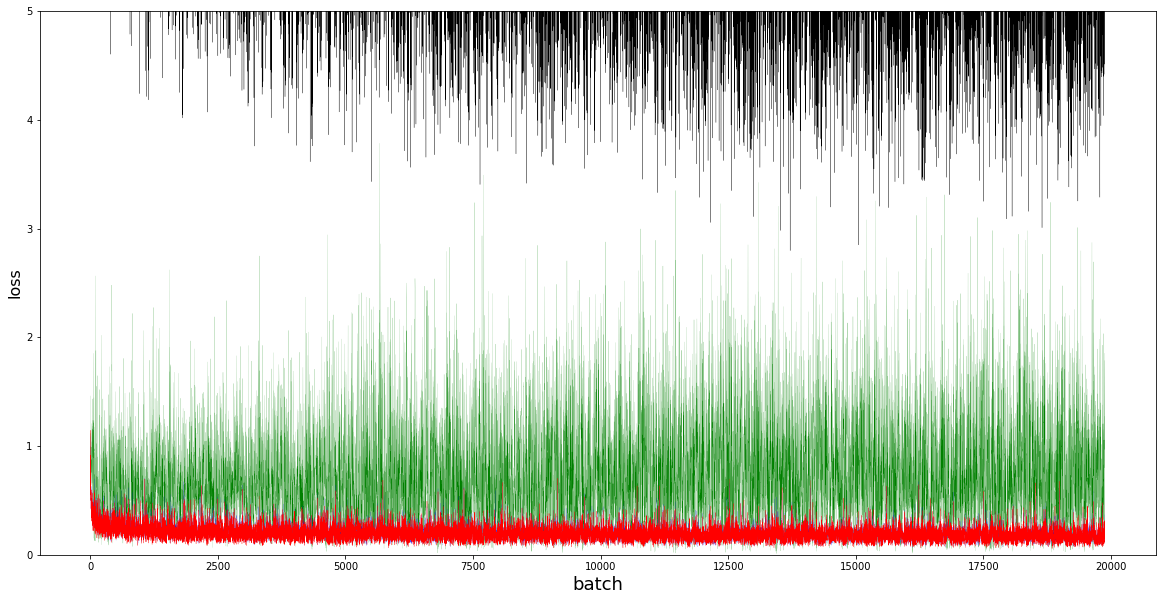

In [30]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()

# Visualize the results

In [31]:
from glob import glob

path = '/content/gdrive/My Drive/Colab Notebooks/run/paint/0005_apple2orange/images/'

path_list = glob(os.path.join(path, '*.png'))
print('path list length :', len(path_list))

path list length : 0


In [32]:
import cv2
import numpy as np
import random

images = random.choice

for i in path_list:
    img = cv2.imread(i)
    # openCV --> BGR, Matplotlib --> RGB
    b, g, r = cv2.split(img)   # split b,g,r from images
    img = cv2.merge([r,g,b]) # convert b to r and merge

    plt.imshow(img)
    plt.show()

Reference
- https://www.tensorflow.org/datasets/catalog/cycle_gan
- https://towardsdatascience.com/cyclegan-learning-to-translate-images-without-paired-training-data-5b4e93862c8d
- https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html